# Bitcoin: A Technical Analysis

## Introduction

### What is Bitcoin?

Bitcoin is a cryptographically secured public ledger in cyber space.  This ledger is updated and audited roughly every ten minutes by a distributed network of computers called nodes.  These nodes are in constant communication with one another both to secure the Bitcoin network and reach consensus on the state of the ledger at a given point in time.  The Bitcoin ledger contains the history of all debits and credits of the digital currency bitcoin as it pertains to millions of pseudonymous encrypted addresses.  The Bitcoin network has never been hacked.  Its software is not owned by anyone.  It exists everywhere in the same way that the internet exists everywhere.  It is both of the internet, and apart from the internet.  It has no single point of failure.  It is a monetary network in cyberspace whose jurisdiction is the entire planet.  Bitcoin is the internet of money.      

### What is the Purpose of this Paper?

Many papers and books have been written about the fundamentals of Bitcoin, but the best and most concise explanations of its value proposition are, in my opinion, given by Billionaire CEO of MicroStrategy, Michael Saylor.  See here for one of his talks on RealVision https://www.youtube.com/watch?v=Cg10yYZjK94.  In 2020, under the direction of Mr. Saylor, MicroStrategy converted its entire balance sheet of cash reserves into bitcoin.  His conviction is what caused me to have a second look at Bitcoin.  I hope you enjoy his talk.

As for this paper, the focus is entirely on technical analysis of bitcoins price action.  It looks at bitcoins volatility and returns over different time horizons, and compares these with other popular assets and stores of value: Precious Metals, FAANGT Stocks, and US Sovereign Debt.  There is a fundamental assumption that the reader does not indeed believe that the true value of bitcoin is 0, or that bitcoin is tulip mania, or the greatest Ponzi scheme ever devised.  Indeed, one may need to look several times to find them, but the fundamentals are there, and when found, they scream at you while you sleep.  A recent Q4 review from Bill Miller sums it up well, he writes "Warren Buffett famously called bitcoin “rat poison.” He may well be right. Bitcoin could be rat poison, and the rat could be cash.".   It should be most interesting to see how this all plays out. 


## Bitcoin 

In [11]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
plt.rcParams['figure.figsize'] = [12, 10]

In [12]:
#Found at Quandl https://www.quandl.com/data/BCHAIN/MKPRU-Bitcoin-Market-Price-USD
key=''
api='https://www.quandl.com/api/v3/datasets/BCHAIN/MKPRU.csv?api_key='+key
dfbit=pd.read_csv(api).set_index('Date').iloc[::-1]
dfbit=dfbit.loc['2011-01-01':]
dfbit.tail()

Value
Date                
2021-01-26  32276.84
2021-01-27  32243.26
2021-01-28  32541.80
2021-01-29  30419.17
2021-01-30  33403.17

The chart below provides the historical price action of bitcoin from its early inception to near present day.

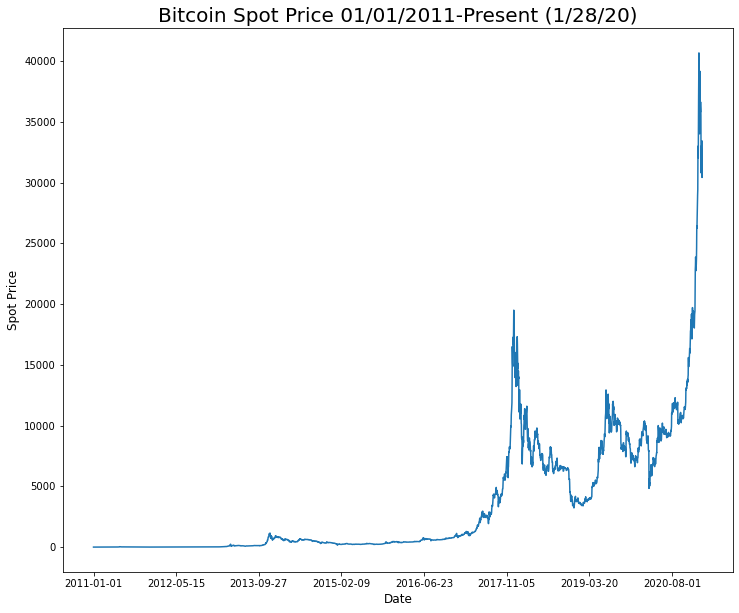

In [13]:
dfbit.Value.plot()
plt.xlabel('Date',size=12)
plt.ylabel('Spot Price',size=12)
plt.title('Bitcoin Spot Price 01/01/2011-Present (1/28/20)',size=20)
plt.show()

In [14]:
#percent change over different n-day intervals
dfbitchange=dfbit
dfbitchange['percent_daily']=dfbitchange['Value'].pct_change(periods=1)
dfbitchange['percent_weekly']=dfbitchange['Value'].pct_change(periods=7)
dfbitchange['percent_bimonthly']=dfbitchange['Value'].pct_change(periods=14)
dfbitchange['percent_30Days']=dfbitchange['Value'].pct_change(periods=30)
dfbitchange['percent_60Days']=dfbitchange['Value'].pct_change(periods=60)
dfbitchange['percent_90Days']=dfbitchange['Value'].pct_change(periods=90)
dfbitchange['percent_180Days']=dfbitchange['Value'].pct_change(periods=180)
dfbitchange['percent_365Days']=dfbitchange['Value'].pct_change(periods=365)

#rolling 180 period standard deviation of n-day percent change
dfbitchange['vol_daily']=dfbitchange['percent_daily'].rolling(180).std()
dfbitchange['vol_weekly']=dfbitchange['percent_weekly'].rolling(180).std()
dfbitchange['vol_bimonthly']=dfbitchange['percent_bimonthly'].rolling(180).std()
dfbitchange['vol_30Days']=dfbitchange['percent_30Days'].rolling(180).std()
dfbitchange['vol_60Days']=dfbitchange['percent_60Days'].rolling(180).std()
dfbitchange['vol_90Days']=dfbitchange['percent_90Days'].rolling(180).std()
dfbitchange['vol_180Days']=dfbitchange['percent_180Days'].rolling(180).std()
dfbitchange['vol_365Days']=dfbitchange['percent_365Days'].rolling(180).std()

Below we can look at bitcoins price action with a log scale on the y-axis, which helps us to understand better how big the moves from one price to another are.  For instance, the move from 1000 to 10000 is much different than the move from 20,000 to 29,000.  The price increases 9,000 in both cases, but the first is a 10X increase while the second is just a 49% increase.      

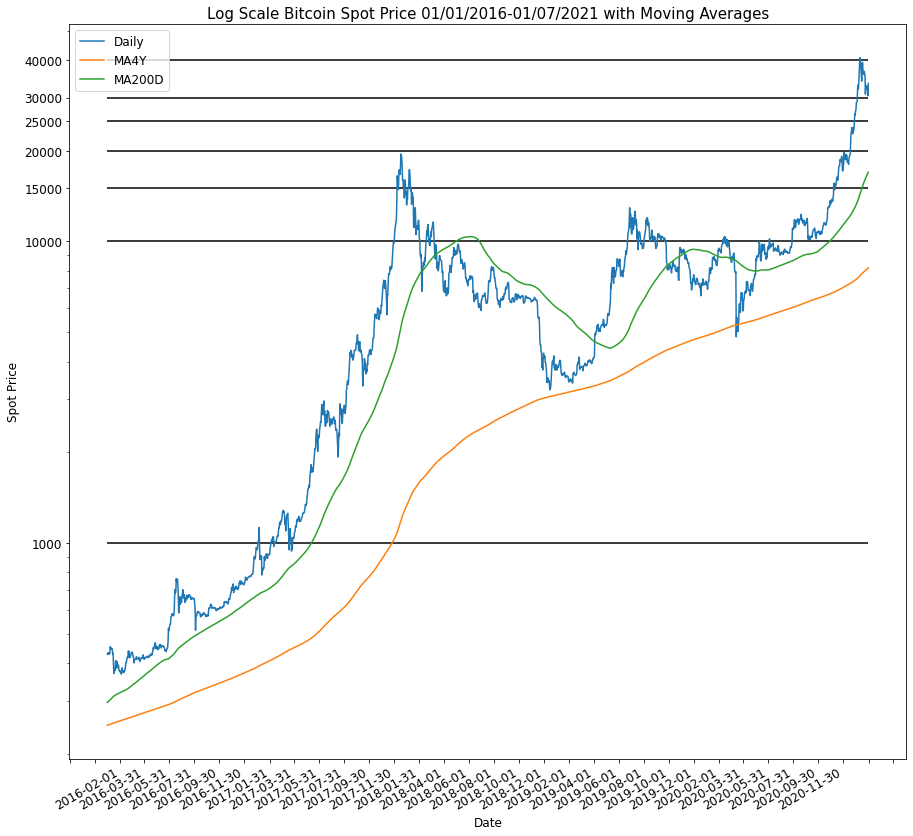

In [15]:
#Log Scale Moving average plot 2016-present
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
plt.rcParams['figure.figsize'] = [15,15]
fig, ax = plt.subplots()
ax.plot(dfbit['Value'].loc['2016-01-01':].index,dfbit['Value'].loc['2016-01-01':].values,label='Daily')
ax.plot(dfbit['Value'].loc['2016-01-01':].index,dfbit['Value'].rolling(1460).mean().loc['2016-01-01':].values,label='MA4Y')
ax.plot(dfbit['Value'].loc['2016-01-01':].index,dfbit['Value'].rolling(200).mean().loc['2016-01-01':].values,label='MA200D')
ax.hlines(1000,dfbit['Value'].loc['2016-01-01':].index[0],dfbit['Value'].loc['2016-01-01':].index[-1],color='k')
ax.hlines(10000,dfbit['Value'].loc['2016-01-01':].index[0],dfbit['Value'].loc['2016-01-01':].index[-1],color='k')
ax.hlines(15000,dfbit['Value'].loc['2016-01-01':].index[0],dfbit['Value'].loc['2016-01-01':].index[-1],color='k')
ax.hlines(20000,dfbit['Value'].loc['2016-01-01':].index[0],dfbit['Value'].loc['2016-01-01':].index[-1],color='k')
ax.hlines(25000,dfbit['Value'].loc['2016-01-01':].index[0],dfbit['Value'].loc['2016-01-01':].index[-1],color='k')
ax.hlines(30000,dfbit['Value'].loc['2016-01-01':].index[0],dfbit['Value'].loc['2016-01-01':].index[-1],color='k')
ax.hlines(40000,dfbit['Value'].loc['2016-01-01':].index[0],dfbit['Value'].loc['2016-01-01':].index[-1],color='k')
plt.legend(loc="upper left")
plt.legend(fontsize=12) 
plt.xticks(fontsize=12, rotation=90)
ax.set_yscale("log")
yticks=[1000,10000,15000,20000,25000,30000,40000]
plt.yticks(yticks,fontsize=12)
ax.set_yticklabels(yticks)
plt.title('Log Scale Bitcoin Spot Price 01/01/2016-01/07/2021 with Moving Averages',fontsize=15)
plt.ylabel('Spot Price', fontsize=12)
plt.xlabel('Date',fontsize=12)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
fig.autofmt_xdate()
plt.show()

As we can see from the chart above, bitcoin made some massive moves from early 2016 to late 2017, with a sizable long-term correction in 2018. Many people wonder whether the current bull run has reached its top already. However, from a historic perspective, it looks like this may only be halfway through, or maybe less than halfway through. Let us take a look at the log scale over the entire price history.  

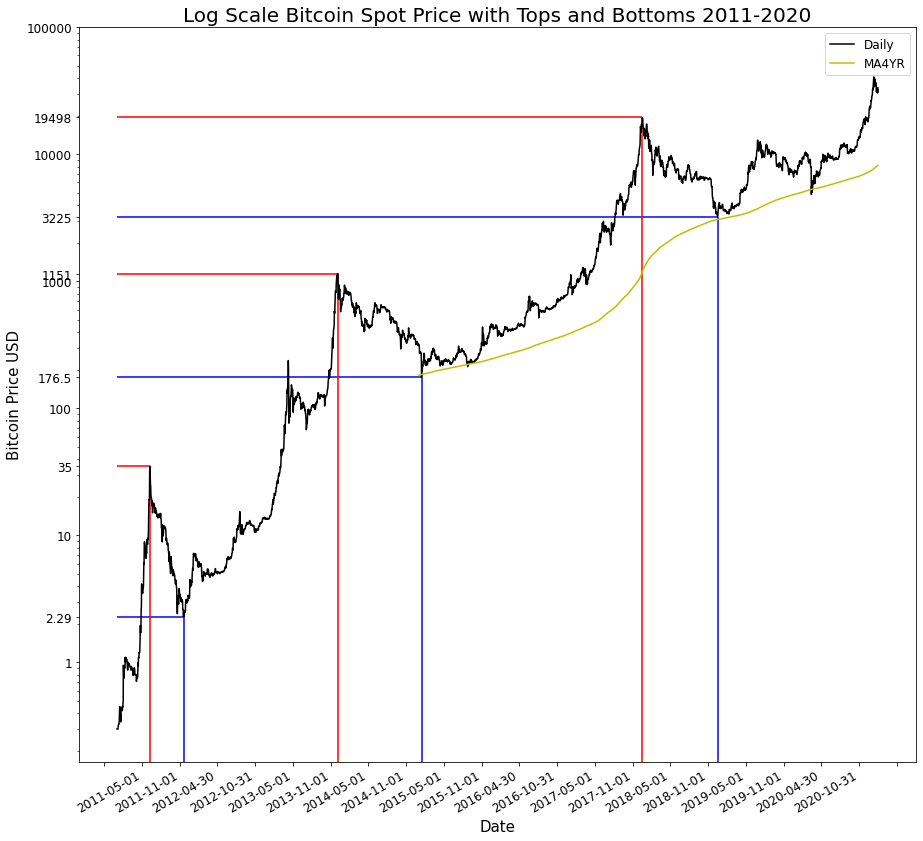

In [16]:
#Log scale with tops,bottoms and 4 year moving average plot 2011-2020
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
plt.rcParams['figure.figsize'] = [15,15]
fig, ax = plt.subplots()
ax.plot(dfbit['Value'].index,dfbit['Value'].values,label='Daily',color='k')
ax.plot(dfbit['Value'].index,dfbit['Value'].rolling(1460).mean().values,label='MA4YR',color='y')
ax.hlines(2.29,dfbit['Value'].index[0],dfbit[['Value']].loc[dfbit.Value==2.29].index[0],color='b')
plt.vlines(dfbit[['Value']].loc[dfbit.Value==2.29].index[0],0,2.29,color='b')
ax.hlines(35,dfbit['Value'].index[0],dfbit[['Value']].loc[dfbit.Value==35].index[0],color='r')
plt.vlines(dfbit[['Value']].loc[dfbit.Value==35].index[0],0,35,color='r')
ax.hlines(176.5,dfbit['Value'].index[0],dfbit[['Value']].loc[dfbit.Value==176.5].index[0],color='b')
plt.vlines(dfbit[['Value']].loc[dfbit.Value==176.5].index[0],0,176.5,color='b')
ax.hlines(1151,dfbit['Value'].index[0],dfbit[['Value']].loc[dfbit.Value==1151].index[0],color='r')
plt.vlines(dfbit[['Value']].loc[dfbit.Value==1151].index[0],0,1151,color='r')
ax.hlines(3225.299167,dfbit['Value'].index[0],dfbit[['Value']].loc[dfbit.Value.index=='2018-12-16'].index[0],color='b')
plt.vlines(dfbit[['Value']].loc[dfbit.Value.index=='2018-12-16'].index[0],0,3225.229167,color='b')
ax.hlines(19498,dfbit['Value'].index[0],dfbit[['Value']].loc[dfbit.Value.index=='2017-12-17'].index[0],color='r')
plt.vlines(dfbit[['Value']].loc[dfbit.Value.index=='2017-12-17'].index[0],0,19498,color='r')
plt.legend(loc="upper left")
plt.legend(fontsize=12) 
plt.xticks(fontsize=12, rotation=90)
ax.set_yscale("log")
yticks=[1,2.29,10,35,100,176.5,1000,1151,3225,10000,19498,100000]
plt.yticks(yticks,fontsize=12)
ax.set_yticklabels(yticks)
plt.title('Log Scale Bitcoin Spot Price with Tops and Bottoms 2011-2020',fontsize=20)
plt.ylabel('Bitcoin Price USD',fontsize=15)
plt.xlabel('Date',fontsize=15)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
fig.autofmt_xdate()
plt.show()

Here are several things of note regarding the above chart:

### Bottom to Bottom

###### 2011 Bottom to Bottom

2011-11-21 bottom to 2015-01-14 bottom: 76.86X increase over 3.15 years

2011-11-21 bottom to 2018-12-16 bottom: 1408.43X increase over 7.8 years

###### 2015 Bottom to Bottom

2015-01-14 bottom to 2018-12-16 bottom: 18.32X increase over 3.93 years

### Top to Top

###### 2011 Top to Top

2011-06-10 top to 2013-12-04 top: 32.89X increase over 2.5 years

2011-06-10 top to 2017-12-17 top: 557.11X increase over 6.53 years

###### 2013 Top to Top

2013-12-04 top to 2017-12-17 top: 16.94X increase over 4 years

### Bottom to Top

###### 2011 Bottom to Top

2011-11-21 bottom to 2013-12-04 top: 502.62X increase over 2.04 years

2011-11-21 bottom to 2017-12-17 top: 8514.71X increase over 6.08 years

###### 2015 Bottom to Top

2015-01-14 bottom to 2017-12-17 top: 110.47X increase over 2.93 years 

### Top to Bottom

###### 2011 Top to Bottom

2011-06-10 top to 2011-11-21 bottom: 93.46% decrease in 5.42 months

2011-06-10 top to 2015-01-14 bottom: 5.04X increase in 3.6 years

2011-06-10 top to 2018-12-16 bottom: 92.15X increase in 7.53 years

###### 2013 Top to Bottom

2013-12-04 to 2015-01-14: 84.67% decrease in 1.12 years

2013-12-04 top to 2018-12-16 bottom: 2.8X increase over 5.04 years

###### 2017 Top to Bottom

2017-12-17 to 2018-12-16: 83.46% decrease in 1 year

Historically, the safest strategy has been to buy and hold.  Even if you bought at the worst possible time in 2013, if you held to present day, your gains would be 30X.  If you bought at the peak in 2017, your current gains would be 75%.  Try your best to not buy at the peak of the bull market, but historically it has not been a catastrophic mistake in the long term.   

### % Change in Bitcoin Spot Price 

Below are charts of the percent change of bitcoin spot price over 14 day, 30 day, and 90 day intervals.

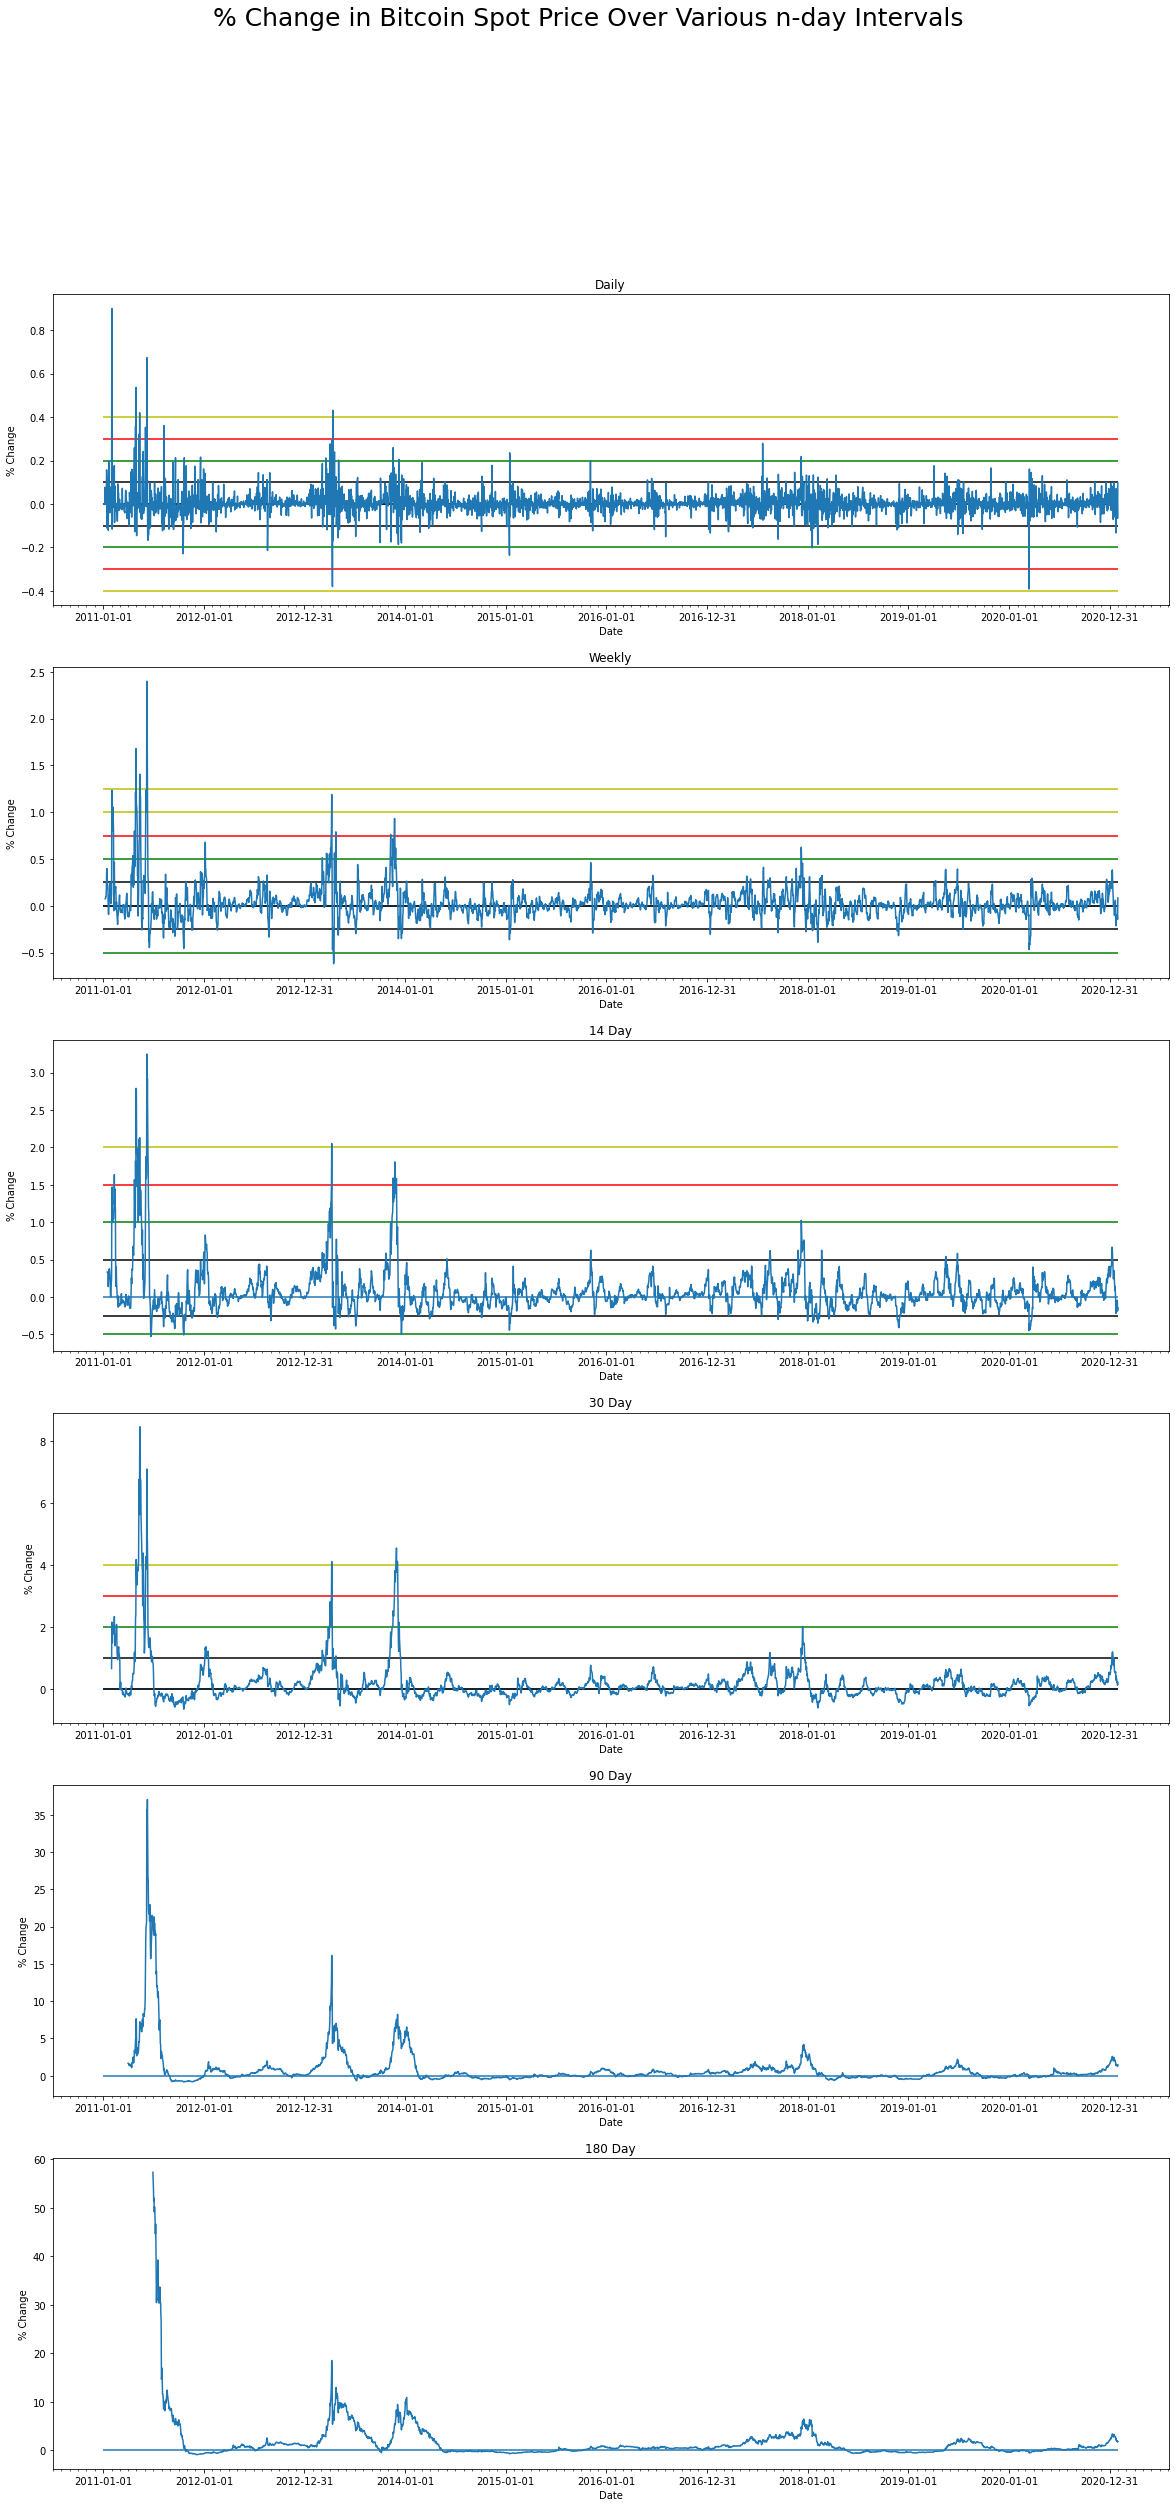

In [17]:
rangecrash=dfbitchange['percent_daily'].loc[:].index
valuescrash=dfbitchange['percent_daily'].loc[:].values
plt.rcParams['figure.figsize'] = [20, 40]
fig,axs=plt.subplots(6)
fig.suptitle('% Change in Bitcoin Spot Price Over Various n-day Intervals ',fontsize=25)
axs[0].plot(rangecrash,valuescrash)
axs[0].hlines(0,rangecrash[0],rangecrash[-1])
axs[0].xaxis.set_major_locator(mdates.YearLocator())
axs[0].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[0].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(.1,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(.2,rangecrash[0],rangecrash[-1],color='g')
axs[0].hlines(.3,rangecrash[0],rangecrash[-1],color='r')
axs[0].hlines(.4,rangecrash[0],rangecrash[-1],color='y')
axs[0].hlines(-.1,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(-.2,rangecrash[0],rangecrash[-1],color='g')
axs[0].hlines(-.3,rangecrash[0],rangecrash[-1],color='r')
axs[0].hlines(-.4,rangecrash[0],rangecrash[-1],color='y')
axs[0].title.set_text('Daily')
axs[0].set_ylabel('% Change')
axs[0].set_xlabel('Date')

rangecrash=dfbitchange['percent_weekly'].loc[:].index
valuescrash=dfbitchange['percent_weekly'].loc[:].values
axs[1].plot(rangecrash,valuescrash)
axs[1].hlines(0,rangecrash[0],rangecrash[-1])
axs[1].xaxis.set_major_locator(mdates.YearLocator())
axs[1].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[1].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[1].hlines(.25,rangecrash[0],rangecrash[-1],color='k')
axs[1].hlines(.5,rangecrash[0],rangecrash[-1],color='g')
axs[1].hlines(.75,rangecrash[0],rangecrash[-1],color='r')
axs[1].hlines(1,rangecrash[0],rangecrash[-1],color='y')
axs[1].hlines(1.25,rangecrash[0],rangecrash[-1],color='y')
axs[1].hlines(-.25,rangecrash[0],rangecrash[-1],color='k')
axs[1].hlines(-.5,rangecrash[0],rangecrash[-1],color='g')
axs[1].title.set_text('Weekly')
axs[1].set_ylabel('% Change')
axs[1].set_xlabel('Date')

rangecrash=dfbitchange['percent_bimonthly'].loc[:].index
valuescrash=dfbitchange['percent_bimonthly'].loc[:].values
axs[2].plot(rangecrash,valuescrash)
axs[2].hlines(0,rangecrash[0],rangecrash[-1])
axs[2].xaxis.set_major_locator(mdates.YearLocator())
axs[2].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[2].hlines(.5,rangecrash[0],rangecrash[-1],color='k')
axs[2].hlines(1,rangecrash[0],rangecrash[-1],color='g')
axs[2].hlines(1.5,rangecrash[0],rangecrash[-1],color='r')
axs[2].hlines(2,rangecrash[0],rangecrash[-1],color='y')
axs[2].hlines(-.5,rangecrash[0],rangecrash[-1],color='g')
axs[2].hlines(-.25,rangecrash[0],rangecrash[-1],color='k')
axs[2].title.set_text('14 Day')
axs[2].set_ylabel('% Change')
axs[2].set_xlabel('Date')

rangecrash=dfbitchange['percent_30Days'].loc[:].index
valuescrash=dfbitchange['percent_30Days'].loc[:].values
axs[3].plot(rangecrash,valuescrash)
axs[3].hlines(0,rangecrash[0],rangecrash[-1])
axs[3].xaxis.set_major_locator(mdates.YearLocator())
axs[3].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[3].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[3].hlines(1,rangecrash[0],rangecrash[-1],color='k')
axs[3].hlines(2,rangecrash[0],rangecrash[-1],color='g')
axs[3].hlines(3,rangecrash[0],rangecrash[-1],color='r')
axs[3].hlines(4,rangecrash[0],rangecrash[-1],color='y')
axs[3].title.set_text('30 Day')
axs[3].set_ylabel('% Change')
axs[3].set_xlabel('Date')

rangecrash=dfbitchange['percent_90Days'].loc[:].index
valuescrash=dfbitchange['percent_90Days'].loc[:].values
axs[4].plot(rangecrash,valuescrash)
axs[4].hlines(0,rangecrash[0],rangecrash[-1])
axs[4].xaxis.set_major_locator(mdates.YearLocator())
axs[4].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[4].title.set_text('90 Day')
axs[4].set_ylabel('% Change')
axs[4].set_xlabel('Date')

rangecrash=dfbitchange['percent_180Days'].loc[:].index
valuescrash=dfbitchange['percent_180Days'].loc[:].values
axs[5].plot(rangecrash,valuescrash)
axs[5].hlines(0,rangecrash[0],rangecrash[-1])
axs[5].xaxis.set_major_locator(mdates.YearLocator())
axs[5].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[5].title.set_text('180 Day')
axs[5].set_ylabel('% Change')
axs[5].set_xlabel('Date')

plt.show()

Many perspective investors are afraid that this bull cycle as of 2020-01-07 has already reached its top, and that we are doomed to repeat the 2017 bubble and burst again very soon.  Let us zoom in a bit to see how similar this bull market is to the last one.   

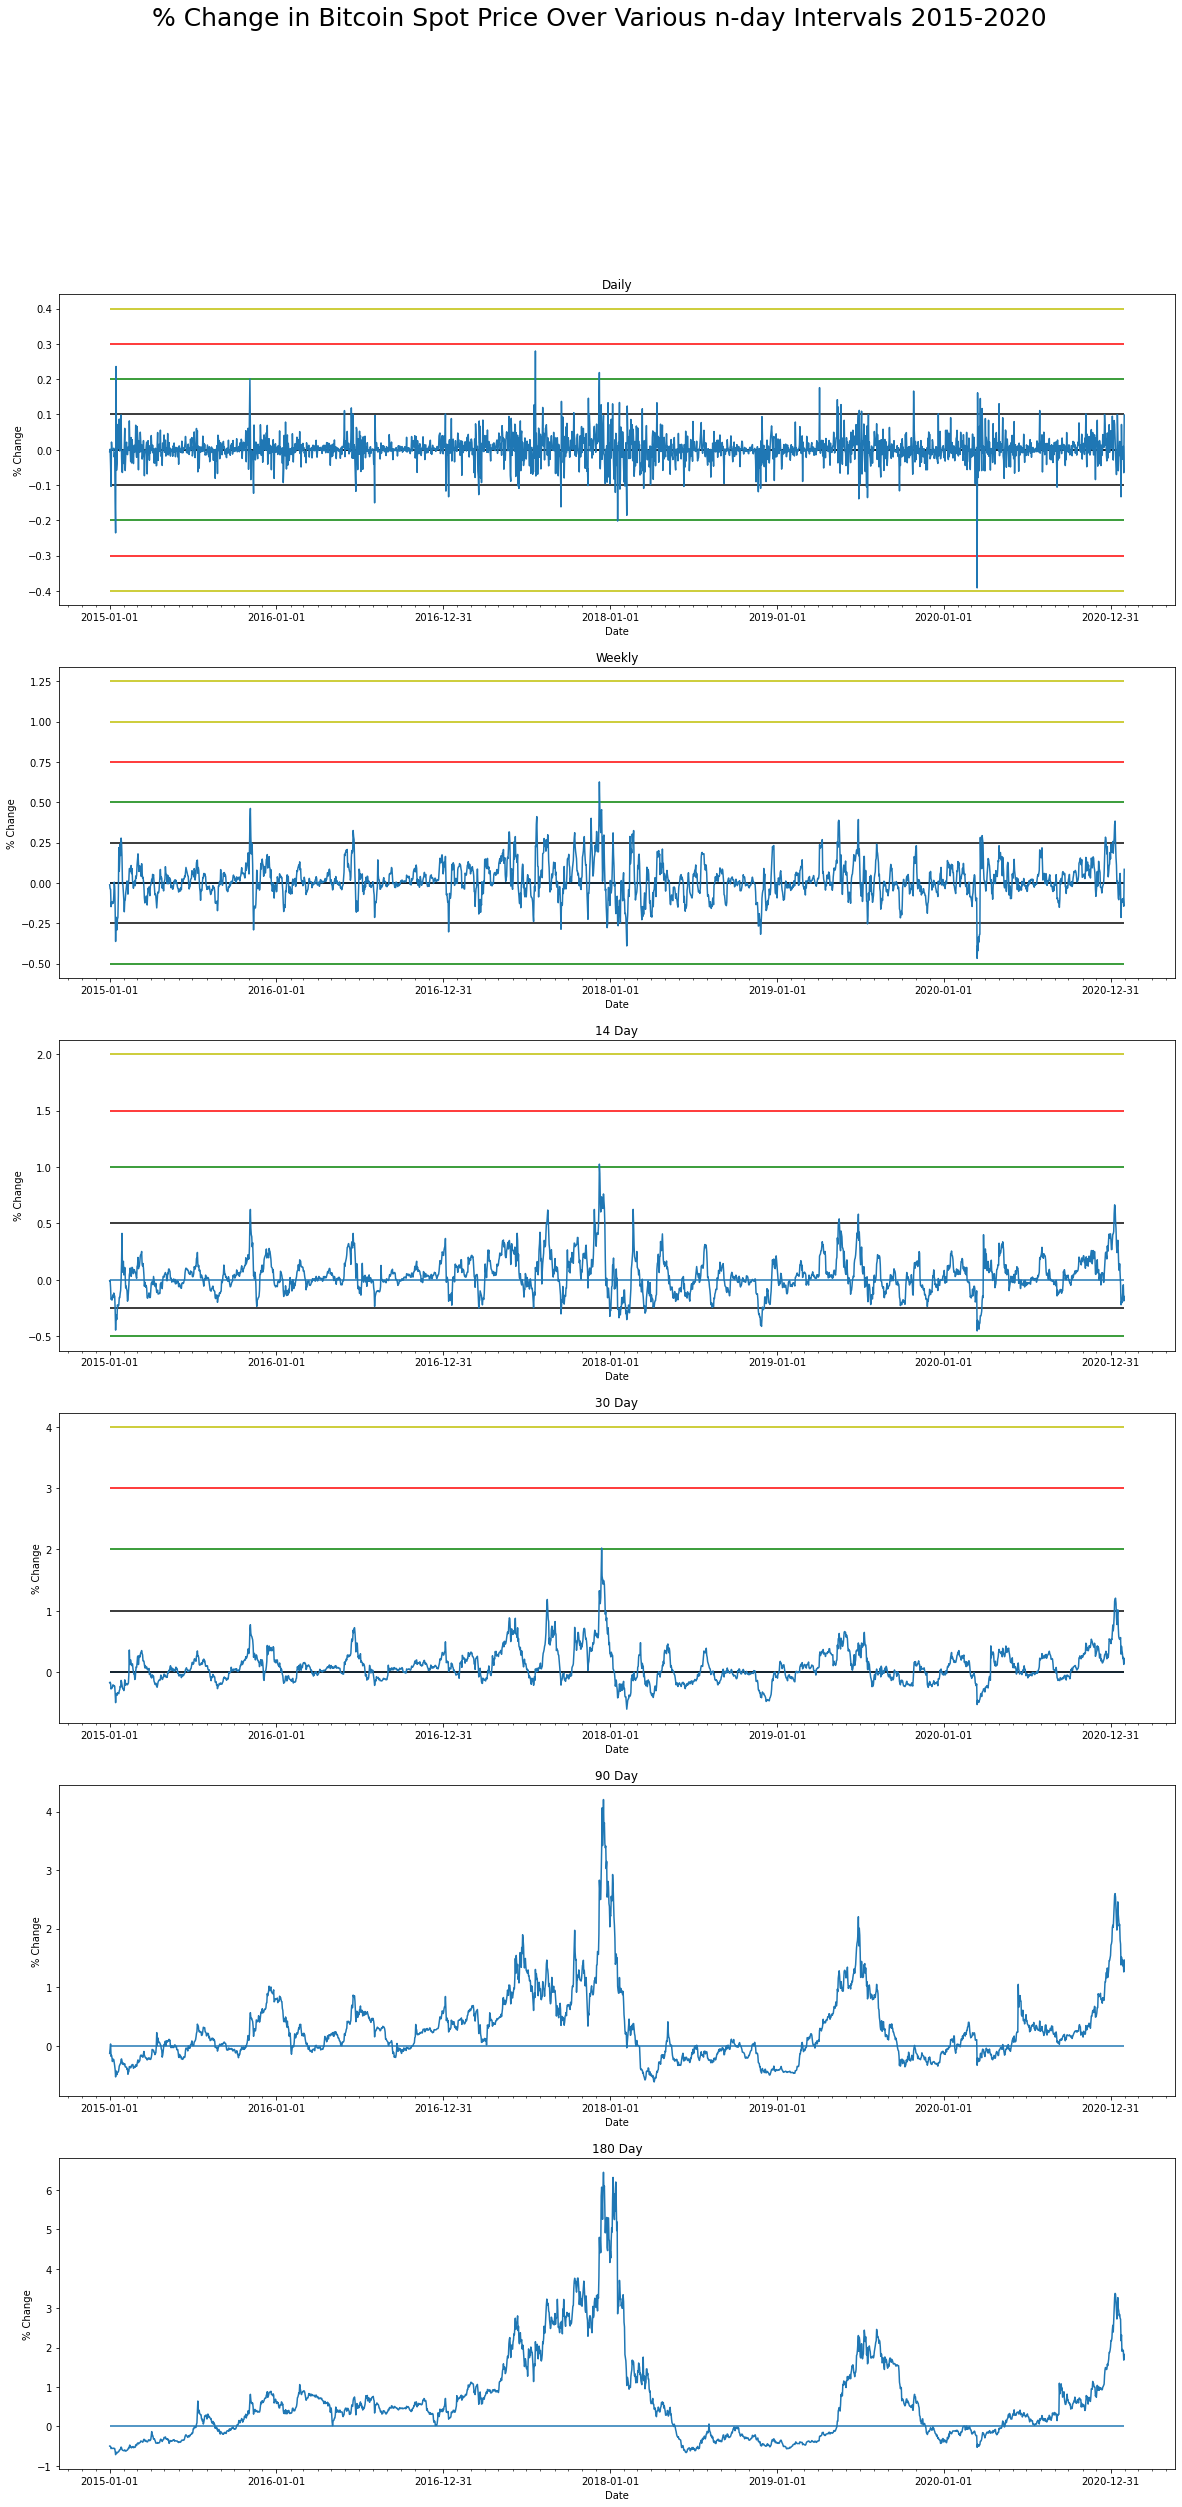

In [18]:
rangecrash=dfbitchange['percent_daily'].loc['2015-01-01':].index
valuescrash=dfbitchange['percent_daily'].loc['2015-01-01':].values
plt.rcParams['figure.figsize'] = [20, 40]
fig,axs=plt.subplots(6)
fig.suptitle('% Change in Bitcoin Spot Price Over Various n-day Intervals'
             ' 2015-2020',fontsize=25)
axs[0].plot(rangecrash,valuescrash)
axs[0].hlines(0,rangecrash[0],rangecrash[-1])
axs[0].xaxis.set_major_locator(mdates.YearLocator())
axs[0].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[0].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(.1,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(.2,rangecrash[0],rangecrash[-1],color='g')
axs[0].hlines(.3,rangecrash[0],rangecrash[-1],color='r')
axs[0].hlines(.4,rangecrash[0],rangecrash[-1],color='y')
axs[0].hlines(-.1,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(-.2,rangecrash[0],rangecrash[-1],color='g')
axs[0].hlines(-.3,rangecrash[0],rangecrash[-1],color='r')
axs[0].hlines(-.4,rangecrash[0],rangecrash[-1],color='y')
axs[0].title.set_text('Daily')
axs[0].set_ylabel('% Change')
axs[0].set_xlabel('Date')

rangecrash=dfbitchange['percent_weekly'].loc['2015-01-01':].index
valuescrash=dfbitchange['percent_weekly'].loc['2015-01-01':].values
axs[1].plot(rangecrash,valuescrash)
axs[1].hlines(0,rangecrash[0],rangecrash[-1])
axs[1].xaxis.set_major_locator(mdates.YearLocator())
axs[1].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[1].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[1].hlines(.25,rangecrash[0],rangecrash[-1],color='k')
axs[1].hlines(.5,rangecrash[0],rangecrash[-1],color='g')
axs[1].hlines(.75,rangecrash[0],rangecrash[-1],color='r')
axs[1].hlines(1,rangecrash[0],rangecrash[-1],color='y')
axs[1].hlines(1.25,rangecrash[0],rangecrash[-1],color='y')
axs[1].hlines(-.25,rangecrash[0],rangecrash[-1],color='k')
axs[1].hlines(-.5,rangecrash[0],rangecrash[-1],color='g')
axs[1].title.set_text('Weekly')
axs[1].set_ylabel('% Change')
axs[1].set_xlabel('Date')

rangecrash=dfbitchange['percent_bimonthly'].loc['2015-01-01':].index
valuescrash=dfbitchange['percent_bimonthly'].loc['2015-01-01':].values
axs[2].plot(rangecrash,valuescrash)
axs[2].hlines(0,rangecrash[0],rangecrash[-1])
axs[2].xaxis.set_major_locator(mdates.YearLocator())
axs[2].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[2].hlines(.5,rangecrash[0],rangecrash[-1],color='k')
axs[2].hlines(1,rangecrash[0],rangecrash[-1],color='g')
axs[2].hlines(1.5,rangecrash[0],rangecrash[-1],color='r')
axs[2].hlines(2,rangecrash[0],rangecrash[-1],color='y')
axs[2].hlines(-.5,rangecrash[0],rangecrash[-1],color='g')
axs[2].hlines(-.25,rangecrash[0],rangecrash[-1],color='k')
axs[2].title.set_text('14 Day')
axs[2].set_ylabel('% Change')
axs[2].set_xlabel('Date')

rangecrash=dfbitchange['percent_30Days'].loc['2015-01-01':].index
valuescrash=dfbitchange['percent_30Days'].loc['2015-01-01':].values
axs[3].plot(rangecrash,valuescrash)
axs[3].hlines(0,rangecrash[0],rangecrash[-1])
axs[3].xaxis.set_major_locator(mdates.YearLocator())
axs[3].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[3].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[3].hlines(1,rangecrash[0],rangecrash[-1],color='k')
axs[3].hlines(2,rangecrash[0],rangecrash[-1],color='g')
axs[3].hlines(3,rangecrash[0],rangecrash[-1],color='r')
axs[3].hlines(4,rangecrash[0],rangecrash[-1],color='y')
axs[3].title.set_text('30 Day')
axs[3].set_ylabel('% Change')
axs[3].set_xlabel('Date')

rangecrash=dfbitchange['percent_90Days'].loc['2015-01-01':].index
valuescrash=dfbitchange['percent_90Days'].loc['2015-01-01':].values
axs[4].plot(rangecrash,valuescrash)
axs[4].hlines(0,rangecrash[0],rangecrash[-1])
axs[4].xaxis.set_major_locator(mdates.YearLocator())
axs[4].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[4].title.set_text('90 Day')
axs[4].set_ylabel('% Change')
axs[4].set_xlabel('Date')

rangecrash=dfbitchange['percent_180Days'].loc['2015-01-01':].index
valuescrash=dfbitchange['percent_180Days'].loc['2015-01-01':].values
axs[5].plot(rangecrash,valuescrash)
axs[5].hlines(0,rangecrash[0],rangecrash[-1])
axs[5].xaxis.set_major_locator(mdates.YearLocator())
axs[5].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[5].title.set_text('180 Day')
axs[5].set_ylabel('% Change')
axs[5].set_xlabel('Date')

plt.show()

As we can see, the market is starting to get a bit hot, especially when looking at the 90 day and 180-day charts.  But we are not at peak 2017 levels yet.  This could be like the situation we saw in late 2019 in which there was a cooldown for several months.    

### Rolling Volitility for Various n-day % Change in Bitcoin Spot Price Using Various Sample Sizes

Now lets look at the volitility in the percent change over various n-day intervals.  We will use sample sizes of 30,90,180.  

##### Sample Size = 30 over 1, 14, 30, 90, 180, 365 Day % Change

In [19]:
#rolling 30 period standard deviation of n-day percent change
dfbitchange['vol_daily']=dfbitchange['percent_daily'].rolling(30).std()
dfbitchange['vol_bimonthly']=dfbitchange['percent_bimonthly'].rolling(30).std()
dfbitchange['vol_30Days']=dfbitchange['percent_30Days'].rolling(30).std()
dfbitchange['vol_90Days']=dfbitchange['percent_90Days'].rolling(30).std()
dfbitchange['vol_180Days']=dfbitchange['percent_180Days'].rolling(30).std()
dfbitchange['vol_365Days']=dfbitchange['percent_365Days'].rolling(30).std()

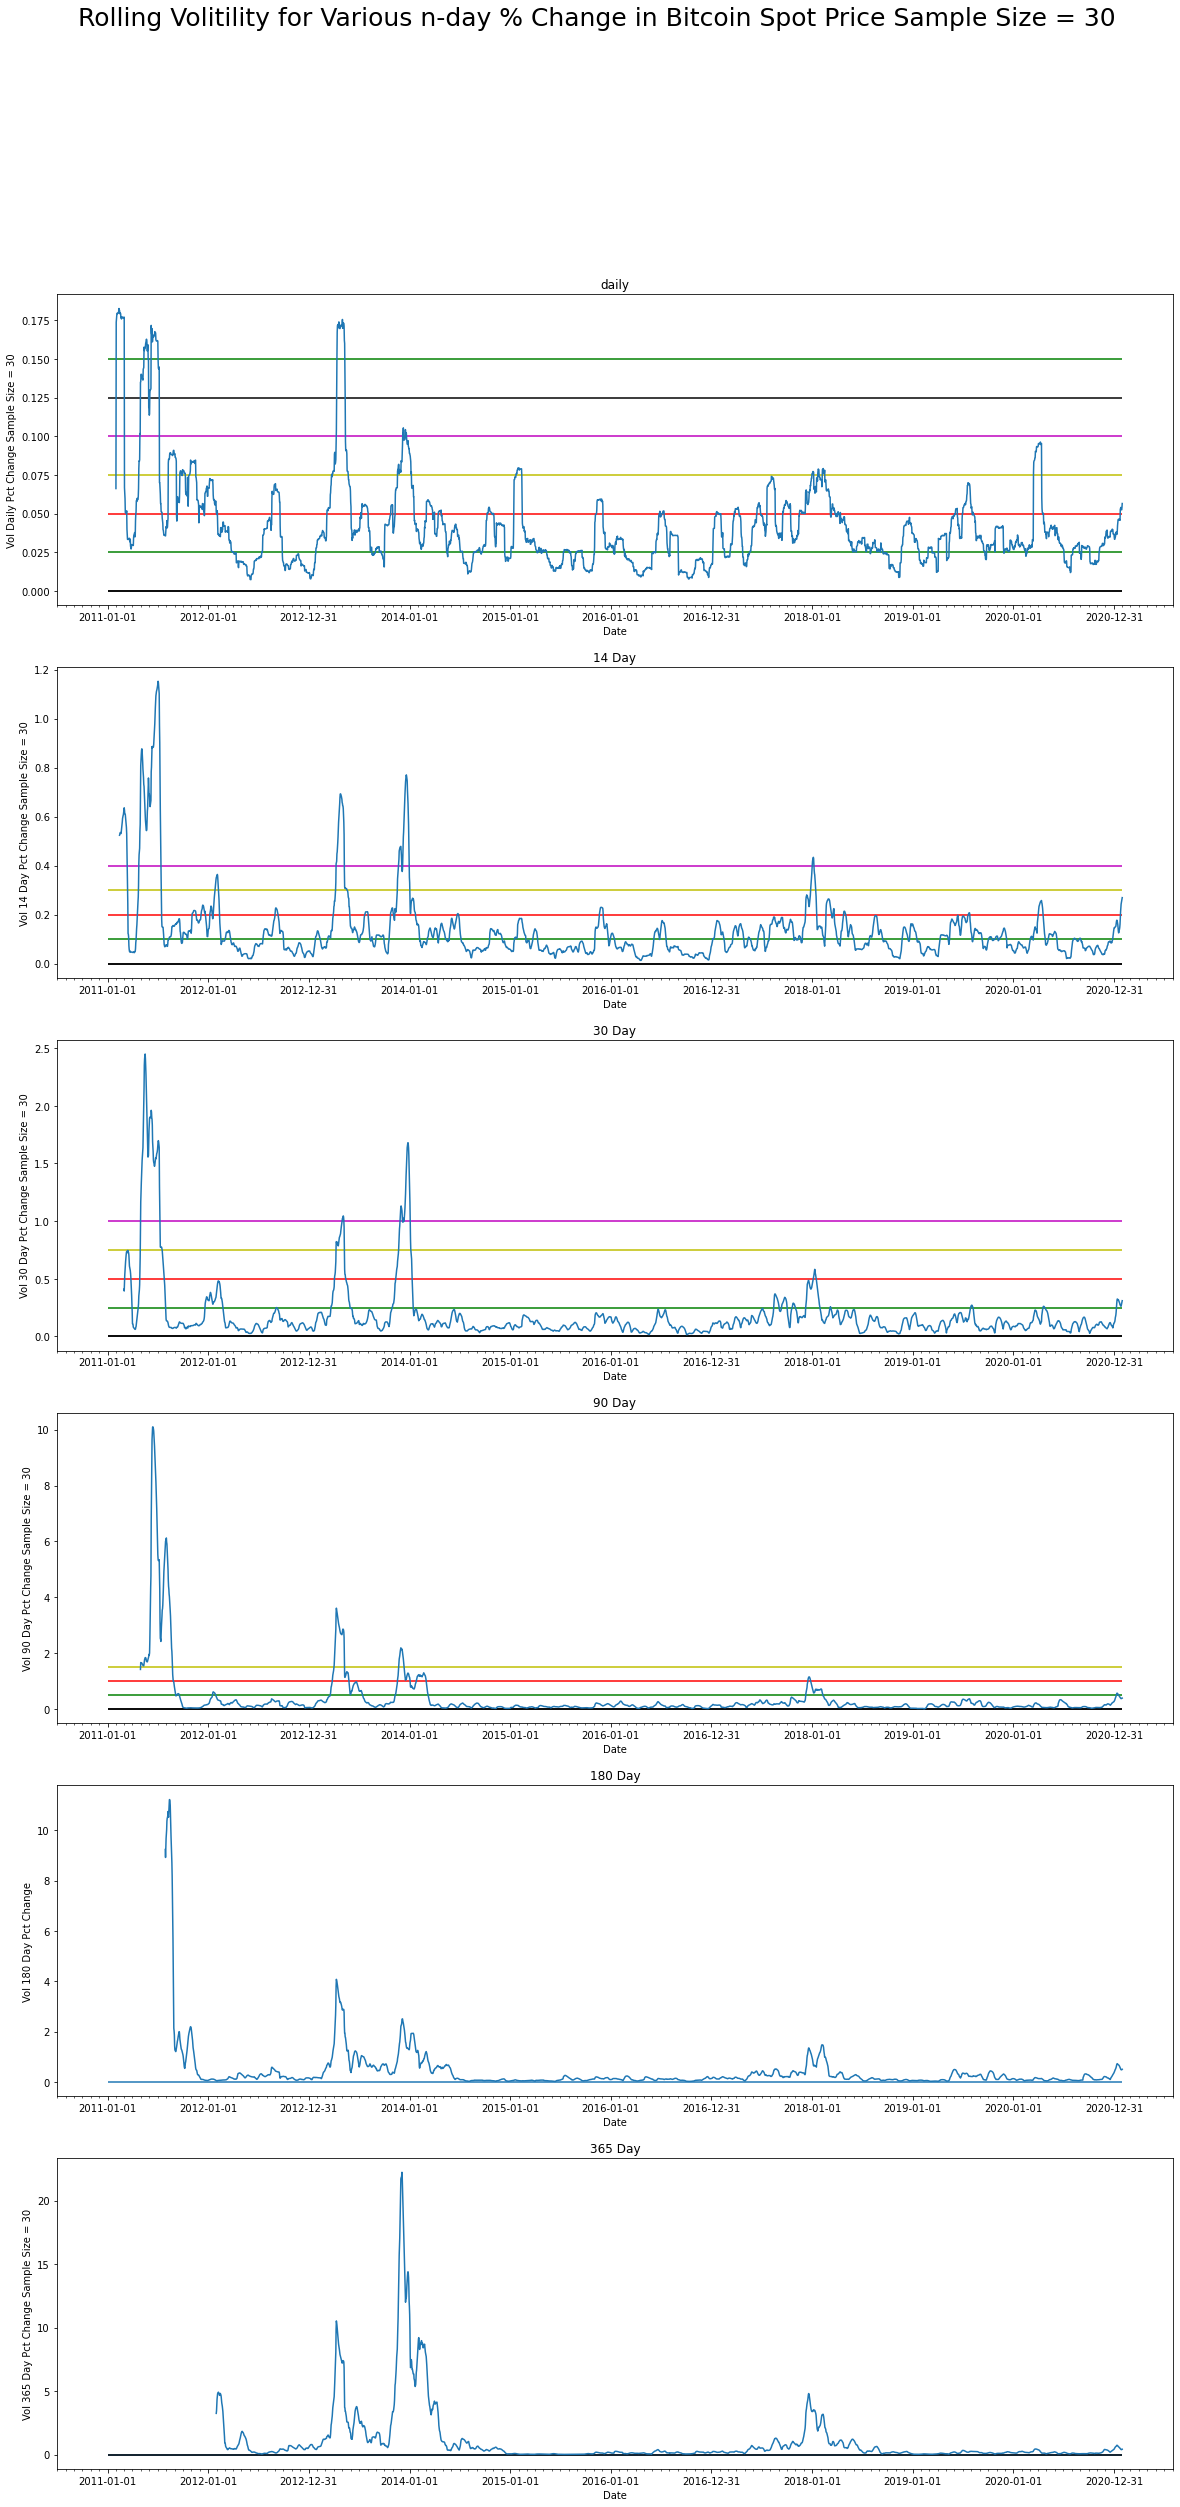

In [20]:
rangecrash=dfbitchange['vol_daily'].loc[:].index
valuescrash=dfbitchange['vol_daily'].loc[:].values
plt.rcParams['figure.figsize'] = [20, 40]
fig,axs=plt.subplots(6)
fig.suptitle('Rolling Volitility for Various n-day % Change in Bitcoin Spot Price Sample Size = 30',fontsize=25)
axs[0].plot(rangecrash,valuescrash)
axs[0].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(.025,rangecrash[0],rangecrash[-1],color='g')
axs[0].hlines(.05,rangecrash[0],rangecrash[-1],color='r')
axs[0].hlines(.075,rangecrash[0],rangecrash[-1],color='y')
axs[0].hlines(.1,rangecrash[0],rangecrash[-1],color='m')
axs[0].hlines(.125,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(.15,rangecrash[0],rangecrash[-1],color='g')
axs[0].xaxis.set_major_locator(mdates.YearLocator())
axs[0].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[0].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[0].title.set_text('daily')
axs[0].set_ylabel('Vol Daily Pct Change Sample Size = 30')
axs[0].set_xlabel('Date')

rangecrash=dfbitchange['vol_bimonthly'].loc[:].index
valuescrash=dfbitchange['vol_bimonthly'].loc[:].values
axs[1].plot(rangecrash,valuescrash)
axs[1].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[1].hlines(.1,rangecrash[0],rangecrash[-1],color='g')
axs[1].hlines(.2,rangecrash[0],rangecrash[-1],color='r')
axs[1].hlines(.3,rangecrash[0],rangecrash[-1],color='y')
axs[1].hlines(.4,rangecrash[0],rangecrash[-1],color='m')
axs[1].xaxis.set_major_locator(mdates.YearLocator())
axs[1].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[1].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[1].title.set_text('14 Day')
axs[1].set_ylabel('Vol 14 Day Pct Change Sample Size = 30')
axs[1].set_xlabel('Date')

rangecrash=dfbitchange['vol_30Days'].loc[:].index
valuescrash=dfbitchange['vol_30Days'].loc[:].values
axs[2].plot(rangecrash,valuescrash)
axs[2].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[2].hlines(.25,rangecrash[0],rangecrash[-1],color='g')
axs[2].hlines(.5,rangecrash[0],rangecrash[-1],color='r')
axs[2].hlines(.75,rangecrash[0],rangecrash[-1],color='y')
axs[2].hlines(1,rangecrash[0],rangecrash[-1],color='m')
axs[2].xaxis.set_major_locator(mdates.YearLocator())
axs[2].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[2].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[2].title.set_text('30 Day')
axs[2].set_ylabel('Vol 30 Day Pct Change Sample Size = 30')
axs[2].set_xlabel('Date')

rangecrash=dfbitchange['vol_90Days'].loc[:].index
valuescrash=dfbitchange['vol_90Days'].loc[:].values
axs[3].plot(rangecrash,valuescrash)
axs[3].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[3].hlines(.5,rangecrash[0],rangecrash[-1],color='g')
axs[3].hlines(1,rangecrash[0],rangecrash[-1],color='r')
axs[3].hlines(1.5,rangecrash[0],rangecrash[-1],color='y')
axs[3].xaxis.set_major_locator(mdates.YearLocator())
axs[3].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[3].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[3].title.set_text('90 Day')
axs[3].set_ylabel('Vol 90 Day Pct Change Sample Size = 30')
axs[3].set_xlabel('Date')

rangecrash=dfbitchange['vol_180Days'].loc[:].index
valuescrash=dfbitchange['vol_180Days'].loc[:].values
axs[4].plot(rangecrash,valuescrash)
axs[4].xaxis.set_major_locator(mdates.YearLocator())
axs[4].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[4].hlines(0,rangecrash[0],rangecrash[-1])
axs[4].title.set_text('180 Day')
axs[4].set_ylabel('Vol 180 Day Pct Change')
axs[4].set_xlabel('Date')

rangecrash=dfbitchange['vol_365Days'].loc[:].index
valuescrash=dfbitchange['vol_365Days'].loc[:].values
axs[5].plot(rangecrash,valuescrash)
axs[5].hlines(0,rangecrash[0],rangecrash[-1])
axs[5].xaxis.set_major_locator(mdates.YearLocator())
axs[5].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[5].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[5].title.set_text('365 Day')
axs[5].set_ylabel('Vol 365 Day Pct Change Sample Size = 30')
axs[5].set_xlabel('Date')

plt.show()

These charts are extraordinarily instructive.  Lets zoom in on 2015-Present to get a closer look

##### Sample Size = 30 over 1, 14, 30, 90, 180, 365 Day % Change 2015-Present

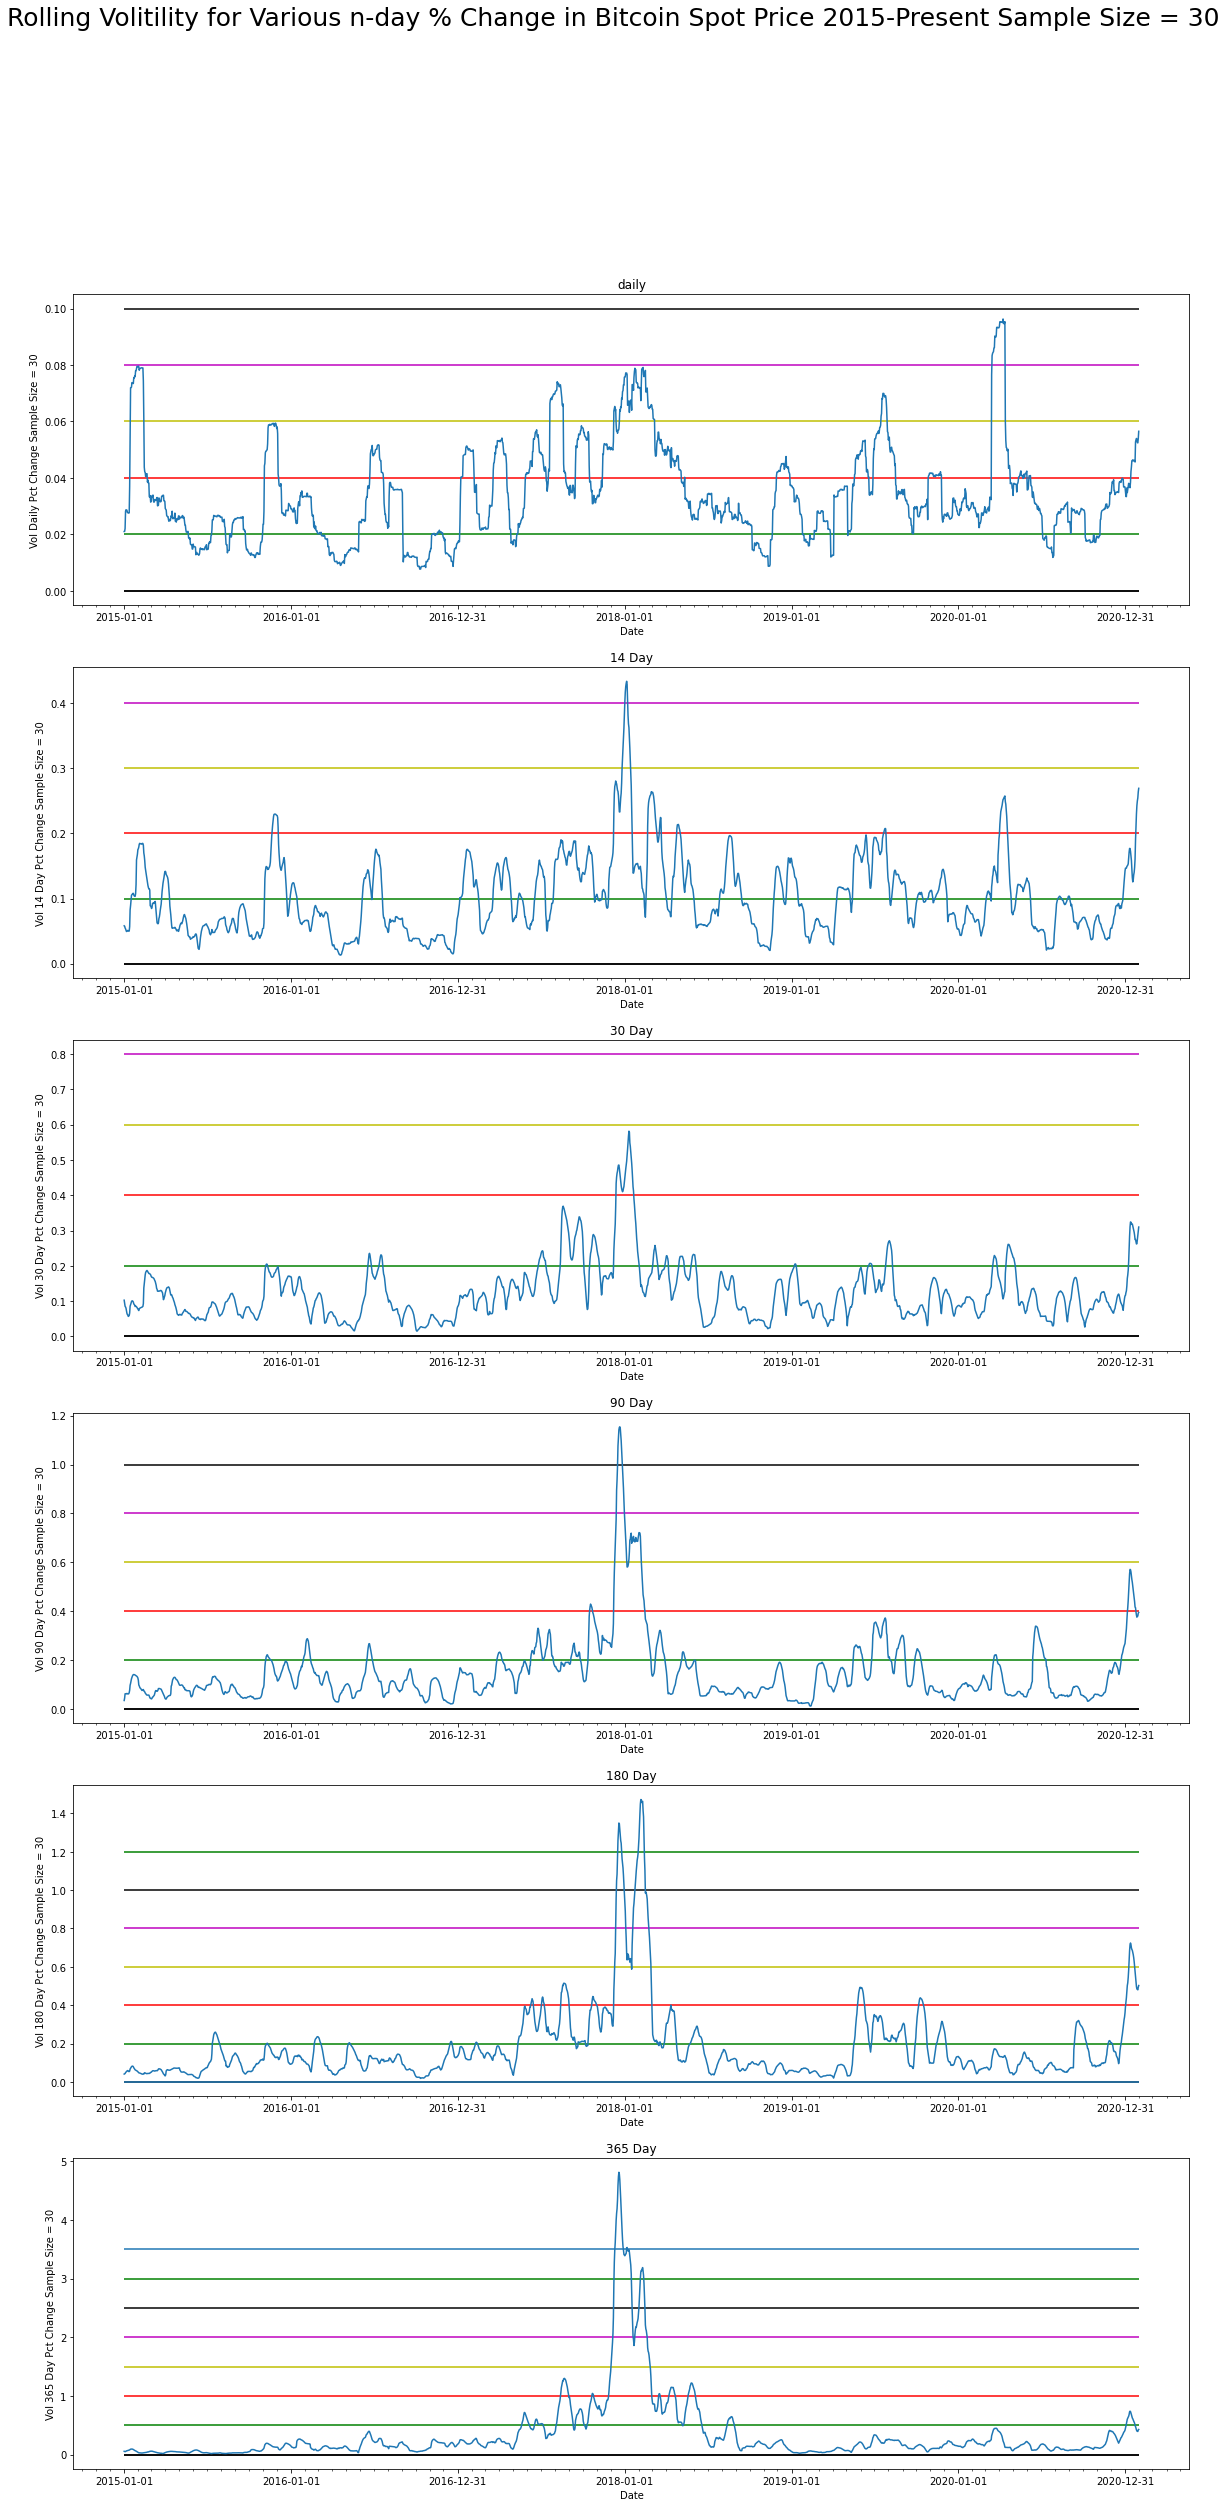

In [21]:
rangecrash=dfbitchange['vol_daily'].loc['2015-01-01':].index
valuescrash=dfbitchange['vol_daily'].loc['2015-01-01':].values
plt.rcParams['figure.figsize'] = [20, 40]
fig,axs=plt.subplots(6)
fig.suptitle('Rolling Volitility for Various n-day % Change in Bitcoin Spot Price 2015-Present Sample Size = 30',
             fontsize=25)
axs[0].plot(rangecrash,valuescrash)
axs[0].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(.02,rangecrash[0],rangecrash[-1],color='g')
axs[0].hlines(.04,rangecrash[0],rangecrash[-1],color='r')
axs[0].hlines(.06,rangecrash[0],rangecrash[-1],color='y')
axs[0].hlines(.08,rangecrash[0],rangecrash[-1],color='m')
axs[0].hlines(.1,rangecrash[0],rangecrash[-1],color='k')
axs[0].xaxis.set_major_locator(mdates.YearLocator())
axs[0].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[0].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[0].title.set_text('daily')
axs[0].set_ylabel('Vol Daily Pct Change Sample Size = 30')
axs[0].set_xlabel('Date')

rangecrash=dfbitchange['vol_bimonthly'].loc['2015-01-01':].index
valuescrash=dfbitchange['vol_bimonthly'].loc['2015-01-01':].values
axs[1].plot(rangecrash,valuescrash)
axs[1].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[1].hlines(.1,rangecrash[0],rangecrash[-1],color='g')
axs[1].hlines(.2,rangecrash[0],rangecrash[-1],color='r')
axs[1].hlines(.3,rangecrash[0],rangecrash[-1],color='y')
axs[1].hlines(.4,rangecrash[0],rangecrash[-1],color='m')
axs[1].xaxis.set_major_locator(mdates.YearLocator())
axs[1].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[1].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[1].title.set_text('14 Day')
axs[1].set_ylabel('Vol 14 Day Pct Change Sample Size = 30')
axs[1].set_xlabel('Date')

rangecrash=dfbitchange['vol_30Days'].loc['2015-01-01':].index
valuescrash=dfbitchange['vol_30Days'].loc['2015-01-01':].values
axs[2].plot(rangecrash,valuescrash)
axs[2].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[2].hlines(.2,rangecrash[0],rangecrash[-1],color='g')
axs[2].hlines(.4,rangecrash[0],rangecrash[-1],color='r')
axs[2].hlines(.6,rangecrash[0],rangecrash[-1],color='y')
axs[2].hlines(.8,rangecrash[0],rangecrash[-1],color='m')
axs[2].xaxis.set_major_locator(mdates.YearLocator())
axs[2].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[2].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[2].title.set_text('30 Day')
axs[2].set_ylabel('Vol 30 Day Pct Change Sample Size = 30')
axs[2].set_xlabel('Date')

rangecrash=dfbitchange['vol_90Days'].loc['2015-01-01':].index
valuescrash=dfbitchange['vol_90Days'].loc['2015-01-01':].values
axs[3].plot(rangecrash,valuescrash)
axs[3].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[3].hlines(.2,rangecrash[0],rangecrash[-1],color='g')
axs[3].hlines(.4,rangecrash[0],rangecrash[-1],color='r')
axs[3].hlines(.6,rangecrash[0],rangecrash[-1],color='y')
axs[3].hlines(.8,rangecrash[0],rangecrash[-1],color='m')
axs[3].hlines(1,rangecrash[0],rangecrash[-1],color='k')
axs[3].xaxis.set_major_locator(mdates.YearLocator())
axs[3].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[3].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[3].title.set_text('90 Day')
axs[3].set_ylabel('Vol 90 Day Pct Change Sample Size = 30')
axs[3].set_xlabel('Date')

rangecrash=dfbitchange['vol_180Days'].loc['2015-01-01':].index
valuescrash=dfbitchange['vol_180Days'].loc['2015-01-01':].values
axs[4].plot(rangecrash,valuescrash)
axs[4].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[4].hlines(.2,rangecrash[0],rangecrash[-1],color='g')
axs[4].hlines(.4,rangecrash[0],rangecrash[-1],color='r')
axs[4].hlines(.6,rangecrash[0],rangecrash[-1],color='y')
axs[4].hlines(.8,rangecrash[0],rangecrash[-1],color='m')
axs[4].hlines(1,rangecrash[0],rangecrash[-1],color='k')
axs[4].hlines(1.2,rangecrash[0],rangecrash[-1],color='g')
axs[4].xaxis.set_major_locator(mdates.YearLocator())
axs[4].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[4].hlines(0,rangecrash[0],rangecrash[-1])
axs[4].title.set_text('180 Day')
axs[4].set_ylabel('Vol 180 Day Pct Change Sample Size = 30')
axs[4].set_xlabel('Date')

rangecrash=dfbitchange['vol_365Days'].loc['2015-01-01':].index
valuescrash=dfbitchange['vol_365Days'].loc['2015-01-01':].values
axs[5].plot(rangecrash,valuescrash)
axs[5].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[5].hlines(.5,rangecrash[0],rangecrash[-1],color='g')
axs[5].hlines(1,rangecrash[0],rangecrash[-1],color='r')
axs[5].hlines(1.5,rangecrash[0],rangecrash[-1],color='y')
axs[5].hlines(2,rangecrash[0],rangecrash[-1],color='m')
axs[5].hlines(2.5,rangecrash[0],rangecrash[-1],color='k')
axs[5].hlines(3,rangecrash[0],rangecrash[-1],color='g')
axs[5].hlines(3.5,rangecrash[0],rangecrash[-1])
axs[5].xaxis.set_major_locator(mdates.YearLocator())
axs[5].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[5].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[5].title.set_text('365 Day')
axs[5].set_ylabel('Vol 365 Day Pct Change Sample Size = 30')
axs[5].set_xlabel('Date')

plt.show()

Using a sample size of 30, the only charts that give pause are the 90 and 180 day charts. We have not seen volatility this high in 90 day returns since just before the 2017 bubble popped. We also have not seen a vertical move like this in the volatility of 180 day returns since early/mid 2019. But volatility in the daily, bimonthly, monthly, and yearly % change appears to be reasonable. Let us increase the sample size and see what happens.

##### Sample Size = 90 over 1, 14, 30, 90, 180, 365 Day % Change

In [22]:
#rolling 90 period standard deviation of n-day percent change
dfbitchange['vol_daily']=dfbitchange['percent_daily'].rolling(90).std()
dfbitchange['vol_bimonthly']=dfbitchange['percent_bimonthly'].rolling(90).std()
dfbitchange['vol_30Days']=dfbitchange['percent_30Days'].rolling(90).std()
dfbitchange['vol_90Days']=dfbitchange['percent_90Days'].rolling(90).std()
dfbitchange['vol_180Days']=dfbitchange['percent_180Days'].rolling(90).std()
dfbitchange['vol_365Days']=dfbitchange['percent_365Days'].rolling(90).std()

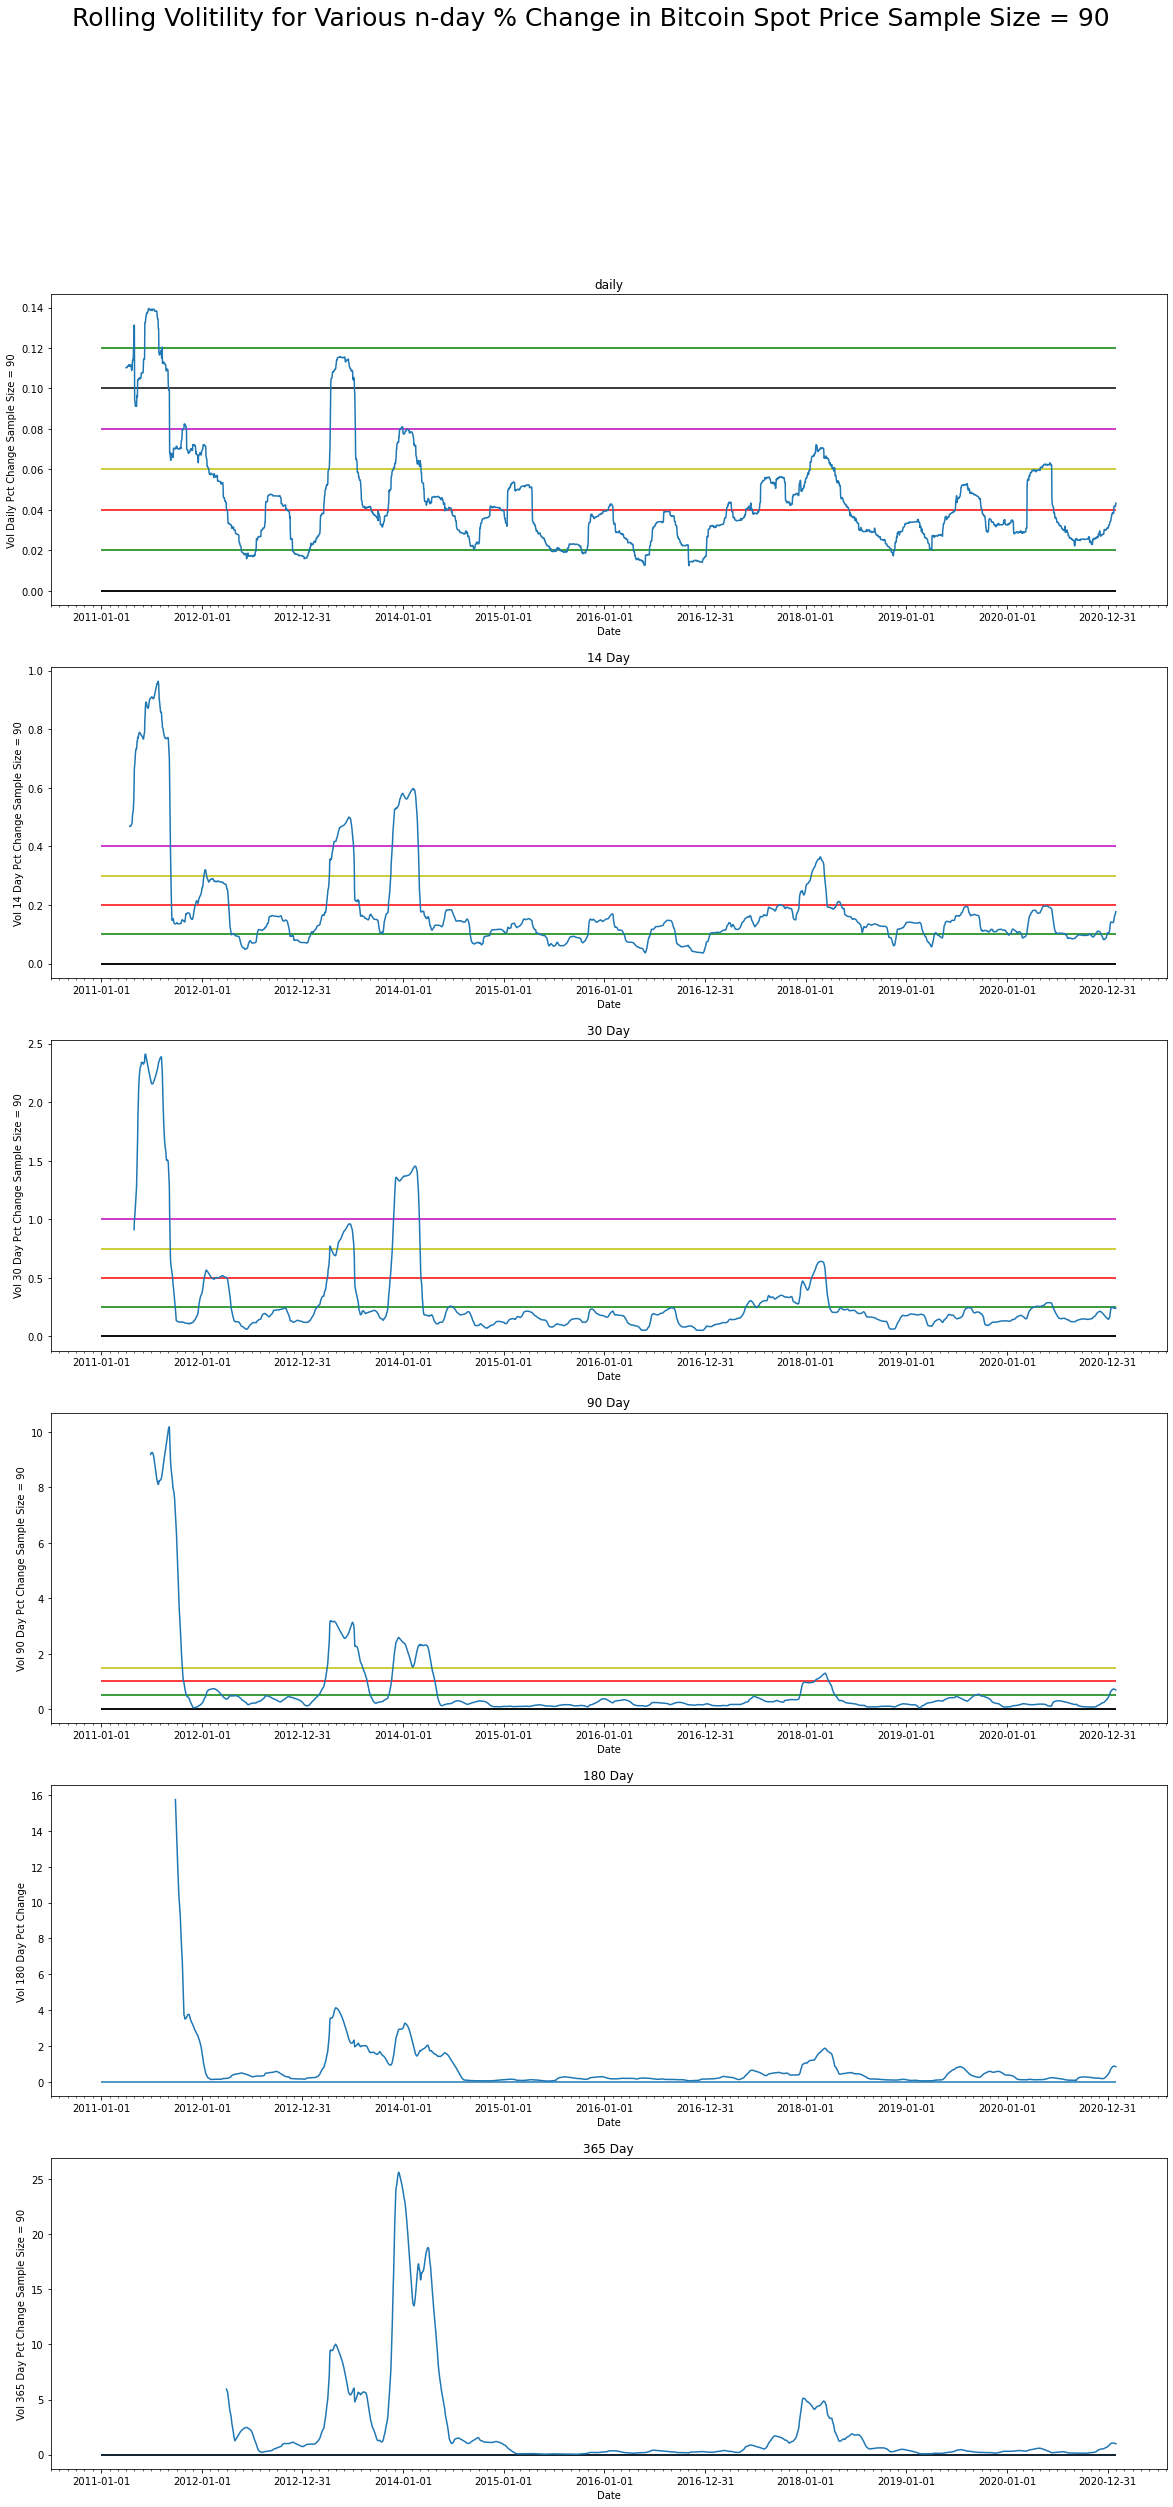

In [23]:
rangecrash=dfbitchange['vol_daily'].loc[:].index
valuescrash=dfbitchange['vol_daily'].loc[:].values
plt.rcParams['figure.figsize'] = [20, 40]
fig,axs=plt.subplots(6)
fig.suptitle('Rolling Volitility for Various n-day % Change in Bitcoin Spot Price Sample Size = 90',fontsize=25)
axs[0].plot(rangecrash,valuescrash)
axs[0].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(.02,rangecrash[0],rangecrash[-1],color='g')
axs[0].hlines(.04,rangecrash[0],rangecrash[-1],color='r')
axs[0].hlines(.06,rangecrash[0],rangecrash[-1],color='y')
axs[0].hlines(.08,rangecrash[0],rangecrash[-1],color='m')
axs[0].hlines(.1,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(.12,rangecrash[0],rangecrash[-1],color='g')
axs[0].xaxis.set_major_locator(mdates.YearLocator())
axs[0].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[0].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[0].title.set_text('daily')
axs[0].set_ylabel('Vol Daily Pct Change Sample Size = 90')
axs[0].set_xlabel('Date')

rangecrash=dfbitchange['vol_bimonthly'].loc[:].index
valuescrash=dfbitchange['vol_bimonthly'].loc[:].values
axs[1].plot(rangecrash,valuescrash)
axs[1].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[1].hlines(.1,rangecrash[0],rangecrash[-1],color='g')
axs[1].hlines(.2,rangecrash[0],rangecrash[-1],color='r')
axs[1].hlines(.3,rangecrash[0],rangecrash[-1],color='y')
axs[1].hlines(.4,rangecrash[0],rangecrash[-1],color='m')
axs[1].xaxis.set_major_locator(mdates.YearLocator())
axs[1].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[1].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[1].title.set_text('14 Day')
axs[1].set_ylabel('Vol 14 Day Pct Change Sample Size = 90')
axs[1].set_xlabel('Date')

rangecrash=dfbitchange['vol_30Days'].loc[:].index
valuescrash=dfbitchange['vol_30Days'].loc[:].values
axs[2].plot(rangecrash,valuescrash)
axs[2].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[2].hlines(.25,rangecrash[0],rangecrash[-1],color='g')
axs[2].hlines(.5,rangecrash[0],rangecrash[-1],color='r')
axs[2].hlines(.75,rangecrash[0],rangecrash[-1],color='y')
axs[2].hlines(1,rangecrash[0],rangecrash[-1],color='m')
axs[2].xaxis.set_major_locator(mdates.YearLocator())
axs[2].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[2].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[2].title.set_text('30 Day')
axs[2].set_ylabel('Vol 30 Day Pct Change Sample Size = 90')
axs[2].set_xlabel('Date')

rangecrash=dfbitchange['vol_90Days'].loc[:].index
valuescrash=dfbitchange['vol_90Days'].loc[:].values
axs[3].plot(rangecrash,valuescrash)
axs[3].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[3].hlines(.5,rangecrash[0],rangecrash[-1],color='g')
axs[3].hlines(1,rangecrash[0],rangecrash[-1],color='r')
axs[3].hlines(1.5,rangecrash[0],rangecrash[-1],color='y')
axs[3].xaxis.set_major_locator(mdates.YearLocator())
axs[3].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[3].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[3].title.set_text('90 Day')
axs[3].set_ylabel('Vol 90 Day Pct Change Sample Size = 90')
axs[3].set_xlabel('Date')

rangecrash=dfbitchange['vol_180Days'].loc[:].index
valuescrash=dfbitchange['vol_180Days'].loc[:].values
axs[4].plot(rangecrash,valuescrash)
axs[4].xaxis.set_major_locator(mdates.YearLocator())
axs[4].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[4].hlines(0,rangecrash[0],rangecrash[-1])
axs[4].title.set_text('180 Day')
axs[4].set_ylabel('Vol 180 Day Pct Change')
axs[4].set_xlabel('Date')

rangecrash=dfbitchange['vol_365Days'].loc[:].index
valuescrash=dfbitchange['vol_365Days'].loc[:].values
axs[5].plot(rangecrash,valuescrash)
axs[5].hlines(0,rangecrash[0],rangecrash[-1])
axs[5].xaxis.set_major_locator(mdates.YearLocator())
axs[5].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[5].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[5].title.set_text('365 Day')
axs[5].set_ylabel('Vol 365 Day Pct Change Sample Size = 90')
axs[5].set_xlabel('Date')

plt.show()

##### Sample Size = 90 over 1, 14, 30, 90, 180, 365 Day % Change 2015-Present

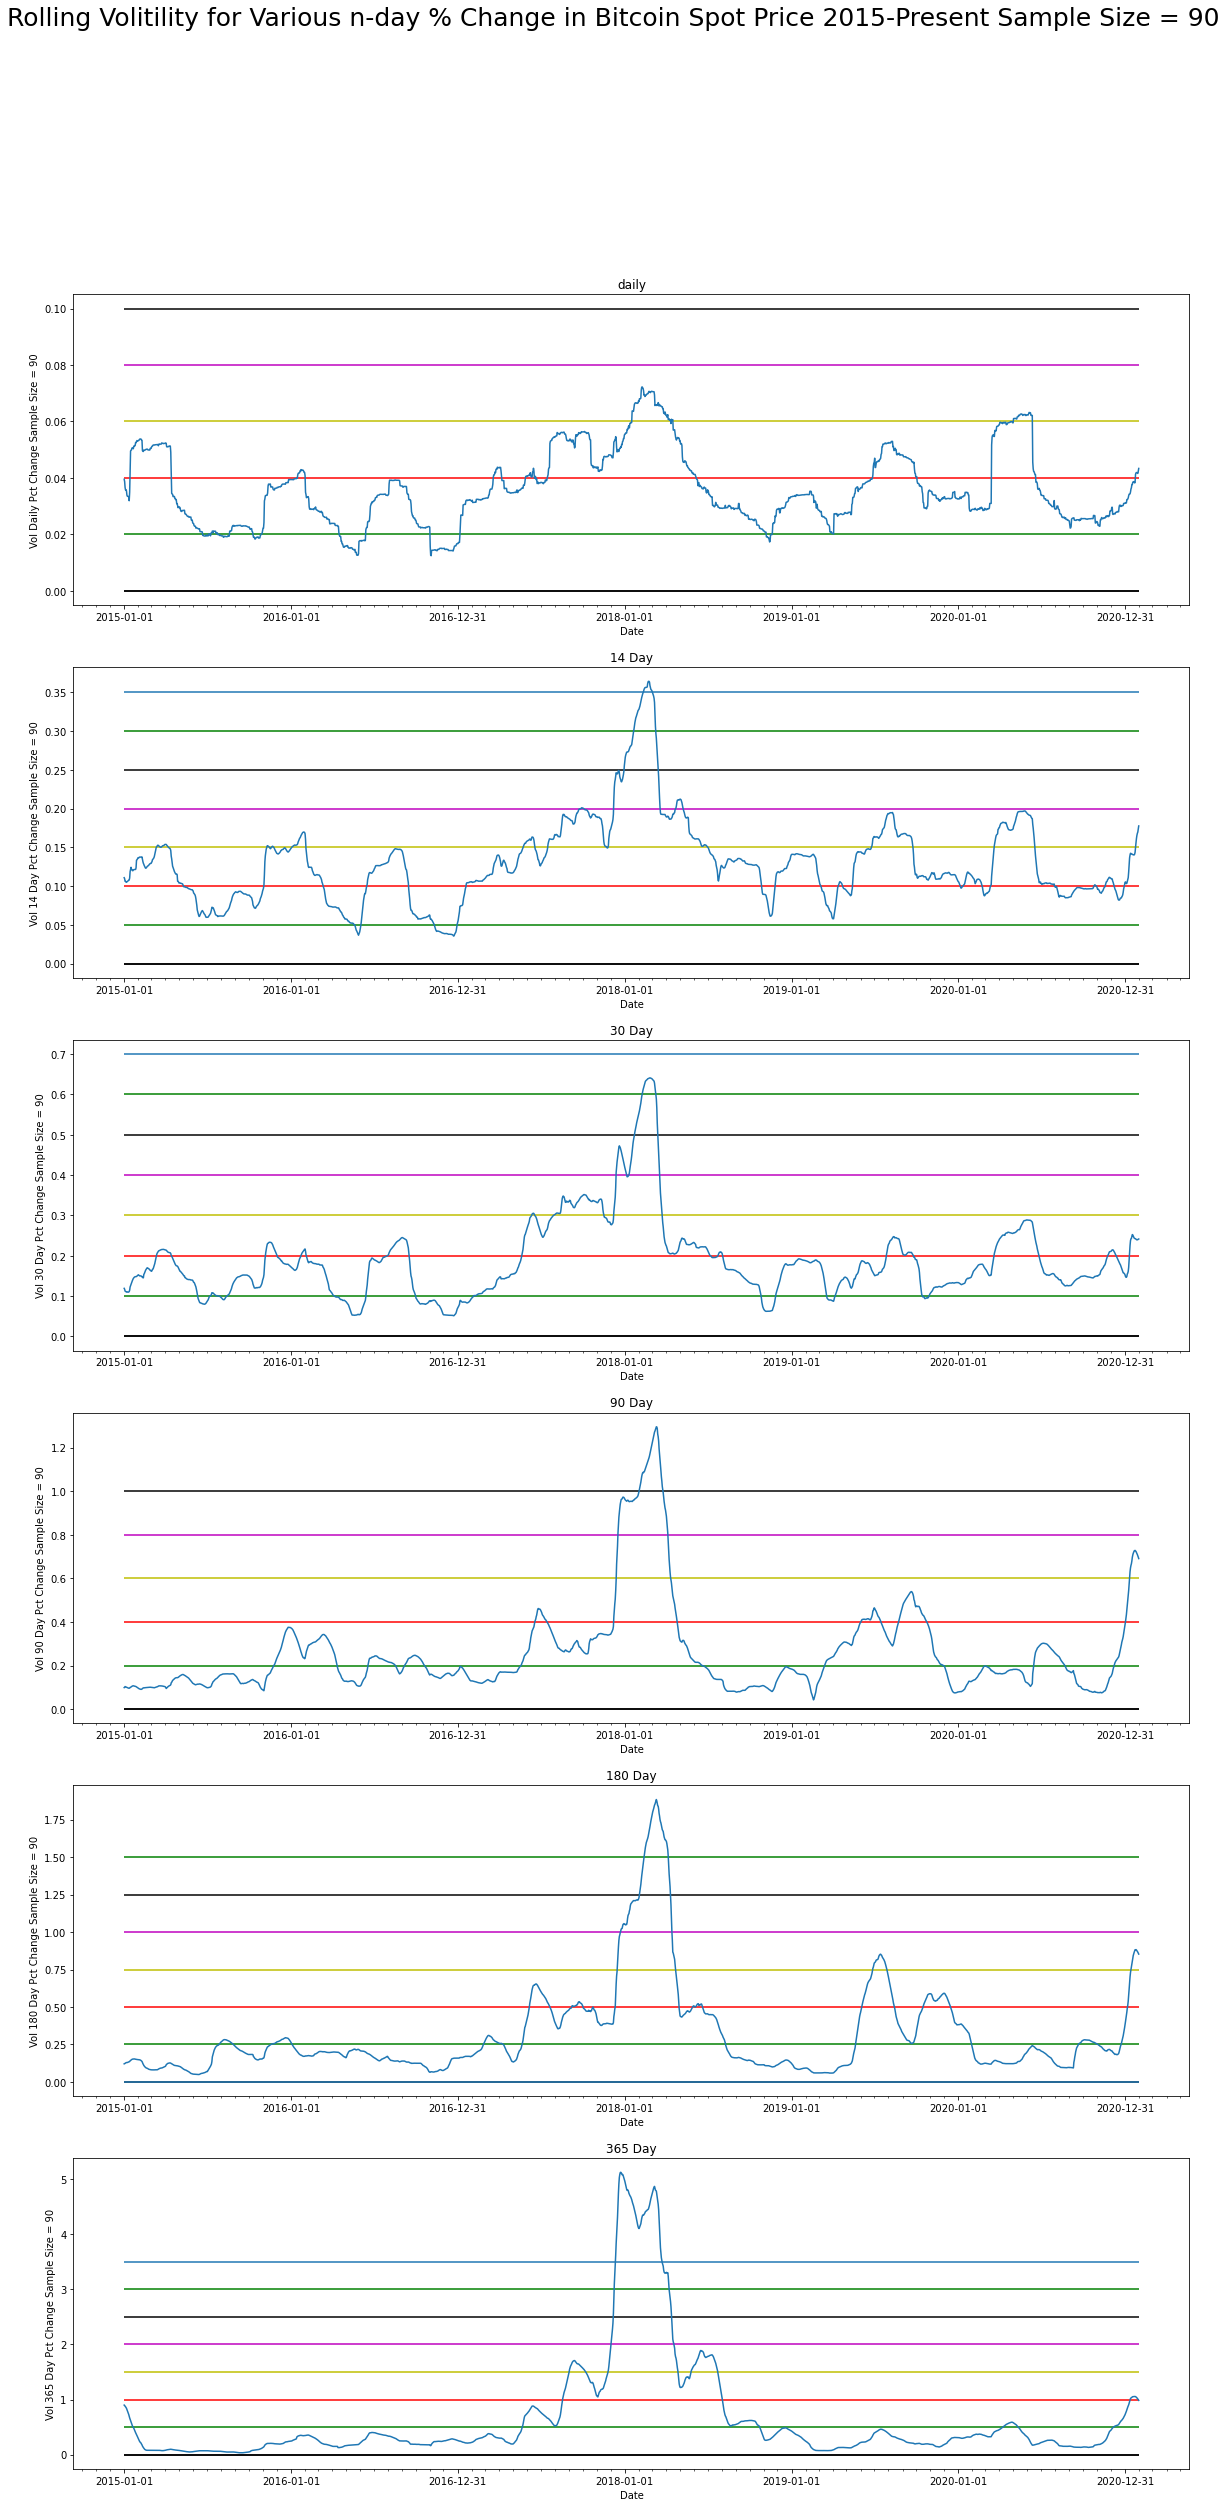

In [24]:
rangecrash=dfbitchange['vol_daily'].loc['2015-01-01':].index
valuescrash=dfbitchange['vol_daily'].loc['2015-01-01':].values
plt.rcParams['figure.figsize'] = [20, 40]
fig,axs=plt.subplots(6)
fig.suptitle('Rolling Volitility for Various n-day % Change in Bitcoin Spot Price 2015-Present Sample Size = 90',
             fontsize=25)
axs[0].plot(rangecrash,valuescrash)
axs[0].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(.02,rangecrash[0],rangecrash[-1],color='g')
axs[0].hlines(.04,rangecrash[0],rangecrash[-1],color='r')
axs[0].hlines(.06,rangecrash[0],rangecrash[-1],color='y')
axs[0].hlines(.08,rangecrash[0],rangecrash[-1],color='m')
axs[0].hlines(.1,rangecrash[0],rangecrash[-1],color='k')
axs[0].xaxis.set_major_locator(mdates.YearLocator())
axs[0].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[0].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[0].title.set_text('daily')
axs[0].set_ylabel('Vol Daily Pct Change Sample Size = 90')
axs[0].set_xlabel('Date')

rangecrash=dfbitchange['vol_bimonthly'].loc['2015-01-01':].index
valuescrash=dfbitchange['vol_bimonthly'].loc['2015-01-01':].values
axs[1].plot(rangecrash,valuescrash)
axs[1].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[1].hlines(.05,rangecrash[0],rangecrash[-1],color='g')
axs[1].hlines(.1,rangecrash[0],rangecrash[-1],color='r')
axs[1].hlines(.15,rangecrash[0],rangecrash[-1],color='y')
axs[1].hlines(.2,rangecrash[0],rangecrash[-1],color='m')
axs[1].hlines(.25,rangecrash[0],rangecrash[-1],color='k')
axs[1].hlines(.3,rangecrash[0],rangecrash[-1],color='g')
axs[1].hlines(.35,rangecrash[0],rangecrash[-1])
axs[1].xaxis.set_major_locator(mdates.YearLocator())
axs[1].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[1].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[1].title.set_text('14 Day')
axs[1].set_ylabel('Vol 14 Day Pct Change Sample Size = 90')
axs[1].set_xlabel('Date')

rangecrash=dfbitchange['vol_30Days'].loc['2015-01-01':].index
valuescrash=dfbitchange['vol_30Days'].loc['2015-01-01':].values
axs[2].plot(rangecrash,valuescrash)
axs[2].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[2].hlines(.1,rangecrash[0],rangecrash[-1],color='g')
axs[2].hlines(.2,rangecrash[0],rangecrash[-1],color='r')
axs[2].hlines(.3,rangecrash[0],rangecrash[-1],color='y')
axs[2].hlines(.4,rangecrash[0],rangecrash[-1],color='m')
axs[2].hlines(.5,rangecrash[0],rangecrash[-1],color='k')
axs[2].hlines(.6,rangecrash[0],rangecrash[-1],color='g')
axs[2].hlines(.7,rangecrash[0],rangecrash[-1])
axs[2].xaxis.set_major_locator(mdates.YearLocator())
axs[2].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[2].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[2].title.set_text('30 Day')
axs[2].set_ylabel('Vol 30 Day Pct Change Sample Size = 90')
axs[2].set_xlabel('Date')

rangecrash=dfbitchange['vol_90Days'].loc['2015-01-01':].index
valuescrash=dfbitchange['vol_90Days'].loc['2015-01-01':].values
axs[3].plot(rangecrash,valuescrash)
axs[3].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[3].hlines(.2,rangecrash[0],rangecrash[-1],color='g')
axs[3].hlines(.4,rangecrash[0],rangecrash[-1],color='r')
axs[3].hlines(.6,rangecrash[0],rangecrash[-1],color='y')
axs[3].hlines(.8,rangecrash[0],rangecrash[-1],color='m')
axs[3].hlines(1,rangecrash[0],rangecrash[-1],color='k')
axs[3].xaxis.set_major_locator(mdates.YearLocator())
axs[3].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[3].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[3].title.set_text('90 Day')
axs[3].set_ylabel('Vol 90 Day Pct Change Sample Size = 90')
axs[3].set_xlabel('Date')

rangecrash=dfbitchange['vol_180Days'].loc['2015-01-01':].index
valuescrash=dfbitchange['vol_180Days'].loc['2015-01-01':].values
axs[4].plot(rangecrash,valuescrash)
axs[4].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[4].hlines(.25,rangecrash[0],rangecrash[-1],color='g')
axs[4].hlines(.5,rangecrash[0],rangecrash[-1],color='r')
axs[4].hlines(.75,rangecrash[0],rangecrash[-1],color='y')
axs[4].hlines(1,rangecrash[0],rangecrash[-1],color='m')
axs[4].hlines(1.25,rangecrash[0],rangecrash[-1],color='k')
axs[4].hlines(1.5,rangecrash[0],rangecrash[-1],color='g')
axs[4].xaxis.set_major_locator(mdates.YearLocator())
axs[4].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[4].hlines(0,rangecrash[0],rangecrash[-1])
axs[4].title.set_text('180 Day')
axs[4].set_ylabel('Vol 180 Day Pct Change Sample Size = 90')
axs[4].set_xlabel('Date')

rangecrash=dfbitchange['vol_365Days'].loc['2015-01-01':].index
valuescrash=dfbitchange['vol_365Days'].loc['2015-01-01':].values
axs[5].plot(rangecrash,valuescrash)
axs[5].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[5].hlines(.5,rangecrash[0],rangecrash[-1],color='g')
axs[5].hlines(1,rangecrash[0],rangecrash[-1],color='r')
axs[5].hlines(1.5,rangecrash[0],rangecrash[-1],color='y')
axs[5].hlines(2,rangecrash[0],rangecrash[-1],color='m')
axs[5].hlines(2.5,rangecrash[0],rangecrash[-1],color='k')
axs[5].hlines(3,rangecrash[0],rangecrash[-1],color='g')
axs[5].hlines(3.5,rangecrash[0],rangecrash[-1])
axs[5].xaxis.set_major_locator(mdates.YearLocator())
axs[5].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[5].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[5].title.set_text('365 Day')
axs[5].set_ylabel('Vol 365 Day Pct Change Sample Size = 90')
axs[5].set_xlabel('Date')

plt.show()

Again, it looks like volatility is increasing for both short and long term, however as you can see in the daily chart, daily price volatility is historically low.  This is surprising, given that we have been seeing such massive moved in recent day.  The signal may be getting drowned out due to the sample size, but even with a sample size of 30, the volatility in daily percent change was low.  This indicates that this rally may be in a more sustainable and healthier place than in the past.  Let us increase the sample size once more.  

##### Sample Size = 180 over 1, 14, 30, 90, 180, 365 Day % Change

In [25]:
#rolling 180 period standard deviation of n-day percent change
dfbitchange['vol_daily']=dfbitchange['percent_daily'].rolling(180).std()
dfbitchange['vol_bimonthly']=dfbitchange['percent_bimonthly'].rolling(180).std()
dfbitchange['vol_30Days']=dfbitchange['percent_30Days'].rolling(180).std()
dfbitchange['vol_90Days']=dfbitchange['percent_90Days'].rolling(180).std()
dfbitchange['vol_180Days']=dfbitchange['percent_180Days'].rolling(180).std()
dfbitchange['vol_365Days']=dfbitchange['percent_365Days'].rolling(180).std()

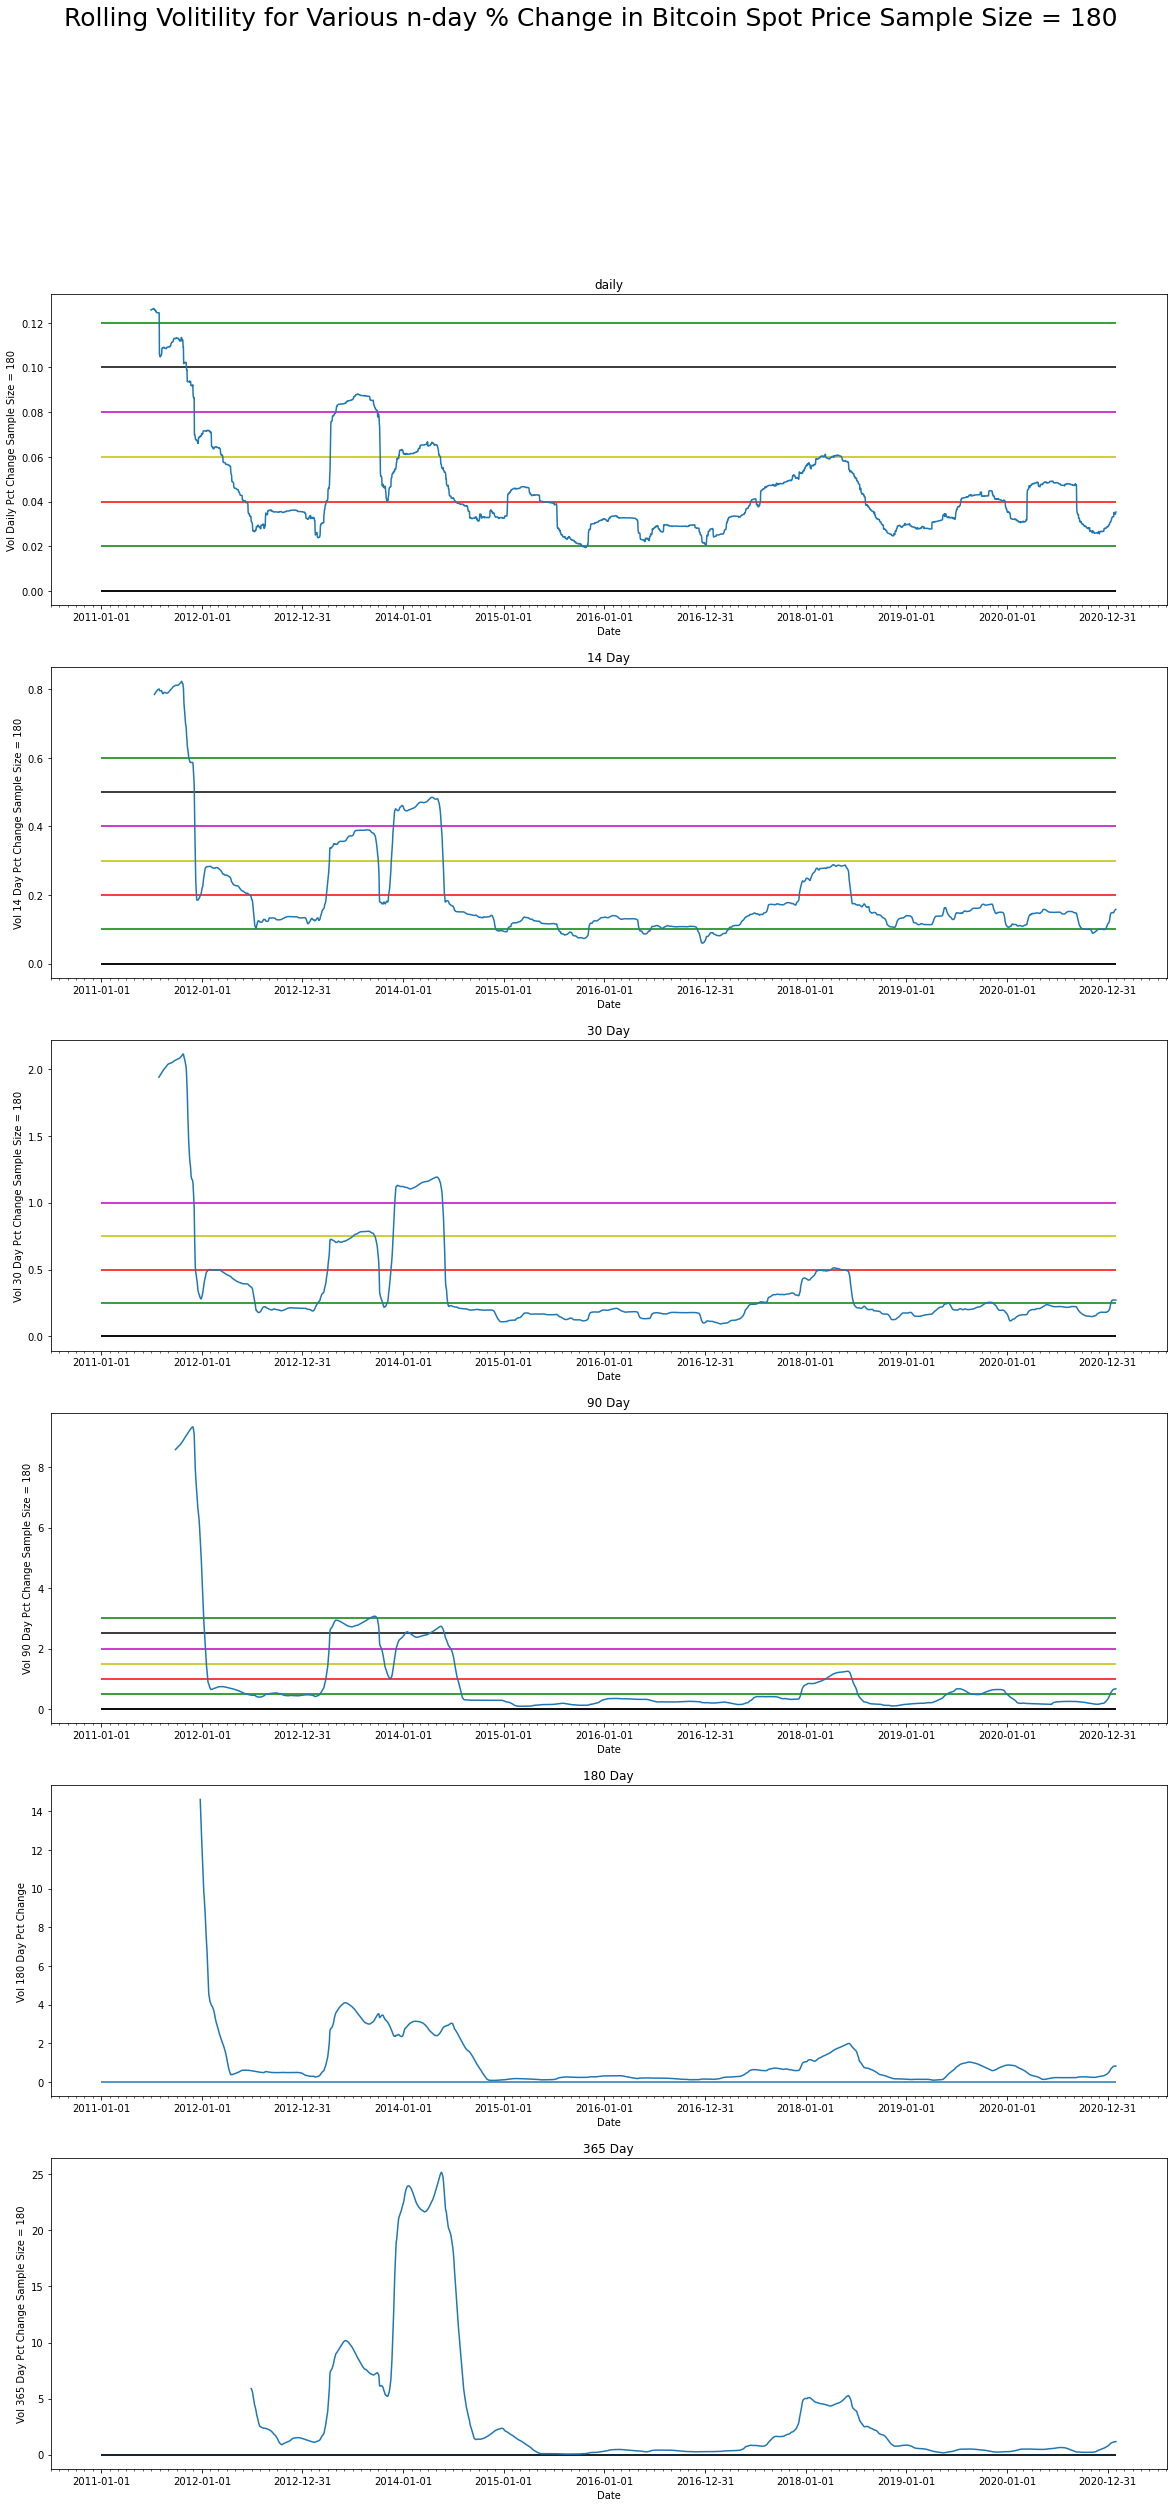

In [26]:
rangecrash=dfbitchange['vol_daily'].loc[:].index
valuescrash=dfbitchange['vol_daily'].loc[:].values
plt.rcParams['figure.figsize'] = [20, 40]
fig,axs=plt.subplots(6)
fig.suptitle('Rolling Volitility for Various n-day % Change in Bitcoin Spot Price Sample Size = 180',fontsize=25)
axs[0].plot(rangecrash,valuescrash)
axs[0].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(.02,rangecrash[0],rangecrash[-1],color='g')
axs[0].hlines(.04,rangecrash[0],rangecrash[-1],color='r')
axs[0].hlines(.06,rangecrash[0],rangecrash[-1],color='y')
axs[0].hlines(.08,rangecrash[0],rangecrash[-1],color='m')
axs[0].hlines(.1,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(.12,rangecrash[0],rangecrash[-1],color='g')
axs[0].xaxis.set_major_locator(mdates.YearLocator())
axs[0].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[0].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[0].title.set_text('daily')
axs[0].set_ylabel('Vol Daily Pct Change Sample Size = 180')
axs[0].set_xlabel('Date')

rangecrash=dfbitchange['vol_bimonthly'].loc[:].index
valuescrash=dfbitchange['vol_bimonthly'].loc[:].values
axs[1].plot(rangecrash,valuescrash)
axs[1].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[1].hlines(.1,rangecrash[0],rangecrash[-1],color='g')
axs[1].hlines(.2,rangecrash[0],rangecrash[-1],color='r')
axs[1].hlines(.3,rangecrash[0],rangecrash[-1],color='y')
axs[1].hlines(.4,rangecrash[0],rangecrash[-1],color='m')
axs[1].hlines(.5,rangecrash[0],rangecrash[-1],color='k')
axs[1].hlines(.6,rangecrash[0],rangecrash[-1],color='g')
axs[1].xaxis.set_major_locator(mdates.YearLocator())
axs[1].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[1].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[1].title.set_text('14 Day')
axs[1].set_ylabel('Vol 14 Day Pct Change Sample Size = 180')
axs[1].set_xlabel('Date')

rangecrash=dfbitchange['vol_30Days'].loc[:].index
valuescrash=dfbitchange['vol_30Days'].loc[:].values
axs[2].plot(rangecrash,valuescrash)
axs[2].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[2].hlines(.25,rangecrash[0],rangecrash[-1],color='g')
axs[2].hlines(.5,rangecrash[0],rangecrash[-1],color='r')
axs[2].hlines(.75,rangecrash[0],rangecrash[-1],color='y')
axs[2].hlines(1,rangecrash[0],rangecrash[-1],color='m')
axs[2].xaxis.set_major_locator(mdates.YearLocator())
axs[2].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[2].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[2].title.set_text('30 Day')
axs[2].set_ylabel('Vol 30 Day Pct Change Sample Size = 180')
axs[2].set_xlabel('Date')

rangecrash=dfbitchange['vol_90Days'].loc[:].index
valuescrash=dfbitchange['vol_90Days'].loc[:].values
axs[3].plot(rangecrash,valuescrash)
axs[3].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[3].hlines(.5,rangecrash[0],rangecrash[-1],color='g')
axs[3].hlines(1,rangecrash[0],rangecrash[-1],color='r')
axs[3].hlines(1.5,rangecrash[0],rangecrash[-1],color='y')
axs[3].hlines(2,rangecrash[0],rangecrash[-1],color='m')
axs[3].hlines(2.5,rangecrash[0],rangecrash[-1],color='k')
axs[3].hlines(3,rangecrash[0],rangecrash[-1],color='g')
axs[3].xaxis.set_major_locator(mdates.YearLocator())
axs[3].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[3].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[3].title.set_text('90 Day')
axs[3].set_ylabel('Vol 90 Day Pct Change Sample Size = 180')
axs[3].set_xlabel('Date')

rangecrash=dfbitchange['vol_180Days'].loc[:].index
valuescrash=dfbitchange['vol_180Days'].loc[:].values
axs[4].plot(rangecrash,valuescrash)
axs[4].xaxis.set_major_locator(mdates.YearLocator())
axs[4].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[4].hlines(0,rangecrash[0],rangecrash[-1])
axs[4].title.set_text('180 Day')
axs[4].set_ylabel('Vol 180 Day Pct Change')
axs[4].set_xlabel('Date')

rangecrash=dfbitchange['vol_365Days'].loc[:].index
valuescrash=dfbitchange['vol_365Days'].loc[:].values
axs[5].plot(rangecrash,valuescrash)
axs[5].hlines(0,rangecrash[0],rangecrash[-1])
axs[5].xaxis.set_major_locator(mdates.YearLocator())
axs[5].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[5].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[5].title.set_text('365 Day')
axs[5].set_ylabel('Vol 365 Day Pct Change Sample Size = 180')
axs[5].set_xlabel('Date')

plt.show()

##### Sample Size = 180 over 1, 14, 30, 90, 180, 365 Day % Change 2015-Present 

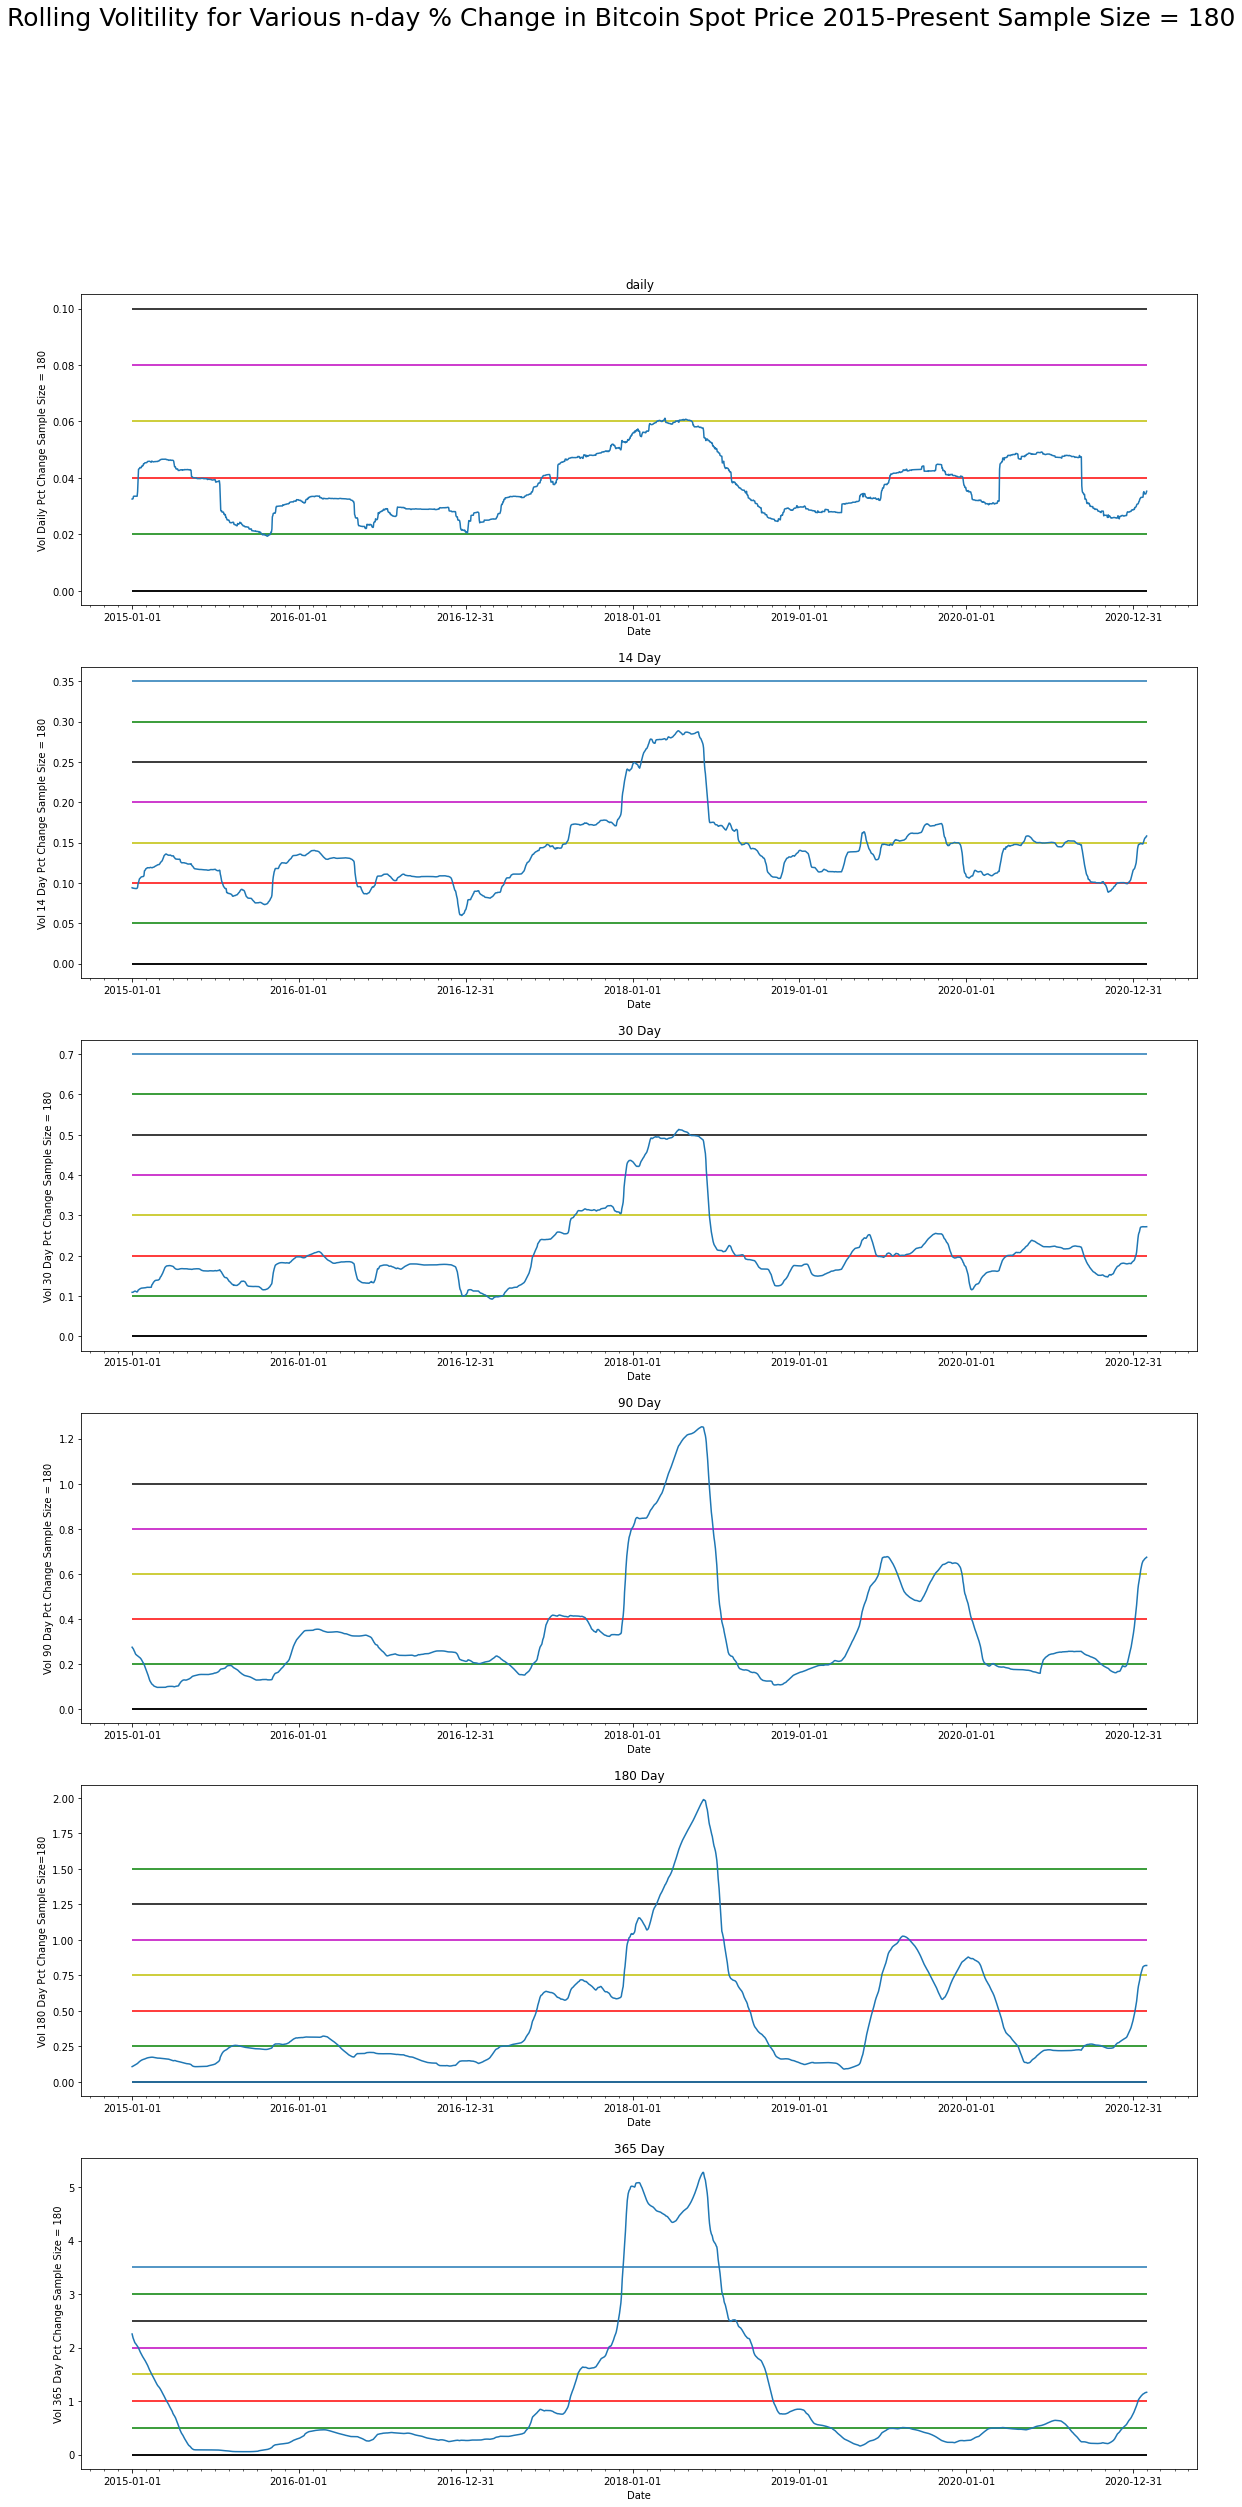

In [27]:
rangecrash=dfbitchange['vol_daily'].loc['2015-01-01':].index
valuescrash=dfbitchange['vol_daily'].loc['2015-01-01':].values
plt.rcParams['figure.figsize'] = [20, 40]
fig,axs=plt.subplots(6)
fig.suptitle('Rolling Volitility for Various n-day % Change in Bitcoin Spot Price 2015-Present Sample Size = 180',
             fontsize=25)
axs[0].plot(rangecrash,valuescrash)
axs[0].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(.02,rangecrash[0],rangecrash[-1],color='g')
axs[0].hlines(.04,rangecrash[0],rangecrash[-1],color='r')
axs[0].hlines(.06,rangecrash[0],rangecrash[-1],color='y')
axs[0].hlines(.08,rangecrash[0],rangecrash[-1],color='m')
axs[0].hlines(.1,rangecrash[0],rangecrash[-1],color='k')
axs[0].xaxis.set_major_locator(mdates.YearLocator())
axs[0].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[0].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[0].title.set_text('daily')
axs[0].set_ylabel('Vol Daily Pct Change Sample Size = 180')
axs[0].set_xlabel('Date')

rangecrash=dfbitchange['vol_bimonthly'].loc['2015-01-01':].index
valuescrash=dfbitchange['vol_bimonthly'].loc['2015-01-01':].values
axs[1].plot(rangecrash,valuescrash)
axs[1].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[1].hlines(.05,rangecrash[0],rangecrash[-1],color='g')
axs[1].hlines(.1,rangecrash[0],rangecrash[-1],color='r')
axs[1].hlines(.15,rangecrash[0],rangecrash[-1],color='y')
axs[1].hlines(.2,rangecrash[0],rangecrash[-1],color='m')
axs[1].hlines(.25,rangecrash[0],rangecrash[-1],color='k')
axs[1].hlines(.3,rangecrash[0],rangecrash[-1],color='g')
axs[1].hlines(.35,rangecrash[0],rangecrash[-1])
axs[1].xaxis.set_major_locator(mdates.YearLocator())
axs[1].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[1].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[1].title.set_text('14 Day')
axs[1].set_ylabel('Vol 14 Day Pct Change Sample Size = 180')
axs[1].set_xlabel('Date')

rangecrash=dfbitchange['vol_30Days'].loc['2015-01-01':].index
valuescrash=dfbitchange['vol_30Days'].loc['2015-01-01':].values
axs[2].plot(rangecrash,valuescrash)
axs[2].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[2].hlines(.1,rangecrash[0],rangecrash[-1],color='g')
axs[2].hlines(.2,rangecrash[0],rangecrash[-1],color='r')
axs[2].hlines(.3,rangecrash[0],rangecrash[-1],color='y')
axs[2].hlines(.4,rangecrash[0],rangecrash[-1],color='m')
axs[2].hlines(.5,rangecrash[0],rangecrash[-1],color='k')
axs[2].hlines(.6,rangecrash[0],rangecrash[-1],color='g')
axs[2].hlines(.7,rangecrash[0],rangecrash[-1])
axs[2].xaxis.set_major_locator(mdates.YearLocator())
axs[2].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[2].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[2].title.set_text('30 Day')
axs[2].set_ylabel('Vol 30 Day Pct Change Sample Size = 180')
axs[2].set_xlabel('Date')

rangecrash=dfbitchange['vol_90Days'].loc['2015-01-01':].index
valuescrash=dfbitchange['vol_90Days'].loc['2015-01-01':].values
axs[3].plot(rangecrash,valuescrash)
axs[3].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[3].hlines(.2,rangecrash[0],rangecrash[-1],color='g')
axs[3].hlines(.4,rangecrash[0],rangecrash[-1],color='r')
axs[3].hlines(.6,rangecrash[0],rangecrash[-1],color='y')
axs[3].hlines(.8,rangecrash[0],rangecrash[-1],color='m')
axs[3].hlines(1,rangecrash[0],rangecrash[-1],color='k')
axs[3].xaxis.set_major_locator(mdates.YearLocator())
axs[3].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[3].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[3].title.set_text('90 Day')
axs[3].set_ylabel('Vol 90 Day Pct Change Sample Size = 180')
axs[3].set_xlabel('Date')

rangecrash=dfbitchange['vol_180Days'].loc['2015-01-01':].index
valuescrash=dfbitchange['vol_180Days'].loc['2015-01-01':].values
axs[4].plot(rangecrash,valuescrash)
axs[4].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[4].hlines(.25,rangecrash[0],rangecrash[-1],color='g')
axs[4].hlines(.5,rangecrash[0],rangecrash[-1],color='r')
axs[4].hlines(.75,rangecrash[0],rangecrash[-1],color='y')
axs[4].hlines(1,rangecrash[0],rangecrash[-1],color='m')
axs[4].hlines(1.25,rangecrash[0],rangecrash[-1],color='k')
axs[4].hlines(1.5,rangecrash[0],rangecrash[-1],color='g')
axs[4].xaxis.set_major_locator(mdates.YearLocator())
axs[4].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[4].hlines(0,rangecrash[0],rangecrash[-1])
axs[4].title.set_text('180 Day')
axs[4].set_ylabel('Vol 180 Day Pct Change Sample Size=180')
axs[4].set_xlabel('Date')

rangecrash=dfbitchange['vol_365Days'].loc['2015-01-01':].index
valuescrash=dfbitchange['vol_365Days'].loc['2015-01-01':].values
axs[5].plot(rangecrash,valuescrash)
axs[5].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[5].hlines(.5,rangecrash[0],rangecrash[-1],color='g')
axs[5].hlines(1,rangecrash[0],rangecrash[-1],color='r')
axs[5].hlines(1.5,rangecrash[0],rangecrash[-1],color='y')
axs[5].hlines(2,rangecrash[0],rangecrash[-1],color='m')
axs[5].hlines(2.5,rangecrash[0],rangecrash[-1],color='k')
axs[5].hlines(3,rangecrash[0],rangecrash[-1],color='g')
axs[5].hlines(3.5,rangecrash[0],rangecrash[-1])
axs[5].xaxis.set_major_locator(mdates.YearLocator())
axs[5].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[5].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[5].title.set_text('365 Day')
axs[5].set_ylabel('Vol 365 Day Pct Change Sample Size = 180')
axs[5].set_xlabel('Date')

plt.show()

Again, we are seeing volatility for long term increasing steadily, but the volatility in daily, weekly and monthly percent change is not going crazy. We may just be seeing a sizable increase in longer term gains due to sustained short term growth. If you look at the 14 day chart, the volatility of the 14 day percent change have hovered around 10 percent for the last 6 months. Most of this volatility can be assumed to be to the upside because bitcoins price has increased dramatically since last June. This can be thought of as sustained and steady growth. It is worth keeping an eye on, but there is reason to believe that we have not yet entered into bubble burst territory. These gains may in fact be sustainable for some time. But one never knows for sure.   

### Bitcoin Historical Price Dips

In order to better understand the potential near to medium term downside risks of bitcoin, we should look at the distributions of historical price dips. 

#### Daily Dips

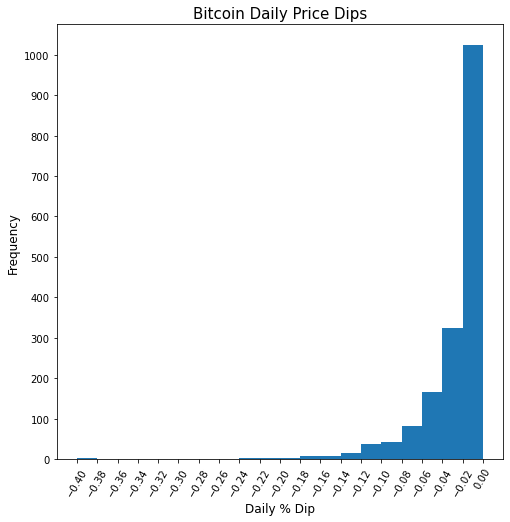

In [28]:
plt.rcParams['figure.figsize'] = [8, 8]
bins=np.append(np.arange(-.4,0,.02),0)
x=dfbitchange['percent_daily'].loc[dfbitchange['percent_daily']<0]
plt.hist(x.values,bins=bins)
plt.title('Bitcoin Daily Price Dips',fontsize=15)
plt.xlabel('Daily % Dip',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.xticks(bins, rotation=60)
plt.yticks(np.arange(0,1100,100))
plt.show()

As we can see from the histogram, daily dips seem do decay exponentially towards -18%.  It is important to note that during the liquidity crisis on March 16th 2020, the price of bitcoin dipped 40% in a single day.  Due to the current macro-economic climate this possible to happen again.  Leverage should only be taken with these charts in mind.  

##### How Often do Daily Dips Occur?

In [29]:
proportion=np.round(x.dropna().count()/dfbitchange['percent_daily'].dropna().count(),4)*100
print('Daily dips occur '+str(proportion) +'% of the time')

Daily dips occur 46.69% of the time


##### Max Daily Dip

In [30]:
dfbitchange.loc[dfbitchange['percent_daily']==dfbitchange['percent_daily'].min()][['percent_daily']]

percent_daily
Date                     
2020-03-14      -0.391404

##### Over 30% Daily Dip

In [31]:
dfbitchange.loc[dfbitchange['percent_daily']<-.3][['percent_daily']]

percent_daily
Date                     
2013-04-11      -0.376763
2013-04-12      -0.380167
2020-03-14      -0.391404

##### Over 20% Daily Dip

In [32]:
dfbitchange.loc[dfbitchange['percent_daily']<-.2][['percent_daily']]

percent_daily
Date                     
2011-10-18      -0.228715
2012-08-19      -0.213638
2013-04-11      -0.376763
2013-04-12      -0.380167
2015-01-14      -0.235567
2018-01-17      -0.202052
2020-03-14      -0.391404

##### How Common are Daily Dips Greater than 10%?

In [33]:
part=dfbitchange.loc[dfbitchange['percent_daily']<-.1][['percent_daily']].count()
whole=dfbitchange['percent_daily'].dropna().count()
proportion=np.round((list(part/whole)[0]*100),3)
print('Daily dips of greater than 10% occur '+str(proportion)+'% of the time')

Daily dips of greater than 10% occur 2.118% of the time


#### Weekly Dips

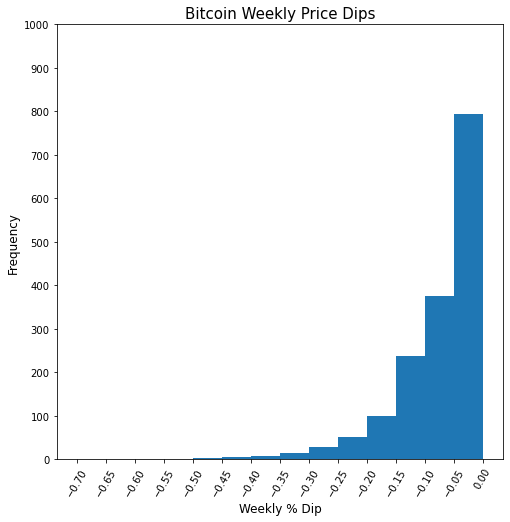

In [34]:
plt.rcParams['figure.figsize'] = [8, 8]
bins=np.append(np.arange(-.7,0,.05),0)
x=dfbitchange['percent_weekly'].loc[dfbitchange['percent_weekly']<0]
plt.hist(x.values,bins=bins)
plt.title('Bitcoin Weekly Price Dips',fontsize=15)
plt.xlabel('Weekly % Dip',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.xticks(bins, rotation=60)
plt.yticks(np.arange(0,1100,100))
plt.show()

##### How Often do Weekly Dips Occur

In [35]:
proportion=np.round(x.dropna().count()/dfbitchange['percent_weekly'].dropna().count(),4)*100
print('Weekly dips occur '+str(proportion) +'% of the time')

Weekly dips occur 43.99% of the time


##### Max Weekly Dip

In [36]:
dfbitchange.loc[dfbitchange['percent_weekly']==dfbitchange['percent_weekly'].min()][['percent_weekly']]

percent_weekly
Date                      
2013-04-16       -0.617631

##### Over 50% Weekly Dip

In [37]:
dfbitchange.loc[dfbitchange['percent_weekly']<-.5][['percent_weekly']]

percent_weekly
Date                      
2013-04-15       -0.505435
2013-04-16       -0.617631
2013-04-17       -0.567677

##### Over 40% Weekly Dip

In [38]:
dfbitchange.loc[dfbitchange['percent_weekly']<-.4][['percent_weekly']]

percent_weekly
Date                      
2011-06-17       -0.446006
2011-06-18       -0.426667
2011-10-20       -0.456180
2013-04-12       -0.468095
2013-04-14       -0.431604
2013-04-15       -0.505435
2013-04-16       -0.617631
2013-04-17       -0.567677
2020-03-14       -0.467299
2020-03-16       -0.419432

##### How Common are Weekly Dips Greater than 10%, 20%, and 30%?

In [39]:
part=dfbitchange.loc[dfbitchange['percent_weekly']<-.1][['percent_weekly']].count()
whole=dfbitchange['percent_weekly'].dropna().count()
proportion=np.round((list(part/whole)[0]*100),3)
print('Weekly dips of greater than 10% occur '+str(proportion)+'% of the time\n')
part=dfbitchange.loc[dfbitchange['percent_weekly']<-.2][['percent_weekly']].count()
whole=dfbitchange['percent_weekly'].dropna().count()
proportion=np.round((list(part/whole)[0]*100),3)
print('Weekly dips of greater than 20% occur '+str(proportion)+'% of the time\n')
part=dfbitchange.loc[dfbitchange['percent_weekly']<-.3][['percent_weekly']].count()
whole=dfbitchange['percent_weekly'].dropna().count()
proportion=np.round((list(part/whole)[0]*100),3)
print('Weekly dips of greater than 30% occur '+str(proportion)+'% of the time\n')

Weekly dips of greater than 10% occur 12.187% of the time

Weekly dips of greater than 20% occur 3.02% of the time

Weekly dips of greater than 30% occur 0.871% of the time



### Monthly Price Dips

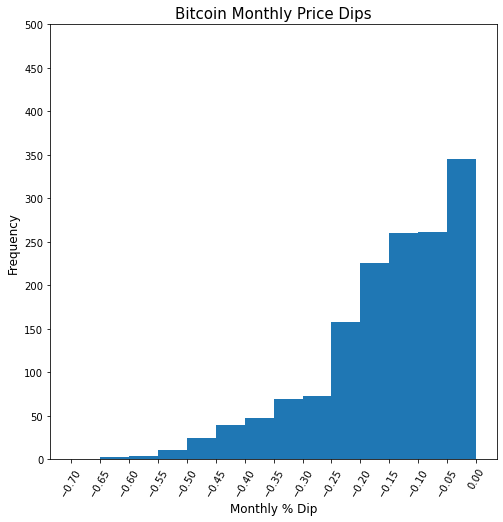

In [40]:
plt.rcParams['figure.figsize'] = [8, 8]
bins=np.append(np.arange(-.7,0,.05),0)
x=dfbitchange['percent_30Days'].loc[dfbitchange['percent_30Days']<0]
plt.hist(x.values,bins=bins)
plt.title('Bitcoin Monthly Price Dips',fontsize=15)
plt.xlabel('Monthly % Dip',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.xticks(bins, rotation=60)
plt.yticks(np.arange(0,550,50))
plt.show()

##### How Often do Monthly Dips Occur

In [41]:
proportion=np.round(x.dropna().count()/dfbitchange['percent_30Days'].dropna().count(),4)*100
print('Monthly dips occur '+str(proportion) +'% of the time')

Monthly dips occur 41.55% of the time


##### Max Monthly Dip

In [42]:
dfbitchange.loc[dfbitchange['percent_30Days']==dfbitchange['percent_30Days'].min()][['percent_30Days']]

percent_30Days
Date                      
2011-10-20       -0.643856

##### Over 50% Monthly Dip

In [43]:
dfbitchange.loc[dfbitchange['percent_30Days']<-.5][['percent_30Days']]

percent_30Days
Date                      
2011-07-08       -0.509783
2011-07-09       -0.523810
2011-07-10       -0.552000
2011-09-16       -0.537168
2011-09-17       -0.569666
2011-09-18       -0.576630
2011-09-19       -0.525343
2011-10-19       -0.526787
2011-10-20       -0.643856
2011-10-21       -0.567333
2013-05-09       -0.539638
2018-02-05       -0.510854
2018-02-06       -0.605131
2018-02-07       -0.538441
2020-03-14       -0.529924

##### Over 40% Monthly Dip

In [44]:
dfbitchange.loc[dfbitchange['percent_30Days']<-.4][['percent_30Days']]

percent_30Days
Date                      
2011-07-08       -0.509783
2011-07-09       -0.523810
2011-07-10       -0.552000
2011-07-11       -0.493337
2011-07-12       -0.414170
...                    ...
2020-03-16       -0.495602
2020-03-17       -0.484166
2020-03-18       -0.492502
2020-03-19       -0.460879
2020-03-20       -0.442470

[79 rows x 1 columns]

##### How Common are Monthly Dips Greater than 10%, 20%, and 30%?

In [45]:
part=dfbitchange.loc[dfbitchange['percent_30Days']<-.1][['percent_30Days']].count()
whole=dfbitchange['percent_30Days'].dropna().count()
proportion=np.round((list(part/whole)[0]*100),3)
print('Monthly dips of greater than 10% occur '+str(proportion)+'% of the time\n')
part=dfbitchange.loc[dfbitchange['percent_30Days']<-.2][['percent_30Days']].count()
whole=dfbitchange['percent_30Days'].dropna().count()
proportion=np.round((list(part/whole)[0]*100),3)
print('Monthly dips of greater than 20% occur '+str(proportion)+'% of the time\n')
part=dfbitchange.loc[dfbitchange['percent_30Days']<-.3][['percent_30Days']].count()
whole=dfbitchange['percent_30Days'].dropna().count()
proportion=np.round((list(part/whole)[0]*100),3)
print('Monthly dips of greater than 30% occur '+str(proportion)+'% of the time\n')

Monthly dips of greater than 10% occur 24.966% of the time

Monthly dips of greater than 20% occur 11.662% of the time

Monthly dips of greater than 30% occur 5.311% of the time



### 90 Day Price Dips 

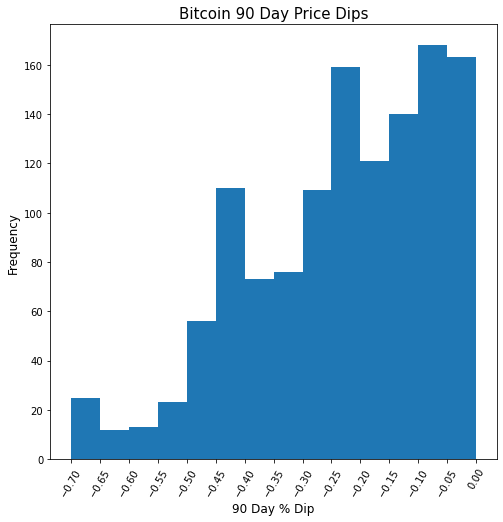

In [46]:
plt.rcParams['figure.figsize'] = [8, 8]
bins=np.append(np.arange(-.7,0,.05),0)
x=dfbitchange['percent_90Days'].loc[dfbitchange['percent_90Days']<0]
plt.hist(x.values,bins=bins)
plt.title('Bitcoin 90 Day Price Dips',fontsize=15)
plt.xlabel('90 Day % Dip',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.xticks(bins,rotation=60)
#plt.yticks(np.arange(0,550,50))
plt.show()

##### How Often do 90 Day Dips Occur

In [47]:
proportion=np.round(x.dropna().count()/dfbitchange['percent_90Days'].dropna().count(),4)*100
print('90 Day dips occur '+str(proportion) +'% of the time')

90 Day dips occur 36.35% of the time


##### Max 90 Day Dip

In [48]:
dfbitchange.loc[dfbitchange['percent_90Days']==dfbitchange['percent_90Days'].min()][['percent_90Days']]

percent_90Days
Date                      
2011-10-20       -0.826385

#### Over 70% 90 Day Dip

In [49]:
dfbitchange.loc[dfbitchange['percent_90Days']<-.7][['percent_90Days']].head(20)

percent_90Days
Date                      
2011-09-06       -0.760039
2011-09-07       -0.758757
2011-09-08       -0.790997
2011-09-09       -0.768667
2011-09-10       -0.751544
2011-09-15       -0.706547
2011-09-17       -0.733956
2011-09-18       -0.711816
2011-09-27       -0.703458
2011-09-28       -0.714914
2011-09-29       -0.717118
2011-10-08       -0.707015
2011-10-09       -0.711248
2011-10-10       -0.709057
2011-10-11       -0.707420
2011-10-12       -0.701694
2011-10-14       -0.708188
2011-10-15       -0.709885
2011-10-16       -0.715057
2011-10-17       -0.744220

Looks like 2011 was a rough year.  Lets put that year to the side for now. 

#### Over 60% 90 Day Dip (excluding 2011)

In [50]:
dfbitchange.loc[dfbitchange['percent_90Days']<-.6][['percent_90Days']].loc['2012-01-01':]

percent_90Days
Date                      
2013-07-07       -0.614446
2013-07-08       -0.673768
2013-07-09       -0.614506
2018-04-06       -0.602512
2018-04-07       -0.618696

#### Over 50% 90 Day Dip (excluding 2011)

In [51]:
dfbitchange.loc[dfbitchange['percent_90Days']<-.5][['percent_90Days']].loc['2012-01-01':]

percent_90Days
Date                      
2013-07-05       -0.523793
2013-07-06       -0.566857
2013-07-07       -0.614446
2013-07-08       -0.673768
2013-07-09       -0.614506
2014-04-06       -0.507959
2014-04-10       -0.515384
2014-04-11       -0.520110
2014-04-12       -0.500611
2014-10-05       -0.527847
2015-01-14       -0.533093
2018-03-15       -0.511267
2018-03-16       -0.529700
2018-03-17       -0.562514
2018-03-18       -0.585601
2018-03-19       -0.569060
2018-03-20       -0.525738
2018-03-30       -0.510095
2018-04-01       -0.510399
2018-04-02       -0.508108
2018-04-03       -0.531127
2018-04-04       -0.507719
2018-04-05       -0.553418
2018-04-06       -0.602512
2018-04-07       -0.618696
2018-04-08       -0.583959
2018-04-09       -0.540305
2018-04-10       -0.544709
2018-04-11       -0.551276
2018-12-16       -0.502318

##### How Common are 90 Day Dips Greater than 10%, 20%, 30%, and 40%?

In [52]:
part=dfbitchange.loc[dfbitchange['percent_90Days']<-.1][['percent_90Days']].count()
whole=dfbitchange['percent_90Days'].dropna().count()
proportion=np.round((list(part/whole)[0]*100),3)
print('90 Day dips of greater than 10% occur '+str(proportion)+'% of the time\n')
part=dfbitchange.loc[dfbitchange['percent_90Days']<-.2][['percent_90Days']].count()
whole=dfbitchange['percent_90Days'].dropna().count()
proportion=np.round((list(part/whole)[0]*100),3)
print('90 Day dips of greater than 20% occur '+str(proportion)+'% of the time\n')
part=dfbitchange.loc[dfbitchange['percent_90Days']<-.3][['percent_90Days']].count()
whole=dfbitchange['percent_90Days'].dropna().count()
proportion=np.round((list(part/whole)[0]*100),3)
print('90 Day dips of greater than 30% occur '+str(proportion)+'% of the time\n')
part=dfbitchange.loc[dfbitchange['percent_90Days']<-.4][['percent_90Days']].count()
whole=dfbitchange['percent_90Days'].dropna().count()
proportion=np.round((list(part/whole)[0]*100),3)
print('90 Day dips of greater than 40% occur '+str(proportion)+'% of the time\n')

90 Day dips of greater than 10% occur 27.136% of the time

90 Day dips of greater than 20% occur 19.872% of the time

90 Day dips of greater than 30% occur 12.413% of the time

90 Day dips of greater than 40% occur 8.266% of the time



### 180 Day Price Dips 

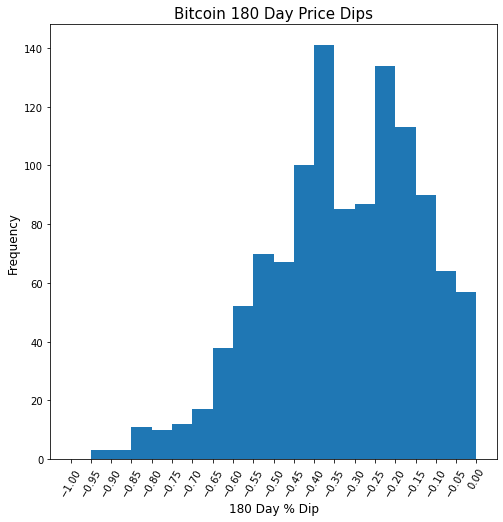

In [53]:
plt.rcParams['figure.figsize'] = [8, 8]
bins=np.append(np.arange(-1,0,.05),0)
x=dfbitchange['percent_180Days'].loc[dfbitchange['percent_180Days']<0]
plt.hist(x.values,bins=bins)
plt.title('Bitcoin 180 Day Price Dips',fontsize=15)
plt.xlabel('180 Day % Dip',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.xticks(bins,rotation=60)
#plt.yticks(np.arange(0,550,50))
plt.show()

#### Max 180 Day Dip

In [54]:
dfbitchange.loc[dfbitchange['percent_180Days']==dfbitchange['percent_180Days'].min()][['percent_180Days']]

percent_180Days
Date                       
2011-12-07        -0.911943

#### Over 80% 180 Day Dip

In [55]:
dfbitchange.loc[dfbitchange['percent_180Days']<-.8][['percent_180Days']]

percent_180Days
Date                       
2011-12-01        -0.819644
2011-12-02        -0.834825
2011-12-03        -0.837234
2011-12-04        -0.843127
2011-12-05        -0.908179
2011-12-06        -0.903175
2011-12-07        -0.911943
2011-12-08        -0.896667
2011-12-09        -0.878391
2011-12-10        -0.875918
2011-12-11        -0.838971
2011-12-12        -0.832882
2011-12-13        -0.834669
2011-12-14        -0.830994
2011-12-15        -0.814343
2011-12-16        -0.828889
2011-12-17        -0.813833

Again 2011, was truly a brutal year.  Let us accept that and move it to the side.  

####  Over 70% 180 Day Dip (excluding 2011)

In [56]:
dfbitchange.loc[dfbitchange['percent_180Days']<-.7][['percent_180Days']].loc['2012-01-01':]

percent_180Days
Date                       
2015-01-14        -0.719779

#### Over 60% 180 Day Dip (excluding 2011)

In [57]:
dfbitchange.loc[dfbitchange['percent_180Days']<-.6][['percent_180Days']].loc['2012-01-01':]

percent_180Days
Date                       
2012-01-01        -0.653333
2012-01-02        -0.666673
2012-01-03        -0.674462
2012-01-04        -0.641604
2012-01-27        -0.618185
2012-02-18        -0.609012
2012-02-19        -0.622861
2012-02-20        -0.603509
2015-01-13        -0.631166
2015-01-14        -0.719779
2015-01-15        -0.654298
2015-01-16        -0.670792
2015-01-17        -0.681623
2015-01-18        -0.659952
2015-01-19        -0.658542
2015-01-20        -0.645713
2015-01-21        -0.642875
2015-01-22        -0.607471
2015-01-23        -0.606707
2015-01-29        -0.605825
2015-01-30        -0.609844
2015-01-31        -0.613261
2015-02-01        -0.619586
2015-02-02        -0.616575
2015-02-04        -0.622332
2015-02-05        -0.630706
2015-02-06        -0.625681
2015-02-07        -0.611102
2015-02-08        -0.607578
2018-06-11        -0.607737
2018-06-13        -0.608183
2018-06-14        -0.644624
2018-06-15        -0.659105
2018-06-16        -0.666451
2018-06-17        -0.656709
2018-06-18        -0.635543
2018-06-25        -0.622665
2018-06-26        -0.601558
2018-07-05        -0.616092
2018-07-06        -0.618725
2018-07-07        -0.605471

##### How Common are 180 Day Dips Greater than 10%, 20%, 30%, 40%, and 50%?

In [58]:
part=dfbitchange.loc[dfbitchange['percent_180Days']<-.1][['percent_180Days']].count()
whole=dfbitchange['percent_180Days'].dropna().count()
proportion=np.round((list(part/whole)[0]*100),3)
print('180 Day dips of greater than 10% occur '+str(proportion)+'% of the time\n')
part=dfbitchange.loc[dfbitchange['percent_180Days']<-.2][['percent_180Days']].count()
whole=dfbitchange['percent_180Days'].dropna().count()
proportion=np.round((list(part/whole)[0]*100),3)
print('180 Day dips of greater than 20% occur '+str(proportion)+'% of the time\n')
part=dfbitchange.loc[dfbitchange['percent_180Days']<-.3][['percent_180Days']].count()
whole=dfbitchange['percent_180Days'].dropna().count()
proportion=np.round((list(part/whole)[0]*100),3)
print('180 Day dips of greater than 30% occur '+str(proportion)+'% of the time\n')
part=dfbitchange.loc[dfbitchange['percent_180Days']<-.4][['percent_180Days']].count()
whole=dfbitchange['percent_180Days'].dropna().count()
proportion=np.round((list(part/whole)[0]*100),3)
print('180 Day dips of greater than 40% occur '+str(proportion)+'% of the time\n')
part=dfbitchange.loc[dfbitchange['percent_180Days']<-.5][['percent_180Days']].count()
whole=dfbitchange['percent_180Days'].dropna().count()
proportion=np.round((list(part/whole)[0]*100),3)
print('180 Day dips of greater than 50% occur '+str(proportion)+'% of the time\n')


180 Day dips of greater than 10% occur 29.489% of the time

180 Day dips of greater than 20% occur 23.694% of the time

180 Day dips of greater than 30% occur 17.385% of the time

180 Day dips of greater than 40% occur 10.933% of the time

180 Day dips of greater than 50% occur 6.166% of the time



### 365 Day Price Dips

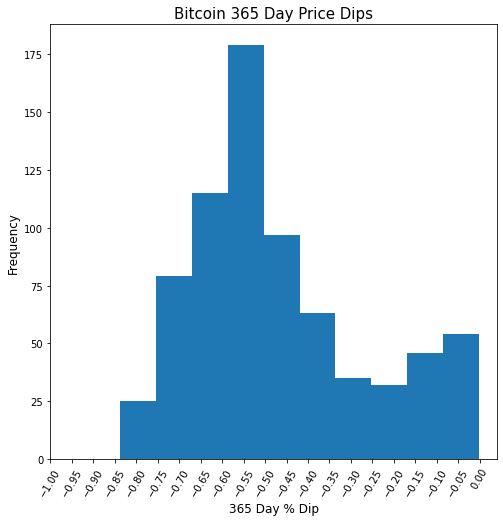

In [59]:
plt.rcParams['figure.figsize'] = [8, 8]
bins=np.append(np.arange(-1,0,.05),0)
x=dfbitchange['percent_365Days'].loc[dfbitchange['percent_365Days']<0]
plt.hist(x.values)
plt.title('Bitcoin 365 Day Price Dips',fontsize=15)
plt.xlabel('365 Day % Dip',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.xticks(bins,rotation=60)
#plt.yticks(np.arange(0,550,50))
plt.show()

#### Max 365 Day Dip

In [60]:
dfbitchange.loc[dfbitchange['percent_365Days']==dfbitchange['percent_365Days'].min()][['percent_365Days']]

percent_365Days
Date                       
2012-06-09        -0.837143

#### Over 70% 365 Day Dip

In [61]:
dfbitchange.loc[dfbitchange['percent_365Days']<-.7][['percent_365Days']]

percent_365Days
Date                       
2012-06-04        -0.722155
2012-06-05        -0.713989
2012-06-06        -0.713012
2012-06-07        -0.826731
2012-06-08        -0.820317
...                     ...
2019-01-13        -0.737916
2019-01-14        -0.751731
2019-01-15        -0.739830
2019-01-16        -0.739028
2019-01-21        -0.720471

[74 rows x 1 columns]

##### How Common are 180 Day Dips Greater than 10%, 20%, 30%, 40%, 50%, and 60%?

In [62]:
part=dfbitchange.loc[dfbitchange['percent_365Days']<-.1][['percent_365Days']].count()
whole=dfbitchange['percent_365Days'].dropna().count()
proportion=np.round((list(part/whole)[0]*100),3)
print('365 Day dips of greater than 10% occur '+str(proportion)+'% of the time\n')
part=dfbitchange.loc[dfbitchange['percent_365Days']<-.2][['percent_365Days']].count()
whole=dfbitchange['percent_365Days'].dropna().count()
proportion=np.round((list(part/whole)[0]*100),3)
print('365 Day dips of greater than 20% occur '+str(proportion)+'% of the time\n')
part=dfbitchange.loc[dfbitchange['percent_365Days']<-.3][['percent_365Days']].count()
whole=dfbitchange['percent_365Days'].dropna().count()
proportion=np.round((list(part/whole)[0]*100),3)
print('365 Day dips of greater than 30% occur '+str(proportion)+'% of the time\n')
part=dfbitchange.loc[dfbitchange['percent_365Days']<-.4][['percent_365Days']].count()
whole=dfbitchange['percent_365Days'].dropna().count()
proportion=np.round((list(part/whole)[0]*100),3)
print('365 Day dips of greater than 40% occur '+str(proportion)+'% of the time\n')
part=dfbitchange.loc[dfbitchange['percent_365Days']<-.5][['percent_365Days']].count()
whole=dfbitchange['percent_365Days'].dropna().count()
proportion=np.round((list(part/whole)[0]*100),3)
print('365 Day dips of greater than 50% occur '+str(proportion)+'% of the time\n')
part=dfbitchange.loc[dfbitchange['percent_365Days']<-.6][['percent_365Days']].count()
whole=dfbitchange['percent_365Days'].dropna().count()
proportion=np.round((list(part/whole)[0]*100),3)
print('365 Day dips of greater than 60% occur '+str(proportion)+'% of the time\n')

365 Day dips of greater than 10% occur 20.012% of the time

365 Day dips of greater than 20% occur 18.475% of the time

365 Day dips of greater than 30% occur 17.33% of the time

365 Day dips of greater than 40% occur 15.491% of the time

365 Day dips of greater than 50% occur 12.146% of the time

365 Day dips of greater than 60% occur 5.787% of the time



Below are some charts summarizing how often certain dips have occured over different holding times.  For instance, how often has somebody lost ten percent of their investment after holding for three years?  

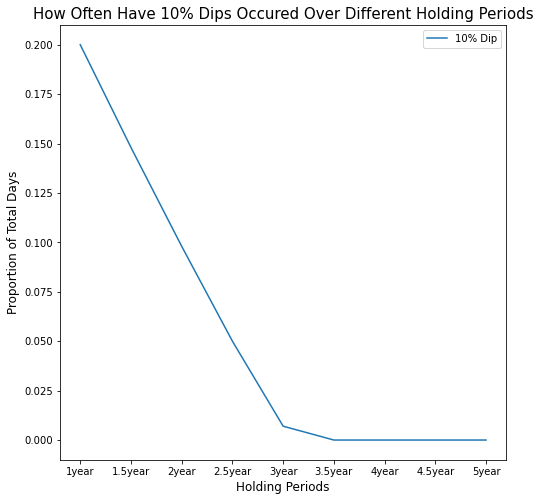

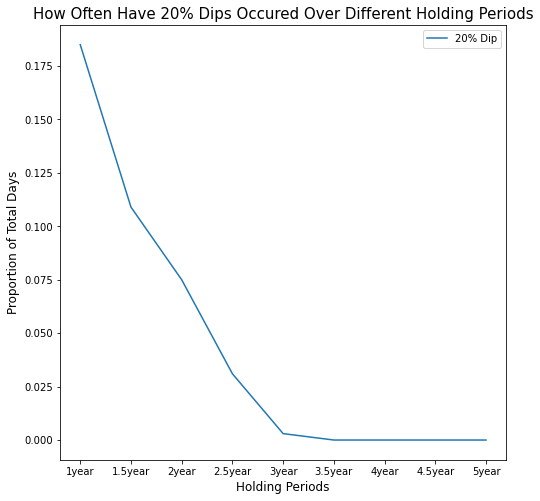

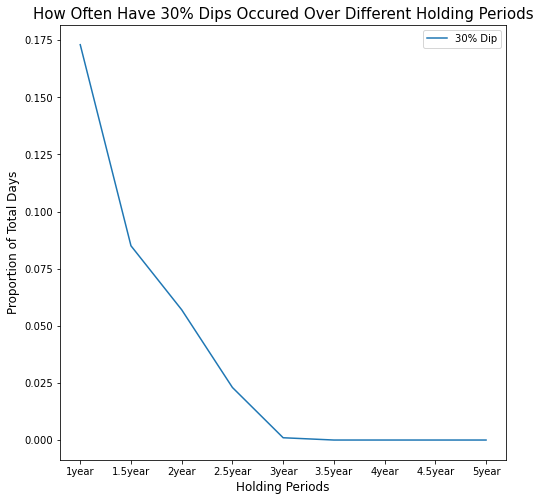

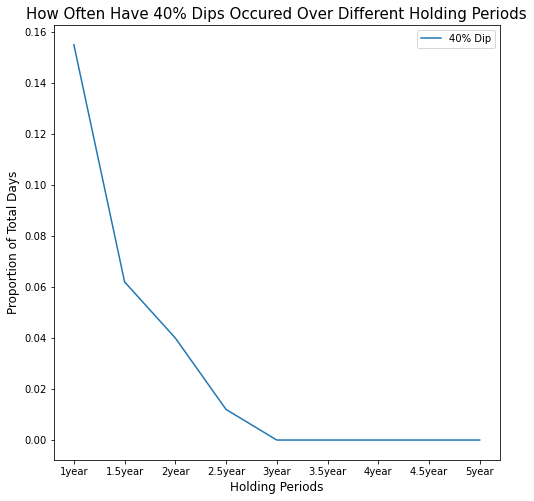

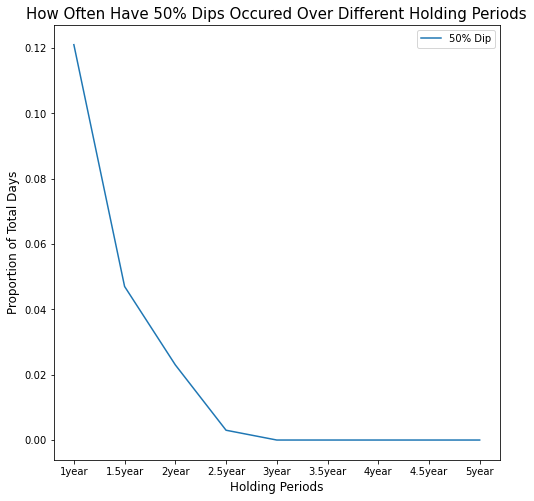

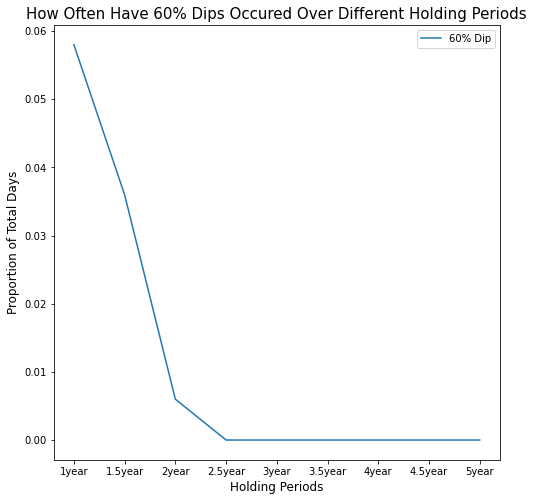

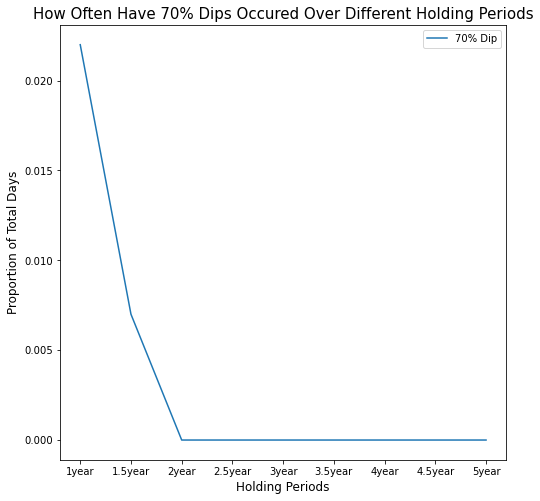

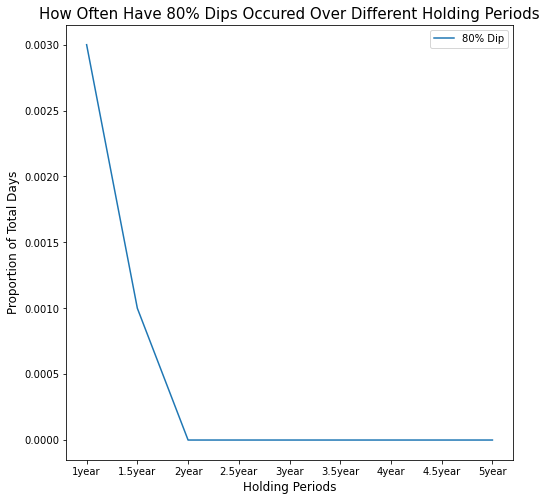

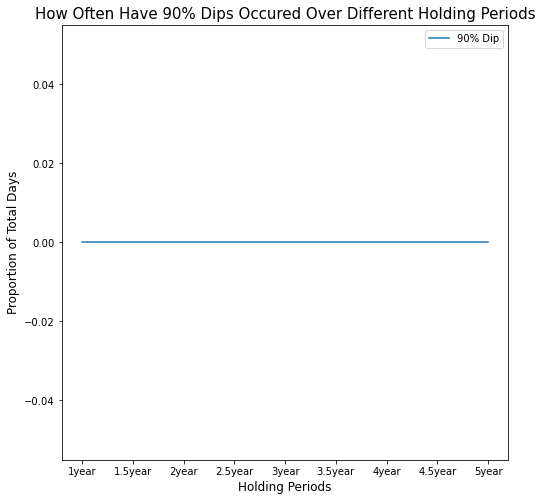

In [76]:
dips=np.arange(0,1,.1)*-1
half_year=np.arange(1,5.5,.5)
days_range=np.round(half_year*365)
combine=zip(half_year,days_range)
for x,y in combine:
    dfbitchange['percent_'+str(x)+'year']=dfbitchange['Value'].pct_change(periods=int(y))
df_list=[]
for dip in dips:
    test={str(dip):[]}
    for x in half_year:
        part=dfbitchange.loc[dfbitchange['percent_'+str(x)+'year']<dip][['percent_'+str(x)+'year']].dropna().count()
        whole=dfbitchange['percent_'+str(x)+'year'].dropna().count()
        proportion=np.round((list(part/whole)[0]),3)
        test[str(dip)].append(proportion)
    df_index=['1year','1.5year','2year','2.5year','3year','3.5year','4year','4.5year','5year']
    df=pd.DataFrame(test,index=df_index)
    df.columns=[str(int(dip*-1*100))+'% Dip']
    df_list.append(df)

plt.rcParams['figure.figsize'] = [8, 8]
x=[x for x in range(1,len(df_list))]
y=[10,20,30,40,50,60,70,80,90]
together=zip(x,y)
for x,y in together:
    df_list[x].plot()
    plt.title('How Often Have '+str(y)+'% Dips Occured Over Different Holding Periods',fontsize=15)
    plt.xlabel('Holding Periods',fontsize=12)
    plt.ylabel('Proportion of Total Days',fontsize=12)
    plt.show()

As we can see in the above charts, all instances of losses trend towards zero around of holding time of 3-3.5 years.  This has been the story of bitcoin.  Short term investments have seen risks of losses while long term investments of 4 or more years have seen gains, often immense gains.  There is a case for bitcoin, but the long-term case is looking the least risky.

### Zooming in on Previous Bull Markets 

Lets take a close look at bitcoins previous bull cycles and compare it to where we are now.

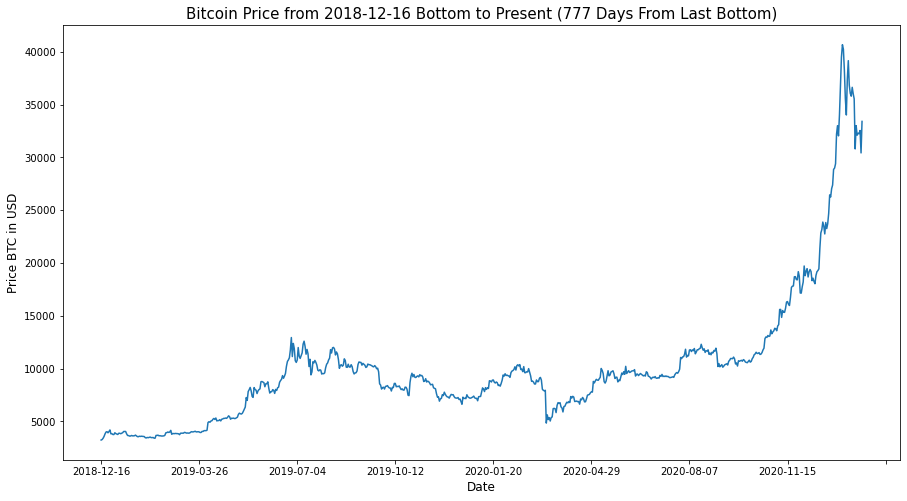

In [64]:
length=len(dfbit.Value.loc['2018-12-16':].values)
plt.rcParams['figure.figsize'] = [15, 8]
dfbit['Value'].loc['2018-12-16':].plot()
plt.title('Bitcoin Price from 2018-12-16 Bottom to Present ('+str(length)+' Days From Last Bottom)',fontsize=15)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Price BTC in USD',fontsize=12)
plt.show()

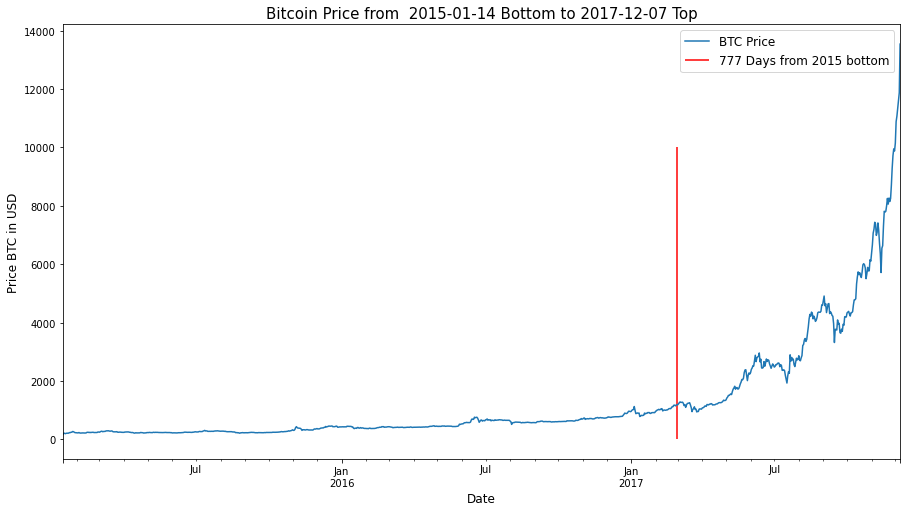

In [65]:
plt.rcParams['figure.figsize'] = [15, 8]
test2=dfbit['Value']
test2.index=pd.to_datetime(test2.index)
test=dfbit['Value'].reset_index()
location=test.loc[test['Date']=='2015-01-14'].index[0]
length=len(dfbit.Value.loc['2018-12-16':].values)
relative_now=str(test2.iloc[location:(location+length)].tail(1).index[0])[0:10]
test2.loc['2015-01-14':'2017-12-07'].plot(label='BTC Price')
plt.vlines(relative_now,0,10000,color='r',label=str(length)+' Days from 2015 bottom')
plt.title('Bitcoin Price from  2015-01-14 Bottom to 2017-12-07 Top',fontsize=15)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Price BTC in USD',fontsize=12)
plt.legend(loc="upper left")
plt.legend(fontsize=12) 
plt.show()

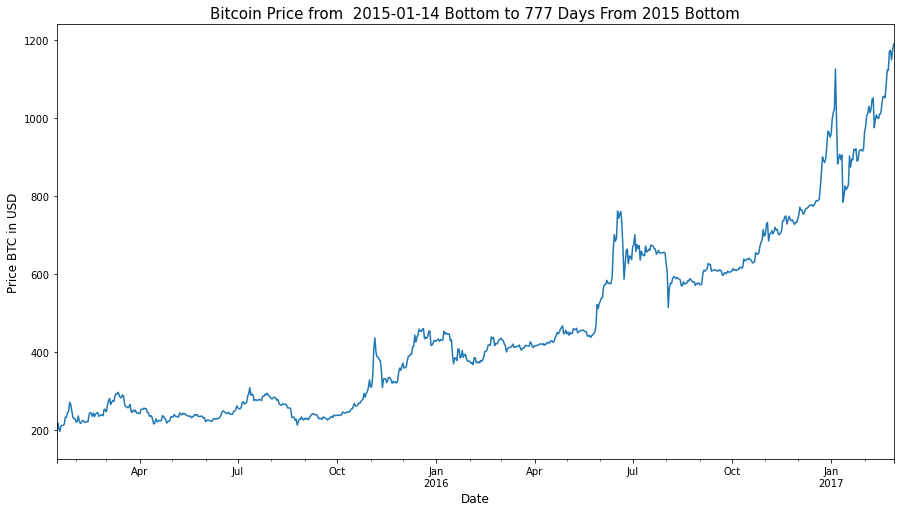

In [66]:
plt.rcParams['figure.figsize'] = [15, 8]
test=dfbit['Value'].reset_index()
location=test.loc[test['Date']=='2015-01-14'].index[0]
length=len(dfbit.Value.loc['2018-12-16':].values)
dfbit['Value'].iloc[location:(location+length)].plot()
plt.title('Bitcoin Price from  2015-01-14 Bottom to '+str(length)+' Days From 2015 Bottom',fontsize=15)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Price BTC in USD',fontsize=12)
plt.show()

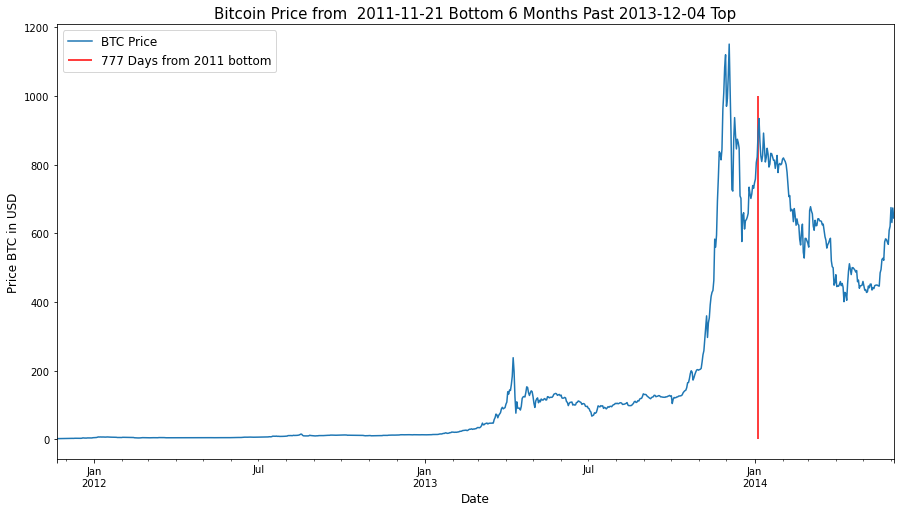

In [67]:
plt.rcParams['figure.figsize'] = [15, 8]
test2=dfbit['Value']
test2.index=pd.to_datetime(test2.index)
test=dfbit['Value'].reset_index()
location=test.loc[test['Date']=='2011-11-21'].index[0]
length=len(dfbit.Value.loc['2018-12-16':].values)
relative_now=str(test2.iloc[location:(location+length)].tail(1).index[0])[0:10]
test2.loc['2011-11-21':'2014-06-04'].plot(label='BTC Price')
plt.vlines(relative_now,0,1000,color='r',label=str(length)+' Days from 2011 bottom')
plt.title('Bitcoin Price from  2011-11-21 Bottom 6 Months Past 2013-12-04 Top',fontsize=15)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Price BTC in USD',fontsize=12)
plt.legend(loc="upper left")
plt.legend(fontsize=12) 
plt.show()

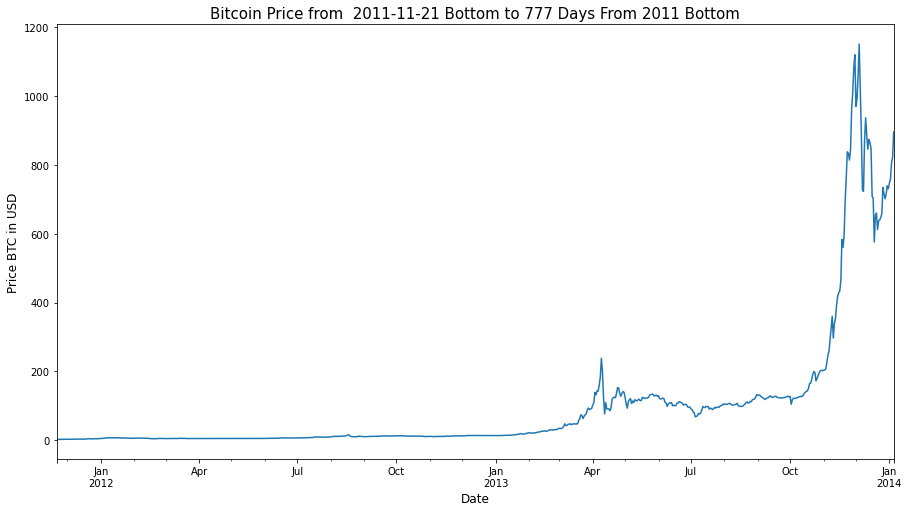

In [68]:
plt.rcParams['figure.figsize'] = [15, 8]
test=dfbit['Value'].reset_index()
location=test.loc[test['Date']=='2011-11-21'].index[0]
length=len(dfbit.Value.loc['2018-12-16':].values)
dfbit['Value'].iloc[location:(location+length)].plot()
plt.title('Bitcoin Price from  2011-11-21 Bottom to '+str(length)+' Days From 2011 Bottom',fontsize=15)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Price BTC in USD',fontsize=12)
plt.show()

The timeline of these three bull markets are different, but the themes are the same.  Several parabolic moves increasing over time until an ultimate crash, and then a deflationary period followed by a similar pattern a year or two later.  We are currently in the first or second parabolic move of this cycle.

### The Bitcoin Halvings

Bitcoin was designed in such a way that new supply is released into the system at an approximately constant predetermined daily rate.  Roughly speaking, every four years the total amount of new bitcoin released into the system daily is cut in half.  These events are generally referred to in the Bitcoin community as "Halvings".

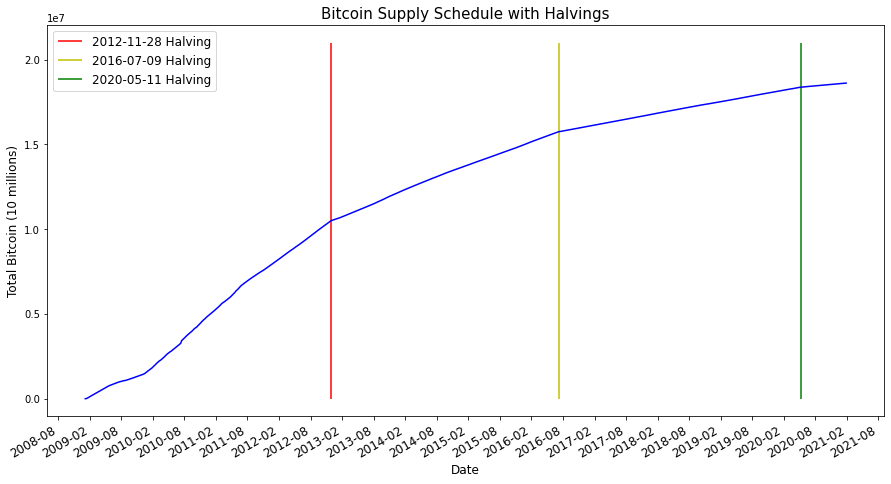

In [69]:
#found at https://www.quandl.com/data/BCHAIN/TOTBC-Total-Bitcoins
key=''
url='https://www.quandl.com/api/v3/datasets/BCHAIN/TOTBC.csv?api_key='+key
dfbitsupply=pd.read_csv(url).set_index('Date')
dfbitsupply.index=pd.to_datetime(dfbitsupply.index)
plt.rcParams['figure.figsize'] = [15, 8]
fig, ax = plt.subplots()
ax.plot(dfbitsupply['Value'].index,dfbitsupply['Value'].values,color='b')
plt.xticks(fontsize=12, rotation=90)
#ax.set_yscale("log")
plt.title('Bitcoin Supply Schedule with Halvings',fontsize=15)
plt.vlines('2012-11-28',0,21000000,color='r',label='2012-11-28 Halving')
plt.vlines('2016-07-09',0,21000000,color='y',label='2016-07-09 Halving')
plt.vlines('2020-05-11',0,21000000,color='g',label='2020-05-11 Halving')
plt.legend(loc="upper left")
plt.legend(fontsize=12) 
plt.ylabel('Total Bitcoin (10 millions)',fontsize=12)
plt.xlabel('Date',fontsize=12)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
fig.autofmt_xdate()
plt.show()

Before the first halving event 7200 new bitcoin were created per day. The supply then decreased to 3600 per day, then to 1800 per day, and currently 900 new bitcoin are being released into the Bitcoin network per day. This halving will occur roughly every four years until a total of 21 million bitcoin have been created in the network.

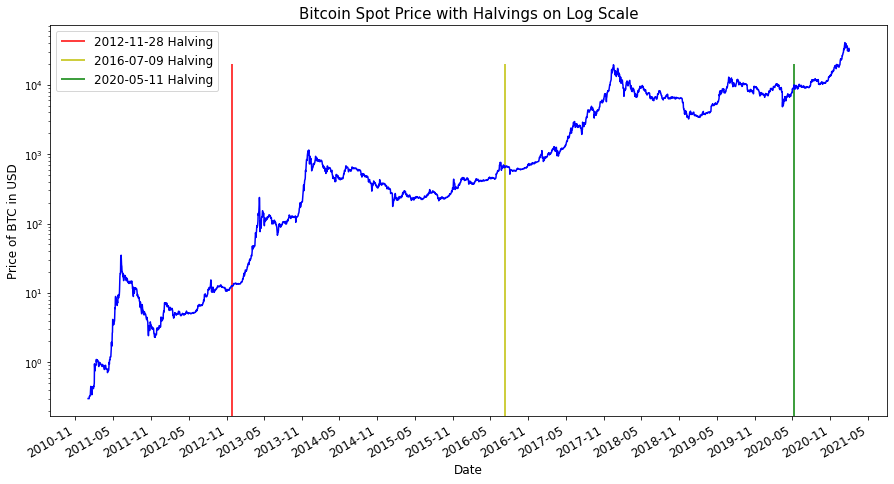

In [70]:
plt.rcParams['figure.figsize'] = [15, 8]
fig, ax = plt.subplots()
ax.plot(dfbit['Value'].index,dfbit['Value'].values,color='b')
plt.xticks(fontsize=12, rotation=90)
ax.set_yscale("log")
plt.title('Bitcoin Spot Price with Halvings on Log Scale',fontsize=15)
plt.vlines('2012-11-28',0,20000,color='r',label='2012-11-28 Halving')
plt.vlines('2016-07-09',0,20000,color='y',label='2016-07-09 Halving')
plt.vlines('2020-05-11',0,20000,color='g',label='2020-05-11 Halving')
plt.legend(loc="upper left")
plt.legend(fontsize=12) 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.ylabel('Price of BTC in USD',fontsize=12)
plt.xlabel('Date',fontsize=12)
fig.autofmt_xdate()
plt.show()

Looking at the above chart, it appears that substantial run-ups in the bitcoin price have occurred within roughly one year after each halving. Depending on your micro and macroeconomic framework, the halving’s can mean a great deal with regards to the price of bitcoin, or mean very little. Many believe that the increased constraint on supply every four years causes the price to rise. Its simple economics that if demand remains constant, a constrained supply will cause prices of an item to go up. When it comes to bitcoin, this rising price attracts new buyers in search of high returns. This increases demand even more, causing a feedback loop that results in parabolic price shifts to the upside and blow off tops. Others believe that markets generally price the halving’s in on the front end because the supply schedule of bitcoin is transparent and literally written into the code for all to see. Markets do have a tendency to be forward looking, and can be expected to price in future expectations wherever possible. I leave it to the reader to investigate this matter further. See https://100trillionusd.github.io/. However, for completeness sake, let us look at the price action from the perspective of the halving’s before moving on.     

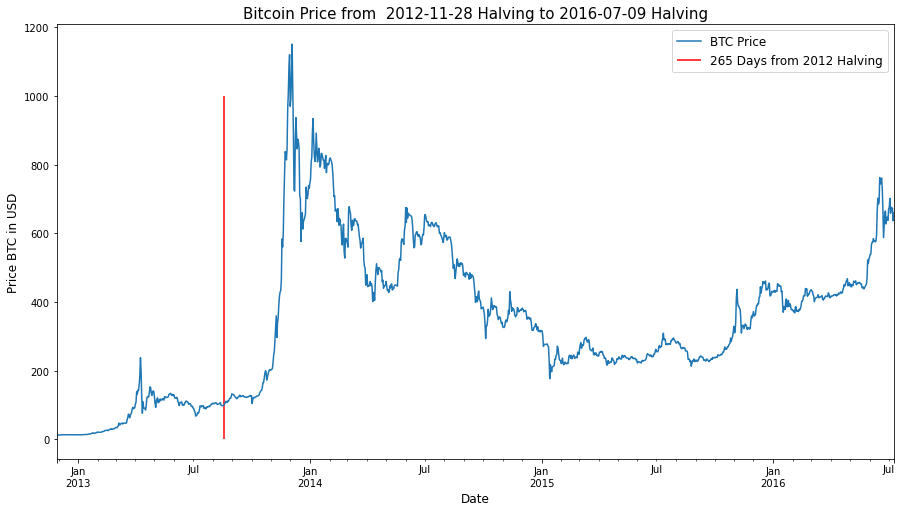

372 days from 2012-11-28 halving to 2013-12-04 top.


In [71]:
plt.rcParams['figure.figsize'] = [15, 8]
test2=dfbit['Value']
test2.index=pd.to_datetime(test2.index)
test=dfbit['Value'].reset_index()
location=test.loc[test['Date']=='2012-11-28'].index[0]
length=len(dfbit.Value.loc['2020-05-11':].values)
relative_now=str(test2.iloc[location:(location+length)].tail(1).index[0])[0:10]
test2.loc['2012-11-28':'2016-07-09'].plot(label='BTC Price')
plt.vlines(relative_now,0,1000,color='r',label=str(length)+' Days from 2012 Halving')
plt.title('Bitcoin Price from  2012-11-28 Halving to 2016-07-09 Halving',fontsize=15)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Price BTC in USD',fontsize=12)
plt.legend(loc="upper left")
plt.legend(fontsize=12) 
plt.show()
half_to_top=dfbit.loc['2012-11-28':'2013-12-04'].count().values[0]
print(str(half_to_top)+' days from 2012-11-28 halving to 2013-12-04 top.')

Two massive parabolic shifts to the upside post halving, followed by several years of consolidation.  

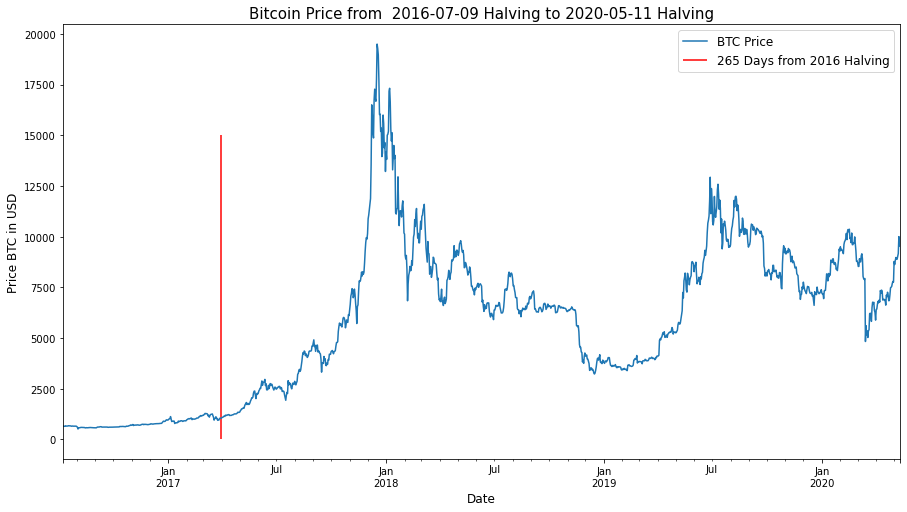

527 days from 2016-07-09 halving to 2017-12-17 top.


In [72]:
plt.rcParams['figure.figsize'] = [15, 8]
test2=dfbit['Value']
test2.index=pd.to_datetime(test2.index)
test=dfbit['Value'].reset_index()
location=test.loc[test['Date']=='2016-07-09'].index[0]
length=len(dfbit.Value.loc['2020-05-11':].values)
relative_now=str(test2.iloc[location:(location+length)].tail(1).index[0])[0:10]
test2.loc['2016-07-09':'2020-05-11'].plot(label='BTC Price')
plt.vlines(relative_now,0,15000,color='r',label=str(length)+' Days from 2016 Halving')
plt.title('Bitcoin Price from  2016-07-09 Halving to 2020-05-11 Halving',fontsize=15)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Price BTC in USD',fontsize=12)
plt.legend(loc="upper left")
plt.legend(fontsize=12) 
plt.show()
half_to_top=dfbit.loc['2016-07-09':'2017-12-17'].count().values[0]
print(str(half_to_top)+' days from 2016-07-09 halving to 2017-12-17 top.')

Again, several moves to the upside followed by one massive parabolic run and several years of consolidation.  

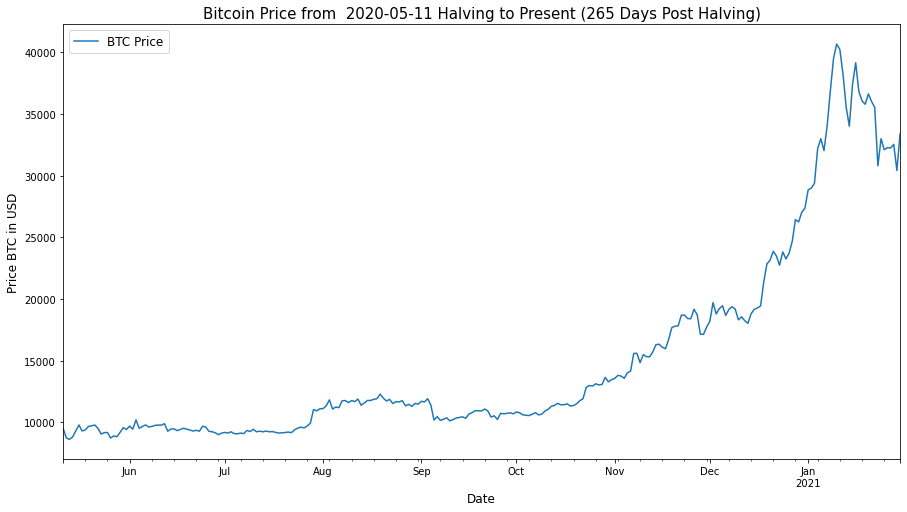

In [73]:
plt.rcParams['figure.figsize'] = [15, 8]
test2=dfbit['Value']
test2.index=pd.to_datetime(test2.index)
test=dfbit['Value'].reset_index()
location=test.loc[test['Date']=='2016-07-09'].index[0]
length=len(dfbit.Value.loc['2020-05-11':].values)
relative_now=str(test2.iloc[location:(location+length)].tail(1).index[0])[0:10]
test2.loc['2020-05-11':].plot(label='BTC Price')
#plt.vlines(relative_now,0,15000,color='r',label=str(length)+' Days from 2020 Halving')
plt.title('Bitcoin Price from  2020-05-11 Halving to Present ('+str(length)+' Days Post Halving)',fontsize=15)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Price BTC in USD',fontsize=12)
plt.legend(loc="upper left")
plt.legend(fontsize=12) 
plt.show()

If history repeats itself, this could be the first of many parabolic moves to the upside, but this also means that there will be an eventual period of consolidation, so proceed wisely.  Long term investments in Bitcoin have been the ones that have paid off 100% of the time since its inception.

### Comparing Bitcoin Volitiltiy and Returns to Other Assets

The function below adjusts a time series to having the same timeframe as bitcoin, 2011-01-01 through 2020-12-31.  Many assets do not trade on weekends and holidays, therefore this is necessary in order to effectively compare.

In [74]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [65]:
def timeseries_adjust(df):
    """This function backfills prices where the weekends and holidays are left empty to match bitcoins daily price"""
    df=dfbit.join(df,how='left')
    df=df.drop(columns=['Value'])
    df.fillna(method='bfill',inplace=True)
    df.fillna(method='ffill',inplace=True)
    return df

The function below gives the average n-day volatility over a specified time period.  For example, it will give you the average 30-day volatility of the percent change of the bitcoin price action from 2020-01-01 to 2020-08-05.  The average volatility is calculated by bootstrapping the sampling distribution of the volatility using the set of all possible n-day volatilities over a specified time period.  The 50th percentile of the bootstrapped sampling distribution is then used as the average volatility.  Volatility here is defined as sample standard deviation.  Volatility in percent change of daily price action is used here instead of simply using the volatility of the daily price action for scaling purposes.  When comparing the volatility of different asset classes, simply standardizing by subtracting the mean and dividing by the standard deviation still leaves a trace of bias due to magnitude, i.e. if you compare bitcoin, which trades at a current average of 14,000, with Square stock, which trades at around 150, standardizing the two will not eliminate the fact that bitcoin trades at roughly 100x the price of square.  The easiest way to eliminate this discrepancy is by focusing on percent change of a given assets price over time.  This is ultimately what we really care about.     

In [66]:
def vol(df,days,start='2014-01-01',end='2020-12-31'):
    #rolling volitility of daily pct change price action
    vol=df.loc[start:end].pct_change().rolling(days).std().dropna()
    sample_dist=[]
    #takes 10000 random samples and calculates the mean of each
    for i in range(1000):
        y=vol.iloc[:,0].values
        sample_dist.append(np.mean(np.random.choice(y,len(y),replace=True)))
    #gives you the mean of the sampling distribution and the standard error
    x_bar_vol=np.round(np.percentile(sample_dist,50),4)
    std_error_vol=np.round(np.std(sample_dist),4)
    return x_bar_vol

The function below gives the average n-day return on investment over a specified time period. For example, it will give you the average 30 day percent return for bitcoin during the time period of 2020-01-01 to 2020-08-05. The average return is calculated by bootstrapping the sampling distribution of the percent return using the set of all possible n-day percent returns over a specified time period. The 50th percentile of the bootstrapped sampling distribution is then used as the average return.

In [67]:
def roi(df,days,start='2014-01-01',end='2020-12-31'):
    """This function takes a pandas dataframe with a date time index and 1 column for the price action."""
    """It then calculates all possible percent changes over a specified interval over a specified time period."""
    """It then creates the sampling distribution of all possible percent changes, and returns the mean"""
    """and standard error of the sampling distribution of the percent changes."""
    #rolling 30 day roi
    roi=df.loc[start:end].pct_change(days).dropna()
    sample_dist=[]
    #takes 10000 random samples and calculates the mean of each
    for i in range(1000):
        y=roi.iloc[:,0].values
        sample_dist.append(np.mean(np.random.choice(y,len(y),replace=True)))
    x_bar_roi=np.round(np.percentile(sample_dist,50),4)
    #gives you the mean of the sampling distribution and the standard error
    std_error_roi=np.round(np.std(sample_dist),4)
    return x_bar_roi

The function below gives a more concise version of df_vol_long(), focusing only on the intervals starting from 2011-01-01 to 2020-01-01, through 2020-12-31

In [68]:
def df_vol_concise(df,asset=''):
    year_start=['2011-01-01','2012-01-01','2013-01-01','2014-01-01','2015-01-01','2016-01-01','2017-01-01','2018-01-01',
                '2019-01-01','2020-01-01']
    year_end=['2020-12-31']
    start_end=[]
    for start in year_start:
        for end in year_end:
            if int(end[:4])==int(start[:4]):
                start_end.append((start,end))
            if int(end[:4])>int(start[:4]):
                start_end.append((start,end))
    x={}
    for pair in start_end:
        x[pair]=[]
    intervals=[30,60,90,180,365,int(np.round(365*1.5)),int(np.round(365*2)),int(np.round(365*2.5)),
              int(np.round(365*3)),int(np.round(365*3.5)),int(np.round(365*4)),int(np.round(365*4.5)),
              int(np.round(365*5)),int(np.round(365*5.5)),int(np.round(365*6)),int(np.round(365*6.5)),
              int(np.round(365*7)),int(np.round(365*7.5)),int(np.round(365*8)),int(np.round(365*8.5)),
              int(np.round(365*9)),int(np.round(365*9.5))]
    for startend in start_end:
        
        start=startend[0]
        end=startend[1]
        
        if (int(end[:4])-int(start[:4]))== 9:
            for interval in intervals[:len(intervals)]:
                x[startend].append(vol(df,interval,start,end))
            x[startend].append(df.loc[start:end].pct_change().dropna().to_numpy().reshape(-1).std())
        
        if (int(end[:4])-int(start[:4]))== 8:
            for interval in (intervals[:(len(intervals)-2)]):
                x[startend].append(vol(df,interval,start,end))
            x[startend].append(df.loc[start:end].pct_change().dropna().to_numpy().reshape(-1).std())
        
        if (int(end[:4])-int(start[:4]))== 7:
            for interval in (intervals[:(len(intervals)-4)]):
                x[startend].append(vol(df,interval,start,end))
            x[startend].append(df.loc[start:end].pct_change().dropna().to_numpy().reshape(-1).std())
        
        if (int(end[:4])-int(start[:4]))== 6:
            for interval in (intervals[:(len(intervals)-6)]):
                x[startend].append(vol(df,interval,start,end))
            x[startend].append(df.loc[start:end].pct_change().dropna().to_numpy().reshape(-1).std())
        
        if (int(end[:4])-int(start[:4]))== 5:
            for interval in (intervals[:(len(intervals)-8)]):
                x[startend].append(vol(df,interval,start,end))
            x[startend].append(df.loc[start:end].pct_change().dropna().to_numpy().reshape(-1).std())
        
        if (int(end[:4])-int(start[:4]))== 4:
            for interval in (intervals[:(len(intervals)-10)]):
                x[startend].append(vol(df,interval,start,end))
            x[startend].append(df.loc[start:end].pct_change().dropna().to_numpy().reshape(-1).std())
            
        if (int(end[:4])-int(start[:4]))== 3:
            for interval in (intervals[:(len(intervals)-12)]):
                x[startend].append(vol(df,interval,start,end))
            x[startend].append(df.loc[start:end].pct_change().dropna().to_numpy().reshape(-1).std())
        
        if (int(end[:4])-int(start[:4]))== 2:
            for interval in (intervals[:(len(intervals)-14)]):
                x[startend].append(vol(df,interval,start,end))
            x[startend].append(df.loc[start:end].pct_change().dropna().to_numpy().reshape(-1).std())
        
        if (int(end[:4])-int(start[:4]))== 1:
            for interval in (intervals[:(len(intervals)-16)]):
                x[startend].append(vol(df,interval,start,end))
            x[startend].append(df.loc[start:end].pct_change().dropna().to_numpy().reshape(-1).std())
        
        if (int(end[:4])-int(start[:4]))== 0:
            for interval in (intervals[:(len(intervals)-18)]):
                x[startend].append(vol(df,interval,start,end))
            x[startend].append(df.loc[start:end].pct_change().dropna().to_numpy().reshape(-1).std())
            
    for key in x.keys():
        while len(x[key])<(len(intervals)+1):
            x[key].append(np.nan)
    
    interval_names=['30day','60day','90day','180day','1year','1.5year','2year','2.5year','3year','3.5year','4year',
                   '4.5year','5year','5.5year','6year','6.5year','7year','7.5year','8year','8.5year','9year','9.5year',
                   '10year']
    vol_roi=['vol']
    inter_vol=[]
    for i in interval_names:
        for j in vol_roi:
            inter_vol.append(i + '_' + j)
            
    df=pd.DataFrame(x,index=inter_vol)
    df['asset']=asset
    
    return df

The function below gives a more concise version of df_roi_long(), focusing only on the intervals starting from 2011-01-01 to 2020-01-01, through 2020-12-31

In [69]:
def df_roi_concise(df,asset=''):
    year_start=['2011-01-01','2012-01-01','2013-01-01','2014-01-01','2015-01-01','2016-01-01','2017-01-01','2018-01-01',
                '2019-01-01','2020-01-01']
    year_end=['2020-12-31']
    start_end=[]
    for start in year_start:
        for end in year_end:
            if int(end[:4])==int(start[:4]):
                start_end.append((start,end))
            if int(end[:4])>int(start[:4]):
                start_end.append((start,end))
    x={}
    for pair in start_end:
        x[pair]=[]
    intervals=[30,60,90,180,365,int(np.round(365*1.5)),int(np.round(365*2)),int(np.round(365*2.5)),
              int(np.round(365*3)),int(np.round(365*3.5)),int(np.round(365*4)),int(np.round(365*4.5)),
              int(np.round(365*5)),int(np.round(365*5.5)),int(np.round(365*6)),int(np.round(365*6.5)),
              int(np.round(365*7)),int(np.round(365*7.5)),int(np.round(365*8)),int(np.round(365*8.5)),
              int(np.round(365*9)),int(np.round(365*9.5))]
    for startend in start_end:
        
        start=startend[0]
        end=startend[1]
        
        if (int(end[:4])-int(start[:4]))== 9:
            for interval in intervals[:len(intervals)]:
                x[startend].append(roi(df,interval,start,end))
            x[startend].append(df.loc[start:end].iloc[:,0].pct_change(len(df.loc[start:end])-1).values[-1])
        
        if (int(end[:4])-int(start[:4]))== 8:
            for interval in (intervals[:(len(intervals)-2)]):
                x[startend].append(roi(df,interval,start,end))
            x[startend].append(df.loc[start:end].iloc[:,0].pct_change(len(df.loc[start:end])-1).values[-1])  
        
        if (int(end[:4])-int(start[:4]))== 7:
            for interval in (intervals[:(len(intervals)-4)]):
                x[startend].append(roi(df,interval,start,end))
            x[startend].append(df.loc[start:end].iloc[:,0].pct_change(len(df.loc[start:end])-1).values[-1])   
        
        if (int(end[:4])-int(start[:4]))== 6:
            for interval in (intervals[:(len(intervals)-6)]):
                x[startend].append(roi(df,interval,start,end))
            x[startend].append(df.loc[start:end].iloc[:,0].pct_change(len(df.loc[start:end])-1).values[-1])
        
        if (int(end[:4])-int(start[:4]))== 5:
            for interval in (intervals[:(len(intervals)-8)]):
                x[startend].append(roi(df,interval,start,end))
            x[startend].append(df.loc[start:end].iloc[:,0].pct_change(len(df.loc[start:end])-1).values[-1])
        
        if (int(end[:4])-int(start[:4]))== 4:
            for interval in (intervals[:(len(intervals)-10)]):
                x[startend].append(roi(df,interval,start,end))
            x[startend].append(df.loc[start:end].iloc[:,0].pct_change(len(df.loc[start:end])-1).values[-1])
            
        if (int(end[:4])-int(start[:4]))== 3:
            for interval in (intervals[:(len(intervals)-12)]):
                x[startend].append(roi(df,interval,start,end))
            x[startend].append(df.loc[start:end].iloc[:,0].pct_change(len(df.loc[start:end])-1).values[-1])
        
        if (int(end[:4])-int(start[:4]))== 2:
            for interval in (intervals[:(len(intervals)-14)]):
                x[startend].append(roi(df,interval,start,end))
            x[startend].append(df.loc[start:end].iloc[:,0].pct_change(len(df.loc[start:end])-1).values[-1])
        
        if (int(end[:4])-int(start[:4]))== 1:
            for interval in (intervals[:(len(intervals)-16)]):
                x[startend].append(roi(df,interval,start,end))
            x[startend].append(df.loc[start:end].iloc[:,0].pct_change(len(df.loc[start:end])-1).values[-1])
        
        if (int(end[:4])-int(start[:4]))== 0:
            for interval in (intervals[:(len(intervals)-18)]):
                x[startend].append(roi(df,interval,start,end))
            x[startend].append(df.loc[start:end].iloc[:,0].pct_change(len(df.loc[start:end])-1).values[-1])
            
    for key in x.keys():
        while len(x[key])<(len(intervals)+1):
            x[key].append(np.nan)
    
    interval_names=['30day','60day','90day','180day','1year','1.5year','2year','2.5year','3year','3.5year','4year',
                   '4.5year','5year','5.5year','6year','6.5year','7year','7.5year','8year','8.5year','9year','9.5year',
                   '10year']
    vol_roi=['roi']
    inter_vol=[]
    for i in interval_names:
        for j in vol_roi:
            inter_vol.append(i + '_' + j)
            
    df=pd.DataFrame(x,index=inter_vol)
    df['asset']=asset
    
    return df

NOTE: All volatility charts below provide the average volatility in daily percent change for different investment holding periods for a given asset over a specified time period.  For example, the volatility charts below will give you the average volatility of the daily pct change in the price of bitcoin in the asset was held for a period of 1 year between the years 2015-2020.

NOTE: All roi charts below provide the average pct return on investment for different investment holding periods over a specified time period.  The pct returns are not multiplied by 100, therefore a pct return of 1000.00 means 999X the principle in profits.  As an example, the roi charts below will give you the average roi on bitcoin if the asset was held for a period of 1 year any time between the years 2015-2020

### Bitcoin Volitility and Returns

In [131]:
#Found at Quandl https://www.quandl.com/data/BCHAIN/MKPRU-Bitcoin-Market-Price-USD
key=''
api='https://www.quandl.com/api/v3/datasets/BCHAIN/MKPRU.csv?api_key='+key
dfbit=pd.read_csv(api).set_index('Date').iloc[::-1]
dfbit=dfbit.loc['2011-01-01':'2020-12-31']

#### Bitcoin Volitility 

In [132]:
bitcoinvol=df_vol_concise(dfbit,'bitcoin')

In [74]:
bitcoinvol

2011-01-01 2012-01-01 2013-01-01 2014-01-01 2015-01-01 2016-01-01  \
            2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31   
30day_vol     0.042100    0.03690   0.038100   0.034500   0.034100   0.035100   
60day_vol     0.043400    0.03830   0.039600   0.035600   0.035000   0.036300   
90day_vol     0.044200    0.03920   0.040400   0.036100   0.035500   0.037000   
180day_vol    0.045200    0.04120   0.040800   0.037000   0.036700   0.038600   
1year_vol     0.045100    0.04260   0.040600   0.037800   0.037900   0.040200   
1.5year_vol   0.045100    0.04290   0.040100   0.037900   0.038600   0.041300   
2year_vol     0.045200    0.04260   0.039900   0.038100   0.039300   0.041700   
2.5year_vol   0.045100    0.04220   0.039800   0.038600   0.040300   0.041500   
3year_vol     0.044900    0.04220   0.040100   0.039300   0.041000   0.041800   
3.5year_vol   0.044400    0.04180   0.040000   0.039600   0.040400   0.041600   
4year_vol     0.044000    0.04150   0.040000   0.039400   0.039600   0.041000   
4.5year_vol   0.043800    0.04140   0.040100   0.038900   0.039200   0.040200   
5year_vol     0.043700    0.04150   0.040200   0.038500   0.038800   0.039099   
5.5year_vol   0.043800    0.04190   0.040100   0.038400   0.038300        NaN   
6year_vol     0.044300    0.04240   0.040400   0.038600   0.038566        NaN   
6.5year_vol   0.044900    0.04280   0.040900   0.038400        NaN        NaN   
7year_vol     0.045700    0.04350   0.042000   0.038395        NaN        NaN   
7.5year_vol   0.046200    0.04430   0.043200        NaN        NaN        NaN   
8year_vol     0.046500    0.04450   0.044721        NaN        NaN        NaN   
8.5year_vol   0.046700    0.04410        NaN        NaN        NaN        NaN   
9year_vol     0.047600    0.04357        NaN        NaN        NaN        NaN   
9.5year_vol   0.049800        NaN        NaN        NaN        NaN        NaN   
10year_vol    0.052557        NaN        NaN        NaN        NaN        NaN   

            2017-01-01 2018-01-01 2019-01-01 2020-01-01    asset  
            2020-12-31 2020-12-31 2020-12-31 2020-12-31           
30day_vol     0.038100   0.035100   0.034900   0.035100  bitcoin  
60day_vol     0.039200   0.035600   0.036300   0.037000  bitcoin  
90day_vol     0.039800   0.035800   0.037300   0.037000  bitcoin  
180day_vol    0.041200   0.036600   0.039700   0.035900  bitcoin  
1year_vol     0.041900   0.037600   0.040800   0.039493  bitcoin  
1.5year_vol   0.041100   0.038200   0.040400        NaN  bitcoin  
2year_vol     0.040600   0.037900   0.038027        NaN  bitcoin  
2.5year_vol   0.041200   0.037500        NaN        NaN  bitcoin  
3year_vol     0.042500   0.039214        NaN        NaN  bitcoin  
3.5year_vol   0.042600        NaN        NaN        NaN  bitcoin  
4year_vol     0.041908        NaN        NaN        NaN  bitcoin  
4.5year_vol        NaN        NaN        NaN        NaN  bitcoin  
5year_vol          NaN        NaN        NaN        NaN  bitcoin  
5.5year_vol        NaN        NaN        NaN        NaN  bitcoin  
6year_vol          NaN        NaN        NaN        NaN  bitcoin  
6.5year_vol        NaN        NaN        NaN        NaN  bitcoin  
7year_vol          NaN        NaN        NaN        NaN  bitcoin  
7.5year_vol        NaN        NaN        NaN        NaN  bitcoin  
8year_vol          NaN        NaN        NaN        NaN  bitcoin  
8.5year_vol        NaN        NaN        NaN        NaN  bitcoin  
9year_vol          NaN        NaN        NaN        NaN  bitcoin  
9.5year_vol        NaN        NaN        NaN        NaN  bitcoin  
10year_vol         NaN        NaN        NaN        NaN  bitcoin

#### Bitcoin Returns

In [75]:
bitcoinroi=df_roi_concise(dfbit,'bitcoin')

In [76]:
bitcoinroi

2011-01-01   2012-01-01   2013-01-01 2014-01-01 2015-01-01  \
               2020-12-31   2020-12-31   2020-12-31 2020-12-31 2020-12-31   
30day_roi        0.185400     0.127500     0.131800   0.066900   0.091300   
60day_roi        0.497800     0.302900     0.303000   0.143800   0.191600   
90day_roi        0.815100     0.503300     0.481400   0.226000   0.298100   
180day_roi       1.567400     1.168300     0.899300   0.548300   0.706500   
1year_roi        4.568200     4.728600     2.755400   1.676500   2.091600   
1.5year_roi     10.991100    10.533700     3.765700   3.298800   4.079700   
2year_roi       21.412500    15.307100     5.329500   5.792600   7.193500   
2.5year_roi     28.742600    15.138400     8.650300   9.734500  12.101600   
3year_roi       68.206500    15.666500    11.816700  13.178800  14.688900   
3.5year_roi     61.243100    20.572400    14.707800  15.859700  16.169500   
4year_roi       52.376200    31.294900    21.478200  19.514600  22.472000   
4.5year_roi     80.982100    58.838100    40.481900  22.973900  30.900900   
5year_roi      177.060600   151.569600    69.205600  26.643500  38.757500   
5.5year_roi    364.319700   328.527400    55.246500  29.597000  55.064600   
6year_roi      637.481500   409.472900    53.806600  23.121000  85.716408   
6.5year_roi   1038.499700   381.408200   107.945500  22.425800        NaN   
7year_roi     2363.702800   529.860200   139.132600  35.653327        NaN   
7.5year_roi   2139.719800   907.506800   278.218200        NaN        NaN   
8year_roi     2139.267100  1359.222100  2017.757466        NaN        NaN   
8.5year_roi   4786.145400  2448.577300          NaN        NaN        NaN   
9year_roi     5525.481900  5263.686538          NaN        NaN        NaN   
9.5year_roi  10433.937700          NaN          NaN        NaN        NaN   
10year_roi   91254.175035          NaN          NaN        NaN        NaN   

            2016-01-01 2017-01-01 2018-01-01 2019-01-01 2020-01-01    asset  
            2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31           
30day_roi     0.098900   0.104400   0.039000   0.099400   0.112100  bitcoin  
60day_roi     0.207600   0.217500   0.082600   0.207900   0.204000  bitcoin  
90day_roi     0.327200   0.339900   0.120800   0.302300   0.287000  bitcoin  
180day_roi    0.777500   0.776900   0.252400   0.513400   0.594700  bitcoin  
1year_roi     2.342300   1.416900   0.387800   0.648100   2.791951  bitcoin  
1.5year_roi   4.442900   1.219200   0.699600   1.552400        NaN  bitcoin  
2year_roi     5.606500   1.363900   0.784800   6.220372        NaN  bitcoin  
2.5year_roi   5.545700   2.636200   0.637600        NaN        NaN  bitcoin  
3year_roi     7.677100   3.494400   0.932599        NaN        NaN  bitcoin  
3.5year_roi  13.392600   8.579600        NaN        NaN        NaN  bitcoin  
4year_roi    18.244900  27.520914        NaN        NaN        NaN  bitcoin  
4.5year_roi  27.795500        NaN        NaN        NaN        NaN  bitcoin  
5year_roi    62.763847        NaN        NaN        NaN        NaN  bitcoin  
5.5year_roi        NaN        NaN        NaN        NaN        NaN  bitcoin  
6year_roi          NaN        NaN        NaN        NaN        NaN  bitcoin  
6.5year_roi        NaN        NaN        NaN        NaN        NaN  bitcoin  
7year_roi          NaN        NaN        NaN        NaN        NaN  bitcoin  
7.5year_roi        NaN        NaN        NaN        NaN        NaN  bitcoin  
8year_roi          NaN        NaN        NaN        NaN        NaN  bitcoin  
8.5year_roi        NaN        NaN        NaN        NaN        NaN  bitcoin  
9year_roi          NaN        NaN        NaN        NaN        NaN  bitcoin  
9.5year_roi        NaN        NaN        NaN        NaN        NaN  bitcoin  
10year_roi         NaN        NaN        NaN        NaN        NaN  bitcoin

### Precious Metals Volitilty and Returns

#### Gold

In [77]:
#Found at Quandl https://www.quandl.com/data/LBMA/GOLD-Gold-Price-London-Fixing
key=''
api='https://www.quandl.com/api/v3/datasets/LBMA/GOLD.csv?api_key='+key
dfgold=pd.read_csv(api).set_index('Date').iloc[::-1]
dfgold=dfgold.loc['2011-01-01':'2020-12-31']
dfgold=dfgold[['USD (PM)']]
dfgold=timeseries_adjust(dfgold)

##### Gold Volitility  

In [78]:
goldvol=df_vol_concise(dfgold,'gold')

In [79]:
goldvol

2011-01-01 2012-01-01 2013-01-01 2014-01-01 2015-01-01 2016-01-01  \
            2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31   
30day_vol     0.007700   0.007400   0.007300   0.006900   0.006900   0.006800   
60day_vol     0.007900   0.007500   0.007500   0.006900   0.007000   0.006800   
90day_vol     0.007900   0.007600   0.007500   0.007000   0.007000   0.006800   
180day_vol    0.008000   0.007600   0.007500   0.007000   0.007000   0.006800   
1year_vol     0.008000   0.007600   0.007300   0.006900   0.006900   0.006500   
1.5year_vol   0.007900   0.007500   0.007100   0.006900   0.006700   0.006300   
2year_vol     0.007800   0.007400   0.007100   0.006800   0.006600   0.006100   
2.5year_vol   0.007800   0.007400   0.007100   0.006800   0.006500   0.006100   
3year_vol     0.007800   0.007400   0.007100   0.006800   0.006500   0.006200   
3.5year_vol   0.007800   0.007400   0.007100   0.006800   0.006500   0.006400   
4year_vol     0.007800   0.007400   0.007100   0.006800   0.006700   0.006700   
4.5year_vol   0.007800   0.007500   0.007100   0.006900   0.006900   0.007100   
5year_vol     0.007800   0.007500   0.007100   0.006900   0.007100   0.007415   
5.5year_vol   0.007800   0.007400   0.007100   0.007000   0.007300        NaN   
6year_vol     0.007800   0.007400   0.007200   0.007100   0.007421        NaN   
6.5year_vol   0.007800   0.007500   0.007300   0.007300        NaN        NaN   
7year_vol     0.007900   0.007600   0.007500   0.007348        NaN        NaN   
7.5year_vol   0.007900   0.007700   0.007800        NaN        NaN        NaN   
8year_vol     0.008000   0.007800   0.007963        NaN        NaN        NaN   
8.5year_vol   0.008100   0.007900        NaN        NaN        NaN        NaN   
9year_vol     0.008200   0.008026        NaN        NaN        NaN        NaN   
9.5year_vol   0.008400        NaN        NaN        NaN        NaN        NaN   
10year_vol    0.008387        NaN        NaN        NaN        NaN        NaN   

            2017-01-01 2018-01-01 2019-01-01 2020-01-01 asset  
            2020-12-31 2020-12-31 2020-12-31 2020-12-31        
30day_vol     0.006400   0.006700   0.007900   0.010000  gold  
60day_vol     0.006500   0.006900   0.008100   0.010600  gold  
90day_vol     0.006500   0.006900   0.008300   0.010800  gold  
180day_vol    0.006500   0.007100   0.008700   0.010500  gold  
1year_vol     0.006300   0.007000   0.008800   0.010472  gold  
1.5year_vol   0.006200   0.007100   0.008900        NaN  gold  
2year_vol     0.006200   0.007300   0.008553        NaN  gold  
2.5year_vol   0.006300   0.007500        NaN        NaN  gold  
3year_vol     0.006600   0.007484        NaN        NaN  gold  
3.5year_vol   0.006900        NaN        NaN        NaN  gold  
4year_vol     0.007101        NaN        NaN        NaN  gold  
4.5year_vol        NaN        NaN        NaN        NaN  gold  
5year_vol          NaN        NaN        NaN        NaN  gold  
5.5year_vol        NaN        NaN        NaN        NaN  gold  
6year_vol          NaN        NaN        NaN        NaN  gold  
6.5year_vol        NaN        NaN        NaN        NaN  gold  
7year_vol          NaN        NaN        NaN        NaN  gold  
7.5year_vol        NaN        NaN        NaN        NaN  gold  
8year_vol          NaN        NaN        NaN        NaN  gold  
8.5year_vol        NaN        NaN        NaN        NaN  gold  
9year_vol          NaN        NaN        NaN        NaN  gold  
9.5year_vol        NaN        NaN        NaN        NaN  gold  
10year_vol         NaN        NaN        NaN        NaN  gold

##### Gold Returns

In [80]:
goldroi=df_roi_concise(dfgold,'gold')

In [81]:
goldroi

2011-01-01 2012-01-01 2013-01-01 2014-01-01 2015-01-01 2016-01-01  \
            2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31   
30day_roi     0.003600   0.002000    0.00200   0.005600    0.00630   0.009600   
60day_roi     0.007000   0.003400    0.00430   0.010600    0.01300   0.017900   
90day_roi     0.010300   0.005600    0.00700   0.015700    0.02100   0.026400   
180day_roi    0.019500   0.012800    0.01950   0.033500    0.04540   0.053200   
1year_roi     0.023800   0.017700    0.04250   0.065200    0.09500   0.098600   
1.5year_roi   0.024100   0.022900    0.06050   0.094300    0.13210   0.145300   
2year_roi     0.013300   0.027700    0.07250   0.120900    0.15420   0.176700   
2.5year_roi   0.000100   0.025700    0.07890   0.132100    0.17160   0.190800   
3year_roi     0.003400   0.034800    0.10250   0.153900    0.20640   0.262500   
3.5year_roi   0.004300   0.043800    0.12020   0.183800    0.24630   0.347400   
4year_roi     0.005100   0.056500    0.13330   0.210400    0.31330   0.420000   
4.5year_roi   0.011500   0.070600    0.16090   0.252900    0.42030   0.551300   
5year_roi     0.020200   0.074900    0.18280   0.318900    0.53540   0.744144   
5.5year_roi   0.005300   0.060900    0.17380   0.350700    0.57180        NaN   
6year_roi    -0.005900   0.056300    0.20280   0.403300    0.61058        NaN   
6.5year_roi  -0.014200   0.046600    0.23960   0.463700        NaN        NaN   
7year_roi    -0.022700   0.056400    0.27720   0.540898        NaN        NaN   
7.5year_roi  -0.049500   0.043800    0.25790        NaN        NaN        NaN   
8year_roi    -0.024500   0.061300    0.11445        NaN        NaN        NaN   
8.5year_roi   0.048500   0.147100        NaN        NaN        NaN        NaN   
9year_roi     0.128500   0.181227        NaN        NaN        NaN        NaN   
9.5year_roi   0.309600        NaN        NaN        NaN        NaN        NaN   
10year_roi    0.359453        NaN        NaN        NaN        NaN        NaN   

            2017-01-01 2018-01-01 2019-01-01 2020-01-01 asset  
            2020-12-31 2020-12-31 2020-12-31 2020-12-31        
30day_roi     0.010100   0.010100   0.016600   0.017100  gold  
60day_roi     0.019600   0.021000   0.033700   0.034400  gold  
90day_roi     0.030300   0.033500   0.054300   0.059300  gold  
180day_roi    0.064800   0.077900   0.130800   0.148800  gold  
1year_roi     0.127800   0.186300   0.270700   0.236068  gold  
1.5year_roi   0.187100   0.307300   0.449600        NaN  gold  
2year_roi     0.254500   0.402300   0.471354        NaN  gold  
2.5year_roi   0.307500   0.437600        NaN        NaN  gold  
3year_roi     0.406600   0.438665        NaN        NaN  gold  
3.5year_roi   0.530300        NaN        NaN        NaN  gold  
4year_roi     0.639965        NaN        NaN        NaN  gold  
4.5year_roi        NaN        NaN        NaN        NaN  gold  
5year_roi          NaN        NaN        NaN        NaN  gold  
5.5year_roi        NaN        NaN        NaN        NaN  gold  
6year_roi          NaN        NaN        NaN        NaN  gold  
6.5year_roi        NaN        NaN        NaN        NaN  gold  
7year_roi          NaN        NaN        NaN        NaN  gold  
7.5year_roi        NaN        NaN        NaN        NaN  gold  
8year_roi          NaN        NaN        NaN        NaN  gold  
8.5year_roi        NaN        NaN        NaN        NaN  gold  
9year_roi          NaN        NaN        NaN        NaN  gold  
9.5year_roi        NaN        NaN        NaN        NaN  gold  
10year_roi         NaN        NaN        NaN        NaN  gold

#### Silver

In [82]:
#Found at Quandl https://www.quandl.com/data/LBMA/SILVER-Silver-Price-London-Fixing
key=''
api='https://www.quandl.com/api/v3/datasets/LBMA/SILVER.csv?api_key='+key
dfsilver=pd.read_csv(api).set_index('Date').iloc[::-1]
dfsilver=dfsilver.loc['2011-01-01':'2020-12-31']
dfsilver=dfsilver[['USD']]
dfsilver=timeseries_adjust(dfsilver)

##### Silver Volitility

In [83]:
silvervol=df_vol_concise(dfsilver,'silver')

In [84]:
silvervol

2011-01-01 2012-01-01 2013-01-01 2014-01-01 2015-01-01 2016-01-01  \
            2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31   
30day_vol     0.014300   0.012700   0.012500   0.012000   0.012200   0.012200   
60day_vol     0.014600   0.012900   0.012700   0.012200   0.012300   0.012400   
90day_vol     0.014700   0.013000   0.012800   0.012300   0.012400   0.012400   
180day_vol    0.014700   0.012900   0.012700   0.012300   0.012400   0.012300   
1year_vol     0.014100   0.012700   0.012300   0.012100   0.011900   0.011600   
1.5year_vol   0.013700   0.012500   0.012000   0.011800   0.011600   0.011100   
2year_vol     0.013400   0.012300   0.012000   0.011700   0.011400   0.010800   
2.5year_vol   0.013300   0.012300   0.012000   0.011700   0.011300   0.010800   
3year_vol     0.013300   0.012300   0.012000   0.011700   0.011300   0.011000   
3.5year_vol   0.013300   0.012400   0.012100   0.011700   0.011400   0.011500   
4year_vol     0.013300   0.012500   0.012100   0.011800   0.011700   0.012400   
4.5year_vol   0.013300   0.012500   0.012100   0.011800   0.012000   0.013400   
5year_vol     0.013300   0.012500   0.012100   0.011900   0.012600   0.013877   
5.5year_vol   0.013400   0.012400   0.012100   0.012100   0.013300        NaN   
6year_vol     0.013400   0.012400   0.012200   0.012600   0.013678        NaN   
6.5year_vol   0.013400   0.012400   0.012300   0.013100        NaN        NaN   
7year_vol     0.013500   0.012600   0.012800   0.013379        NaN        NaN   
7.5year_vol   0.013700   0.012800   0.013500        NaN        NaN        NaN   
8year_vol     0.013900   0.013100   0.013808        NaN        NaN        NaN   
8.5year_vol   0.014300   0.013600        NaN        NaN        NaN        NaN   
9year_vol     0.015100   0.013967        NaN        NaN        NaN        NaN   
9.5year_vol   0.016100        NaN        NaN        NaN        NaN        NaN   
10year_vol    0.016564        NaN        NaN        NaN        NaN        NaN   

            2017-01-01 2018-01-01 2019-01-01 2020-01-01   asset  
            2020-12-31 2020-12-31 2020-12-31 2020-12-31          
30day_vol     0.011500   0.012300   0.015000   0.021000  silver  
60day_vol     0.011800   0.012700   0.015600   0.022700  silver  
90day_vol     0.011900   0.012900   0.016100   0.023300  silver  
180day_vol    0.011800   0.013000   0.016900   0.023500  silver  
1year_vol     0.011200   0.012700   0.017300   0.022343  silver  
1.5year_vol   0.010800   0.012800   0.017900        NaN  silver  
2year_vol     0.010800   0.013500   0.017267        NaN  silver  
2.5year_vol   0.011300   0.014600        NaN        NaN  silver  
3year_vol     0.012100   0.014714        NaN        NaN  silver  
3.5year_vol   0.013200        NaN        NaN        NaN  silver  
4year_vol     0.013626        NaN        NaN        NaN  silver  
4.5year_vol        NaN        NaN        NaN        NaN  silver  
5year_vol          NaN        NaN        NaN        NaN  silver  
5.5year_vol        NaN        NaN        NaN        NaN  silver  
6year_vol          NaN        NaN        NaN        NaN  silver  
6.5year_vol        NaN        NaN        NaN        NaN  silver  
7year_vol          NaN        NaN        NaN        NaN  silver  
7.5year_vol        NaN        NaN        NaN        NaN  silver  
8year_vol          NaN        NaN        NaN        NaN  silver  
8.5year_vol        NaN        NaN        NaN        NaN  silver  
9year_vol          NaN        NaN        NaN        NaN  silver  
9.5year_vol        NaN        NaN        NaN        NaN  silver  
10year_vol         NaN        NaN        NaN        NaN  silver

##### Silver Returns

In [85]:
silverroi=df_roi_concise(dfsilver,'silver')

In [86]:
silverroi

2011-01-01 2012-01-01 2013-01-01 2014-01-01 2015-01-01 2016-01-01  \
            2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31   
30day_roi     0.002800   0.001300   0.001000   0.005600   0.008500   0.013300   
60day_roi     0.004100   0.001100   0.001500   0.010300   0.016700   0.024800   
90day_roi     0.003600   0.001400   0.003000   0.014900   0.025400   0.036100   
180day_roi   -0.002200   0.001900   0.010300   0.030100   0.051200   0.066300   
1year_roi    -0.040000  -0.032700  -0.003800   0.025800   0.066100   0.057400   
1.5year_roi  -0.066200  -0.051700  -0.007800   0.037900   0.087600   0.072900   
2year_roi    -0.101200  -0.071500  -0.019100   0.042400   0.076500   0.071800   
2.5year_roi  -0.140600  -0.100100  -0.037700   0.029000   0.053600   0.045900   
3year_roi    -0.161100  -0.113000  -0.036800   0.017600   0.055900   0.082200   
3.5year_roi  -0.182700  -0.125700  -0.040700   0.014800   0.068100   0.139200   
4year_roi    -0.198400  -0.128400  -0.049200   0.023600   0.121100   0.200600   
4.5year_roi  -0.201400  -0.122800  -0.037000   0.059700   0.236800   0.541400   
5year_roi    -0.218200  -0.146000  -0.045000   0.096200   0.331600   0.891786   
5.5year_roi  -0.258100  -0.193600  -0.087600   0.088400   0.479700        NaN   
6year_roi    -0.298700  -0.229300  -0.098300   0.099400   0.685869        NaN   
6.5year_roi  -0.340700  -0.269900  -0.108200   0.213600        NaN        NaN   
7year_roi    -0.373700  -0.287100  -0.097800   0.328235        NaN        NaN   
7.5year_roi  -0.417500  -0.318200  -0.050500        NaN        NaN        NaN   
8year_roi    -0.434100  -0.337200  -0.142047        NaN        NaN        NaN   
8.5year_roi  -0.411400  -0.210600        NaN        NaN        NaN        NaN   
9year_roi    -0.404500  -0.079743        NaN        NaN        NaN        NaN   
9.5year_roi  -0.295300        NaN        NaN        NaN        NaN        NaN   
10year_roi   -0.136453        NaN        NaN        NaN        NaN        NaN   

            2017-01-01 2018-01-01 2019-01-01 2020-01-01   asset  
            2020-12-31 2020-12-31 2020-12-31 2020-12-31          
30day_roi     0.012100   0.015000    0.02660   0.041200  silver  
60day_roi     0.022200   0.031100    0.05350   0.088200  silver  
90day_roi     0.033600   0.048100    0.08520   0.163800  silver  
180day_roi    0.067300   0.101700    0.19470   0.481300  silver  
1year_roi     0.073300   0.148700    0.25740   0.477545  silver  
1.5year_roi   0.106100   0.255500    0.60730        NaN  silver  
2year_roi     0.140900   0.329300    0.71535        NaN  silver  
2.5year_roi   0.152600   0.469900        NaN        NaN  silver  
3year_roi     0.209800   0.552462        NaN        NaN  silver  
3.5year_roi   0.411800        NaN        NaN        NaN  silver  
4year_roi     0.660502        NaN        NaN        NaN  silver  
4.5year_roi        NaN        NaN        NaN        NaN  silver  
5year_roi          NaN        NaN        NaN        NaN  silver  
5.5year_roi        NaN        NaN        NaN        NaN  silver  
6year_roi          NaN        NaN        NaN        NaN  silver  
6.5year_roi        NaN        NaN        NaN        NaN  silver  
7year_roi          NaN        NaN        NaN        NaN  silver  
7.5year_roi        NaN        NaN        NaN        NaN  silver  
8year_roi          NaN        NaN        NaN        NaN  silver  
8.5year_roi        NaN        NaN        NaN        NaN  silver  
9year_roi          NaN        NaN        NaN        NaN  silver  
9.5year_roi        NaN        NaN        NaN        NaN  silver  
10year_roi         NaN        NaN        NaN        NaN  silver

#### Platinum 

In [161]:
#Found at Quandl https://www.quandl.com/data/LPPM/PLAT-Platinum-Fixing
key=''
api='https://www.quandl.com/api/v3/datasets/LPPM/PLAT.csv?api_key='+key
dfplatinum=pd.read_csv(api).set_index('Date').iloc[::-1]
dfplatinum=dfplatinum.loc['2011-01-01':'2020-12-31']
dfplatinum=dfplatinum[['USD PM']]
dfplatinum=timeseries_adjust(dfplatinum)

##### Platinum Volitility 

In [88]:
platinumvol=df_vol_concise(dfplatinum,'platinum')

In [89]:
platinumvol

2011-01-01 2012-01-01 2013-01-01 2014-01-01 2015-01-01 2016-01-01  \
            2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31   
30day_vol     0.010600   0.010600   0.010700   0.010900   0.011500   0.011700   
60day_vol     0.010700   0.010700   0.010800   0.011100   0.011700   0.011800   
90day_vol     0.010700   0.010700   0.010900   0.011100   0.011700   0.011800   
180day_vol    0.010800   0.010700   0.010900   0.011200   0.011800   0.011700   
1year_vol     0.010600   0.010600   0.010700   0.011100   0.011600   0.011300   
1.5year_vol   0.010400   0.010400   0.010600   0.011000   0.011200   0.010900   
2year_vol     0.010300   0.010300   0.010500   0.010900   0.011000   0.010700   
2.5year_vol   0.010300   0.010300   0.010600   0.010900   0.010800   0.010700   
3year_vol     0.010300   0.010400   0.010700   0.010800   0.010800   0.010900   
3.5year_vol   0.010300   0.010500   0.010700   0.010800   0.010900   0.011200   
4year_vol     0.010400   0.010600   0.010700   0.010800   0.011200   0.011900   
4.5year_vol   0.010400   0.010600   0.010700   0.010900   0.011500   0.012500   
5year_vol     0.010500   0.010500   0.010700   0.011100   0.012100   0.012899   
5.5year_vol   0.010400   0.010500   0.010700   0.011200   0.012500        NaN   
6year_vol     0.010400   0.010400   0.010700   0.011600   0.012555        NaN   
6.5year_vol   0.010300   0.010400   0.010800   0.011900        NaN        NaN   
7year_vol     0.010300   0.010500   0.011200   0.011986        NaN        NaN   
7.5year_vol   0.010400   0.010600   0.011500        NaN        NaN        NaN   
8year_vol     0.010500   0.011000   0.011676        NaN        NaN        NaN   
8.5year_vol   0.010700   0.011300        NaN        NaN        NaN        NaN   
9year_vol     0.011000   0.011536        NaN        NaN        NaN        NaN   
9.5year_vol   0.011300        NaN        NaN        NaN        NaN        NaN   
10year_vol    0.011446        NaN        NaN        NaN        NaN        NaN   

            2017-01-01 2018-01-01 2019-01-01 2020-01-01     asset  
            2020-12-31 2020-12-31 2020-12-31 2020-12-31            
30day_vol     0.011600   0.012600   0.015000   0.018800  platinum  
60day_vol     0.011700   0.012800   0.015400   0.019900  platinum  
90day_vol     0.011700   0.012900   0.015600   0.020000  platinum  
180day_vol    0.011800   0.013200   0.016200   0.019400  platinum  
1year_vol     0.011500   0.013300   0.017100   0.019837  platinum  
1.5year_vol   0.011300   0.013300   0.016900        NaN  platinum  
2year_vol     0.011300   0.013800   0.016219        NaN  platinum  
2.5year_vol   0.011600   0.014200        NaN        NaN  platinum  
3year_vol     0.012200   0.014042        NaN        NaN  platinum  
3.5year_vol   0.012800        NaN        NaN        NaN  platinum  
4year_vol     0.012951        NaN        NaN        NaN  platinum  
4.5year_vol        NaN        NaN        NaN        NaN  platinum  
5year_vol          NaN        NaN        NaN        NaN  platinum  
5.5year_vol        NaN        NaN        NaN        NaN  platinum  
6year_vol          NaN        NaN        NaN        NaN  platinum  
6.5year_vol        NaN        NaN        NaN        NaN  platinum  
7year_vol          NaN        NaN        NaN        NaN  platinum  
7.5year_vol        NaN        NaN        NaN        NaN  platinum  
8year_vol          NaN        NaN        NaN        NaN  platinum  
8.5year_vol        NaN        NaN        NaN        NaN  platinum  
9year_vol          NaN        NaN        NaN        NaN  platinum  
9.5year_vol        NaN        NaN        NaN        NaN  platinum  
10year_vol         NaN        NaN        NaN        NaN  platinum

##### Platinum Returns

In [90]:
platinumroi=df_roi_concise(dfplatinum,'platinum')

In [91]:
platinumroi

2011-01-01 2012-01-01 2013-01-01 2014-01-01 2015-01-01 2016-01-01  \
            2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31   
30day_roi    -0.002400  -0.001400  -0.002700  -0.001600  -0.000300   0.005500   
60day_roi    -0.006800  -0.005300  -0.007600  -0.005100  -0.002300   0.007600   
90day_roi    -0.011700  -0.010300  -0.012900  -0.010300  -0.004900   0.006500   
180day_roi   -0.027500  -0.023000  -0.026500  -0.025600  -0.012500   0.002900   
1year_roi    -0.063800  -0.060200  -0.063300  -0.062900  -0.027400  -0.022300   
1.5year_roi  -0.096000  -0.095900  -0.099400  -0.087500  -0.039300  -0.034700   
2year_roi    -0.134200  -0.134500  -0.139800  -0.109000  -0.065500  -0.057900   
2.5year_roi  -0.178500  -0.180900  -0.178700  -0.139400  -0.098000  -0.098400   
3year_roi    -0.214500  -0.218200  -0.197900  -0.164500  -0.115500  -0.093500   
3.5year_roi  -0.254200  -0.250500  -0.220400  -0.187600  -0.135200  -0.088800   
4year_roi    -0.288100  -0.268400  -0.245300  -0.207500  -0.129900  -0.096300   
4.5year_roi  -0.318300  -0.290900  -0.270400  -0.232500  -0.122000  -0.037900   
5year_roi    -0.346500  -0.327100  -0.307400  -0.257100  -0.144700   0.195969   
5.5year_roi  -0.384000  -0.372600  -0.364900  -0.314100  -0.200800        NaN   
6year_roi    -0.411600  -0.400300  -0.384800  -0.355400  -0.104778        NaN   
6.5year_roi  -0.430800  -0.422900  -0.394400  -0.360400        NaN        NaN   
7year_roi    -0.443400  -0.421800  -0.402300  -0.230548        NaN        NaN   
7.5year_roi  -0.460400  -0.422800  -0.399900        NaN        NaN        NaN   
8year_roi    -0.460500  -0.427800  -0.318008        NaN        NaN        NaN   
8.5year_roi  -0.462600  -0.404000        NaN        NaN        NaN        NaN   
9year_roi    -0.480600  -0.240398        NaN        NaN        NaN        NaN   
9.5year_roi  -0.484400        NaN        NaN        NaN        NaN        NaN   
10year_roi   -0.390759        NaN        NaN        NaN        NaN        NaN   

            2017-01-01 2018-01-01 2019-01-01 2020-01-01     asset  
            2020-12-31 2020-12-31 2020-12-31 2020-12-31            
30day_roi     0.003900   0.004100    0.01470   0.010300  platinum  
60day_roi     0.003500   0.004300    0.02370   0.012700  platinum  
90day_roi     0.002300   0.002700    0.02700   0.028500  platinum  
180day_roi    0.001400   0.005500    0.04510   0.108600  platinum  
1year_roi    -0.019100   0.008200    0.02360   0.082067  platinum  
1.5year_roi  -0.031300   0.033700    0.10990        NaN  platinum  
2year_roi    -0.036400   0.013800    0.36051        NaN  platinum  
2.5year_roi  -0.059200  -0.014400        NaN        NaN  platinum  
3year_roi    -0.067900   0.141026        NaN        NaN  platinum  
3.5year_roi  -0.037800        NaN        NaN        NaN  platinum  
4year_roi     0.149623        NaN        NaN        NaN  platinum  
4.5year_roi        NaN        NaN        NaN        NaN  platinum  
5year_roi          NaN        NaN        NaN        NaN  platinum  
5.5year_roi        NaN        NaN        NaN        NaN  platinum  
6year_roi          NaN        NaN        NaN        NaN  platinum  
6.5year_roi        NaN        NaN        NaN        NaN  platinum  
7year_roi          NaN        NaN        NaN        NaN  platinum  
7.5year_roi        NaN        NaN        NaN        NaN  platinum  
8year_roi          NaN        NaN        NaN        NaN  platinum  
8.5year_roi        NaN        NaN        NaN        NaN  platinum  
9year_roi          NaN        NaN        NaN        NaN  platinum  
9.5year_roi        NaN        NaN        NaN        NaN  platinum  
10year_roi         NaN        NaN        NaN        NaN  platinum

#### Palladium

In [92]:
#Found at Quandl https://www.quandl.com/data/LPPM/PALL-Palladium-Fixing
key=''
api='https://www.quandl.com/api/v3/datasets/LPPM/PALL.csv?api_key='+key
dfpalladium=pd.read_csv(api).set_index('Date').iloc[::-1]
dfpalladium=dfpalladium.loc['2011-01-01':'2020-12-31']
dfpalladium=dfpalladium[['USD PM']]
dfpalladium=timeseries_adjust(dfpalladium)

##### Palladium Volitility 

In [93]:
palladiumvol=df_vol_concise(dfpalladium,'palladium')

In [94]:
palladiumvol

2011-01-01 2012-01-01 2013-01-01 2014-01-01 2015-01-01 2016-01-01  \
            2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31   
30day_vol     0.014300    0.01390   0.014000   0.014500   0.015200    0.01530   
60day_vol     0.014600    0.01410   0.014300   0.014800   0.015600    0.01560   
90day_vol     0.014700    0.01420   0.014400   0.014900   0.015700    0.01570   
180day_vol    0.014800    0.01440   0.014600   0.015300   0.016100    0.01600   
1year_vol     0.014700    0.01430   0.014600   0.015300   0.015900    0.01570   
1.5year_vol   0.014300    0.01410   0.014400   0.015100   0.015400    0.01520   
2year_vol     0.014100    0.01400   0.014400   0.015000   0.015100    0.01500   
2.5year_vol   0.014000    0.01400   0.014500   0.014900   0.014900    0.01500   
3year_vol     0.014000    0.01410   0.014500   0.014800   0.014900    0.01510   
3.5year_vol   0.014000    0.01420   0.014500   0.014800   0.015000    0.01550   
4year_vol     0.014100    0.01430   0.014500   0.014900   0.015300    0.01650   
4.5year_vol   0.014200    0.01430   0.014500   0.015000   0.015700    0.01720   
5year_vol     0.014200    0.01430   0.014500   0.015200   0.016600    0.01715   
5.5year_vol   0.014200    0.01420   0.014500   0.015400   0.017200        NaN   
6year_vol     0.014100    0.01410   0.014600   0.015900   0.016839        NaN   
6.5year_vol   0.014100    0.01410   0.014700   0.016300        NaN        NaN   
7year_vol     0.014100    0.01420   0.015200   0.016075        NaN        NaN   
7.5year_vol   0.014200    0.01440   0.015700        NaN        NaN        NaN   
8year_vol     0.014400    0.01490   0.015584        NaN        NaN        NaN   
8.5year_vol   0.014600    0.01540        NaN        NaN        NaN        NaN   
9year_vol     0.015200    0.01536        NaN        NaN        NaN        NaN   
9.5year_vol   0.015700        NaN        NaN        NaN        NaN        NaN   
10year_vol    0.015726        NaN        NaN        NaN        NaN        NaN   

            2017-01-01 2018-01-01 2019-01-01 2020-01-01      asset  
            2020-12-31 2020-12-31 2020-12-31 2020-12-31             
30day_vol     0.015300   0.016400   0.018500   0.024800  palladium  
60day_vol     0.015600   0.017000   0.019400   0.026300  palladium  
90day_vol     0.015800   0.017300   0.020000   0.026500  palladium  
180day_vol    0.016200   0.018000   0.021300   0.026000  palladium  
1year_vol     0.016200   0.018400   0.023600   0.027118  palladium  
1.5year_vol   0.015800   0.018200   0.023100        NaN  palladium  
2year_vol     0.015900   0.019100   0.021275        NaN  palladium  
2.5year_vol   0.016200   0.019700        NaN        NaN  palladium  
3year_vol     0.017100   0.018812        NaN        NaN  palladium  
3.5year_vol   0.017800        NaN        NaN        NaN  palladium  
4year_vol     0.017413        NaN        NaN        NaN  palladium  
4.5year_vol        NaN        NaN        NaN        NaN  palladium  
5year_vol          NaN        NaN        NaN        NaN  palladium  
5.5year_vol        NaN        NaN        NaN        NaN  palladium  
6year_vol          NaN        NaN        NaN        NaN  palladium  
6.5year_vol        NaN        NaN        NaN        NaN  palladium  
7year_vol          NaN        NaN        NaN        NaN  palladium  
7.5year_vol        NaN        NaN        NaN        NaN  palladium  
8year_vol          NaN        NaN        NaN        NaN  palladium  
8.5year_vol        NaN        NaN        NaN        NaN  palladium  
9year_vol          NaN        NaN        NaN        NaN  palladium  
9.5year_vol        NaN        NaN        NaN        NaN  palladium  
10year_vol         NaN        NaN        NaN        NaN  palladium

##### Palladium Returns

In [95]:
palladiumroi=df_roi_concise(dfpalladium,'palladium')

In [96]:
palladiumroi

2011-01-01 2012-01-01 2013-01-01 2014-01-01 2015-01-01 2016-01-01  \
            2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31   
30day_roi     0.012400   0.015200   0.015900   0.017500   0.019200   0.029800   
60day_roi     0.023800   0.029000   0.030900   0.034900   0.038300   0.060000   
90day_roi     0.035900   0.043300   0.045500   0.051900   0.058000   0.088500   
180day_roi    0.072500   0.090000   0.094000   0.102700   0.121200   0.181900   
1year_roi     0.162500   0.196700   0.206200   0.222800   0.293100   0.386800   
1.5year_roi   0.262000   0.304700   0.325200   0.364900   0.507500   0.624700   
2year_roi     0.360700   0.412100   0.437500   0.534300   0.726300   0.868300   
2.5year_roi   0.434800   0.496600   0.541100   0.705100   0.930500   1.123500   
3year_roi     0.527800   0.598900   0.705100   0.918200   1.195800   1.527800   
3.5year_roi   0.630600   0.729100   0.912500   1.168400   1.549000   2.010500   
4year_roi     0.720800   0.874900   1.103500   1.403500   1.959400   2.620200   
4.5year_roi   0.770800   0.984900   1.224000   1.574200   2.268500   3.135500   
5year_roi     0.761200   0.988600   1.198200   1.584100   2.245500   3.258182   
5.5year_roi   0.794700   1.014800   1.209100   1.545600   1.940800        NaN   
6year_roi     0.921000   1.156900   1.434300   1.742700   1.960809        NaN   
6.5year_roi   1.096600   1.397100   1.708000   1.889800        NaN        NaN   
7year_roi     1.283700   1.709900   2.024200   2.239281        NaN        NaN   
7.5year_roi   1.499000   2.023700   2.126300        NaN        NaN        NaN   
8year_roi     1.773200   2.405200   2.293952        NaN        NaN        NaN   
8.5year_roi   1.904500   2.469800        NaN        NaN        NaN        NaN   
9year_roi     2.025600   2.527108        NaN        NaN        NaN        NaN   
9.5year_roi   1.927100        NaN        NaN        NaN        NaN        NaN   
10year_roi    1.987245        NaN        NaN        NaN        NaN        NaN   

            2017-01-01 2018-01-01 2019-01-01 2020-01-01      asset  
            2020-12-31 2020-12-31 2020-12-31 2020-12-31             
30day_roi      0.02770   0.025900   0.030400   0.012000  palladium  
60day_roi      0.05580   0.055400   0.058500   0.010200  palladium  
90day_roi      0.08530   0.087300   0.084500   0.026500  palladium  
180day_roi     0.17510   0.192500   0.188200   0.088800  palladium  
1year_roi      0.37400   0.464700   0.435000   0.203494  palladium  
1.5year_roi    0.62950   0.775700   0.609700        NaN  palladium  
2year_roi      0.95090   1.133000   0.848461        NaN  palladium  
2.5year_roi    1.20320   1.259800        NaN        NaN  palladium  
3year_roi      1.53410   1.154554        NaN        NaN  palladium  
3.5year_roi    1.85610        NaN        NaN        NaN  palladium  
4year_roi      2.31728        NaN        NaN        NaN  palladium  
4.5year_roi        NaN        NaN        NaN        NaN  palladium  
5year_roi          NaN        NaN        NaN        NaN  palladium  
5.5year_roi        NaN        NaN        NaN        NaN  palladium  
6year_roi          NaN        NaN        NaN        NaN  palladium  
6.5year_roi        NaN        NaN        NaN        NaN  palladium  
7year_roi          NaN        NaN        NaN        NaN  palladium  
7.5year_roi        NaN        NaN        NaN        NaN  palladium  
8year_roi          NaN        NaN        NaN        NaN  palladium  
8.5year_roi        NaN        NaN        NaN        NaN  palladium  
9year_roi          NaN        NaN        NaN        NaN  palladium  
9.5year_roi        NaN        NaN        NaN        NaN  palladium  
10year_roi         NaN        NaN        NaN        NaN  palladium

### Bitcoin V. Precious Metals Volitility and Returns Charts 

#### 2020

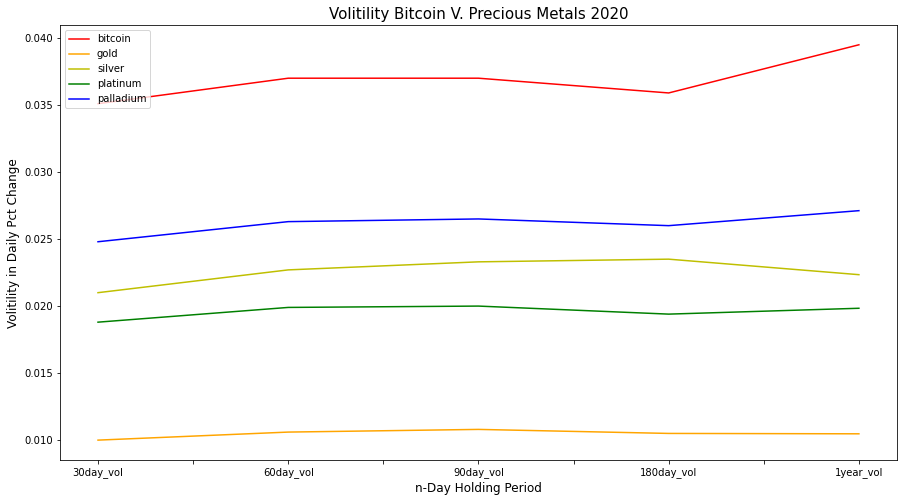

In [97]:
bitcoinvol.loc['30day_vol':'1year_vol',:][('2020-01-01','2020-12-31')].plot(label='bitcoin',color='r')
goldvol.loc['30day_vol':'1year_vol',:][('2020-01-01','2020-12-31')].plot(label='gold',color='orange')
silvervol.loc['30day_vol':'1year_vol',:][('2020-01-01','2020-12-31')].plot(label='silver',color='y')
platinumvol.loc['30day_vol':'1year_vol',:][('2020-01-01','2020-12-31')].plot(label='platinum',color='g')
palladiumvol.loc['30day_vol':'1year_vol',:][('2020-01-01','2020-12-31')].plot(label='palladium',color='b')
plt.title('Volitility Bitcoin V. Precious Metals 2020',fontsize=15)
plt.ylabel('Volitility in Daily Pct Change',fontsize=12)
plt.xlabel('n-Day Holding Period',fontsize=12)
plt.legend(loc='upper left')
plt.show()

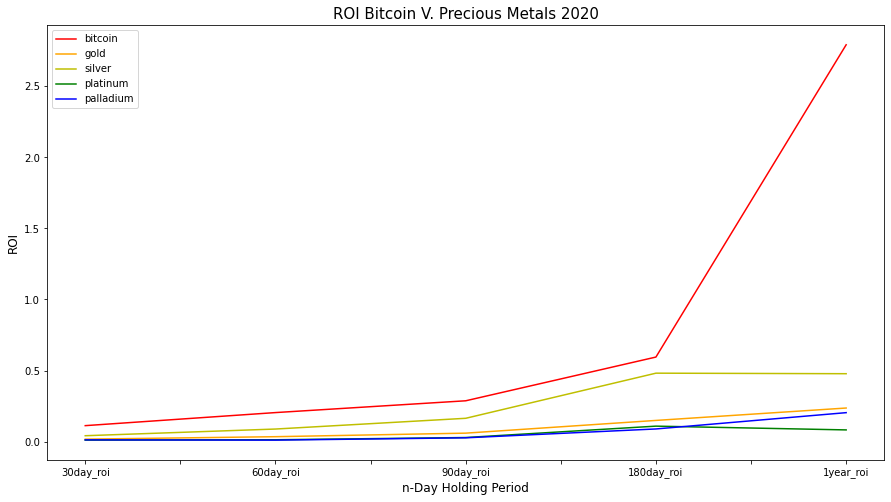

In [98]:
bitcoinroi.loc['30day_roi':'1year_roi',:][('2020-01-01','2020-12-31')].plot(label='bitcoin',color='r')
goldroi.loc['30day_roi':'1year_roi',:][('2020-01-01','2020-12-31')].plot(label='gold',color='orange')
silverroi.loc['30day_roi':'1year_roi',:][('2020-01-01','2020-12-31')].plot(label='silver',color='y')
platinumroi.loc['30day_roi':'1year_roi',:][('2020-01-01','2020-12-31')].plot(label='platinum',color='g')
palladiumroi.loc['30day_roi':'1year_roi',:][('2020-01-01','2020-12-31')].plot(label='palladium',color='b')
plt.title('ROI Bitcoin V. Precious Metals 2020',fontsize=15)
plt.ylabel('ROI',fontsize=12)
plt.xlabel('n-Day Holding Period',fontsize=12)
plt.legend(loc='upper left')
plt.show()

#### 2016-2020

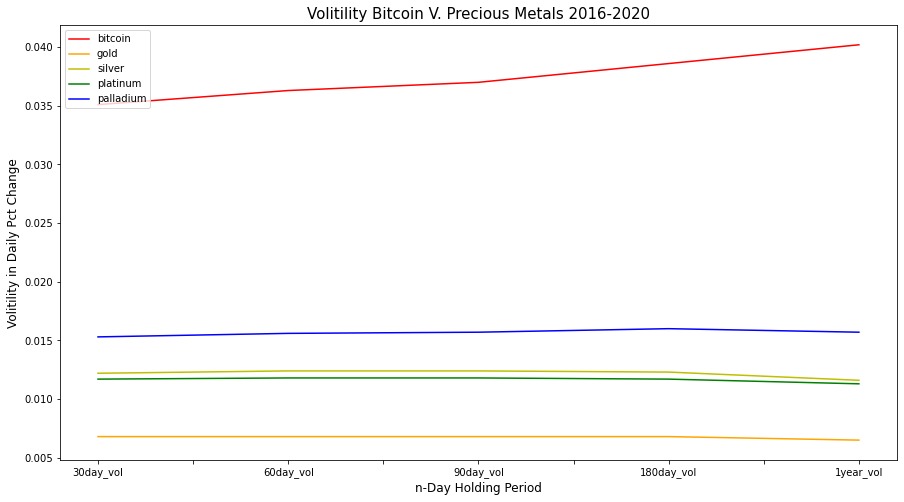

In [99]:
bitcoinvol.loc['30day_vol':'1year_vol',:][('2016-01-01','2020-12-31')].plot(label='bitcoin',color='r')
goldvol.loc['30day_vol':'1year_vol',:][('2016-01-01','2020-12-31')].plot(label='gold',color='orange')
silvervol.loc['30day_vol':'1year_vol',:][('2016-01-01','2020-12-31')].plot(label='silver',color='y')
platinumvol.loc['30day_vol':'1year_vol',:][('2016-01-01','2020-12-31')].plot(label='platinum',color='g')
palladiumvol.loc['30day_vol':'1year_vol',:][('2016-01-01','2020-12-31')].plot(label='palladium',color='b')
plt.title('Volitility Bitcoin V. Precious Metals 2016-2020',fontsize=15)
plt.ylabel('Volitility in Daily Pct Change',fontsize=12)
plt.xlabel('n-Day Holding Period',fontsize=12)
plt.legend(loc='upper left')
plt.show()

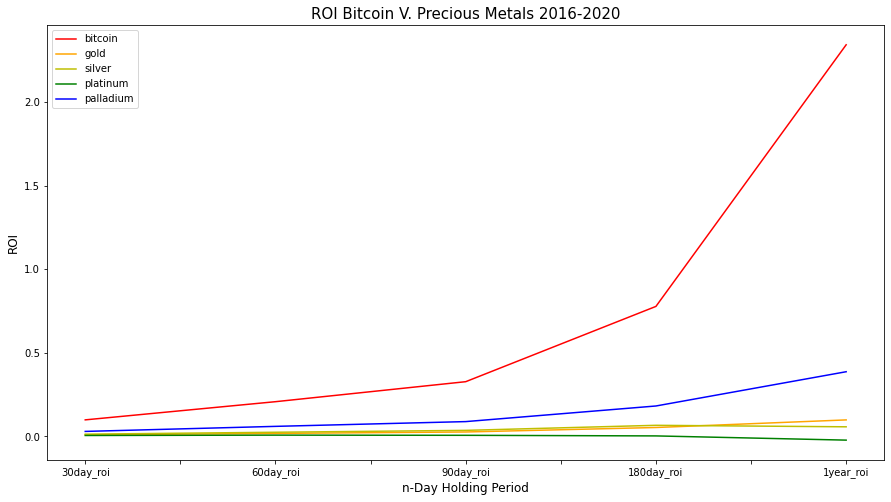

In [100]:
bitcoinroi.loc['30day_roi':'1year_roi',:][('2016-01-01','2020-12-31')].plot(label='bitcoin',color='r')
goldroi.loc['30day_roi':'1year_roi',:][('2016-01-01','2020-12-31')].plot(label='gold',color='orange')
silverroi.loc['30day_roi':'1year_roi',:][('2016-01-01','2020-12-31')].plot(label='silver',color='y')
platinumroi.loc['30day_roi':'1year_roi',:][('2016-01-01','2020-12-31')].plot(label='platinum',color='g')
palladiumroi.loc['30day_roi':'1year_roi',:][('2016-01-01','2020-12-31')].plot(label='palladium',color='b')
plt.title('ROI Bitcoin V. Precious Metals 2016-2020',fontsize=15)
plt.ylabel('ROI',fontsize=12)
plt.xlabel('n-Day Holding Period',fontsize=12)
plt.legend(loc='upper left')
plt.show()

#### 2011-2020

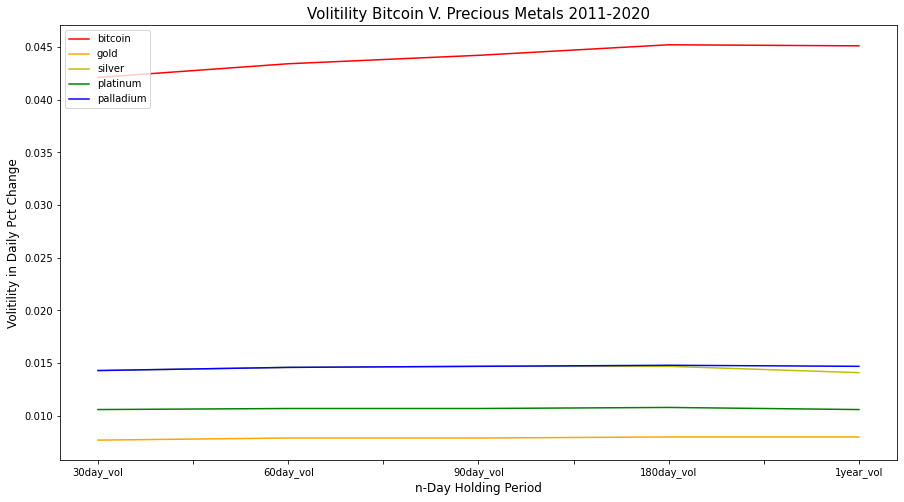

In [101]:
bitcoinvol.loc['30day_vol':'1year_vol',:][('2011-01-01','2020-12-31')].plot(label='bitcoin',color='r')
goldvol.loc['30day_vol':'1year_vol',:][('2011-01-01','2020-12-31')].plot(label='gold',color='orange')
silvervol.loc['30day_vol':'1year_vol',:][('2011-01-01','2020-12-31')].plot(label='silver',color='y')
platinumvol.loc['30day_vol':'1year_vol',:][('2011-01-01','2020-12-31')].plot(label='platinum',color='g')
palladiumvol.loc['30day_vol':'1year_vol',:][('2011-01-01','2020-12-31')].plot(label='palladium',color='b')
plt.title('Volitility Bitcoin V. Precious Metals 2011-2020',fontsize=15)
plt.ylabel('Volitility in Daily Pct Change',fontsize=12)
plt.xlabel('n-Day Holding Period',fontsize=12)
plt.legend(loc='upper left')
plt.show()

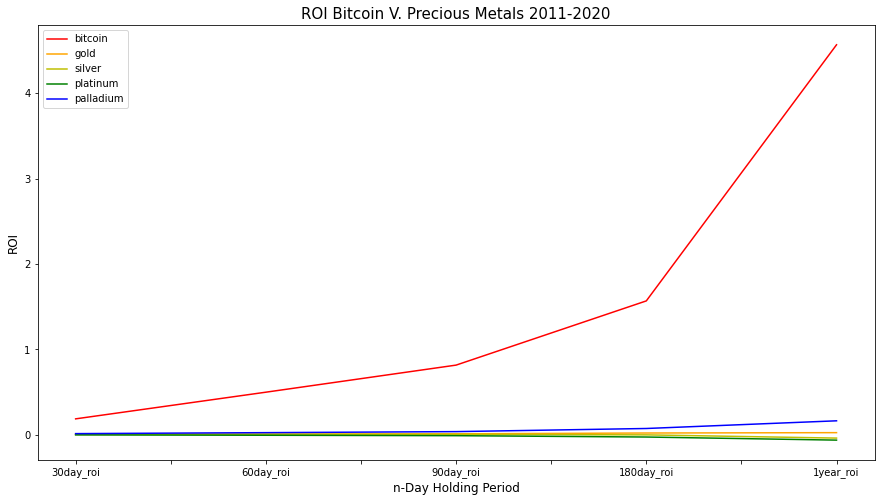

In [102]:
bitcoinroi.loc['30day_roi':'1year_roi',:][('2011-01-01','2020-12-31')].plot(label='bitcoin',color='r')
goldroi.loc['30day_roi':'1year_roi',:][('2011-01-01','2020-12-31')].plot(label='gold',color='orange')
silverroi.loc['30day_roi':'1year_roi',:][('2011-01-01','2020-12-31')].plot(label='silver',color='y')
platinumroi.loc['30day_roi':'1year_roi',:][('2011-01-01','2020-12-31')].plot(label='platinum',color='g')
palladiumroi.loc['30day_roi':'1year_roi',:][('2011-01-01','2020-12-31')].plot(label='palladium',color='b')
plt.title('ROI Bitcoin V. Precious Metals 2011-2020',fontsize=15)
plt.ylabel('ROI',fontsize=12)
plt.xlabel('n-Day Holding Period',fontsize=12)
plt.legend(loc='upper left')
plt.show()

### Popular Equities Volitility and Returns

#### Facebook

In [103]:
#Stock data retrieved from yahoo finance api
import yfinance as yf
symbol='FB'
data=yf.Ticker(symbol)
dffb=data.history(period='1d',start='2013-1-1',end='2020-12-31')[['Close']]
dffb.columns=['fb_close']
dffb=timeseries_adjust(dffb)

##### Facebook Volitility

In [104]:
facebookvol=df_vol_concise(dffb,'facebook')[[('2013-01-01', '2020-12-31'),
            ('2014-01-01', '2020-12-31'),
            ('2015-01-01', '2020-12-31'),
            ('2016-01-01', '2020-12-31'),
            ('2017-01-01', '2020-12-31'),
            ('2018-01-01', '2020-12-31'),
            ('2019-01-01', '2020-12-31'),
            ('2020-01-01', '2020-12-31'),
            (     'asset',           '')]]

In [105]:
facebookvol

2013-01-01 2014-01-01 2015-01-01 2016-01-01 2017-01-01 2018-01-01  \
            2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31   
30day_vol     0.016100   0.015300    0.01500   0.015200   0.016000   0.018400   
60day_vol     0.016600   0.015600    0.01540   0.015500   0.016500   0.019000   
90day_vol     0.016700   0.015700    0.01560   0.015600   0.016800   0.019300   
180day_vol    0.017000   0.015700    0.01590   0.015800   0.017300   0.019600   
1year_vol     0.016600   0.015600    0.01580   0.015800   0.017800   0.019400   
1.5year_vol   0.016300   0.015500    0.01560   0.015900   0.018100   0.019000   
2year_vol     0.016100   0.015500    0.01560   0.016400   0.018200   0.019500   
2.5year_vol   0.015900   0.015300    0.01560   0.016600   0.018100   0.020100   
3year_vol     0.015700   0.015100    0.01560   0.016500   0.018100   0.019869   
3.5year_vol   0.015600   0.015100    0.01570   0.016300   0.018200        NaN   
4year_vol     0.015500   0.015200    0.01580   0.016500   0.017787        NaN   
4.5year_vol   0.015700   0.015500    0.01600   0.016800        NaN        NaN   
5year_vol     0.015900   0.015700    0.01640   0.017224        NaN        NaN   
5.5year_vol   0.016100   0.015800    0.01670        NaN        NaN        NaN   
6year_vol     0.016400   0.016000    0.01666        NaN        NaN        NaN   
6.5year_vol   0.016700   0.016500        NaN        NaN        NaN        NaN   
7year_vol     0.017300   0.016961        NaN        NaN        NaN        NaN   
7.5year_vol   0.018000        NaN        NaN        NaN        NaN        NaN   
8year_vol     0.018032        NaN        NaN        NaN        NaN        NaN   
8.5year_vol        NaN        NaN        NaN        NaN        NaN        NaN   
9year_vol          NaN        NaN        NaN        NaN        NaN        NaN   
9.5year_vol        NaN        NaN        NaN        NaN        NaN        NaN   
10year_vol         NaN        NaN        NaN        NaN        NaN        NaN   

            2019-01-01 2020-01-01     asset  
            2020-12-31 2020-12-31            
30day_vol     0.018200   0.023300  facebook  
60day_vol     0.018700   0.024700  facebook  
90day_vol     0.018900   0.024700  facebook  
180day_vol    0.019400   0.024100  facebook  
1year_vol     0.020200   0.024009  facebook  
1.5year_vol   0.020300        NaN  facebook  
2year_vol     0.019842        NaN  facebook  
2.5year_vol        NaN        NaN  facebook  
3year_vol          NaN        NaN  facebook  
3.5year_vol        NaN        NaN  facebook  
4year_vol          NaN        NaN  facebook  
4.5year_vol        NaN        NaN  facebook  
5year_vol          NaN        NaN  facebook  
5.5year_vol        NaN        NaN  facebook  
6year_vol          NaN        NaN  facebook  
6.5year_vol        NaN        NaN  facebook  
7year_vol          NaN        NaN  facebook  
7.5year_vol        NaN        NaN  facebook  
8year_vol          NaN        NaN  facebook  
8.5year_vol        NaN        NaN  facebook  
9year_vol          NaN        NaN  facebook  
9.5year_vol        NaN        NaN  facebook  
10year_vol         NaN        NaN  facebook

##### Facebook Returns

In [106]:
facebookroi=df_roi_concise(dffb,'facebook')[[('2013-01-01', '2020-12-31'),
            ('2014-01-01', '2020-12-31'),
            ('2015-01-01', '2020-12-31'),
            ('2016-01-01', '2020-12-31'),
            ('2017-01-01', '2020-12-31'),
            ('2018-01-01', '2020-12-31'),
            ('2019-01-01', '2020-12-31'),
            ('2020-01-01', '2020-12-31'),
            (     'asset',           '')]]

In [107]:
facebookroi

2013-01-01 2014-01-01 2015-01-01 2016-01-01 2017-01-01 2018-01-01  \
            2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31   
30day_roi     0.027400   0.022300    0.02100   0.020500   0.020300   0.016400   
60day_roi     0.057100   0.042800    0.04280   0.040900   0.040500   0.034500   
90day_roi     0.088000   0.062700    0.06320   0.060000   0.058900   0.052400   
180day_roi    0.185200   0.127600    0.12620   0.115400   0.110900   0.101700   
1year_roi     0.357400   0.241000    0.23020   0.206500   0.162400   0.187200   
1.5year_roi   0.526600   0.375600    0.34360   0.299500   0.213600   0.303500   
2year_roi     0.695400   0.504600    0.45270   0.349500   0.285400   0.403600   
2.5year_roi   0.910100   0.641200    0.55780   0.381300   0.343100   0.481200   
3year_roi     1.168000   0.824500    0.67300   0.524900   0.495200   0.498567   
3.5year_roi   1.464700   1.035900    0.81760   0.763500   0.888300        NaN   
4year_roi     1.817400   1.198900    1.02920   1.002700   1.326459        NaN   
4.5year_roi   2.218500   1.359700    1.30070   1.414400        NaN        NaN   
5year_roi     2.553300   1.647600    1.63900   1.659656        NaN        NaN   
5.5year_roi   2.825700   2.043300    2.32290        NaN        NaN        NaN   
6year_roi     3.456500   2.403700    2.46552        NaN        NaN        NaN   
6.5year_roi   4.429000   3.265700        NaN        NaN        NaN        NaN   
7year_roi     5.921100   3.969293        NaN        NaN        NaN        NaN   
7.5year_roi   8.958400        NaN        NaN        NaN        NaN        NaN   
8year_roi     8.709643        NaN        NaN        NaN        NaN        NaN   
8.5year_roi        NaN        NaN        NaN        NaN        NaN        NaN   
9year_roi          NaN        NaN        NaN        NaN        NaN        NaN   
9.5year_roi        NaN        NaN        NaN        NaN        NaN        NaN   
10year_roi         NaN        NaN        NaN        NaN        NaN        NaN   

            2019-01-01 2020-01-01     asset  
            2020-12-31 2020-12-31            
30day_roi     0.033400   0.029700  facebook  
60day_roi     0.062600   0.069700  facebook  
90day_roi     0.091400   0.133500  facebook  
180day_roi    0.171000   0.329500  facebook  
1year_roi     0.291400   0.295977  facebook  
1.5year_roi   0.560400        NaN  facebook  
2year_roi     1.003759        NaN  facebook  
2.5year_roi        NaN        NaN  facebook  
3year_roi          NaN        NaN  facebook  
3.5year_roi        NaN        NaN  facebook  
4year_roi          NaN        NaN  facebook  
4.5year_roi        NaN        NaN  facebook  
5year_roi          NaN        NaN  facebook  
5.5year_roi        NaN        NaN  facebook  
6year_roi          NaN        NaN  facebook  
6.5year_roi        NaN        NaN  facebook  
7year_roi          NaN        NaN  facebook  
7.5year_roi        NaN        NaN  facebook  
8year_roi          NaN        NaN  facebook  
8.5year_roi        NaN        NaN  facebook  
9year_roi          NaN        NaN  facebook  
9.5year_roi        NaN        NaN  facebook  
10year_roi         NaN        NaN  facebook

#### Apple

In [108]:
symbol='AAPL'
data=yf.Ticker(symbol)
dfaapl=data.history(period='1d',start='2011-1-1',end='2020-12-31')[['Close']]
dfaapl.columns=['aapl_close']
dfaapl=timeseries_adjust(dfaapl)

##### Apple Volitility

In [109]:
applevol=df_vol_concise(dfaapl,'apple')

In [110]:
applevol

2011-01-01 2012-01-01 2013-01-01 2014-01-01 2015-01-01 2016-01-01  \
            2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31   
30day_vol     0.013500    0.01360   0.013400   0.013300   0.013700   0.013800   
60day_vol     0.013900    0.01390   0.013600   0.013700   0.014100   0.014100   
90day_vol     0.014000    0.01410   0.013800   0.013900   0.014300   0.014300   
180day_vol    0.014200    0.01420   0.013900   0.014000   0.014500   0.014500   
1year_vol     0.014100    0.01400   0.013700   0.014000   0.014300   0.014400   
1.5year_vol   0.013900    0.01370   0.013500   0.013800   0.013900   0.014200   
2year_vol     0.013800    0.01360   0.013400   0.013600   0.013800   0.014300   
2.5year_vol   0.013600    0.01340   0.013300   0.013400   0.013600   0.014400   
3year_vol     0.013500    0.01330   0.013200   0.013300   0.013600   0.014500   
3.5year_vol   0.013400    0.01320   0.013100   0.013300   0.013800   0.014600   
4year_vol     0.013400    0.01320   0.013100   0.013400   0.014000   0.015000   
4.5year_vol   0.013400    0.01320   0.013100   0.013600   0.014300   0.015600   
5year_vol     0.013400    0.01320   0.013300   0.013900   0.014900   0.015787   
5.5year_vol   0.013400    0.01330   0.013400   0.014100   0.015400        NaN   
6year_vol     0.013400    0.01340   0.013600   0.014500   0.015502        NaN   
6.5year_vol   0.013400    0.01350   0.013800   0.014900        NaN        NaN   
7year_vol     0.013600    0.01380   0.014200   0.014976        NaN        NaN   
7.5year_vol   0.013700    0.01400   0.014600        NaN        NaN        NaN   
8year_vol     0.014000    0.01450   0.014962        NaN        NaN        NaN   
8.5year_vol   0.014200    0.01490        NaN        NaN        NaN        NaN   
9year_vol     0.014500    0.01501        NaN        NaN        NaN        NaN   
9.5year_vol   0.014800        NaN        NaN        NaN        NaN        NaN   
10year_vol    0.014884        NaN        NaN        NaN        NaN        NaN   

            2017-01-01 2018-01-01 2019-01-01 2020-01-01  asset  
            2020-12-31 2020-12-31 2020-12-31 2020-12-31         
30day_vol     0.014500   0.016400   0.017200   0.022700  apple  
60day_vol     0.015000   0.016900   0.017800   0.024300  apple  
90day_vol     0.015300   0.017200   0.018400   0.024500  apple  
180day_vol    0.015800   0.017800   0.019300   0.023800  apple  
1year_vol     0.015900   0.018200   0.020400   0.024423  apple  
1.5year_vol   0.015900   0.017800   0.020300        NaN  apple  
2year_vol     0.016200   0.018400   0.019819        NaN  apple  
2.5year_vol   0.016100   0.018700        NaN        NaN  apple  
3year_vol     0.016400   0.018366        NaN        NaN  apple  
3.5year_vol   0.016800        NaN        NaN        NaN  apple  
4year_vol     0.016564        NaN        NaN        NaN  apple  
4.5year_vol        NaN        NaN        NaN        NaN  apple  
5year_vol          NaN        NaN        NaN        NaN  apple  
5.5year_vol        NaN        NaN        NaN        NaN  apple  
6year_vol          NaN        NaN        NaN        NaN  apple  
6.5year_vol        NaN        NaN        NaN        NaN  apple  
7year_vol          NaN        NaN        NaN        NaN  apple  
7.5year_vol        NaN        NaN        NaN        NaN  apple  
8year_vol          NaN        NaN        NaN        NaN  apple  
8.5year_vol        NaN        NaN        NaN        NaN  apple  
9year_vol          NaN        NaN        NaN        NaN  apple  
9.5year_vol        NaN        NaN        NaN        NaN  apple  
10year_vol         NaN        NaN        NaN        NaN  apple

##### Apple Returns

In [111]:
appleroi=df_roi_concise(dfaapl,'apple')

In [112]:
appleroi

2011-01-01 2012-01-01 2013-01-01 2014-01-01 2015-01-01 2016-01-01  \
            2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31   
30day_roi     0.024200   0.024600   0.025400   0.027300   0.026400   0.032700   
60day_roi     0.048600   0.048100   0.051600   0.055400   0.050900   0.066400   
90day_roi     0.073800   0.070500   0.079100   0.084400   0.076700   0.100200   
180day_roi    0.152500   0.139700   0.165500   0.169000   0.154200   0.208400   
1year_roi     0.312900   0.278700   0.339600   0.329900   0.324500   0.431500   
1.5year_roi   0.441500   0.435600   0.508100   0.463400   0.514100   0.639500   
2year_roi     0.533000   0.561400   0.624600   0.574400   0.669200   0.789400   
2.5year_roi   0.690000   0.717500   0.763100   0.776700   0.878700   1.038400   
3year_roi     0.884200   0.889000   0.952500   1.028600   1.122500   1.351100   
3.5year_roi   1.130700   1.097900   1.244600   1.318500   1.456700   1.956600   
4year_roi     1.372700   1.354000   1.591600   1.648800   1.860500   2.845500   
4.5year_roi   1.523600   1.584600   1.846700   1.885100   2.267500   3.952000   
5year_roi     1.652200   1.770100   2.011900   1.973800   2.484800   4.480116   
5.5year_roi   1.955200   2.052000   2.344300   2.465600   3.021000        NaN   
6year_roi     2.431400   2.510500   2.967700   3.504100   4.370594        NaN   
6.5year_roi   2.980800   3.118000   4.079500   5.312400        NaN        NaN   
7year_roi     3.432800   3.604500   5.313200   6.587128        NaN        NaN   
7.5year_roi   3.837400   4.269000   7.256900        NaN        NaN        NaN   
8year_roi     3.954400   4.356500   6.835806        NaN        NaN        NaN   
8.5year_roi   5.226400   5.879900        NaN        NaN        NaN        NaN   
9year_roi     7.382800   9.554429        NaN        NaN        NaN        NaN   
9.5year_roi   9.890800        NaN        NaN        NaN        NaN        NaN   
10year_roi   12.169573        NaN        NaN        NaN        NaN        NaN   

            2017-01-01 2018-01-01 2019-01-01 2020-01-01  asset  
            2020-12-31 2020-12-31 2020-12-31 2020-12-31         
30day_roi     0.036200   0.036700   0.058600   0.053300  apple  
60day_roi     0.070500   0.075400   0.115300   0.109500  apple  
90day_roi     0.105500   0.116900   0.174900   0.199000  apple  
180day_roi    0.211400   0.241500   0.377000   0.531600  apple  
1year_roi     0.419600   0.488700   0.846600   0.796235  apple  
1.5year_roi   0.628500   0.833900   1.570800        NaN  apple  
2year_roi     0.748000   1.076000   2.467612        NaN  apple  
2.5year_roi   1.121800   1.680800        NaN        NaN  apple  
3year_roi     1.619000   2.226672        NaN        NaN  apple  
3.5year_roi   2.455800        NaN        NaN        NaN  apple  
4year_roi     3.862374        NaN        NaN        NaN  apple  
4.5year_roi        NaN        NaN        NaN        NaN  apple  
5year_roi          NaN        NaN        NaN        NaN  apple  
5.5year_roi        NaN        NaN        NaN        NaN  apple  
6year_roi          NaN        NaN        NaN        NaN  apple  
6.5year_roi        NaN        NaN        NaN        NaN  apple  
7year_roi          NaN        NaN        NaN        NaN  apple  
7.5year_roi        NaN        NaN        NaN        NaN  apple  
8year_roi          NaN        NaN        NaN        NaN  apple  
8.5year_roi        NaN        NaN        NaN        NaN  apple  
9year_roi          NaN        NaN        NaN        NaN  apple  
9.5year_roi        NaN        NaN        NaN        NaN  apple  
10year_roi         NaN        NaN        NaN        NaN  apple

#### Amazon

In [113]:
symbol='AMZN'
data=yf.Ticker(symbol)
dfamzn=data.history(period='1d',start='2011-1-1',end='2020-12-31')[['Close']]
dfamzn.columns=['amzn_close']
dfamzn=timeseries_adjust(dfamzn)

#####  Amazon Volitility

In [114]:
amazonvol=df_vol_concise(dfamzn,'amazon')

In [115]:
amazonvol

2011-01-01 2012-01-01 2013-01-01 2014-01-01 2015-01-01 2016-01-01  \
            2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31   
30day_vol     0.015200   0.014800   0.014700    0.01490   0.014600    0.01420   
60day_vol     0.015700   0.015200   0.015100    0.01530   0.015000    0.01450   
90day_vol     0.015900   0.015500   0.015400    0.01550   0.015200    0.01460   
180day_vol    0.016100   0.015600   0.015600    0.01570   0.015400    0.01470   
1year_vol     0.016100   0.015600   0.015700    0.01570   0.015300    0.01480   
1.5year_vol   0.016000   0.015600   0.015700    0.01560   0.015100    0.01500   
2year_vol     0.015900   0.015700   0.015800    0.01560   0.015100    0.01540   
2.5year_vol   0.015900   0.015700   0.015700    0.01540   0.015100    0.01540   
3year_vol     0.015800   0.015600   0.015600    0.01520   0.015100    0.01550   
3.5year_vol   0.015800   0.015600   0.015400    0.01510   0.015100    0.01520   
4year_vol     0.015800   0.015600   0.015300    0.01520   0.015300    0.01520   
4.5year_vol   0.015800   0.015500   0.015400    0.01540   0.015300    0.01540   
5year_vol     0.015900   0.015600   0.015600    0.01570   0.015600    0.01586   
5.5year_vol   0.015900   0.015600   0.015700    0.01580   0.016000        NaN   
6year_vol     0.015800   0.015700   0.015900    0.01590   0.016218        NaN   
6.5year_vol   0.015800   0.015700   0.015900    0.01620        NaN        NaN   
7year_vol     0.015900   0.015800   0.015900    0.01632        NaN        NaN   
7.5year_vol   0.015900   0.015700   0.016000        NaN        NaN        NaN   
8year_vol     0.016000   0.015800   0.016058        NaN        NaN        NaN   
8.5year_vol   0.016100   0.016000        NaN        NaN        NaN        NaN   
9year_vol     0.016300   0.016109        NaN        NaN        NaN        NaN   
9.5year_vol   0.016600        NaN        NaN        NaN        NaN        NaN   
10year_vol    0.016554        NaN        NaN        NaN        NaN        NaN   

            2017-01-01 2018-01-01 2019-01-01 2020-01-01   asset  
            2020-12-31 2020-12-31 2020-12-31 2020-12-31          
30day_vol     0.014500   0.016000   0.015200   0.019900  amazon  
60day_vol     0.014900   0.016400   0.015600   0.021000  amazon  
90day_vol     0.015200   0.016600   0.015700   0.021000  amazon  
180day_vol    0.015700   0.016900   0.016000   0.020600  amazon  
1year_vol     0.016100   0.017100   0.016400   0.020142  amazon  
1.5year_vol   0.016300   0.016700   0.016700        NaN  amazon  
2year_vol     0.016700   0.017300   0.016583        NaN  amazon  
2.5year_vol   0.016400   0.017500        NaN        NaN  amazon  
3year_vol     0.016300   0.017374        NaN        NaN  amazon  
3.5year_vol   0.016300        NaN        NaN        NaN  amazon  
4year_vol     0.016019        NaN        NaN        NaN  amazon  
4.5year_vol        NaN        NaN        NaN        NaN  amazon  
5year_vol          NaN        NaN        NaN        NaN  amazon  
5.5year_vol        NaN        NaN        NaN        NaN  amazon  
6year_vol          NaN        NaN        NaN        NaN  amazon  
6.5year_vol        NaN        NaN        NaN        NaN  amazon  
7year_vol          NaN        NaN        NaN        NaN  amazon  
7.5year_vol        NaN        NaN        NaN        NaN  amazon  
8year_vol          NaN        NaN        NaN        NaN  amazon  
8.5year_vol        NaN        NaN        NaN        NaN  amazon  
9year_vol          NaN        NaN        NaN        NaN  amazon  
9.5year_vol        NaN        NaN        NaN        NaN  amazon  
10year_vol         NaN        NaN        NaN        NaN  amazon

##### Amazon Returns

In [116]:
amazonroi=df_roi_concise(dfamzn,'amazon')

In [117]:
amazonroi

2011-01-01 2012-01-01 2013-01-01 2014-01-01 2015-01-01 2016-01-01  \
            2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31   
30day_roi     0.027400   0.029900   0.029200   0.028700   0.036800   0.031300   
60day_roi     0.055100   0.060300   0.059700   0.059100   0.071400   0.065500   
90day_roi     0.084600   0.091900   0.091800   0.091400   0.108900   0.102200   
180day_roi    0.176700   0.191200   0.195600   0.202400   0.226300   0.212900   
1year_roi     0.365000   0.394800   0.400300   0.443500   0.440800   0.423600   
1.5year_roi   0.583900   0.621700   0.634200   0.715200   0.691800   0.658400   
2year_roi     0.840200   0.884900   0.941300   1.013300   0.985000   0.949500   
2.5year_roi   1.169900   1.239200   1.353800   1.428800   1.400800   1.281100   
3year_roi     1.580400   1.724000   1.839600   1.960900   1.966400   1.671600   
3.5year_roi   2.046700   2.272800   2.396200   2.560300   2.429900   2.111600   
4year_roi     2.591900   2.826000   2.989900   3.231900   2.864000   2.797300   
4.5year_roi   3.240700   3.503900   3.704400   3.887000   3.590200   4.138200   
5year_roi     3.921100   4.260000   4.546100   4.539300   4.656500   4.158401   
5.5year_roi   4.834400   5.280100   5.496600   5.814700   7.344900        NaN   
6year_roi     5.664100   6.236300   6.132000   7.158300   9.650364        NaN   
6.5year_roi   6.420200   6.806000   6.570900   8.326000        NaN        NaN   
7year_roi     7.490900   7.568700   7.934400   7.256527        NaN        NaN   
7.5year_roi   8.658100   9.041500  10.905800        NaN        NaN        NaN   
8year_roi     9.588600  11.021100  11.770006        NaN        NaN        NaN   
8.5year_roi  11.155500  14.987700        NaN        NaN        NaN        NaN   
9year_roi    12.547100  17.353629        NaN        NaN        NaN        NaN   
9.5year_roi  16.210100        NaN        NaN        NaN        NaN        NaN   
10year_roi   16.836555        NaN        NaN        NaN        NaN        NaN   

            2017-01-01 2018-01-01 2019-01-01 2020-01-01   asset  
            2020-12-31 2020-12-31 2020-12-31 2020-12-31          
30day_roi       0.0325   0.029200   0.032600   0.053500  amazon  
60day_roi       0.0653   0.056300   0.067000   0.105100  amazon  
90day_roi       0.1012   0.084700   0.104800   0.189600  amazon  
180day_roi      0.2159   0.180600   0.235900   0.470400  amazon  
1year_roi       0.4336   0.299800   0.492600   0.731208  amazon  
1.5year_roi     0.5952   0.425300   0.804400        NaN  amazon  
2year_roi       0.7463   0.628700   1.134875        NaN  amazon  
2.5year_roi     1.0785   1.113500        NaN        NaN  amazon  
3year_roi       1.7438   1.763518        NaN        NaN  amazon  
3.5year_roi     2.5701        NaN        NaN        NaN  amazon  
4year_roi       3.3598        NaN        NaN        NaN  amazon  
4.5year_roi        NaN        NaN        NaN        NaN  amazon  
5year_roi          NaN        NaN        NaN        NaN  amazon  
5.5year_roi        NaN        NaN        NaN        NaN  amazon  
6year_roi          NaN        NaN        NaN        NaN  amazon  
6.5year_roi        NaN        NaN        NaN        NaN  amazon  
7year_roi          NaN        NaN        NaN        NaN  amazon  
7.5year_roi        NaN        NaN        NaN        NaN  amazon  
8year_roi          NaN        NaN        NaN        NaN  amazon  
8.5year_roi        NaN        NaN        NaN        NaN  amazon  
9year_roi          NaN        NaN        NaN        NaN  amazon  
9.5year_roi        NaN        NaN        NaN        NaN  amazon  
10year_roi         NaN        NaN        NaN        NaN  amazon

#### Netflix

In [118]:
symbol='NFLX'
data=yf.Ticker(symbol)
dfnflx=data.history(period='1d',start='2011-1-1',end='2020-12-31')[['Close']]
dfnflx.columns=['nflx_close']
dfnflx=timeseries_adjust(dfnflx)

##### Netflix Volitility 

In [119]:
netflixvol=df_vol_concise(dfnflx,'netflix')

In [120]:
netflixvol

2011-01-01 2012-01-01 2013-01-01 2014-01-01 2015-01-01 2016-01-01  \
            2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31   
30day_vol     0.023700   0.022700   0.021400   0.020600   0.020600   0.019800   
60day_vol     0.024600   0.023600   0.022000   0.021200   0.021200   0.020200   
90day_vol     0.025100   0.024000   0.022200   0.021500   0.021500   0.020400   
180day_vol    0.025500   0.024200   0.022200   0.021800   0.021600   0.020500   
1year_vol     0.025700   0.024100   0.022100   0.021800   0.021400   0.020400   
1.5year_vol   0.025500   0.023700   0.022100   0.021800   0.021100   0.020400   
2year_vol     0.025400   0.023500   0.022200   0.021800   0.021000   0.020700   
2.5year_vol   0.025100   0.023400   0.022100   0.021600   0.020900   0.020700   
3year_vol     0.024800   0.023300   0.022000   0.021400   0.020900   0.020700   
3.5year_vol   0.024700   0.023200   0.021900   0.021300   0.020900   0.020500   
4year_vol     0.024600   0.023200   0.021800   0.021400   0.021100   0.020500   
4.5year_vol   0.024700   0.023200   0.021900   0.021600   0.021300   0.020900   
5year_vol     0.024800   0.023300   0.022100   0.021900   0.021600   0.021205   
5.5year_vol   0.024800   0.023300   0.022200   0.022000   0.022100        NaN   
6year_vol     0.024800   0.023400   0.022200   0.022100   0.022203        NaN   
6.5year_vol   0.024900   0.023600   0.022200   0.022100        NaN        NaN   
7year_vol     0.025200   0.023800   0.022300   0.022185        NaN        NaN   
7.5year_vol   0.025600   0.024200   0.022600        NaN        NaN        NaN   
8year_vol     0.026100   0.024900   0.024028        NaN        NaN        NaN   
8.5year_vol   0.026300   0.025200        NaN        NaN        NaN        NaN   
9year_vol     0.026700   0.025587        NaN        NaN        NaN        NaN   
9.5year_vol   0.026800        NaN        NaN        NaN        NaN        NaN   
10year_vol    0.026653        NaN        NaN        NaN        NaN        NaN   

            2017-01-01 2018-01-01 2019-01-01 2020-01-01    asset  
            2020-12-31 2020-12-31 2020-12-31 2020-12-31           
30day_vol     0.019500   0.021400    0.02010   0.023600  netflix  
60day_vol     0.020100   0.021800    0.02060   0.024900  netflix  
90day_vol     0.020400   0.021900    0.02080   0.025000  netflix  
180day_vol    0.020800   0.022100    0.02120   0.024500  netflix  
1year_vol     0.021100   0.022000    0.02150   0.024147  netflix  
1.5year_vol   0.021300   0.021600    0.02150        NaN  netflix  
2year_vol     0.021500   0.022100    0.02135        NaN  netflix  
2.5year_vol   0.021300   0.022300        NaN        NaN  netflix  
3year_vol     0.021200   0.022303        NaN        NaN  netflix  
3.5year_vol   0.021200        NaN        NaN        NaN  netflix  
4year_vol     0.020672        NaN        NaN        NaN  netflix  
4.5year_vol        NaN        NaN        NaN        NaN  netflix  
5year_vol          NaN        NaN        NaN        NaN  netflix  
5.5year_vol        NaN        NaN        NaN        NaN  netflix  
6year_vol          NaN        NaN        NaN        NaN  netflix  
6.5year_vol        NaN        NaN        NaN        NaN  netflix  
7year_vol          NaN        NaN        NaN        NaN  netflix  
7.5year_vol        NaN        NaN        NaN        NaN  netflix  
8year_vol          NaN        NaN        NaN        NaN  netflix  
8.5year_vol        NaN        NaN        NaN        NaN  netflix  
9year_vol          NaN        NaN        NaN        NaN  netflix  
9.5year_vol        NaN        NaN        NaN        NaN  netflix  
10year_vol         NaN        NaN        NaN        NaN  netflix

##### Netflix Returns

In [121]:
netflixroi=df_roi_concise(dfnflx,'netflix')

In [122]:
netflixroi

2011-01-01 2012-01-01 2013-01-01 2014-01-01 2015-01-01 2016-01-01  \
            2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31   
30day_roi     0.037100   0.044000   0.045600    0.03540   0.039100   0.032400   
60day_roi     0.075200   0.087000   0.083700    0.06760   0.074100   0.067100   
90day_roi     0.115700   0.132500   0.122900    0.10090   0.112400   0.103000   
180day_roi    0.251300   0.311300   0.258000    0.22080   0.230200   0.229100   
1year_roi     0.600800   0.735100   0.518400    0.47010   0.442400   0.504000   
1.5year_roi   1.021500   1.159500   0.786600    0.74260   0.722600   0.806400   
2year_roi     1.498500   1.601800   1.168400    1.06890   1.129200   1.212100   
2.5year_roi   2.031100   2.140200   1.650700    1.49750   1.571300   1.520900   
3year_roi     2.818000   3.039200   2.153100    2.13620   2.209200   1.986300   
3.5year_roi   3.591400   3.831300   2.847000    2.86340   2.669200   2.411100   
4year_roi     4.408600   4.604000   3.725000    3.62460   3.165500   3.396000   
4.5year_roi   5.530900   5.967300   4.638300    4.05510   3.392500   4.181500   
5year_roi     7.103300   7.920700   5.888800    4.43460   4.043300   3.770735   
5.5year_roi   9.953900  11.334600   7.275700    5.52440   6.245800        NaN   
6year_roi    12.849500  14.812200   8.223400    6.85950   9.523672        NaN   
6.5year_roi  15.612300  17.241200   9.177500    8.10780        NaN        NaN   
7year_roi    17.800400  20.241000  12.461400    9.12108        NaN        NaN   
7.5year_roi  21.911200  26.653500  19.229900        NaN        NaN        NaN   
8year_roi    26.569400  39.660600  38.910119        NaN        NaN        NaN   
8.5year_roi  23.400500  38.356800        NaN        NaN        NaN        NaN   
9year_roi    20.082100  49.832368        NaN        NaN        NaN        NaN   
9.5year_roi  14.493800        NaN        NaN        NaN        NaN        NaN   
10year_roi   19.582536        NaN        NaN        NaN        NaN        NaN   

            2017-01-01 2018-01-01 2019-01-01 2020-01-01    asset  
            2020-12-31 2020-12-31 2020-12-31 2020-12-31           
30day_roi     0.034100   0.029100   0.024500   0.043300  netflix  
60day_roi     0.067600   0.052900   0.042300   0.074900  netflix  
90day_roi     0.103700   0.073700   0.066000   0.129600  netflix  
180day_roi    0.225200   0.136200   0.151200   0.295000  netflix  
1year_roi     0.463500   0.222600   0.382300   0.590583  netflix  
1.5year_roi   0.575100   0.226900   0.422800        NaN  netflix  
2year_roi     0.734100   0.424900   0.959912        NaN  netflix  
2.5year_roi   0.961300   0.677200        NaN        NaN  netflix  
3year_roi     1.700000   1.608992        NaN        NaN  netflix  
3.5year_roi   2.430300        NaN        NaN        NaN  netflix  
4year_roi     3.114754        NaN        NaN        NaN  netflix  
4.5year_roi        NaN        NaN        NaN        NaN  netflix  
5year_roi          NaN        NaN        NaN        NaN  netflix  
5.5year_roi        NaN        NaN        NaN        NaN  netflix  
6year_roi          NaN        NaN        NaN        NaN  netflix  
6.5year_roi        NaN        NaN        NaN        NaN  netflix  
7year_roi          NaN        NaN        NaN        NaN  netflix  
7.5year_roi        NaN        NaN        NaN        NaN  netflix  
8year_roi          NaN        NaN        NaN        NaN  netflix  
8.5year_roi        NaN        NaN        NaN        NaN  netflix  
9year_roi          NaN        NaN        NaN        NaN  netflix  
9.5year_roi        NaN        NaN        NaN        NaN  netflix  
10year_roi         NaN        NaN        NaN        NaN  netflix

#### Google

In [123]:
symbol='GOOG'
data=yf.Ticker(symbol)
dfgoog=data.history(period='1d',start='2011-1-1',end='2020-12-31')[['Close']]
dfgoog.columns=['goog_close']
dfgoog=timeseries_adjust(dfgoog)

##### Google Volitility

In [124]:
googlevol=df_vol_concise(dfgoog,'google')

In [125]:
googlevol

2011-01-01 2012-01-01 2013-01-01 2014-01-01 2015-01-01 2016-01-01  \
            2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31   
30day_vol     0.012200    0.01200   0.012100   0.012400   0.012600   0.012300   
60day_vol     0.012600    0.01230   0.012400   0.012700   0.013000   0.012600   
90day_vol     0.012800    0.01250   0.012600   0.012800   0.013100   0.012700   
180day_vol    0.013000    0.01270   0.012900   0.013100   0.013500   0.013000   
1year_vol     0.012900    0.01270   0.012900   0.013100   0.013200   0.013000   
1.5year_vol   0.012700    0.01260   0.012800   0.013000   0.012900   0.013000   
2year_vol     0.012600    0.01260   0.012800   0.012900   0.012700   0.013100   
2.5year_vol   0.012600    0.01250   0.012800   0.012700   0.012700   0.013200   
3year_vol     0.012500    0.01250   0.012600   0.012500   0.012700   0.013300   
3.5year_vol   0.012500    0.01250   0.012500   0.012500   0.012800   0.013300   
4year_vol     0.012500    0.01250   0.012400   0.012600   0.012900   0.013500   
4.5year_vol   0.012500    0.01240   0.012500   0.012800   0.013200   0.013800   
5year_vol     0.012500    0.01250   0.012700   0.013000   0.013600   0.013784   
5.5year_vol   0.012500    0.01250   0.012800   0.013300   0.014200        NaN   
6year_vol     0.012500    0.01250   0.012900   0.013500   0.014082        NaN   
6.5year_vol   0.012500    0.01260   0.013000   0.013700        NaN        NaN   
7year_vol     0.012600    0.01270   0.013300   0.013696        NaN        NaN   
7.5year_vol   0.012600    0.01280   0.013500        NaN        NaN        NaN   
8year_vol     0.012800    0.01300   0.013436        NaN        NaN        NaN   
8.5year_vol   0.012900    0.01320        NaN        NaN        NaN        NaN   
9year_vol     0.013200    0.01327        NaN        NaN        NaN        NaN   
9.5year_vol   0.013500        NaN        NaN        NaN        NaN        NaN   
10year_vol    0.013505        NaN        NaN        NaN        NaN        NaN   

            2017-01-01 2018-01-01 2019-01-01 2020-01-01   asset  
            2020-12-31 2020-12-31 2020-12-31 2020-12-31          
30day_vol     0.013000    0.01480   0.014900   0.018600  google  
60day_vol     0.013500    0.01520   0.015600   0.020100  google  
90day_vol     0.013700    0.01540   0.016000   0.020100  google  
180day_vol    0.014300    0.01590   0.017000   0.019400  google  
1year_vol     0.014500    0.01600   0.017700   0.020033  google  
1.5year_vol   0.014500    0.01590   0.017600        NaN  google  
2year_vol     0.014600    0.01620   0.016759        NaN  google  
2.5year_vol   0.014600    0.01640        NaN        NaN  google  
3year_vol     0.014800    0.01609        NaN        NaN  google  
3.5year_vol   0.014900        NaN        NaN        NaN  google  
4year_vol     0.014508        NaN        NaN        NaN  google  
4.5year_vol        NaN        NaN        NaN        NaN  google  
5year_vol          NaN        NaN        NaN        NaN  google  
5.5year_vol        NaN        NaN        NaN        NaN  google  
6year_vol          NaN        NaN        NaN        NaN  google  
6.5year_vol        NaN        NaN        NaN        NaN  google  
7year_vol          NaN        NaN        NaN        NaN  google  
7.5year_vol        NaN        NaN        NaN        NaN  google  
8year_vol          NaN        NaN        NaN        NaN  google  
8.5year_vol        NaN        NaN        NaN        NaN  google  
9year_vol          NaN        NaN        NaN        NaN  google  
9.5year_vol        NaN        NaN        NaN        NaN  google  
10year_vol         NaN        NaN        NaN        NaN  google

##### Google Returns

In [126]:
googleroi=df_roi_concise(dfgoog,'google')

In [127]:
googleroi

2011-01-01 2012-01-01 2013-01-01 2014-01-01 2015-01-01 2016-01-01  \
            2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31   
30day_roi     0.016900   0.018500   0.018700     0.0159   0.019700   0.017300   
60day_roi     0.033600   0.037100   0.036600     0.0311   0.038600   0.035100   
90day_roi     0.049700   0.054100   0.052800     0.0444   0.055200   0.050300   
180day_roi    0.101100   0.107600   0.101100     0.0888   0.108900   0.096600   
1year_roi     0.212300   0.221800   0.199500     0.1847   0.206200   0.194700   
1.5year_roi   0.332800   0.334800   0.290000     0.2957   0.307900   0.289800   
2year_roi     0.461100   0.447100   0.395100     0.4014   0.418500   0.376600   
2.5year_roi   0.602700   0.565500   0.538100     0.5284   0.546000   0.469700   
3year_roi     0.757300   0.719300   0.688200     0.6845   0.694800   0.602500   
3.5year_roi   0.910600   0.905900   0.846300     0.8409   0.836500   0.782000   
4year_roi     1.087000   1.079700   1.017700     0.9911   0.993400   0.992000   
4.5year_roi   1.311200   1.277300   1.197200     1.1323   1.201000   1.242300   
5year_roi     1.536100   1.511600   1.387200     1.3030   1.475200   1.344872   
5.5year_roi   1.795200   1.764800   1.575200     1.5524   2.004400        NaN   
6year_roi     2.031700   1.953600   1.685200     1.6566   2.323671        NaN   
6.5year_roi   2.318700   2.179000   1.926300     1.8656        NaN        NaN   
7year_roi     2.677400   2.541600   2.368200     2.1372        NaN        NaN   
7.5year_roi   3.026900   3.032000   2.955100        NaN        NaN        NaN   
8year_roi     3.417600   3.630000   3.828317        NaN        NaN        NaN   
8.5year_roi   3.843500   4.326900        NaN        NaN        NaN        NaN   
9year_roi     4.233200   4.248013        NaN        NaN        NaN        NaN   
9.5year_roi   4.771400        NaN        NaN        NaN        NaN        NaN   
10year_roi    4.778242        NaN        NaN        NaN        NaN        NaN   

            2017-01-01 2018-01-01 2019-01-01 2020-01-01   asset  
            2020-12-31 2020-12-31 2020-12-31 2020-12-31          
30day_roi     0.019000   0.015600    0.02540   0.024600  google  
60day_roi     0.038100   0.032400    0.04990   0.049400  google  
90day_roi     0.054000   0.045200    0.06600   0.083600  google  
180day_roi    0.095800   0.085200    0.12550   0.189000  google  
1year_roi     0.179100   0.161800    0.24790   0.272165  google  
1.5year_roi   0.248400   0.253500    0.41940        NaN  google  
2year_roi     0.315900   0.338500    0.66326        NaN  google  
2.5year_roi   0.430800   0.472000        NaN        NaN  google  
3year_roi     0.606800   0.633352        NaN        NaN  google  
3.5year_roi   0.852200        NaN        NaN        NaN  google  
4year_roi     1.212736        NaN        NaN        NaN  google  
4.5year_roi        NaN        NaN        NaN        NaN  google  
5year_roi          NaN        NaN        NaN        NaN  google  
5.5year_roi        NaN        NaN        NaN        NaN  google  
6year_roi          NaN        NaN        NaN        NaN  google  
6.5year_roi        NaN        NaN        NaN        NaN  google  
7year_roi          NaN        NaN        NaN        NaN  google  
7.5year_roi        NaN        NaN        NaN        NaN  google  
8year_roi          NaN        NaN        NaN        NaN  google  
8.5year_roi        NaN        NaN        NaN        NaN  google  
9year_roi          NaN        NaN        NaN        NaN  google  
9.5year_roi        NaN        NaN        NaN        NaN  google  
10year_roi         NaN        NaN        NaN        NaN  google

#### Tesla

In [128]:
symbol='TSLA'
data=yf.Ticker(symbol)
dftsla=data.history(period='1d',start='2011-1-1',end='2020-12-31')[['Close']]
dftsla.columns=['tsla_close']
dftsla=timeseries_adjust(dftsla)

##### Tesla Volitiltiy

In [129]:
teslavol=df_vol_concise(dftsla,'tesla')

In [130]:
teslavol

2011-01-01 2012-01-01 2013-01-01 2014-01-01 2015-01-01 2016-01-01  \
            2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31   
30day_vol     0.026500   0.026400   0.026600   0.025600   0.025900   0.027100   
60day_vol     0.027100   0.026900   0.027200   0.026000   0.026500   0.027600   
90day_vol     0.027300   0.027100   0.027500   0.026200   0.026700   0.027900   
180day_vol    0.027400   0.027200   0.027300   0.026100   0.026900   0.028000   
1year_vol     0.027200   0.027000   0.026600   0.025700   0.026600   0.027700   
1.5year_vol   0.026800   0.026600   0.025800   0.025200   0.026000   0.027600   
2year_vol     0.026600   0.026200   0.025300   0.025000   0.025800   0.027700   
2.5year_vol   0.026400   0.025700   0.025000   0.024700   0.025800   0.028100   
3year_vol     0.026000   0.025300   0.024700   0.024500   0.025900   0.028100   
3.5year_vol   0.025700   0.025100   0.024500   0.024500   0.026200   0.028300   
4year_vol     0.025500   0.025000   0.024500   0.024700   0.026400   0.029100   
4.5year_vol   0.025500   0.025000   0.024700   0.025100   0.026800   0.030000   
5year_vol     0.025500   0.025100   0.025000   0.025500   0.027900   0.030229   
5.5year_vol   0.025600   0.025300   0.025400   0.026000   0.028800        NaN   
6year_vol     0.025700   0.025600   0.025900   0.026900   0.028856        NaN   
6.5year_vol   0.026000   0.026200   0.026500   0.027800        NaN        NaN   
7year_vol     0.026400   0.026800   0.027700   0.028372        NaN        NaN   
7.5year_vol   0.026800   0.027400   0.029000        NaN        NaN        NaN   
8year_vol     0.027100   0.028000   0.029379        NaN        NaN        NaN   
8.5year_vol   0.027500   0.028800        NaN        NaN        NaN        NaN   
9year_vol     0.028100   0.029204        NaN        NaN        NaN        NaN   
9.5year_vol   0.028700        NaN        NaN        NaN        NaN        NaN   
10year_vol    0.028966        NaN        NaN        NaN        NaN        NaN   

            2017-01-01 2018-01-01 2019-01-01 2020-01-01  asset  
            2020-12-31 2020-12-31 2020-12-31 2020-12-31         
30day_vol     0.029300   0.033000   0.034600   0.045600  tesla  
60day_vol     0.030100   0.034000   0.035900   0.046600  tesla  
90day_vol     0.030500   0.034700   0.036700   0.047000  tesla  
180day_vol    0.030900   0.035200   0.037900   0.046400  tesla  
1year_vol     0.031000   0.034900   0.040000   0.046959  tesla  
1.5year_vol   0.031100   0.034300   0.039500        NaN  tesla  
2year_vol     0.031200   0.035500   0.037908        NaN  tesla  
2.5year_vol   0.031300   0.036500        NaN        NaN  tesla  
3year_vol     0.032000   0.035712        NaN        NaN  tesla  
3.5year_vol   0.032700        NaN        NaN        NaN  tesla  
4year_vol     0.032287        NaN        NaN        NaN  tesla  
4.5year_vol        NaN        NaN        NaN        NaN  tesla  
5year_vol          NaN        NaN        NaN        NaN  tesla  
5.5year_vol        NaN        NaN        NaN        NaN  tesla  
6year_vol          NaN        NaN        NaN        NaN  tesla  
6.5year_vol        NaN        NaN        NaN        NaN  tesla  
7year_vol          NaN        NaN        NaN        NaN  tesla  
7.5year_vol        NaN        NaN        NaN        NaN  tesla  
8year_vol          NaN        NaN        NaN        NaN  tesla  
8.5year_vol        NaN        NaN        NaN        NaN  tesla  
9year_vol          NaN        NaN        NaN        NaN  tesla  
9.5year_vol        NaN        NaN        NaN        NaN  tesla  
10year_vol         NaN        NaN        NaN        NaN  tesla

##### Tesla Returns

In [131]:
teslaroi=df_roi_concise(dftsla,'tesla')

In [132]:
teslaroi

2011-01-01  2012-01-01 2013-01-01 2014-01-01 2015-01-01  \
             2020-12-31  2020-12-31 2020-12-31 2020-12-31 2020-12-31   
30day_roi      0.055200    0.059800   0.064000   0.050400   0.054000   
60day_roi      0.113400    0.121600   0.131400   0.095800   0.105900   
90day_roi      0.175900    0.187500   0.205000   0.141500   0.162600   
180day_roi     0.410700    0.444600   0.452100   0.326400   0.376100   
1year_roi      1.020500    1.126000   0.942300   0.779200   0.923900   
1.5year_roi    1.501300    1.621400   1.136300   0.934600   1.131100   
2year_roi      1.928500    1.795500   1.063600   0.866400   1.098400   
2.5year_roi    2.513700    2.026100   1.228100   0.996900   1.249100   
3year_roi      2.916400    2.166200   1.309300   1.159900   1.407600   
3.5year_roi    3.327100    2.526700   1.677300   1.540100   1.950200   
4year_roi      3.863300    3.110000   2.443900   2.246300   3.139400   
4.5year_roi    4.430800    3.735700   2.785900   2.452700   3.858700   
5year_roi      4.993500    4.515800   2.972800   2.755900   5.223800   
5.5year_roi    5.905500    5.223800   3.494500   3.724100   8.748100   
6year_roi      7.051300    5.816700   4.113700   5.336400  14.840136   
6.5year_roi    8.204300    6.953100   5.941800   9.504500        NaN   
7year_roi     10.670700   10.529200  13.257700  22.143905        NaN   
7.5year_roi   18.224100   23.622200  40.575200        NaN        NaN   
8year_roi     27.453100   45.559800  97.243782        NaN        NaN   
8.5year_roi   34.129100   67.496900        NaN        NaN        NaN   
9year_roi     52.022800  122.714389        NaN        NaN        NaN   
9.5year_roi   82.451600         NaN        NaN        NaN        NaN   
10year_roi   129.499633         NaN        NaN        NaN        NaN   

            2016-01-01 2017-01-01 2018-01-01 2019-01-01 2020-01-01  asset  
            2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31         
30day_roi     0.063900   0.075000   0.088600   0.133000   0.218500  tesla  
60day_roi     0.129000   0.144900   0.177800   0.273000   0.385900  tesla  
90day_roi     0.195000   0.225500   0.279500   0.444400   0.662800  tesla  
180day_roi    0.457800   0.532700   0.716200   1.236500   2.035400  tesla  
1year_roi     1.171300   1.397400   2.081700   4.281600   7.073955  tesla  
1.5year_roi   1.411800   1.754700   2.973400   7.724300        NaN  tesla  
2year_roi     1.342000   1.738800   3.591000  10.201794        NaN  tesla  
2.5year_roi   1.577900   2.361200   5.898400        NaN        NaN  tesla  
3year_roi     1.913700   3.494500   9.837987        NaN        NaN  tesla  
3.5year_roi   3.064800   6.367000        NaN        NaN        NaN  tesla  
4year_roi     6.041100  15.009495        NaN        NaN        NaN  tesla  
4.5year_roi   9.222700        NaN        NaN        NaN        NaN  tesla  
5year_roi    14.549439        NaN        NaN        NaN        NaN  tesla  
5.5year_roi        NaN        NaN        NaN        NaN        NaN  tesla  
6year_roi          NaN        NaN        NaN        NaN        NaN  tesla  
6.5year_roi        NaN        NaN        NaN        NaN        NaN  tesla  
7year_roi          NaN        NaN        NaN        NaN        NaN  tesla  
7.5year_roi        NaN        NaN        NaN        NaN        NaN  tesla  
8year_roi          NaN        NaN        NaN        NaN        NaN  tesla  
8.5year_roi        NaN        NaN        NaN        NaN        NaN  tesla  
9year_roi          NaN        NaN        NaN        NaN        NaN  tesla  
9.5year_roi        NaN        NaN        NaN        NaN        NaN  tesla  
10year_roi         NaN        NaN        NaN        NaN        NaN  tesla

### Bitcoin V. FAANGT Stocks Volitility and Returns Charts  

#### 2020

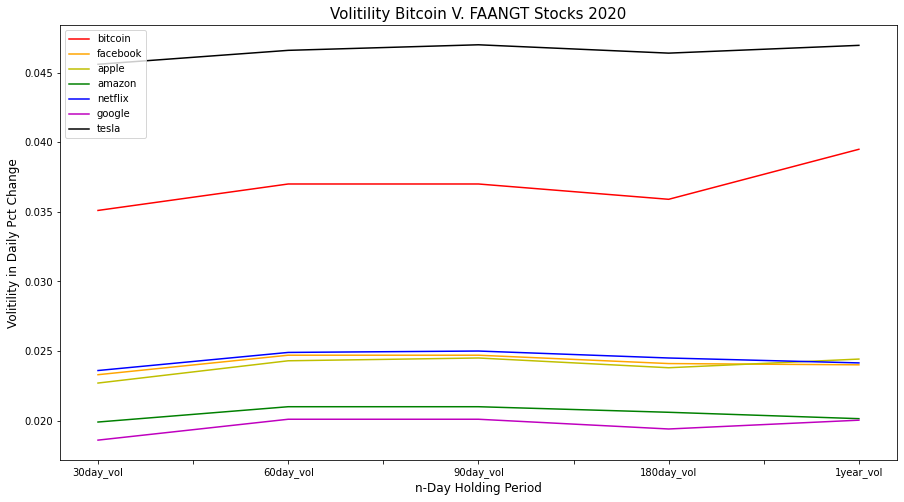

In [133]:
bitcoinvol.loc['30day_vol':'1year_vol',:][('2020-01-01','2020-12-31')].plot(label='bitcoin',color='r')
facebookvol.loc['30day_vol':'1year_vol',:][('2020-01-01','2020-12-31')].plot(label='facebook',color='orange')
applevol.loc['30day_vol':'1year_vol',:][('2020-01-01','2020-12-31')].plot(label='apple',color='y')
amazonvol.loc['30day_vol':'1year_vol',:][('2020-01-01','2020-12-31')].plot(label='amazon',color='g')
netflixvol.loc['30day_vol':'1year_vol',:][('2020-01-01','2020-12-31')].plot(label='netflix',color='b')
googlevol.loc['30day_vol':'1year_vol',:][('2020-01-01','2020-12-31')].plot(label='google',color='m')
teslavol.loc['30day_vol':'1year_vol',:][('2020-01-01','2020-12-31')].plot(label='tesla',color='k')
plt.title('Volitility Bitcoin V. FAANGT Stocks 2020',fontsize=15)
plt.ylabel('Volitility in Daily Pct Change',fontsize=12)
plt.xlabel('n-Day Holding Period',fontsize=12)
plt.legend(loc='upper left')
plt.show()

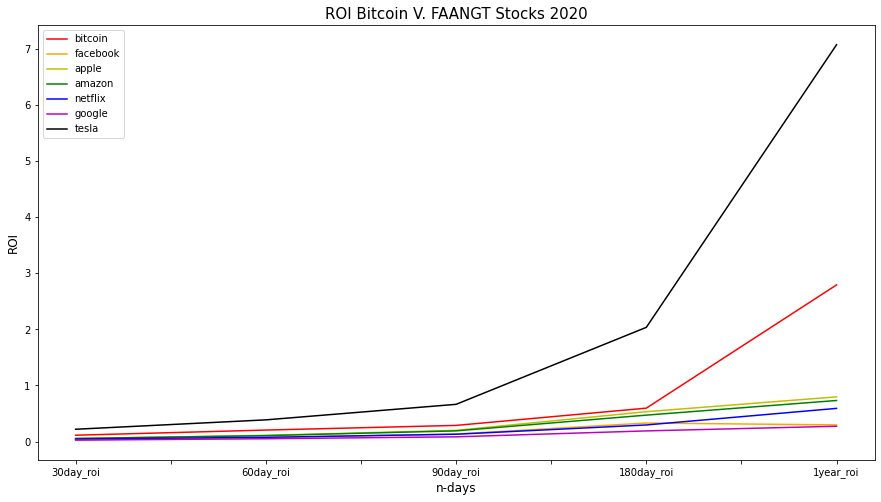

In [134]:
bitcoinroi.loc['30day_roi':'1year_roi',:][('2020-01-01','2020-12-31')].plot(label='bitcoin',color='r')
facebookroi.loc['30day_roi':'1year_roi',:][('2020-01-01','2020-12-31')].plot(label='facebook',color='orange')
appleroi.loc['30day_roi':'1year_roi',:][('2020-01-01','2020-12-31')].plot(label='apple',color='y')
amazonroi.loc['30day_roi':'1year_roi',:][('2020-01-01','2020-12-31')].plot(label='amazon',color='g')
netflixroi.loc['30day_roi':'1year_roi',:][('2020-01-01','2020-12-31')].plot(label='netflix',color='b')
googleroi.loc['30day_roi':'1year_roi',:][('2020-01-01','2020-12-31')].plot(label='google',color='m')
teslaroi.loc['30day_roi':'1year_roi',:][('2020-01-01','2020-12-31')].plot(label='tesla',color='k')
plt.title('ROI Bitcoin V. FAANGT Stocks 2020',fontsize=15)
plt.ylabel('ROI',fontsize=12)
plt.xlabel('n-days',fontsize=12)
plt.legend(loc='upper left')
plt.show()

#### 2016-2020

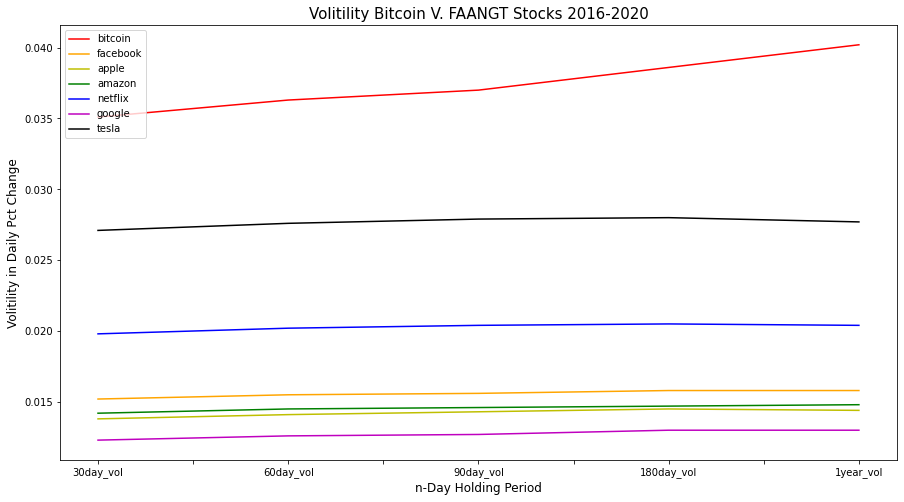

In [135]:
bitcoinvol.loc['30day_vol':'1year_vol',:][('2016-01-01','2020-12-31')].plot(label='bitcoin',color='r')
facebookvol.loc['30day_vol':'1year_vol',:][('2016-01-01','2020-12-31')].plot(label='facebook',color='orange')
applevol.loc['30day_vol':'1year_vol',:][('2016-01-01','2020-12-31')].plot(label='apple',color='y')
amazonvol.loc['30day_vol':'1year_vol',:][('2016-01-01','2020-12-31')].plot(label='amazon',color='g')
netflixvol.loc['30day_vol':'1year_vol',:][('2016-01-01','2020-12-31')].plot(label='netflix',color='b')
googlevol.loc['30day_vol':'1year_vol',:][('2016-01-01','2020-12-31')].plot(label='google',color='m')
teslavol.loc['30day_vol':'1year_vol',:][('2016-01-01','2020-12-31')].plot(label='tesla',color='k')
plt.title('Volitility Bitcoin V. FAANGT Stocks 2016-2020',fontsize=15)
plt.ylabel('Volitility in Daily Pct Change',fontsize=12)
plt.xlabel('n-Day Holding Period',fontsize=12)
plt.legend(loc='upper left')
plt.show()

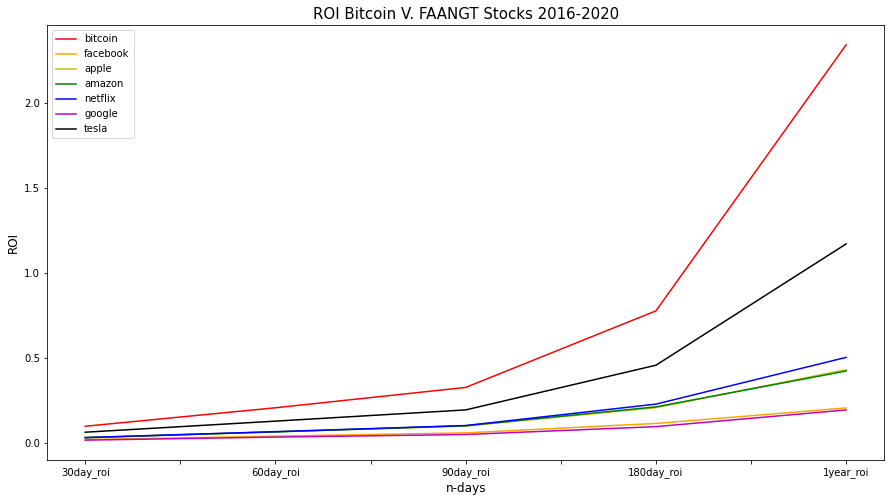

In [136]:
bitcoinroi.loc['30day_roi':'1year_roi',:][('2016-01-01','2020-12-31')].plot(label='bitcoin',color='r')
facebookroi.loc['30day_roi':'1year_roi',:][('2016-01-01','2020-12-31')].plot(label='facebook',color='orange')
appleroi.loc['30day_roi':'1year_roi',:][('2016-01-01','2020-12-31')].plot(label='apple',color='y')
amazonroi.loc['30day_roi':'1year_roi',:][('2016-01-01','2020-12-31')].plot(label='amazon',color='g')
netflixroi.loc['30day_roi':'1year_roi',:][('2016-01-01','2020-12-31')].plot(label='netflix',color='b')
googleroi.loc['30day_roi':'1year_roi',:][('2016-01-01','2020-12-31')].plot(label='google',color='m')
teslaroi.loc['30day_roi':'1year_roi',:][('2016-01-01','2020-12-31')].plot(label='tesla',color='k')
plt.title('ROI Bitcoin V. FAANGT Stocks 2016-2020',fontsize=15)
plt.ylabel('ROI',fontsize=12)
plt.xlabel('n-days',fontsize=12)
plt.legend(loc='upper left')
plt.show()

#### 2011-2020 (No Facebook)

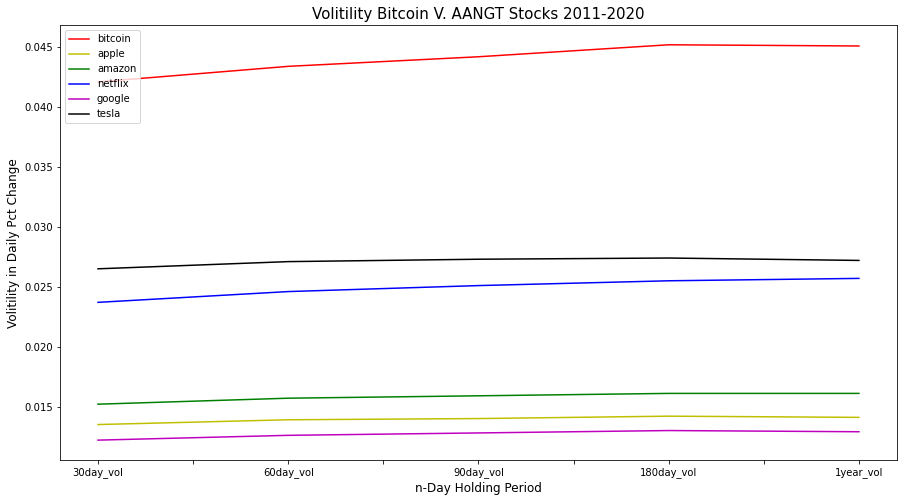

In [137]:
bitcoinvol.loc['30day_vol':'1year_vol',:][('2011-01-01','2020-12-31')].plot(label='bitcoin',color='r')
applevol.loc['30day_vol':'1year_vol',:][('2011-01-01','2020-12-31')].plot(label='apple',color='y')
amazonvol.loc['30day_vol':'1year_vol',:][('2011-01-01','2020-12-31')].plot(label='amazon',color='g')
netflixvol.loc['30day_vol':'1year_vol',:][('2011-01-01','2020-12-31')].plot(label='netflix',color='b')
googlevol.loc['30day_vol':'1year_vol',:][('2011-01-01','2020-12-31')].plot(label='google',color='m')
teslavol.loc['30day_vol':'1year_vol',:][('2011-01-01','2020-12-31')].plot(label='tesla',color='k')
plt.title('Volitility Bitcoin V. AANGT Stocks 2011-2020',fontsize=15)
plt.ylabel('Volitility in Daily Pct Change',fontsize=12)
plt.xlabel('n-Day Holding Period',fontsize=12)
plt.legend(loc='upper left')
plt.show()

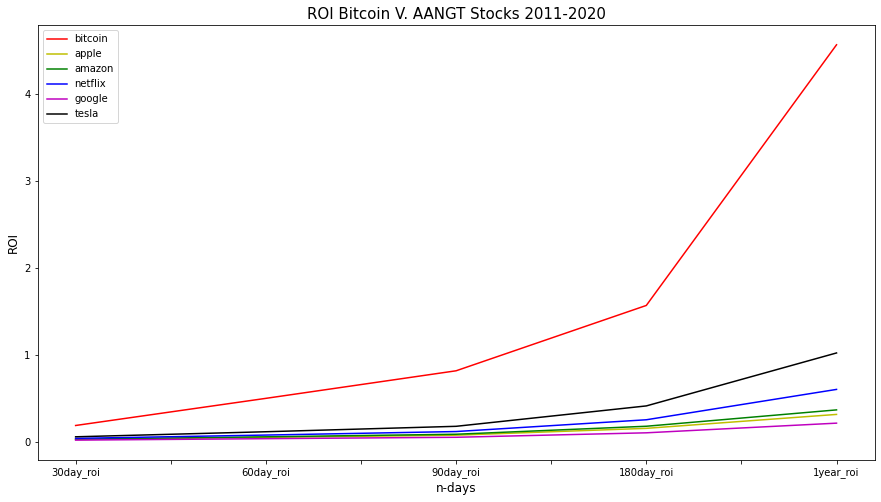

In [138]:
bitcoinroi.loc['30day_roi':'1year_roi',:][('2011-01-01','2020-12-31')].plot(label='bitcoin',color='r')
appleroi.loc['30day_roi':'1year_roi',:][('2011-01-01','2020-12-31')].plot(label='apple',color='y')
amazonroi.loc['30day_roi':'1year_roi',:][('2011-01-01','2020-12-31')].plot(label='amazon',color='g')
netflixroi.loc['30day_roi':'1year_roi',:][('2011-01-01','2020-12-31')].plot(label='netflix',color='b')
googleroi.loc['30day_roi':'1year_roi',:][('2011-01-01','2020-12-31')].plot(label='google',color='m')
teslaroi.loc['30day_roi':'1year_roi',:][('2011-01-01','2020-12-31')].plot(label='tesla',color='k')
plt.title('ROI Bitcoin V. AANGT Stocks 2011-2020',fontsize=15)
plt.ylabel('ROI',fontsize=12)
plt.xlabel('n-days',fontsize=12)
plt.legend(loc='upper left')
plt.show()

### Bitcoin V.  S&P 500

#### 2020 Volitility Bitcoin V. S&P

In [139]:
#2020 Volitility Bitcoin v S&P
bitcoinvol2020=dfbit.loc['2020-01-01':'2020-12-31'].Value.pct_change().std()
snp={'1year_vol':[bitcoinvol2020],'company':['bitcoin']}
snp_list=list(pd.read_csv('Data/S&P_List.csv').Ticker.values)
for company in snp_list:
    symbol=company
    data=yf.Ticker(symbol)
    df=data.history(period='1d',start='2020-1-1',end='2020-12-31')[['Close']]
    df.columns=['Close']
    df=timeseries_adjust(df)
    volitility=df.loc['2020-01-01':'2020-12-31'].Close.pct_change().std()
    snp['1year_vol'].append(volitility)
    snp['company'].append(symbol)
df=pd.DataFrame(snp)
test=df.sort_values(by='1year_vol',ascending=True).reset_index()
percentile=np.round((test.loc[test['company']=='bitcoin'].index[0]/test.company.count())*100,3)
print('In 2020, Bitcoin was in the '+str(percentile)+'th percentile for volitility in daily pct change '
     'when compared to the entire S&P 500')

In 2020, Bitcoin was in the 89.044th percentile for volitility in daily pct change when compared to the entire S&P 500


#### 2020 ROI Bitcoin V. S&P

In [140]:
#2020 ROI Bitcoin v S&P
bitcoinroi2020=dfbit.loc['2020-01-01':'2020-12-31'].Value.pct_change(365)[-1]
snp={'1year_roi':[bitcoinroi2020],'company':['bitcoin']}
snp_list=list(pd.read_csv('Data/S&P_List.csv').Ticker.values)
for company in snp_list:
    symbol=company
    data=yf.Ticker(symbol)
    df=data.history(period='1d',start='2020-1-1',end='2020-12-31')[['Close']]
    df.columns=['Close']
    df=timeseries_adjust(df)
    roi=df.loc['2020-01-01':'2020-12-31'].Close.pct_change().std()
    snp['1year_roi'].append(roi)
    snp['company'].append(symbol)
df=pd.DataFrame(snp)
test=df.sort_values(by='1year_roi',ascending=True).reset_index()
percentile=np.round((test.loc[test['company']=='bitcoin'].index[0]/test.company.count())*100,3)
print('In 2020, Bitcoin was in the '+str(percentile)+'th percentile for ROI '
     'when compared to the entire S&P 500')

In 2020, Bitcoin was in the 99.602th percentile for ROI when compared to the entire S&P 500


#### 2016-2020 Average Annual Volitility Bitcoin V. S&P

In [141]:
#2016-2020 Volitility Bitcoin v S&P
bitcoinvol1620=vol(dfbit,365,start='2016-01-01',end='2020-12-31')
snp={'1year_vol':[bitcoinvol1620],'company':['bitcoin']}
snp_list=list(pd.read_csv('Data/S&P_List.csv').Ticker.values)
for company in snp_list:
    symbol=company
    data=yf.Ticker(symbol)
    df=data.history(period='1d',start='2016-1-1',end='2020-12-31')[['Close']]
    df.columns=['Close']
    df=timeseries_adjust(df)
    volitility=vol(df,365,start='2016-01-01',end='2020-12-31')
    snp['1year_vol'].append(volitility)
    snp['company'].append(symbol)
df=pd.DataFrame(snp)
test=df.sort_values(by='1year_vol',ascending=True).reset_index()
percentile=np.round((test.loc[test['company']=='bitcoin'].index[0]/test.company.count())*100,3)
print('For 2016-2020, Bitcoin was in the '+str(percentile)+'th percentile for average annual volitility ' 
      'in daily pct change when compared to the entire S&P 500')

For 2016-2020, Bitcoin was in the 99.602th percentile for average annual volitility in daily pct change when compared to the entire S&P 500


#### 2016-2020 Average Annual ROI Bitcoin V. S&P

In [156]:
#2016-2020 ROI Bitcoin v S&P
bitcoinroi1620=roi(dfbit,365,start='2016-01-01',end='2020-12-31')
snp={'1year_roi':[bitcoinroi1620],'company':['bitcoin']}
snp_list=list(pd.read_csv('Data/S&P_List.csv').Ticker.values)
for company in snp_list:
    symbol=company
    data=yf.Ticker(symbol)
    df=data.history(period='1d',start='2016-1-1',end='2020-12-31')[['Close']]
    df.columns=['Close']
    df=timeseries_adjust(df)
    returns=roi(df,365,start='2016-01-01',end='2020-12-31')
    snp['1year_roi'].append(returns)
    snp['company'].append(symbol)
df=pd.DataFrame(snp)
test=df.sort_values(by='1year_roi',ascending=True).reset_index()
percentile=np.round((test.loc[test['company']=='bitcoin'].index[0]/test.company.count())*100,3)
print('For 2016-2020, Bitcoin was in the '+str(percentile)+'th percentile for average annual ROI '
     'when compared to the entire S&P 500')

For 2016-2020, Bitcoin was in the 99.801th percentile for average annual ROI when compared to the entire S&P 500


### Bitcoin V. U.S. Treasury Yield Curve Rates 

In [112]:
#Found at Quandl https://www.quandl.com/data/USTREASURY/YIELD-Treasury-Yield-Curve-Rates
key=''
api='https://www.quandl.com/api/v3/datasets/USTREASURY/YIELD.csv?api_key='+key
dftreasury=pd.read_csv(api).set_index('Date').iloc[::-1]
dftreasury=dftreasury.loc['2011-01-01':'2020-12-31']

The function below provides the same information as df_vol_concise, but tweaked specifically for US Treasury yields

In [113]:
def df_vol_concise_treasuries(df,asset=''):
    year_start=['2011-01-01','2012-01-01','2013-01-01','2014-01-01','2015-01-01','2016-01-01','2017-01-01','2018-01-01',
                '2019-01-01','2020-01-01']
    year_end=['2020-12-31']
    start_end=[]
    for start in year_start:
        for end in year_end:
            start_end.append((start,end))

    x={}
    for pair in start_end:
        x[pair]=[]
    intervals=[30,60,90,180,365,int(np.round(365*1.5)),int(np.round(365*2)),int(np.round(365*2.5)),
              int(np.round(365*3)),int(np.round(365*3.5)),int(np.round(365*4)),int(np.round(365*4.5)),
              int(np.round(365*5)),int(np.round(365*5.5)),int(np.round(365*6)),int(np.round(365*6.5)),
              int(np.round(365*7)),int(np.round(365*7.5)),int(np.round(365*8)),int(np.round(365*8.5)),
              int(np.round(365*9)),int(np.round(365*9.5)),int(np.round(365*10))]
    for startend in start_end:
        
        start=startend[0]
        end=startend[1]
        
        if (int(end[:4])-int(start[:4]))== 9:
            for interval in intervals[:]:
                x[startend].append(vol(df,interval,start,end))
        if (int(end[:4])-int(start[:4]))== 8:
            for interval in (intervals[:-2]):
                x[startend].append(vol(df,interval,start,end))
        if (int(end[:4])-int(start[:4]))== 7:
            for interval in (intervals[:-4]):
                x[startend].append(vol(df,interval,start,end))   
        if (int(end[:4])-int(start[:4]))== 6:
            for interval in (intervals[:-6]):
                x[startend].append(vol(df,interval,start,end))
        if (int(end[:4])-int(start[:4]))== 5:
            for interval in (intervals[:-8]):
                x[startend].append(vol(df,interval,start,end))
        if (int(end[:4])-int(start[:4]))== 4:
            for interval in (intervals[:-10]):
                x[startend].append(vol(df,interval,start,end))
        if (int(end[:4])-int(start[:4]))== 3:
            for interval in (intervals[:-12]):
                x[startend].append(vol(df,interval,start,end))
        if (int(end[:4])-int(start[:4]))== 2:
            for interval in (intervals[:-14]):
                x[startend].append(vol(df,interval,start,end))
        if (int(end[:4])-int(start[:4]))== 1:
            for interval in (intervals[:-16]):
                x[startend].append(vol(df,interval,start,end))
        if (int(end[:4])-int(start[:4]))== 0:
            for interval in (intervals[:-18]):
                x[startend].append(vol(df,interval,start,end))
    for key in x.keys():
        while len(x[key])<((len(intervals))):
            x[key].append(np.nan)
    
    interval_names=['30day','60day','90day','180day','1year','1.5year','2year','2.5year','3year','3.5year','4year',
                   '4.5year','5year','5.5year','6year','6.5year','7year','7.5year','8year','8.5year','9year','9.5year',
                   '10year']
    vol_roi=['vol']
    inter_vol=[]
    for i in interval_names:
        for j in vol_roi:
            inter_vol.append(i + '_' + j)
    
    df=pd.DataFrame(x,index=inter_vol)
    df['asset']=asset
    
    return df

#### 6 MO Volitility

In [114]:
df6month=timeseries_adjust(dftreasury[['6 MO']])
US6monthvol=df_vol_concise_treasuries(df6month,'US6mo')

In [165]:
US6monthvol

2011-01-01 2012-01-01 2013-01-01 2014-01-01 2015-01-01 2016-01-01  \
            2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31   
30day_vol       0.0704     0.0626     0.0640     0.0592     0.0503     0.0395   
60day_vol       0.0747     0.0669     0.0690     0.0636     0.0550     0.0447   
90day_vol       0.0782     0.0703     0.0727     0.0672     0.0589     0.0493   
180day_vol      0.0858     0.0778     0.0813     0.0746     0.0666     0.0597   
1year_vol       0.0888     0.0831     0.0842     0.0767     0.0680     0.0649   
1.5year_vol     0.0863     0.0826     0.0800     0.0716     0.0621     0.0606   
2year_vol       0.0865     0.0826     0.0782     0.0690     0.0603     0.0608   
2.5year_vol     0.0873     0.0827     0.0777     0.0681     0.0609     0.0640   
3year_vol       0.0888     0.0837     0.0780     0.0692     0.0638     0.0710   
3.5year_vol     0.0903     0.0850     0.0792     0.0718     0.0687     0.0845   
4year_vol       0.0921     0.0866     0.0816     0.0760     0.0767     0.1110   
4.5year_vol     0.0939     0.0886     0.0852     0.0819     0.0899     0.1315   
5year_vol       0.0948     0.0902     0.0884     0.0885     0.1103     0.1262   
5.5year_vol     0.0957     0.0921     0.0924     0.0977     0.1266        NaN   
6year_vol       0.0963     0.0937     0.0969     0.1130     0.1238        NaN   
6.5year_vol     0.0972     0.0960     0.1040     0.1256        NaN        NaN   
7year_vol       0.0979     0.0986     0.1161     0.1231        NaN        NaN   
7.5year_vol     0.0991     0.1031     0.1266        NaN        NaN        NaN   
8year_vol       0.1013     0.1123     0.1236        NaN        NaN        NaN   
8.5year_vol     0.1061     0.1203        NaN        NaN        NaN        NaN   
9year_vol       0.1160     0.1180        NaN        NaN        NaN        NaN   
9.5year_vol     0.1253        NaN        NaN        NaN        NaN        NaN   
10year_vol      0.1230        NaN        NaN        NaN        NaN        NaN   

            2017-01-01 2018-01-01 2019-01-01 2020-01-01  asset  
            2020-12-31 2020-12-31 2020-12-31 2020-12-31         
30day_vol       0.0412     0.0501     0.0728     0.1431  US6mo  
60day_vol       0.0482     0.0598     0.0885     0.1838  US6mo  
90day_vol       0.0535     0.0682     0.1033     0.2138  US6mo  
180day_vol      0.0682     0.0907     0.1465     0.2141  US6mo  
1year_vol       0.0781     0.1116     0.2156     0.2794  US6mo  
1.5year_vol     0.0760     0.1203     0.2261        NaN  US6mo  
2year_vol       0.0813     0.1527     0.1976        NaN  US6mo  
2.5year_vol     0.0945     0.1752        NaN        NaN  US6mo  
3year_vol       0.1256     0.1614        NaN        NaN  US6mo  
3.5year_vol     0.1482        NaN        NaN        NaN  US6mo  
4year_vol       0.1400        NaN        NaN        NaN  US6mo  
4.5year_vol        NaN        NaN        NaN        NaN  US6mo  
5year_vol          NaN        NaN        NaN        NaN  US6mo  
5.5year_vol        NaN        NaN        NaN        NaN  US6mo  
6year_vol          NaN        NaN        NaN        NaN  US6mo  
6.5year_vol        NaN        NaN        NaN        NaN  US6mo  
7year_vol          NaN        NaN        NaN        NaN  US6mo  
7.5year_vol        NaN        NaN        NaN        NaN  US6mo  
8year_vol          NaN        NaN        NaN        NaN  US6mo  
8.5year_vol        NaN        NaN        NaN        NaN  US6mo  
9year_vol          NaN        NaN        NaN        NaN  US6mo  
9.5year_vol        NaN        NaN        NaN        NaN  US6mo  
10year_vol         NaN        NaN        NaN        NaN  US6mo

#### 1 YR Volitility

In [115]:
df1year=timeseries_adjust(dftreasury[['1 YR']])
US1yearvol=df_vol_concise_treasuries(df1year,'US1y')

In [167]:
US1yearvol

2011-01-01 2012-01-01 2013-01-01 2014-01-01 2015-01-01 2016-01-01  \
            2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31   
30day_vol       0.0400     0.0369     0.0363     0.0338     0.0292     0.0250   
60day_vol       0.0406     0.0375     0.0371     0.0345     0.0296     0.0254   
90day_vol       0.0410     0.0379     0.0375     0.0349     0.0299     0.0259   
180day_vol      0.0416     0.0385     0.0381     0.0352     0.0300     0.0264   
1year_vol       0.0409     0.0383     0.0373     0.0337     0.0283     0.0248   
1.5year_vol     0.0401     0.0381     0.0362     0.0319     0.0264     0.0232   
2year_vol       0.0402     0.0382     0.0358     0.0310     0.0256     0.0229   
2.5year_vol     0.0407     0.0385     0.0355     0.0306     0.0255     0.0235   
3year_vol       0.0413     0.0389     0.0355     0.0307     0.0261     0.0250   
3.5year_vol     0.0420     0.0392     0.0358     0.0313     0.0272     0.0278   
4year_vol       0.0426     0.0397     0.0364     0.0323     0.0290     0.0329   
4.5year_vol     0.0431     0.0402     0.0372     0.0336     0.0315     0.0375   
5year_vol       0.0435     0.0407     0.0382     0.0354     0.0356     0.0387   
5.5year_vol     0.0438     0.0412     0.0393     0.0376     0.0394        NaN   
6year_vol       0.0440     0.0418     0.0406     0.0410     0.0413        NaN   
6.5year_vol     0.0441     0.0422     0.0419     0.0440        NaN        NaN   
7year_vol       0.0441     0.0425     0.0440     0.0449        NaN        NaN   
7.5year_vol     0.0441     0.0431     0.0461        NaN        NaN        NaN   
8year_vol       0.0442     0.0442     0.0462        NaN        NaN        NaN   
8.5year_vol     0.0449     0.0455        NaN        NaN        NaN        NaN   
9year_vol       0.0466     0.0458        NaN        NaN        NaN        NaN   
9.5year_vol     0.0486        NaN        NaN        NaN        NaN        NaN   
10year_vol      0.0487        NaN        NaN        NaN        NaN        NaN   

            2017-01-01 2018-01-01 2019-01-01 2020-01-01 asset  
            2020-12-31 2020-12-31 2020-12-31 2020-12-31        
30day_vol       0.0238     0.0278     0.0385     0.0679  US1y  
60day_vol       0.0248     0.0290     0.0412     0.0754  US1y  
90day_vol       0.0254     0.0302     0.0437     0.0781  US1y  
180day_vol      0.0264     0.0324     0.0496     0.0757  US1y  
1year_vol       0.0257     0.0336     0.0580     0.0781  US1y  
1.5year_vol     0.0248     0.0353     0.0601        NaN  US1y  
2year_vol       0.0257     0.0417     0.0560        NaN  US1y  
2.5year_vol     0.0287     0.0468        NaN        NaN  US1y  
3year_vol       0.0349     0.0459        NaN        NaN  US1y  
3.5year_vol     0.0400        NaN        NaN        NaN  US1y  
4year_vol       0.0404        NaN        NaN        NaN  US1y  
4.5year_vol        NaN        NaN        NaN        NaN  US1y  
5year_vol          NaN        NaN        NaN        NaN  US1y  
5.5year_vol        NaN        NaN        NaN        NaN  US1y  
6year_vol          NaN        NaN        NaN        NaN  US1y  
6.5year_vol        NaN        NaN        NaN        NaN  US1y  
7year_vol          NaN        NaN        NaN        NaN  US1y  
7.5year_vol        NaN        NaN        NaN        NaN  US1y  
8year_vol          NaN        NaN        NaN        NaN  US1y  
8.5year_vol        NaN        NaN        NaN        NaN  US1y  
9year_vol          NaN        NaN        NaN        NaN  US1y  
9.5year_vol        NaN        NaN        NaN        NaN  US1y  
10year_vol         NaN        NaN        NaN        NaN  US1y

#### 2 Year Volitility  

In [116]:
df2year=timeseries_adjust(dftreasury[['2 YR']])
US2yearvol=df_vol_concise_treasuries(df2year,'US2yr')

In [117]:
US2yearvol

2011-01-01 2012-01-01 2013-01-01 2014-01-01 2015-01-01 2016-01-01  \
            2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31   
30day_vol       0.0386     0.0367     0.0358     0.0337     0.0322     0.0303   
60day_vol       0.0389     0.0369     0.0359     0.0339     0.0322     0.0304   
90day_vol       0.0390     0.0369     0.0359     0.0339     0.0320     0.0302   
180day_vol      0.0389     0.0367     0.0355     0.0333     0.0313     0.0294   
1year_vol       0.0377     0.0357     0.0339     0.0318     0.0291     0.0269   
1.5year_vol     0.0368     0.0349     0.0328     0.0304     0.0275     0.0252   
2year_vol       0.0366     0.0345     0.0324     0.0296     0.0266     0.0247   
2.5year_vol     0.0366     0.0345     0.0321     0.0294     0.0264     0.0252   
3year_vol       0.0367     0.0346     0.0322     0.0293     0.0267     0.0264   
3.5year_vol     0.0370     0.0348     0.0324     0.0296     0.0276     0.0289   
4year_vol       0.0373     0.0350     0.0326     0.0302     0.0290     0.0332   
4.5year_vol     0.0375     0.0353     0.0330     0.0311     0.0311     0.0382   
5year_vol       0.0377     0.0355     0.0335     0.0323     0.0345     0.0414   
5.5year_vol     0.0379     0.0358     0.0341     0.0339     0.0386        NaN   
6year_vol       0.0380     0.0361     0.0350     0.0366     0.0417        NaN   
6.5year_vol     0.0381     0.0364     0.0361     0.0396        NaN        NaN   
7year_vol       0.0383     0.0371     0.0382     0.0421        NaN        NaN   
7.5year_vol     0.0386     0.0381     0.0411        NaN        NaN        NaN   
8year_vol       0.0391     0.0396     0.0431        NaN        NaN        NaN   
8.5year_vol     0.0399     0.0417        NaN        NaN        NaN        NaN   
9year_vol       0.0414     0.0434        NaN        NaN        NaN        NaN   
9.5year_vol     0.0436        NaN        NaN        NaN        NaN        NaN   
10year_vol      0.0450        NaN        NaN        NaN        NaN        NaN   

            2017-01-01 2018-01-01 2019-01-01 2020-01-01  asset  
            2020-12-31 2020-12-31 2020-12-31 2020-12-31         
30day_vol       0.0297     0.0348     0.0477     0.0789  US2yr  
60day_vol       0.0298     0.0353     0.0491     0.0841  US2yr  
90day_vol       0.0298     0.0356     0.0501     0.0846  US2yr  
180day_vol      0.0293     0.0359     0.0526     0.0820  US2yr  
1year_vol       0.0275     0.0354     0.0566     0.0815  US2yr  
1.5year_vol     0.0266     0.0367     0.0597        NaN  US2yr  
2year_vol       0.0273     0.0414     0.0594        NaN  US2yr  
2.5year_vol     0.0298     0.0468        NaN        NaN  US2yr  
3year_vol       0.0347     0.0489        NaN        NaN  US2yr  
3.5year_vol     0.0402        NaN        NaN        NaN  US2yr  
4year_vol       0.0431        NaN        NaN        NaN  US2yr  
4.5year_vol        NaN        NaN        NaN        NaN  US2yr  
5year_vol          NaN        NaN        NaN        NaN  US2yr  
5.5year_vol        NaN        NaN        NaN        NaN  US2yr  
6year_vol          NaN        NaN        NaN        NaN  US2yr  
6.5year_vol        NaN        NaN        NaN        NaN  US2yr  
7year_vol          NaN        NaN        NaN        NaN  US2yr  
7.5year_vol        NaN        NaN        NaN        NaN  US2yr  
8year_vol          NaN        NaN        NaN        NaN  US2yr  
8.5year_vol        NaN        NaN        NaN        NaN  US2yr  
9year_vol          NaN        NaN        NaN        NaN  US2yr  
9.5year_vol        NaN        NaN        NaN        NaN  US2yr  
10year_vol         NaN        NaN        NaN        NaN  US2yr

#### 3 Year Volitility

In [118]:
df3year=timeseries_adjust(dftreasury[['3 YR']])
US3yearvol=df_vol_concise_treasuries(df3year,'US3yr')

In [119]:
US3yearvol

2011-01-01 2012-01-01 2013-01-01 2014-01-01 2015-01-01 2016-01-01  \
            2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31   
30day_vol       0.0344     0.0328     0.0319     0.0308     0.0309     0.0301   
60day_vol       0.0349     0.0332     0.0324     0.0313     0.0313     0.0307   
90day_vol       0.0351     0.0333     0.0325     0.0314     0.0314     0.0309   
180day_vol      0.0351     0.0331     0.0323     0.0312     0.0309     0.0303   
1year_vol       0.0338     0.0320     0.0309     0.0300     0.0291     0.0278   
1.5year_vol     0.0328     0.0312     0.0298     0.0288     0.0276     0.0261   
2year_vol       0.0324     0.0307     0.0294     0.0282     0.0267     0.0256   
2.5year_vol     0.0323     0.0305     0.0294     0.0281     0.0265     0.0261   
3year_vol       0.0323     0.0307     0.0294     0.0280     0.0268     0.0275   
3.5year_vol     0.0324     0.0309     0.0296     0.0283     0.0277     0.0301   
4year_vol       0.0326     0.0311     0.0298     0.0287     0.0290     0.0346   
4.5year_vol     0.0327     0.0312     0.0299     0.0294     0.0312     0.0397   
5year_vol       0.0328     0.0312     0.0302     0.0304     0.0347     0.0412   
5.5year_vol     0.0329     0.0313     0.0306     0.0319     0.0387        NaN   
6year_vol       0.0329     0.0315     0.0314     0.0347     0.0404        NaN   
6.5year_vol     0.0330     0.0318     0.0326     0.0379        NaN        NaN   
7year_vol       0.0332     0.0325     0.0350     0.0392        NaN        NaN   
7.5year_vol     0.0337     0.0337     0.0382        NaN        NaN        NaN   
8year_vol       0.0343     0.0357     0.0394        NaN        NaN        NaN   
8.5year_vol     0.0354     0.0382        NaN        NaN        NaN        NaN   
9year_vol       0.0374     0.0395        NaN        NaN        NaN        NaN   
9.5year_vol     0.0399        NaN        NaN        NaN        NaN        NaN   
10year_vol      0.0408        NaN        NaN        NaN        NaN        NaN   

            2017-01-01 2018-01-01 2019-01-01 2020-01-01  asset  
            2020-12-31 2020-12-31 2020-12-31 2020-12-31         
30day_vol       0.0296     0.0345     0.0472     0.0769  US3yr  
60day_vol       0.0304     0.0359     0.0498     0.0845  US3yr  
90day_vol       0.0306     0.0366     0.0514     0.0859  US3yr  
180day_vol      0.0305     0.0373     0.0549     0.0836  US3yr  
1year_vol       0.0288     0.0372     0.0597     0.0811  US3yr  
1.5year_vol     0.0279     0.0385     0.0624        NaN  US3yr  
2year_vol       0.0286     0.0436     0.0593        NaN  US3yr  
2.5year_vol     0.0313     0.0488        NaN        NaN  US3yr  
3year_vol       0.0365     0.0487        NaN        NaN  US3yr  
3.5year_vol     0.0419        NaN        NaN        NaN  US3yr  
4year_vol       0.0430        NaN        NaN        NaN  US3yr  
4.5year_vol        NaN        NaN        NaN        NaN  US3yr  
5year_vol          NaN        NaN        NaN        NaN  US3yr  
5.5year_vol        NaN        NaN        NaN        NaN  US3yr  
6year_vol          NaN        NaN        NaN        NaN  US3yr  
6.5year_vol        NaN        NaN        NaN        NaN  US3yr  
7year_vol          NaN        NaN        NaN        NaN  US3yr  
7.5year_vol        NaN        NaN        NaN        NaN  US3yr  
8year_vol          NaN        NaN        NaN        NaN  US3yr  
8.5year_vol        NaN        NaN        NaN        NaN  US3yr  
9year_vol          NaN        NaN        NaN        NaN  US3yr  
9.5year_vol        NaN        NaN        NaN        NaN  US3yr  
10year_vol         NaN        NaN        NaN        NaN  US3yr

#### 5 Year Volitility

In [120]:
df5year=timeseries_adjust(dftreasury[['5 YR']])
US5yearvol=df_vol_concise_treasuries(df5year,'US5yr')

In [121]:
US5yearvol

2011-01-01 2012-01-01 2013-01-01 2014-01-01 2015-01-01 2016-01-01  \
            2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31   
30day_vol       0.0286     0.0279     0.0269     0.0266     0.0276     0.0276   
60day_vol       0.0289     0.0282     0.0273     0.0270     0.0279     0.0280   
90day_vol       0.0291     0.0283     0.0274     0.0271     0.0279     0.0282   
180day_vol      0.0293     0.0282     0.0274     0.0272     0.0278     0.0281   
1year_vol       0.0284     0.0271     0.0263     0.0264     0.0265     0.0262   
1.5year_vol     0.0275     0.0263     0.0253     0.0254     0.0252     0.0247   
2year_vol       0.0270     0.0257     0.0250     0.0249     0.0244     0.0242   
2.5year_vol     0.0267     0.0255     0.0249     0.0247     0.0242     0.0246   
3year_vol       0.0266     0.0256     0.0250     0.0246     0.0244     0.0258   
3.5year_vol     0.0266     0.0257     0.0251     0.0248     0.0251     0.0281   
4year_vol       0.0267     0.0258     0.0252     0.0251     0.0263     0.0322   
4.5year_vol     0.0268     0.0259     0.0253     0.0256     0.0282     0.0363   
5year_vol       0.0268     0.0259     0.0254     0.0265     0.0314     0.0371   
5.5year_vol     0.0268     0.0259     0.0258     0.0279     0.0348        NaN   
6year_vol       0.0269     0.0261     0.0264     0.0306     0.0357        NaN   
6.5year_vol     0.0270     0.0264     0.0276     0.0333        NaN        NaN   
7year_vol       0.0273     0.0271     0.0300     0.0340        NaN        NaN   
7.5year_vol     0.0278     0.0284     0.0328        NaN        NaN        NaN   
8year_vol       0.0285     0.0305     0.0337        NaN        NaN        NaN   
8.5year_vol     0.0296     0.0330        NaN        NaN        NaN        NaN   
9year_vol       0.0315     0.0339        NaN        NaN        NaN        NaN   
9.5year_vol     0.0336        NaN        NaN        NaN        NaN        NaN   
10year_vol      0.0341        NaN        NaN        NaN        NaN        NaN   

            2017-01-01 2018-01-01 2019-01-01 2020-01-01  asset  
            2020-12-31 2020-12-31 2020-12-31 2020-12-31         
30day_vol       0.0278     0.0323     0.0436     0.0689  US5yr  
60day_vol       0.0283     0.0332     0.0454     0.0747  US5yr  
90day_vol       0.0286     0.0339     0.0470     0.0757  US5yr  
180day_vol      0.0290     0.0351     0.0509     0.0736  US5yr  
1year_vol       0.0276     0.0353     0.0560     0.0728  US5yr  
1.5year_vol     0.0268     0.0366     0.0575        NaN  US5yr  
2year_vol       0.0275     0.0410     0.0536        NaN  US5yr  
2.5year_vol     0.0298     0.0451        NaN        NaN  US5yr  
3year_vol       0.0345     0.0442        NaN        NaN  US5yr  
3.5year_vol     0.0388        NaN        NaN        NaN  US5yr  
4year_vol       0.0390        NaN        NaN        NaN  US5yr  
4.5year_vol        NaN        NaN        NaN        NaN  US5yr  
5year_vol          NaN        NaN        NaN        NaN  US5yr  
5.5year_vol        NaN        NaN        NaN        NaN  US5yr  
6year_vol          NaN        NaN        NaN        NaN  US5yr  
6.5year_vol        NaN        NaN        NaN        NaN  US5yr  
7year_vol          NaN        NaN        NaN        NaN  US5yr  
7.5year_vol        NaN        NaN        NaN        NaN  US5yr  
8year_vol          NaN        NaN        NaN        NaN  US5yr  
8.5year_vol        NaN        NaN        NaN        NaN  US5yr  
9year_vol          NaN        NaN        NaN        NaN  US5yr  
9.5year_vol        NaN        NaN        NaN        NaN  US5yr  
10year_vol         NaN        NaN        NaN        NaN  US5yr

##### 7 Year Volitility

In [122]:
df7year=timeseries_adjust(dftreasury[['7 YR']])
US7yearvol=df_vol_concise_treasuries(df7year,'US7yr')

In [123]:
US7yearvol

2011-01-01 2012-01-01 2013-01-01 2014-01-01 2015-01-01 2016-01-01  \
            2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31   
30day_vol       0.0237     0.0234     0.0227     0.0225     0.0236     0.0236   
60day_vol       0.0240     0.0237     0.0230     0.0229     0.0239     0.0240   
90day_vol       0.0241     0.0237     0.0231     0.0230     0.0240     0.0240   
180day_vol      0.0244     0.0238     0.0232     0.0233     0.0241     0.0242   
1year_vol       0.0239     0.0231     0.0225     0.0229     0.0232     0.0230   
1.5year_vol     0.0232     0.0223     0.0218     0.0221     0.0221     0.0217   
2year_vol       0.0228     0.0219     0.0216     0.0217     0.0214     0.0213   
2.5year_vol     0.0226     0.0218     0.0215     0.0215     0.0212     0.0215   
3year_vol       0.0225     0.0218     0.0215     0.0214     0.0213     0.0224   
3.5year_vol     0.0225     0.0219     0.0216     0.0215     0.0218     0.0243   
4year_vol       0.0225     0.0220     0.0216     0.0217     0.0227     0.0274   
4.5year_vol     0.0226     0.0221     0.0217     0.0222     0.0242     0.0301   
5year_vol       0.0226     0.0220     0.0218     0.0228     0.0267     0.0304   
5.5year_vol     0.0226     0.0220     0.0220     0.0239     0.0290        NaN   
6year_vol       0.0226     0.0221     0.0225     0.0260     0.0295        NaN   
6.5year_vol     0.0227     0.0223     0.0234     0.0278        NaN        NaN   
7year_vol       0.0228     0.0229     0.0253     0.0280        NaN        NaN   
7.5year_vol     0.0232     0.0239     0.0272        NaN        NaN        NaN   
8year_vol       0.0238     0.0255     0.0276        NaN        NaN        NaN   
8.5year_vol     0.0247     0.0273        NaN        NaN        NaN        NaN   
9year_vol       0.0262     0.0278        NaN        NaN        NaN        NaN   
9.5year_vol     0.0276        NaN        NaN        NaN        NaN        NaN   
10year_vol      0.0278        NaN        NaN        NaN        NaN        NaN   

            2017-01-01 2018-01-01 2019-01-01 2020-01-01  asset  
            2020-12-31 2020-12-31 2020-12-31 2020-12-31         
30day_vol       0.0236     0.0271     0.0356     0.0532  US7yr  
60day_vol       0.0242     0.0279     0.0372     0.0577  US7yr  
90day_vol       0.0243     0.0284     0.0383     0.0578  US7yr  
180day_vol      0.0248     0.0298     0.0420     0.0561  US7yr  
1year_vol       0.0242     0.0305     0.0467     0.0578  US7yr  
1.5year_vol     0.0235     0.0313     0.0468        NaN  US7yr  
2year_vol       0.0240     0.0346     0.0433        NaN  US7yr  
2.5year_vol     0.0257     0.0370        NaN        NaN  US7yr  
3year_vol       0.0292     0.0359        NaN        NaN  US7yr  
3.5year_vol     0.0320        NaN        NaN        NaN  US7yr  
4year_vol       0.0318        NaN        NaN        NaN  US7yr  
4.5year_vol        NaN        NaN        NaN        NaN  US7yr  
5year_vol          NaN        NaN        NaN        NaN  US7yr  
5.5year_vol        NaN        NaN        NaN        NaN  US7yr  
6year_vol          NaN        NaN        NaN        NaN  US7yr  
6.5year_vol        NaN        NaN        NaN        NaN  US7yr  
7year_vol          NaN        NaN        NaN        NaN  US7yr  
7.5year_vol        NaN        NaN        NaN        NaN  US7yr  
8year_vol          NaN        NaN        NaN        NaN  US7yr  
8.5year_vol        NaN        NaN        NaN        NaN  US7yr  
9year_vol          NaN        NaN        NaN        NaN  US7yr  
9.5year_vol        NaN        NaN        NaN        NaN  US7yr  
10year_vol         NaN        NaN        NaN        NaN  US7yr

#### 10 Year Volitility

In [124]:
df10year=timeseries_adjust(dftreasury[['10 YR']])
US10yearvol=df_vol_concise_treasuries(df10year,'US10yr')

In [125]:
US10yearvol

2011-01-01 2012-01-01 2013-01-01 2014-01-01 2015-01-01 2016-01-01  \
            2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31   
30day_vol       0.0200     0.0199     0.0198     0.0202     0.0215     0.0216   
60day_vol       0.0203     0.0202     0.0201     0.0207     0.0218     0.0221   
90day_vol       0.0204     0.0203     0.0203     0.0208     0.0219     0.0223   
180day_vol      0.0208     0.0205     0.0206     0.0213     0.0223     0.0228   
1year_vol       0.0204     0.0200     0.0201     0.0211     0.0216     0.0219   
1.5year_vol     0.0196     0.0193     0.0195     0.0202     0.0205     0.0206   
2year_vol       0.0193     0.0189     0.0193     0.0198     0.0199     0.0203   
2.5year_vol     0.0191     0.0189     0.0192     0.0196     0.0197     0.0205   
3year_vol       0.0190     0.0190     0.0192     0.0196     0.0198     0.0215   
3.5year_vol     0.0191     0.0191     0.0193     0.0196     0.0203     0.0233   
4year_vol       0.0191     0.0191     0.0193     0.0198     0.0212     0.0267   
4.5year_vol     0.0192     0.0192     0.0194     0.0203     0.0228     0.0293   
5year_vol       0.0192     0.0192     0.0195     0.0210     0.0256     0.0292   
5.5year_vol     0.0192     0.0192     0.0198     0.0223     0.0278        NaN   
6year_vol       0.0192     0.0192     0.0203     0.0245     0.0280        NaN   
6.5year_vol     0.0192     0.0195     0.0214     0.0264        NaN        NaN   
7year_vol       0.0194     0.0200     0.0234     0.0264        NaN        NaN   
7.5year_vol     0.0197     0.0211     0.0253        NaN        NaN        NaN   
8year_vol       0.0203     0.0230     0.0254        NaN        NaN        NaN   
8.5year_vol     0.0213     0.0247        NaN        NaN        NaN        NaN   
9year_vol       0.0230     0.0250        NaN        NaN        NaN        NaN   
9.5year_vol     0.0246        NaN        NaN        NaN        NaN        NaN   
10year_vol      0.0247        NaN        NaN        NaN        NaN        NaN   

            2017-01-01 2018-01-01 2019-01-01 2020-01-01   asset  
            2020-12-31 2020-12-31 2020-12-31 2020-12-31          
30day_vol       0.0221     0.0254     0.0335     0.0506  US10yr  
60day_vol       0.0227     0.0264     0.0352     0.0555  US10yr  
90day_vol       0.0230     0.0270     0.0366     0.0552  US10yr  
180day_vol      0.0238     0.0287     0.0408     0.0538  US10yr  
1year_vol       0.0236     0.0298     0.0468     0.0570  US10yr  
1.5year_vol     0.0228     0.0307     0.0465        NaN  US10yr  
2year_vol       0.0233     0.0344     0.0424        NaN  US10yr  
2.5year_vol     0.0252     0.0366        NaN        NaN  US10yr  
3year_vol       0.0289     0.0351        NaN        NaN  US10yr  
3.5year_vol     0.0316        NaN        NaN        NaN  US10yr  
4year_vol       0.0310        NaN        NaN        NaN  US10yr  
4.5year_vol        NaN        NaN        NaN        NaN  US10yr  
5year_vol          NaN        NaN        NaN        NaN  US10yr  
5.5year_vol        NaN        NaN        NaN        NaN  US10yr  
6year_vol          NaN        NaN        NaN        NaN  US10yr  
6.5year_vol        NaN        NaN        NaN        NaN  US10yr  
7year_vol          NaN        NaN        NaN        NaN  US10yr  
7.5year_vol        NaN        NaN        NaN        NaN  US10yr  
8year_vol          NaN        NaN        NaN        NaN  US10yr  
8.5year_vol        NaN        NaN        NaN        NaN  US10yr  
9year_vol          NaN        NaN        NaN        NaN  US10yr  
9.5year_vol        NaN        NaN        NaN        NaN  US10yr  
10year_vol         NaN        NaN        NaN        NaN  US10yr

#### 20 Year Volitility

In [126]:
df20year=timeseries_adjust(dftreasury[['20 YR']])
US20yearvol=df_vol_concise_treasuries(df20year,'US20yr')

In [127]:
US20yearvol

2011-01-01 2012-01-01 2013-01-01 2014-01-01 2015-01-01 2016-01-01  \
            2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31   
30day_vol       0.0161     0.0161     0.0161     0.0166     0.0176     0.0175   
60day_vol       0.0164     0.0163     0.0164     0.0170     0.0180     0.0180   
90day_vol       0.0166     0.0164     0.0165     0.0172     0.0181     0.0182   
180day_vol      0.0169     0.0167     0.0168     0.0176     0.0184     0.0187   
1year_vol       0.0167     0.0164     0.0166     0.0176     0.0180     0.0182   
1.5year_vol     0.0161     0.0158     0.0162     0.0169     0.0171     0.0172   
2year_vol       0.0158     0.0156     0.0161     0.0166     0.0166     0.0169   
2.5year_vol     0.0157     0.0156     0.0160     0.0164     0.0164     0.0170   
3year_vol       0.0156     0.0157     0.0160     0.0163     0.0165     0.0177   
3.5year_vol     0.0157     0.0158     0.0161     0.0164     0.0169     0.0190   
4year_vol       0.0158     0.0158     0.0161     0.0165     0.0175     0.0214   
4.5year_vol     0.0158     0.0159     0.0161     0.0169     0.0187     0.0232   
5year_vol       0.0158     0.0159     0.0162     0.0174     0.0207     0.0230   
5.5year_vol     0.0158     0.0158     0.0164     0.0183     0.0223        NaN   
6year_vol       0.0158     0.0159     0.0168     0.0200     0.0223        NaN   
6.5year_vol     0.0158     0.0160     0.0175     0.0212        NaN        NaN   
7year_vol       0.0159     0.0163     0.0190     0.0210        NaN        NaN   
7.5year_vol     0.0161     0.0171     0.0202        NaN        NaN        NaN   
8year_vol       0.0165     0.0185     0.0202        NaN        NaN        NaN   
8.5year_vol     0.0173     0.0197        NaN        NaN        NaN        NaN   
9year_vol       0.0186     0.0198        NaN        NaN        NaN        NaN   
9.5year_vol     0.0197        NaN        NaN        NaN        NaN        NaN   
10year_vol      0.0196        NaN        NaN        NaN        NaN        NaN   

            2017-01-01 2018-01-01 2019-01-01 2020-01-01   asset  
            2020-12-31 2020-12-31 2020-12-31 2020-12-31          
30day_vol       0.0179     0.0203     0.0259     0.0379  US20yr  
60day_vol       0.0184     0.0211     0.0274     0.0415  US20yr  
90day_vol       0.0187     0.0216     0.0285     0.0414  US20yr  
180day_vol      0.0195     0.0231     0.0321     0.0404  US20yr  
1year_vol       0.0195     0.0241     0.0369     0.0437  US20yr  
1.5year_vol     0.0188     0.0247     0.0363        NaN  US20yr  
2year_vol       0.0191     0.0273     0.0328        NaN  US20yr  
2.5year_vol     0.0204     0.0287        NaN        NaN  US20yr  
3year_vol       0.0232     0.0273        NaN        NaN  US20yr  
3.5year_vol     0.0249        NaN        NaN        NaN  US20yr  
4year_vol       0.0243        NaN        NaN        NaN  US20yr  
4.5year_vol        NaN        NaN        NaN        NaN  US20yr  
5year_vol          NaN        NaN        NaN        NaN  US20yr  
5.5year_vol        NaN        NaN        NaN        NaN  US20yr  
6year_vol          NaN        NaN        NaN        NaN  US20yr  
6.5year_vol        NaN        NaN        NaN        NaN  US20yr  
7year_vol          NaN        NaN        NaN        NaN  US20yr  
7.5year_vol        NaN        NaN        NaN        NaN  US20yr  
8year_vol          NaN        NaN        NaN        NaN  US20yr  
8.5year_vol        NaN        NaN        NaN        NaN  US20yr  
9year_vol          NaN        NaN        NaN        NaN  US20yr  
9.5year_vol        NaN        NaN        NaN        NaN  US20yr  
10year_vol         NaN        NaN        NaN        NaN  US20yr

#### 30 Year Volitility

In [128]:
df30year=timeseries_adjust(dftreasury[['30 YR']])
US30yearvol=df_vol_concise_treasuries(df30year,'US30yr')

In [129]:
US30yearvol

2011-01-01 2012-01-01 2013-01-01 2014-01-01 2015-01-01 2016-01-01  \
            2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31 2020-12-31   
30day_vol       0.0143     0.0141     0.0142     0.0147     0.0155     0.0155   
60day_vol       0.0145     0.0144     0.0145     0.0150     0.0158     0.0159   
90day_vol       0.0147     0.0145     0.0146     0.0152     0.0160     0.0161   
180day_vol      0.0150     0.0147     0.0149     0.0156     0.0163     0.0166   
1year_vol       0.0148     0.0144     0.0147     0.0156     0.0159     0.0162   
1.5year_vol     0.0143     0.0140     0.0143     0.0150     0.0152     0.0154   
2year_vol       0.0140     0.0138     0.0142     0.0147     0.0147     0.0151   
2.5year_vol     0.0138     0.0137     0.0142     0.0145     0.0146     0.0152   
3year_vol       0.0138     0.0138     0.0141     0.0144     0.0146     0.0158   
3.5year_vol     0.0138     0.0139     0.0141     0.0144     0.0149     0.0169   
4year_vol       0.0139     0.0139     0.0142     0.0146     0.0155     0.0190   
4.5year_vol     0.0139     0.0139     0.0142     0.0149     0.0165     0.0204   
5year_vol       0.0139     0.0139     0.0143     0.0153     0.0183     0.0202   
5.5year_vol     0.0139     0.0139     0.0145     0.0162     0.0195        NaN   
6year_vol       0.0139     0.0140     0.0148     0.0176     0.0196        NaN   
6.5year_vol     0.0139     0.0141     0.0154     0.0186        NaN        NaN   
7year_vol       0.0140     0.0144     0.0167     0.0185        NaN        NaN   
7.5year_vol     0.0142     0.0151     0.0178        NaN        NaN        NaN   
8year_vol       0.0146     0.0163     0.0177        NaN        NaN        NaN   
8.5year_vol     0.0153     0.0173        NaN        NaN        NaN        NaN   
9year_vol       0.0164     0.0173        NaN        NaN        NaN        NaN   
9.5year_vol     0.0174        NaN        NaN        NaN        NaN        NaN   
10year_vol      0.0173        NaN        NaN        NaN        NaN        NaN   

            2017-01-01 2018-01-01 2019-01-01 2020-01-01   asset  
            2020-12-31 2020-12-31 2020-12-31 2020-12-31          
30day_vol       0.0159     0.0180     0.0228     0.0327  US30yr  
60day_vol       0.0164     0.0187     0.0242     0.0359  US30yr  
90day_vol       0.0167     0.0192     0.0252     0.0356  US30yr  
180day_vol      0.0174     0.0205     0.0284     0.0347  US30yr  
1year_vol       0.0175     0.0215     0.0326     0.0381  US30yr  
1.5year_vol     0.0170     0.0220     0.0318        NaN  US30yr  
2year_vol       0.0172     0.0242     0.0288        NaN  US30yr  
2.5year_vol     0.0183     0.0253        NaN        NaN  US30yr  
3year_vol       0.0206     0.0240        NaN        NaN  US30yr  
3.5year_vol     0.0220        NaN        NaN        NaN  US30yr  
4year_vol       0.0214        NaN        NaN        NaN  US30yr  
4.5year_vol        NaN        NaN        NaN        NaN  US30yr  
5year_vol          NaN        NaN        NaN        NaN  US30yr  
5.5year_vol        NaN        NaN        NaN        NaN  US30yr  
6year_vol          NaN        NaN        NaN        NaN  US30yr  
6.5year_vol        NaN        NaN        NaN        NaN  US30yr  
7year_vol          NaN        NaN        NaN        NaN  US30yr  
7.5year_vol        NaN        NaN        NaN        NaN  US30yr  
8year_vol          NaN        NaN        NaN        NaN  US30yr  
8.5year_vol        NaN        NaN        NaN        NaN  US30yr  
9year_vol          NaN        NaN        NaN        NaN  US30yr  
9.5year_vol        NaN        NaN        NaN        NaN  US30yr  
10year_vol         NaN        NaN        NaN        NaN  US30yr

### Bitcoin V. US Treasuries Volitility Charts 

#### 2020

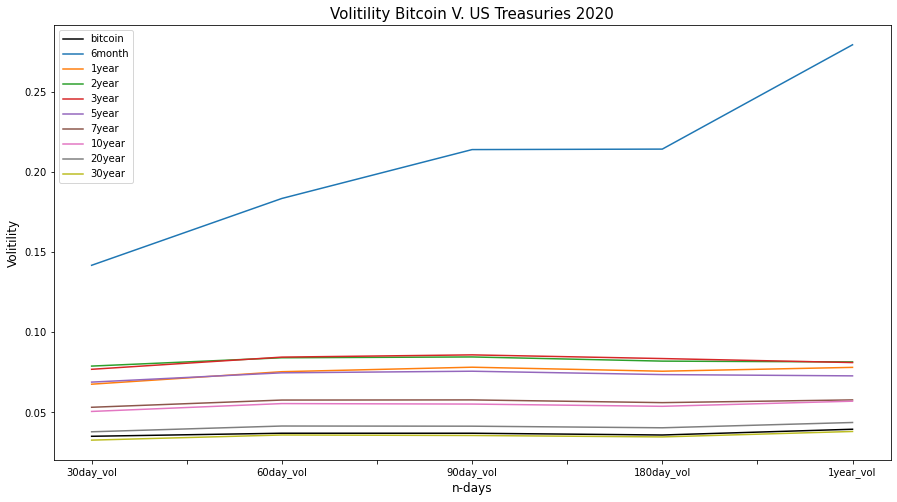

In [133]:
bitcoinvol.loc['30day_vol':'1year_vol',:][('2020-01-01','2020-12-31')].plot(label='bitcoin',color='k')
US6monthvol.loc['30day_vol':'1year_vol',:][('2020-01-01','2020-12-31')].plot(label='6month')
US1yearvol.loc['30day_vol':'1year_vol',:][('2020-01-01','2020-12-31')].plot(label='1year')
US2yearvol.loc['30day_vol':'1year_vol',:][('2020-01-01','2020-12-31')].plot(label='2year')
US3yearvol.loc['30day_vol':'1year_vol',:][('2020-01-01','2020-12-31')].plot(label='3year')
US5yearvol.loc['30day_vol':'1year_vol',:][('2020-01-01','2020-12-31')].plot(label='5year')
US7yearvol.loc['30day_vol':'1year_vol',:][('2020-01-01','2020-12-31')].plot(label='7year')
US10yearvol.loc['30day_vol':'1year_vol',:][('2020-01-01','2020-12-31')].plot(label='10year')
US20yearvol.loc['30day_vol':'1year_vol',:][('2020-01-01','2020-12-31')].plot(label='20year')
US30yearvol.loc['30day_vol':'1year_vol',:][('2020-01-01','2020-12-31')].plot(label='30year')
plt.title('Volitility Bitcoin V. US Treasuries 2020',fontsize=15)
plt.ylabel('Volitility',fontsize=12)
plt.xlabel('n-days',fontsize=12)
plt.legend(loc='upper left')
plt.show()

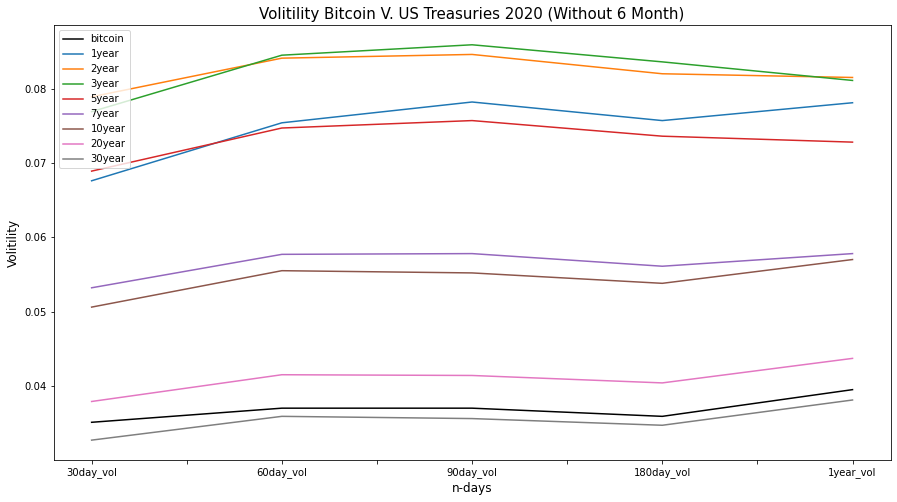

In [134]:
bitcoinvol.loc['30day_vol':'1year_vol',:][('2020-01-01','2020-12-31')].plot(label='bitcoin',color='k')
US1yearvol.loc['30day_vol':'1year_vol',:][('2020-01-01','2020-12-31')].plot(label='1year')
US2yearvol.loc['30day_vol':'1year_vol',:][('2020-01-01','2020-12-31')].plot(label='2year')
US3yearvol.loc['30day_vol':'1year_vol',:][('2020-01-01','2020-12-31')].plot(label='3year')
US5yearvol.loc['30day_vol':'1year_vol',:][('2020-01-01','2020-12-31')].plot(label='5year')
US7yearvol.loc['30day_vol':'1year_vol',:][('2020-01-01','2020-12-31')].plot(label='7year')
US10yearvol.loc['30day_vol':'1year_vol',:][('2020-01-01','2020-12-31')].plot(label='10year')
US20yearvol.loc['30day_vol':'1year_vol',:][('2020-01-01','2020-12-31')].plot(label='20year')
US30yearvol.loc['30day_vol':'1year_vol',:][('2020-01-01','2020-12-31')].plot(label='30year')
plt.title('Volitility Bitcoin V. US Treasuries 2020 (Without 6 Month)',fontsize=15)
plt.ylabel('Volitility',fontsize=12)
plt.xlabel('n-days',fontsize=12)
plt.legend(loc='upper left')
plt.show()

#### 2016-2020 

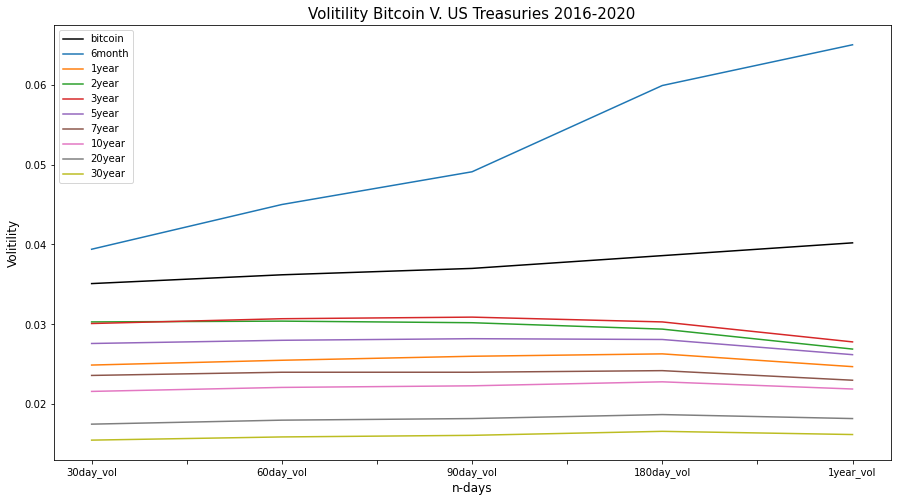

In [135]:
bitcoinvol.loc['30day_vol':'1year_vol',:][('2016-01-01','2020-12-31')].plot(label='bitcoin',color='k')
US6monthvol.loc['30day_vol':'1year_vol',:][('2016-01-01','2020-12-31')].plot(label='6month')
US1yearvol.loc['30day_vol':'1year_vol',:][('2016-01-01','2020-12-31')].plot(label='1year')
US2yearvol.loc['30day_vol':'1year_vol',:][('2016-01-01','2020-12-31')].plot(label='2year')
US3yearvol.loc['30day_vol':'1year_vol',:][('2016-01-01','2020-12-31')].plot(label='3year')
US5yearvol.loc['30day_vol':'1year_vol',:][('2016-01-01','2020-12-31')].plot(label='5year')
US7yearvol.loc['30day_vol':'1year_vol',:][('2016-01-01','2020-12-31')].plot(label='7year')
US10yearvol.loc['30day_vol':'1year_vol',:][('2016-01-01','2020-12-31')].plot(label='10year')
US20yearvol.loc['30day_vol':'1year_vol',:][('2016-01-01','2020-12-31')].plot(label='20year')
US30yearvol.loc['30day_vol':'1year_vol',:][('2016-01-01','2020-12-31')].plot(label='30year')
plt.title('Volitility Bitcoin V. US Treasuries 2016-2020',fontsize=15)
plt.ylabel('Volitility',fontsize=12)
plt.xlabel('n-days',fontsize=12)
plt.legend(loc='upper left')
plt.show()

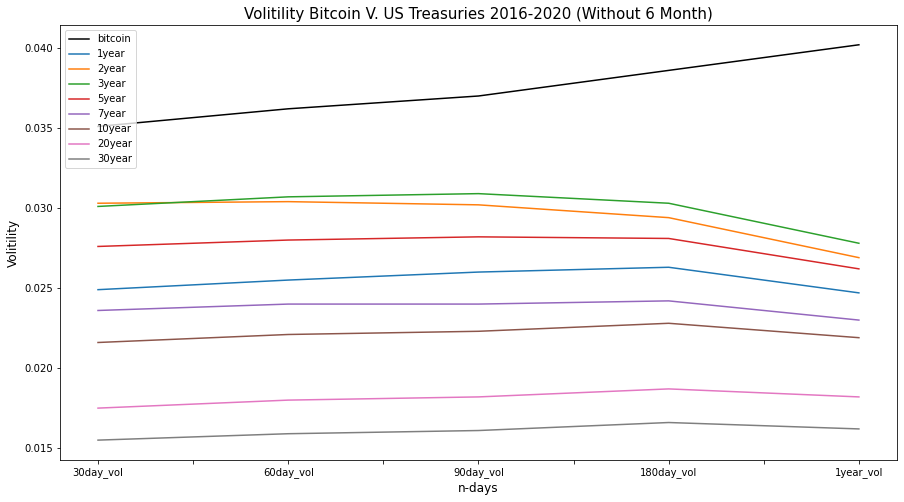

In [137]:
bitcoinvol.loc['30day_vol':'1year_vol',:][('2016-01-01','2020-12-31')].plot(label='bitcoin',color='k')
US1yearvol.loc['30day_vol':'1year_vol',:][('2016-01-01','2020-12-31')].plot(label='1year')
US2yearvol.loc['30day_vol':'1year_vol',:][('2016-01-01','2020-12-31')].plot(label='2year')
US3yearvol.loc['30day_vol':'1year_vol',:][('2016-01-01','2020-12-31')].plot(label='3year')
US5yearvol.loc['30day_vol':'1year_vol',:][('2016-01-01','2020-12-31')].plot(label='5year')
US7yearvol.loc['30day_vol':'1year_vol',:][('2016-01-01','2020-12-31')].plot(label='7year')
US10yearvol.loc['30day_vol':'1year_vol',:][('2016-01-01','2020-12-31')].plot(label='10year')
US20yearvol.loc['30day_vol':'1year_vol',:][('2016-01-01','2020-12-31')].plot(label='20year')
US30yearvol.loc['30day_vol':'1year_vol',:][('2016-01-01','2020-12-31')].plot(label='30year')
plt.title('Volitility Bitcoin V. US Treasuries 2016-2020 (Without 6 Month)',fontsize=15)
plt.ylabel('Volitility',fontsize=12)
plt.xlabel('n-days',fontsize=12)
plt.legend(loc='upper left')
plt.show()

#### 2011-2020

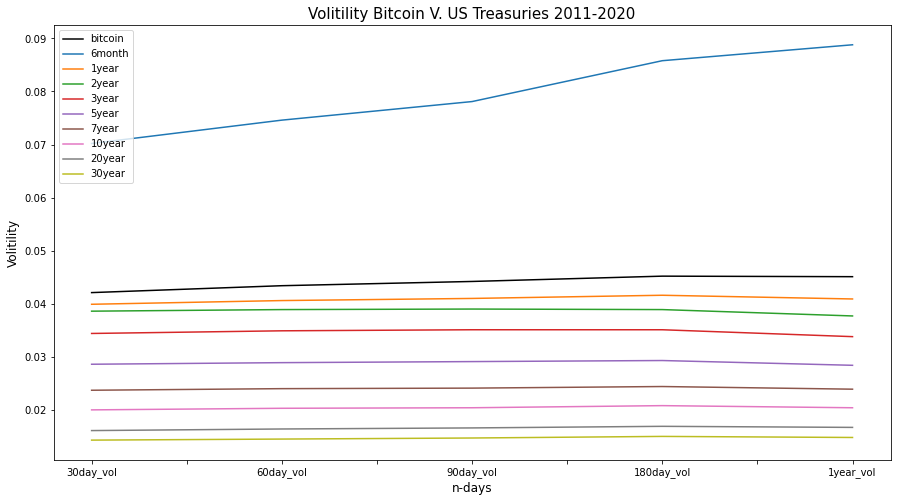

In [138]:
bitcoinvol.loc['30day_vol':'1year_vol',:][('2011-01-01','2020-12-31')].plot(label='bitcoin',color='k')
US6monthvol.loc['30day_vol':'1year_vol',:][('2011-01-01','2020-12-31')].plot(label='6month')
US1yearvol.loc['30day_vol':'1year_vol',:][('2011-01-01','2020-12-31')].plot(label='1year')
US2yearvol.loc['30day_vol':'1year_vol',:][('2011-01-01','2020-12-31')].plot(label='2year')
US3yearvol.loc['30day_vol':'1year_vol',:][('2011-01-01','2020-12-31')].plot(label='3year')
US5yearvol.loc['30day_vol':'1year_vol',:][('2011-01-01','2020-12-31')].plot(label='5year')
US7yearvol.loc['30day_vol':'1year_vol',:][('2011-01-01','2020-12-31')].plot(label='7year')
US10yearvol.loc['30day_vol':'1year_vol',:][('2011-01-01','2020-12-31')].plot(label='10year')
US20yearvol.loc['30day_vol':'1year_vol',:][('2011-01-01','2020-12-31')].plot(label='20year')
US30yearvol.loc['30day_vol':'1year_vol',:][('2011-01-01','2020-12-31')].plot(label='30year')
plt.title('Volitility Bitcoin V. US Treasuries 2011-2020',fontsize=15)
plt.ylabel('Volitility',fontsize=12)
plt.xlabel('n-days',fontsize=12)
plt.legend(loc='upper left')
plt.show()

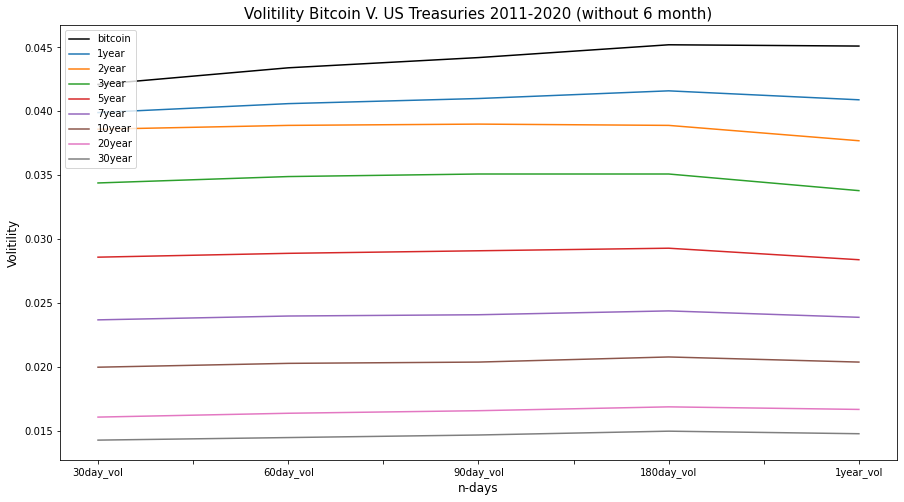

In [139]:
bitcoinvol.loc['30day_vol':'1year_vol',:][('2011-01-01','2020-12-31')].plot(label='bitcoin',color='k')
US1yearvol.loc['30day_vol':'1year_vol',:][('2011-01-01','2020-12-31')].plot(label='1year')
US2yearvol.loc['30day_vol':'1year_vol',:][('2011-01-01','2020-12-31')].plot(label='2year')
US3yearvol.loc['30day_vol':'1year_vol',:][('2011-01-01','2020-12-31')].plot(label='3year')
US5yearvol.loc['30day_vol':'1year_vol',:][('2011-01-01','2020-12-31')].plot(label='5year')
US7yearvol.loc['30day_vol':'1year_vol',:][('2011-01-01','2020-12-31')].plot(label='7year')
US10yearvol.loc['30day_vol':'1year_vol',:][('2011-01-01','2020-12-31')].plot(label='10year')
US20yearvol.loc['30day_vol':'1year_vol',:][('2011-01-01','2020-12-31')].plot(label='20year')
US30yearvol.loc['30day_vol':'1year_vol',:][('2011-01-01','2020-12-31')].plot(label='30year')
plt.title('Volitility Bitcoin V. US Treasuries 2011-2020 (without 6 month)',fontsize=15)
plt.ylabel('Volitility',fontsize=12)
plt.xlabel('n-days',fontsize=12)
plt.legend(loc='upper left')
plt.show()

### Bitcoin V. Commercial Real Estate

In [188]:
#From https://fred.stlouisfed.org/series/COMREPUSQ159N
url=('https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&'
     'graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1169&nt='
     '0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=COMREPUSQ159N&scale=left&cosd='
     '2005-01-01&coed=2020-04-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type='
     'none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Quarterly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index='
     '1&transformation=lin&vintage_date=2021-01-14&revision_date=2021-01-14&nd=2005-01-01')
dfcommercial=pd.read_csv(url)
dfcommercial.columns=['Date','%change_Com']
dfcommercial=dfcommercial.set_index('Date')
dfcommercial=dfcommercial/100
test=dfbit.pct_change(365).dropna()
test.index=pd.to_datetime(test.index)
test.index=test.index.shift(1,freq='D')
test.columns=['%change_BTC']
dfbitcom=test.join(dfcommercial,how='inner')

The charts below measure the annual percent change in both bitcoin and commercial real estate taken quarterly.  

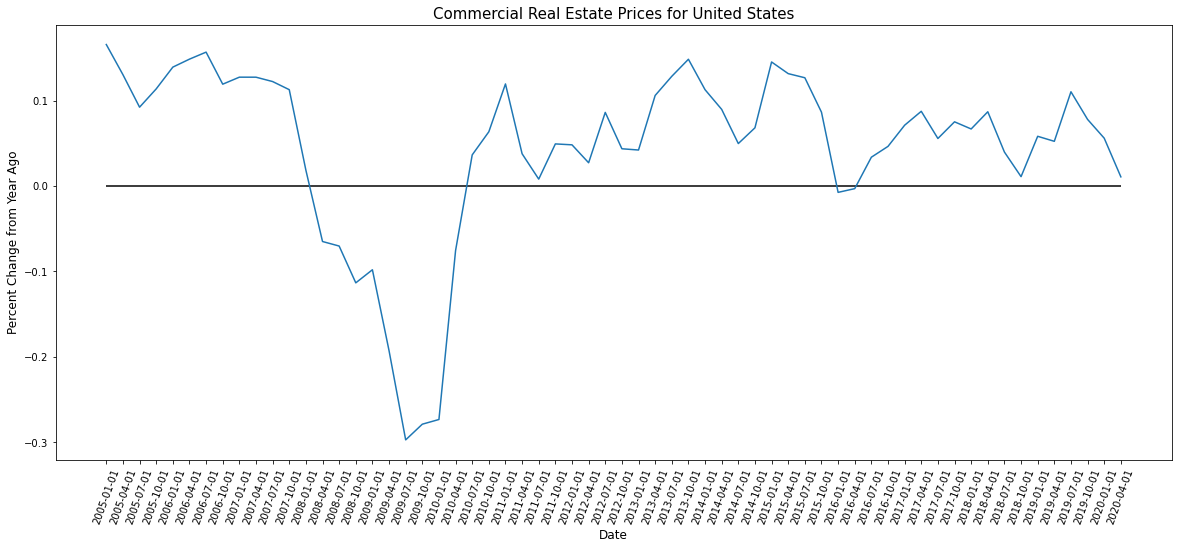

In [189]:
plt.rcParams['figure.figsize'] = [20, 8]
fig,ax=plt.subplots()
ax.plot(dfcommercial)
ax.hlines(0,dfcommercial.index[0],dfcommercial.index[-1],color='k')
plt.title('Commercial Real Estate Prices for United States',fontsize='15')
plt.xlabel('Date',fontsize=12)
plt.ylabel('Percent Change from Year Ago',fontsize=12)
plt.xticks(rotation=70)
plt.show()

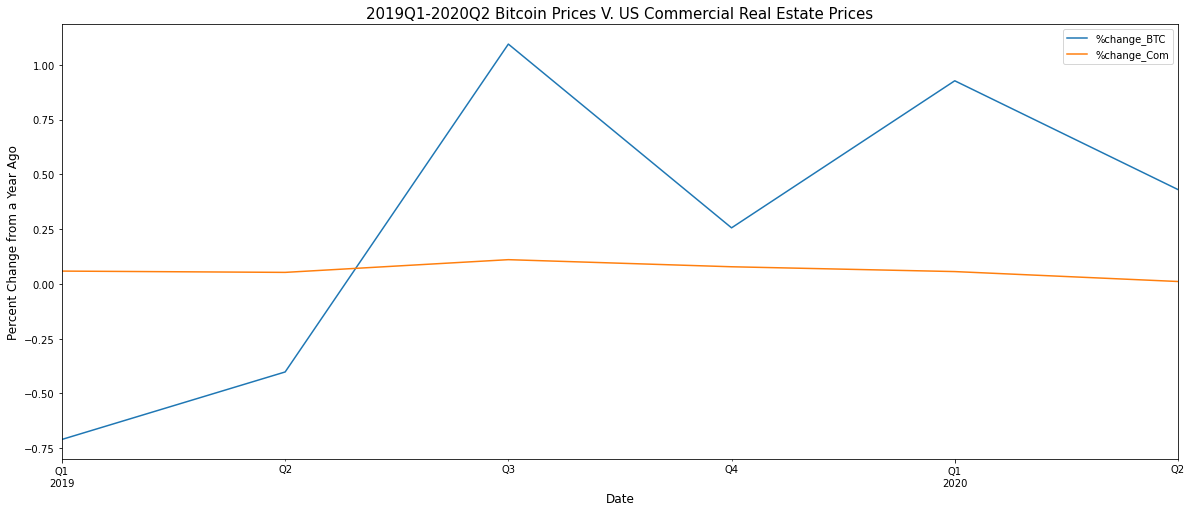

In [190]:
dfbitcom.loc['2019-01-01':].plot()
plt.title('2019Q1-2020Q2 Bitcoin Prices V. US Commercial Real Estate Prices', fontsize=15)
plt.ylabel('Percent Change from a Year Ago',fontsize=12)
plt.xlabel('Date',fontsize=12)
plt.show()

In [191]:
print('Bitcoin volitility 2019Q1-2020Q2 = '+str(np.round(dfbitcom.loc['2019-01-01':]['%change_BTC'].std(),4)))

Bitcoin volitility 2019Q1-2020Q2 = 0.7139


In [192]:
print('Commercial volitility 2019Q1-2020Q2 = '+str(np.round(dfbitcom.loc['2019-01-01':]['%change_Com'].std(),4)))

Commercial volitility 2019Q1-2020Q2 = 0.0327


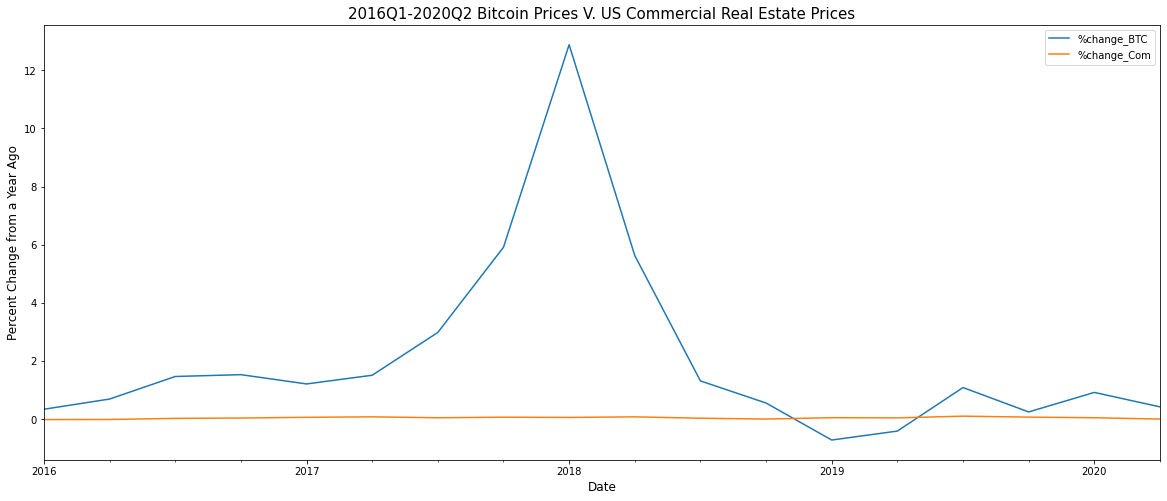

In [193]:
dfbitcom.loc['2016-01-01':].plot()
plt.title('2016Q1-2020Q2 Bitcoin Prices V. US Commercial Real Estate Prices', fontsize=15)
plt.ylabel('Percent Change from a Year Ago',fontsize=12)
plt.xlabel('Date',fontsize=12)
plt.show()

In [194]:
print('Bitcoin volitility 2016Q1-2020Q2 = '+str(np.round(dfbitcom.loc['2016-01-01':]['%change_BTC'].std(),4)))

Bitcoin volitility 2016Q1-2020Q2 = 3.2229


In [195]:
print('Commercial volitility 2016Q1-2020Q2 = '+str(np.round(dfbitcom.loc['2016-01-01':]['%change_Com'].std(),4)))

Commercial volitility 2016Q1-2020Q2 = 0.0327


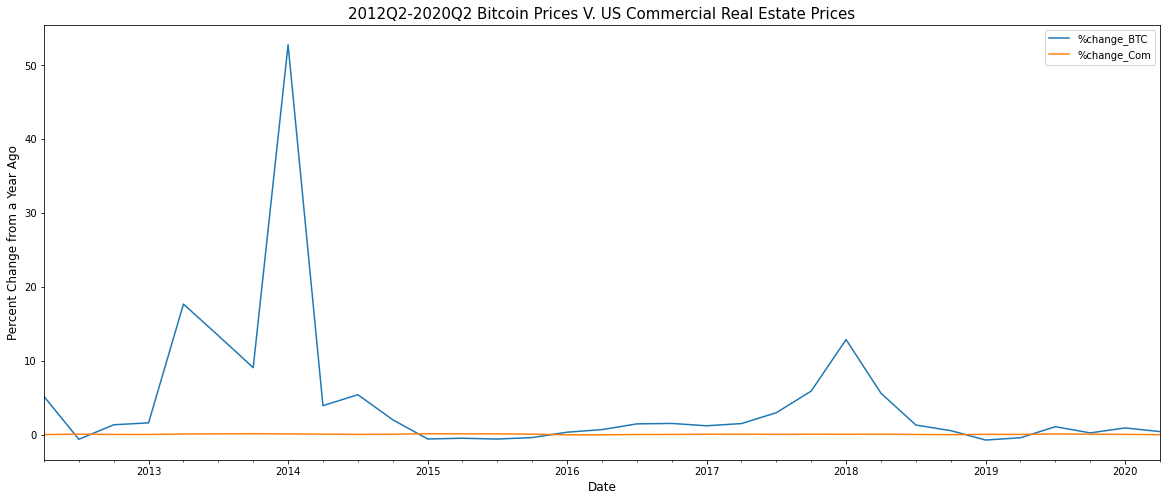

In [196]:
dfbitcom.plot()
plt.title('2012Q2-2020Q2 Bitcoin Prices V. US Commercial Real Estate Prices', fontsize=15)
plt.ylabel('Percent Change from a Year Ago',fontsize=12)
plt.xlabel('Date',fontsize=12)
plt.show()

In [197]:
print('Bitcoin volitility 2012Q2-2020Q2 = '+str(np.round(dfbitcom.loc['2012-04-01':]['%change_BTC'].std(),4)))

Bitcoin volitility 2012Q2-2020Q2 = 9.7452


In [198]:
print('Commercial volitility 2012Q2-2020Q2 = '+str(np.round(dfbitcom.loc['2012-04-01':]['%change_Com'].std(),4)))

Commercial volitility 2012Q2-2020Q2 = 0.0412


If there is one take away from the above charts, it is that bitcoin has at times been wildly more volitile than commercial real estate.

##  Stock to Flow Price Predictions

One of the more popular models for forecasting the future price of bitcoin uses the stock to flow of bitcoin defined as 356MA(total circulating supply/daily supply increase).  Because bitcoins total supply is known at all times as a matter of public record, and the supply schedule is also known, we can easily forecast the supply and thus bitcoins stock to flow a year or more into the future.  Lets look at bitcoins historical price action with stock to flow overlaid and projected out a year into the future.

In [77]:
#found at https://www.quandl.com/data/BCHAIN/TOTBC-Total-Bitcoins
key=''
url='https://www.quandl.com/api/v3/datasets/BCHAIN/TOTBC.csv?api_key='+key
dfbitsupply=pd.read_csv(url).set_index('Date')
dfbitsupply.index=pd.to_datetime(dfbitsupply.index)
#Found at Quandl https://www.quandl.com/data/BCHAIN/MKPRU-Bitcoin-Market-Price-USD
api='https://www.quandl.com/api/v3/datasets/BCHAIN/MKPRU.csv?api_key='+key
dfbit=pd.read_csv(api).set_index('Date').iloc[::-1]
dfbit=dfbit.loc['2011-01-01':]

In [78]:
test2=pd.DataFrame(dfbitsupply.Value.iloc[::-1])
test2['flow']=test2.Value.diff()
test2=test2.loc[test2.flow!=0].dropna()
test2=test2.dropna()
test2.index=pd.to_datetime(test2.index)

shift_value=np.arange((test2.Value[-1]+908),(test2.Value[-1]+(908*366)),908)
shift_index=test2.index[-365:].shift(freq='d',periods=365)
shift_flow=np.repeat(908,365)
shift_df=pd.DataFrame({'Value':shift_value,'flow':shift_flow},index=shift_index)

test2=pd.concat([test2,shift_df])
test2['Stock/Flow_365avg']=(test2.Value/test2.flow).rolling(365).mean()
test2=test2.loc['2011-01-01':]
test2.columns=['stock', 'flow','stock/flow_365avg']
test2=test2.join(dfbit,how='left')

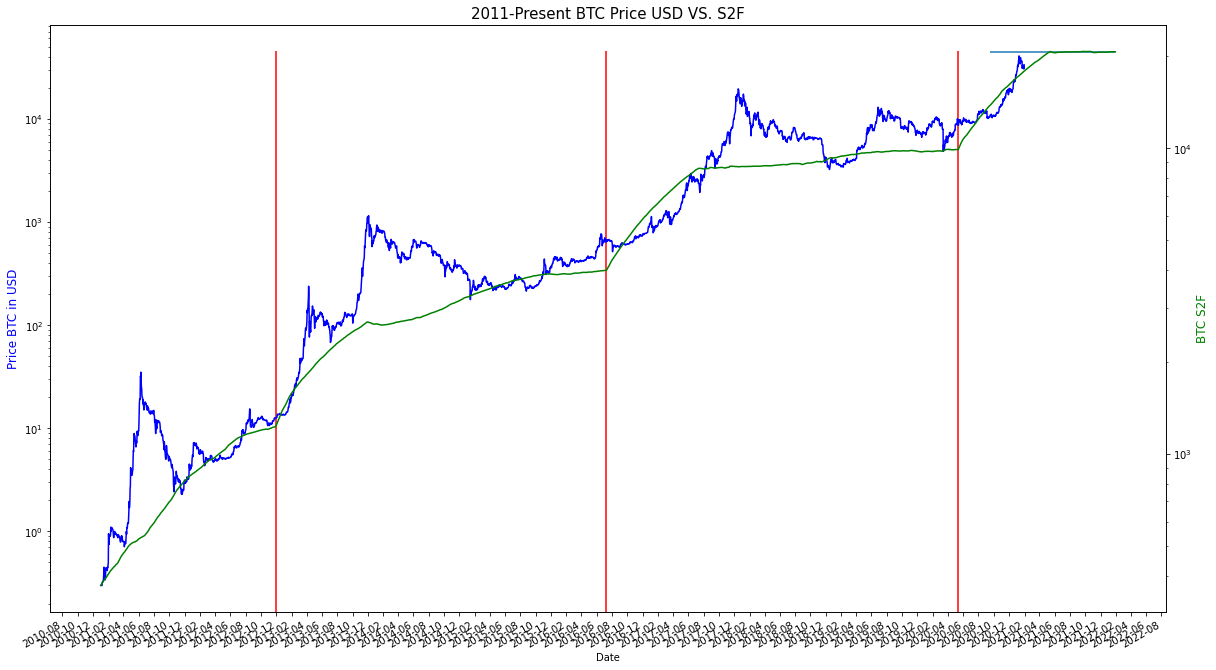

In [79]:
plt.rcParams['figure.figsize'] = [20, 12]
import matplotlib.pyplot as plt
x = test2.index
y1 = test2['Value'].values
y2 = (test2['stock/flow_365avg']).values

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'b-')

ax2.plot(x, y2, 'g-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Price BTC in USD', color='b',fontsize=12)
ax1.vlines('2012-11-28',0,45000,color='r')
ax1.vlines('2016-07-09',0,45000,color='r')
ax1.vlines('2020-05-11',0,45000,color='r')
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax1.set_yscale("log")
fig.autofmt_xdate()
ax2.set_ylabel('BTC S2F', color='g',fontsize=12)
ax2.set_yscale('log')
ax2.hlines(test2['stock/flow_365avg'][-1],test2.index[-500],test2.index[-1])
plt.title('2011-Present BTC Price USD VS. S2F',fontsize=15)
plt.show()

In the above graph, bitcoins price in USD is in blue with its scale on the left, and bitcoins stock to flow is in green with its scale on the right.  The bitcoin stock to flow is projected one year into the future.  the vertical lines represent bitcoins halvings, where the total daily supply of new bitcoin is cut in half.  As you can see, in the past bitcoins stock to flow has acted as a support for the price action.  If this pattern continues, it is reasonable to conclude that bitcoins recent highs of roughly 40,000 should act as a base level of support for the price action until the next halving in early 2024.  If we follow the stock to flow model, this means that 40,000 is what bticoin will likely crash to in the coming years, therefore any bitcoin being sold for less than 40,000 right now is a fire sale. The above chart also shows that when stock to flow rises with each halving, bitcoins price rises as well.  If the historical trend continues, we will see another price rise after the 2024 halving.       

A word of caution.  So far in bitcoins history, the price has been driven by early adapters and speculation.  Nobody really knows what will happen when and if the big money comes to buy.  Nobody knows if these historical trends will hold if corporations start dumping billions of their cash reserves into bitcoin.  So beware when attempting to time the market.  Just because bitcoin has followed this certain pattern historically, does not mean that it will follow this in the future.  The current macro environment is such that anything is liable to happen over the next four years.  The future is most definitely hidden from us in these uncertain times, but this will be the true test of bitcoin.  Can it really handle being a multi trillion dollar asset class?  We will find out.      
    

## Conclusion

I hope this paper provided the reader with some historical context regarding bitcoins price action.  I think the key take away for retail investors should be that bitcoin is not a get rich quick scheme.  Timing the market is extraordinarily difficult.  Unless you want to spend the necessary time to become an exceptional day trader, the only safe way to invest in bitcoin is to buy and hold for long durations of 3.5 years or more.  Institutional and retail investors alike should have their eyes wide open about the volatility from the start.  Bitcoins upside dream will turn into a volatile nightmare quickly if you are not careful to invest only what you can stomach loosing half of on a days notice.  Only the most responsible leverage is advised, and no leverage is ideal.         

Bitcoin is a self-sovereign ledger of debits and credits that solved the byzantine generals problem, see https://coincentral.com/byzantine-generals-problem/. It is a system of storing and sending value that is outside the control of any company or state, and it does not require any third party to audit and authenticate the state of the ledger at any time.  What is this technology worth to the world?  Nothing? 100 Billion? 100 Trillion?  The market and the investor have to decide.  I suggest that the reader educate themselves on the technological aspects of Bitcoin before taking a large stake in the project, and I suggest that the reader do everything they can to answer this question for themselves: Is bitcoin appropriately valued?  If you think that its market cap is too low, then buy and hold.  If you think its a bubble, well, as they say in the bitcoin community, have fun staying poor ;).              

## Resources  

https://100trillionusd.github.io/ - Plan B Stock to Flow Model

https://www.whatbitcoindid.com/podcast/the-ultimate-bitcoin-101 - Bitcoin 101 explained by Vijay Boyapati

https://casebitcoin.com/charts - This website offers some great visuals comparing bitcoin to other assets.  Sharp ratios over the past five years are provided.  

https://vijayboyapati.medium.com/the-bullish-case-for-bitcoin-6ecc8bdecc1 - medium article outlining the bull case for bitcoin

https://www.microstrategy.com/en/bitcoin - CEO of Micro Strategy Michael Saylor on Bitcoin 

https://www.skybridgebitcoin.com/documents/overview-pdf - Skybridge Bitcoin Fund Overview

https://www.youtube.com/watch?v=SmH1avX_RVc - Paul Tudor Jones on Bitcoin

https://www.youtube.com/watch?v=bu9z3s38o_U - Stanley Drunkenmiller talks on Bitcoin

https://www.skybridgebitcoin.com/bitcoin-faqs - Skybridge Bitcoin Fund FAQ